In [ ]:
import pickle
import torch

def plot_fused_attn(score_file,page):
    with open(score_file,'rb') as fi:
        scores = pickle.load(fi)   

    fusedattention = []
    for token_idx in range(len(scores[page]['cross_attention'])):
        # cross_attention: [num_layers,num_heads,588] -> [num_layers,num_heads,28,21]
        cross_attention = torch.stack(scores[page]['cross_attention'][token_idx]).permute(1, 3, 0, 2, 4).squeeze(0).squeeze(0).view(4, 16, 28, 21)
        # 先对head取最大值，再对layer取最大值
        fusedattention.append(cross_attention.max(1)[0].max(0)[0].cpu().to(torch.float))


    import matplotlib.pyplot as plt

    file_name = score_file.split('/')[-1][:-4]
    error = score_file.split('/')[2].split('_')[0]=='error'
    if error:
        out_dir = f"{score_file.split('error')[0]+'error_attns'}/{file_name}_{page}"
    else:
        out_dir = f"{score_file.split('correct')[0]+'correct_attns'}/{file_name}_{page}"
    if not os.path.exists(out_dir):
        os.mkdir(out_dir)
    for i, frame in enumerate(fusedattention):
        plt.clf()
        plt.imshow(frame, cmap='viridis')
        plt.title(f'Frame {i+1}/{len(fusedattention)}')
        plt.axis('off')  # 关闭坐标轴
        plt.savefig(f'{out_dir}/{i}.png')

total: 34252


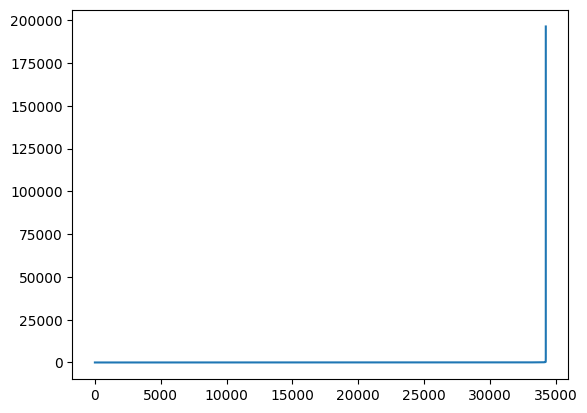

In [5]:
import matplotlib.pyplot as plt 
with open("../output/greedy_search/perplexity.jsonl",'r')as fi:
    lines = fi.readlines()
perplexity = [float(line.split(':')[-1].strip()[:-1]) for line in lines]
perplexity.sort()
print('total:',len(perplexity))
plt.figure()
plt.plot(range(len(perplexity)),perplexity)


In [1]:
import orjson
f = open('../output/greedy_search/perplexity.jsonl')
lines = f.readlines()
dct_lst = [tuple(orjson.loads(line).items())[0] for line in lines]
dcts = sorted(dct_lst,key=lambda x :x[1])
f.close()

In [3]:
dcts[-10:]

[('data/quantum/10.12942/lrr-2013-5.pdf', 373.8026259931007),
 ('data/quantum/10.1007/978-3-319-94902-4.pdf', 431.6273300918861),
 ('data/quantum/10.1038/scientificamerican0785-48.pdf', 442.7762534231126),
 ('data/quantum/10.1088/1126-6708%2F2001%2F11%2F034.pdf', 566.6435693371276),
 ('data/quantum/10.1364/OE.23.032835.pdf', 650.1263647294487),
 ('data/quantum/10.1117/1.3596602.pdf', 1132.572143739295),
 ('data/quantum/10.1101/cshperspect.a019091.pdf', 1170.0296114130367),
 ('data/quantum/10.1109/jphot.2013.2243721.pdf', 2079.0453398739583),
 ('data/quantum/10.1088/0953-4075%2F46%2F8%2F085301.pdf', 2666.4740914605773),
 ('data/quantum/10.1364/OE.23.001615.pdf', 196349.866945404)]

In [6]:
dcts[20000:20010]

[('data/quantum/10.1103/PhysRevLett.87.091801.pdf', 21.9827915829461),
 ('data/quantum/10.1088/1742-6596%2F701%2F1%2F012012.pdf', 21.982960107273623),
 ('data/quantum/10.1364/OE.23.030807.pdf', 21.983306439459344),
 ('data/quantum/10.1088/1742-6596%2F161%2F1%2F012028.pdf', 21.984329595558123),
 ('data/quantum/10.1109/tasc.2006.874961.pdf', 22.002760462497086),
 ('data/quantum/10.1109/TAC.2017.2727225.pdf', 22.002760462497086),
 ('data/quantum/10.1109/jqe.2009.2013210.pdf', 22.002760462497086),
 ('data/quantum/10.1117/12.273762.pdf', 22.002760462497086),
 ('data/quantum/10.1103/PhysRevA.97.062334.pdf', 22.002760462497086),
 ('data/quantum/10.1515/BC.2004.113.pdf', 22.002760462497086)]

In [1]:
import fitz
import os
import orjson
from pathlib import Path
with open('../output/greedy_search/mix_perplexity.jsonl','r') as f:
    lines = f.readlines()
dct_lst = [tuple(orjson.loads(line).items())[0] for line in lines]  # len(dct_lst)=36036
# 已经处理好前28264个了,有2548个perplexity>2.8
for dct in dct_lst[30812:]:
    pdf_path = '../'+dct[0]
    md_name = Path(pdf_path.split('/')[-1]).with_suffix('.mmd')
    perplexity = dct[1]
    pdf = fitz.open(pdf_path)
    num_pages = len(pdf)
    perplexity = perplexity/num_pages
    print(dct[0],perplexity)
    if perplexity<2.8:
        print(f'processing {dct[0]}...')
        os.system(f'python ../nougat/dataset/split_md_to_pages.py --md ../output/greedy_search/correct/{md_name} --pdf {pdf_path} --out ../output/split_pages --figure None')

data/quantum/10.1109/qce49297.2020.00017.pdf 2.7443764574021556
processing data/quantum/10.1109/qce49297.2020.00017.pdf...
data/quantum/10.1109/CPEM.2018.8501023.pdf 2.728941702766608
processing data/quantum/10.1109/CPEM.2018.8501023.pdf...
data/quantum/10.1088/0953-4075%2F48%2F18%2F182001.pdf 2.7586049551153873
processing data/quantum/10.1088/0953-4075%2F48%2F18%2F182001.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1109/isit.2000.866763.pdf 2.8487348971703996
data/quantum/10.1109/saso.2013.16.pdf 2.741783846940597
processing data/quantum/10.1109/saso.2013.16.pdf...
data/quantum/10.1109/tc.2007.35.pdf 2.77191628145183
processing data/quantum/10.1109/tc.2007.35.pdf...
data/quantum/10.1109/tcad.2020.2969647.pdf 2.7513370582726355
processing data/quantum/10.1109/tcad.2020.2969647.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1109/23.958751.pdf 2.7503731452000575
processing data/quantum/10.1109/23.958751.pdf...
data/quantum/10.1109/TNS.2017.2708510.pdf 2.7540107005140015
processing data/quantum/10.1109/TNS.2017.2708510.pdf...
data/quantum/10.1088/1367-2630%2F12%2F8%2F083055.pdf 2.7586402779057315
processing data/quantum/10.1088/1367-2630%2F12%2F8%2F083055.pdf...
data/quantum/10.1088/1751-8113%2F44%2F47%2F478001.pdf 2.7539262180581243
processing data/quantum/10.1088/1751-8113%2F44%2F47%2F478001.pdf...
data/quantum/10.1088/1355-5111%2F8%2F1%2F021.pdf 2.762829763880017
processing data/quantum/10.1088/1355-5111%2F8%2F1%2F021.pdf...
data/quantum/10.1088/1367-2630%2F15%2F2%2F023033.pdf 2.7417081458252324
processing data/quantum/10.1088/1367-2630%2F15%2F2%2F023033.pdf...
data/quantum/10.1088/0253-6102%2F50%2F6%2F11.pdf 2.7641147812698525
processing data/quantum/10.1088/0253-6102%2F50%2F6%2F11.pdf...
data/quantum/10.1088/1464-4266%2F6%2F6%2F021.pdf 2.7794463901445607
processing data/quantum/10.1088/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1674-1056%2F28%2F6%2F060302.pdf 2.7802147846557554
processing data/quantum/10.1088/1674-1056%2F28%2F6%2F060302.pdf...
data/quantum/10.1109/EUSIPCO.2016.7760297.pdf 2.7439324119415174
processing data/quantum/10.1109/EUSIPCO.2016.7760297.pdf...
data/quantum/10.1109/jsac.2020.2969005.pdf 2.744050777561851
processing data/quantum/10.1109/jsac.2020.2969005.pdf...
data/quantum/10.1088/0034-4885%2F73%2F8%2F086501.pdf 2.75818876070881
processing data/quantum/10.1088/0034-4885%2F73%2F8%2F086501.pdf...
data/quantum/10.1109/mwscas.2019.8885132.pdf 2.739643380289372
processing data/quantum/10.1109/mwscas.2019.8885132.pdf...
data/quantum/10.1109/ccc.1998.694600.pdf 2.746876469988159
processing data/quantum/10.1109/ccc.1998.694600.pdf...
data/quantum/10.1088/1367-2630%2F12%2F8%2F083046.pdf 2.745057746759662
processing data/quantum/10.1088/1367-2630%2F12%2F8%2F083046.pdf...
data/quantum/10.1109/focs.2011.42.pdf 2.7564451755780426
processing data/quantum/10.1109/focs.2011.42.pdf..

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F14%2F7%2F073046.pdf 2.755459352072434
processing data/quantum/10.1088/1367-2630%2F14%2F7%2F073046.pdf...
data/quantum/10.1109/tvcg.2010.200.pdf 2.750361910244889
processing data/quantum/10.1109/tvcg.2010.200.pdf...
data/quantum/10.1088/1367-2630%2F14%2F9%2F093011.pdf 2.740812021539579
processing data/quantum/10.1088/1367-2630%2F14%2F9%2F093011.pdf...
data/quantum/10.1109/lpt.2010.2044992.pdf 2.7539262180581243
processing data/quantum/10.1109/lpt.2010.2044992.pdf...
data/quantum/10.1109/JLT.2004.824355.pdf 2.75722789962132
processing data/quantum/10.1109/JLT.2004.824355.pdf...
data/quantum/10.1088/1367-2630%2F16%2F6%2F063060.pdf 2.7559140742150077
processing data/quantum/10.1088/1367-2630%2F16%2F6%2F063060.pdf...
data/quantum/10.1109/isit.2002.1023373.pdf 2.7396015770741706
processing data/quantum/10.1109/isit.2002.1023373.pdf...
data/quantum/10.1088/1367-2630%2F9%2F6%2F161.pdf 2.7591604528657596
processing data/quantum/10.1088/1367-2630%2F9%2F6%2F161.pd

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1109/18.850709.pdf 2.743182737320159
processing data/quantum/10.1109/18.850709.pdf...
data/quantum/10.1088/1367-2630%2F18%2F11%2F113028.pdf 2.7960368854985886
processing data/quantum/10.1088/1367-2630%2F18%2F11%2F113028.pdf...
data/quantum/10.1088/0143-0807%2F18%2F5%2F006.pdf 2.7694855186109635
processing data/quantum/10.1088/0143-0807%2F18%2F5%2F006.pdf...
data/quantum/10.1109/maes.2016.7478411.pdf 19.774139536218833
data/quantum/10.1109/JPHOT.2016.2516254.pdf 2.778968045186767
processing data/quantum/10.1109/JPHOT.2016.2516254.pdf...
data/quantum/10.1088/0953-4075%2F42%2F9%2F095503.pdf 2.7611519003920098
processing data/quantum/10.1088/0953-4075%2F42%2F9%2F095503.pdf...
data/quantum/10.1109/iccict.2015.7045661.pdf 2.7539262180581243
processing data/quantum/10.1109/iccict.2015.7045661.pdf...
data/quantum/10.1109/lcsys.2021.3065603.pdf 2.743182737320159
processing data/quantum/10.1109/lcsys.2021.3065603.pdf...
data/quantum/10.1109/TEVC.2012.2196800.pdf 2.736076209092897

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F10%2F11%2F115007.pdf 2.746000734512041
processing data/quantum/10.1088/1367-2630%2F10%2F11%2F115007.pdf...
data/quantum/10.1088/0953-4075%2F41%2F6%2F065505.pdf 2.7639014641524087
processing data/quantum/10.1088/0953-4075%2F41%2F6%2F065505.pdf...
data/quantum/10.1088/0953-4075%2F38%2F18%2Fl02.pdf 2.7396224786817713
processing data/quantum/10.1088/0953-4075%2F38%2F18%2Fl02.pdf...
data/quantum/10.1109/isit.1997.613003.pdf 2.7610885385501014
processing data/quantum/10.1109/isit.1997.613003.pdf...
data/quantum/10.1088/1742-6596%2F442%2F1%2F012010.pdf 2.741603371948882
processing data/quantum/10.1088/1742-6596%2F442%2F1%2F012010.pdf...
data/quantum/10.1109/tcad.2002.804386.pdf 2.743192026923537
processing data/quantum/10.1109/tcad.2002.804386.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1109/cdc.2003.1272599.pdf 2.7503450578121353
processing data/quantum/10.1109/cdc.2003.1272599.pdf...
data/quantum/10.1109/nlo.1998.710249.pdf 2.7467638975661473
processing data/quantum/10.1109/nlo.1998.710249.pdf...
data/quantum/10.1109/tnano.2002.807380.pdf 2.7438989693693565
processing data/quantum/10.1109/tnano.2002.807380.pdf...
data/quantum/10.1109/t-ed.1972.17486.pdf 2.880830644984254
data/quantum/10.1109/dac18072.2020.9218555.pdf 2.7651513976532374
processing data/quantum/10.1109/dac18072.2020.9218555.pdf...
data/quantum/10.1109/9.119632.pdf 2.833808473257534
data/quantum/10.1088/1367-2630%2F16%2F5%2F053045.pdf 2.770056730549294
processing data/quantum/10.1088/1367-2630%2F16%2F5%2F053045.pdf...
data/quantum/10.1088/0031-8949%2F81%2F01%2F015201.pdf 2.7721151047408292
processing data/quantum/10.1088/0031-8949%2F81%2F01%2F015201.pdf...
data/quantum/10.1109/tit.2021.3076442.pdf 2.7510068446046785
processing data/quantum/10.1109/tit.2021.3076442.pdf...
data/quantum/10

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1109/sfcs.1995.492584.pdf 2.761449812692962
processing data/quantum/10.1109/sfcs.1995.492584.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1109/tvt.2014.2328638.pdf 2.741750273221764
processing data/quantum/10.1109/tvt.2014.2328638.pdf...
data/quantum/10.1109/itw.2008.4578690.pdf 2.7396015770741706
processing data/quantum/10.1109/itw.2008.4578690.pdf...
data/quantum/10.1088/1367-2630%2Fab31ef.pdf 4.0167941357928125
data/quantum/10.1109/tit.2005.851760.pdf 2.7467638975661473
processing data/quantum/10.1109/tit.2005.851760.pdf...
data/quantum/10.1088/0954-8998%2F3%2F6%2F005.pdf 2.7571975712391037
processing data/quantum/10.1088/0954-8998%2F3%2F6%2F005.pdf...
data/quantum/10.1109/cdc.2015.7403236.pdf 2.7467638975661473
processing data/quantum/10.1109/cdc.2015.7403236.pdf...
data/quantum/10.1088/1464-4266%2F7%2F10%2F003.pdf 2.750513916445153
processing data/quantum/10.1088/1464-4266%2F7%2F10%2F003.pdf...
data/quantum/10.1109/GLOCOMW.2016.7848999.pdf 2.7432106061302934
processing data/quantum/10.1109/GLOCOMW.2016.7848999.pdf...
data/quantum/10.1109/icp.2011.6106827.pdf 2.7396015770741706
processing data/quantum

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F35%2F29%2F309.pdf 2.763247897263365
processing data/quantum/10.1088/0305-4470%2F35%2F29%2F309.pdf...
data/quantum/10.1109/jstqe.2014.2360366.pdf 2.733510220326992
processing data/quantum/10.1109/jstqe.2014.2360366.pdf...
data/quantum/10.1109/icton.2010.5549330.pdf 2.750345057812136
processing data/quantum/10.1109/icton.2010.5549330.pdf...
data/quantum/10.1088/0031-8949%2F83%2F05%2F055404.pdf 2.7591096936741666
processing data/quantum/10.1088/0031-8949%2F83%2F05%2F055404.pdf...
data/quantum/10.1088/1751-8113%2F47%2F49%2F495002.pdf 2.779474919844482
processing data/quantum/10.1088/1751-8113%2F47%2F49%2F495002.pdf...
data/quantum/10.1088/0953-4075%2F44%2F11%2F115502.pdf 2.767421026400022
processing data/quantum/10.1088/0953-4075%2F44%2F11%2F115502.pdf...
data/quantum/10.1088/0953-8984%2F19%2F15%2F156227.pdf 2.7504634234324694
processing data/quantum/10.1088/0953-8984%2F19%2F15%2F156227.pdf...
data/quantum/10.1109/iccv.2019.00138.pdf 2.731090398914201
proce

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1109/isit.2009.5205475.pdf 2.7353376273511456
processing data/quantum/10.1109/isit.2009.5205475.pdf...
data/quantum/10.1088/0305-4470%2F36%2F18%2F317.pdf 2.76901656679027
processing data/quantum/10.1088/0305-4470%2F36%2F18%2F317.pdf...
data/quantum/10.1088/0953-4075%2F44%2F2%2F025501.pdf 2.761371624002864
processing data/quantum/10.1088/0953-4075%2F44%2F2%2F025501.pdf...
data/quantum/10.1109/jstqe.2012.2196025.pdf 2.7396224786817713
processing data/quantum/10.1109/jstqe.2012.2196025.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1109/focs.2009.22.pdf 2.739651872079085
processing data/quantum/10.1109/focs.2009.22.pdf...
data/quantum/10.1088/1367-2630%2F6%2F1%2F134.pdf 2.746555931156489
processing data/quantum/10.1088/1367-2630%2F6%2F1%2F134.pdf...
data/quantum/10.1109/jstqe.2014.2381465.pdf 2.7467826224914287
processing data/quantum/10.1109/jstqe.2014.2381465.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1109/tac.2012.2203030.pdf 2.743182737320159
processing data/quantum/10.1109/tac.2012.2203030.pdf...
data/quantum/10.1109/TAC.2019.2946234.pdf 2.7827864858736113
processing data/quantum/10.1109/TAC.2019.2946234.pdf...
data/quantum/10.1088/1742-6596%2F698%2F1%2F012008.pdf 2.7475074215511026
processing data/quantum/10.1088/1742-6596%2F698%2F1%2F012008.pdf...
data/quantum/10.1109/ICTON.2017.8025030.pdf 2.7503871888940177
processing data/quantum/10.1109/ICTON.2017.8025030.pdf...
data/quantum/10.1109/tim.2007.890816.pdf 2.7396015770741706
processing data/quantum/10.1109/tim.2007.890816.pdf...
data/quantum/10.1109/TIT.2018.2825602.pdf 2.74604766551695
processing data/quantum/10.1109/TIT.2018.2825602.pdf...
data/quantum/10.1109/CCST.2018.8585630.pdf 2.7253884113307536
processing data/quantum/10.1109/CCST.2018.8585630.pdf...
data/quantum/10.1109/icics.2009.5397612.pdf 2.7568925252019683
processing data/quantum/10.1109/icics.2009.5397612.pdf...
data/quantum/10.1088/0305-4470%2F37

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1109/cdc.2005.1583227.pdf 2.7396015770741706
processing data/quantum/10.1109/cdc.2005.1583227.pdf...
data/quantum/10.1109/jphot.2016.2523993.pdf 2.750366123353077
processing data/quantum/10.1109/jphot.2016.2523993.pdf...
data/quantum/10.1109/ccc.2011.11.pdf 2.7348824343664546
processing data/quantum/10.1109/ccc.2011.11.pdf...
data/quantum/10.1109/LCOMM.2016.2593874.pdf 2.7557589292630005
processing data/quantum/10.1109/LCOMM.2016.2593874.pdf...
data/quantum/10.1088/1751-8113%2F43%2F14%2F145302.pdf 2.7585716909319675
processing data/quantum/10.1088/1751-8113%2F43%2F14%2F145302.pdf...
data/quantum/10.1088/2058-7058%2F22%2F08%2F5.pdf 2.80465494533699
data/quantum/10.1088/1742-6596%2F361%2F1%2F012013.pdf 2.7411352466342294
processing data/quantum/10.1088/1742-6596%2F361%2F1%2F012013.pdf...
data/quantum/10.1088/0953-4075%2F37%2F2%2FL01.pdf 2.7552159389251756
processing data/quantum/10.1088/0953-4075%2F37%2F2%2FL01.pdf...
data/quantum/10.1109/t-ed.1983.21276.pdf 2.75187984077

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1587/transele.2018SDP0001.pdf 2.7525951329067815
processing data/quantum/10.1587/transele.2018SDP0001.pdf...
data/quantum/10.1088/1464-4258%2F10%2F5%2F055001.pdf 2.762703745151318
processing data/quantum/10.1088/1464-4258%2F10%2F5%2F055001.pdf...
data/quantum/10.1088/0305-4470%2F29%2F10%2F008.pdf 2.7648391060198443
processing data/quantum/10.1088/0305-4470%2F29%2F10%2F008.pdf...
data/quantum/10.1587/nolta.2.153.pdf 2.752177550439225
processing data/quantum/10.1587/nolta.2.153.pdf...
data/quantum/10.1587/nolta.10.16.pdf 2.74143406970126
processing data/quantum/10.1587/nolta.10.16.pdf...
data/quantum/10.1587/transfun.e92.a.1276.pdf 2.739664445830313
processing data/quantum/10.1587/transfun.e92.a.1276.pdf...
data/quantum/10.1088/0953-4075%2F49%2F21%2F215003.pdf 2.8115120878555344
data/quantum/10.1063/1.3691255.pdf 2.748196361664543
processing data/quantum/10.1063/1.3691255.pdf...
data/quantum/10.1088/1367-2630%2F13%2F6%2F068001.pdf 2.761392948019032
processing data/quantum

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.3057465.pdf 2.7719162814518303
processing data/quantum/10.1063/1.3057465.pdf...
data/quantum/10.1088/1009-1963%2F11%2F10%2F304.pdf 2.783382640913687
processing data/quantum/10.1088/1009-1963%2F11%2F10%2F304.pdf...
data/quantum/10.1063/1.4922693.pdf 2.759181259755495
processing data/quantum/10.1063/1.4922693.pdf...
data/quantum/10.1088/1367-2630%2Faac2a8.pdf 2.856605409309653
data/quantum/10.1063/1.4921842.pdf 2.7467917663762815
processing data/quantum/10.1063/1.4921842.pdf...
data/quantum/10.1088/0031-8949%2F81%2F03%2F035009.pdf 2.8178858379119993
data/quantum/10.1088/0953-8984%2F21%2F4%2F045701.pdf 2.7693795287340883
processing data/quantum/10.1088/0953-8984%2F21%2F4%2F045701.pdf...
data/quantum/10.1063/1.2827311.pdf 2.751903915678635
processing data/quantum/10.1063/1.2827311.pdf...
data/quantum/10.1088/0953-8984%2F19%2F5%2F056203.pdf 2.761180942490331
processing data/quantum/10.1088/0953-8984%2F19%2F5%2F056203.pdf...
data/quantum/10.1063/1.4922779.pdf 2.7444513

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0957-4484%2F15%2F9%2F024.pdf 2.778582775346404
processing data/quantum/10.1088/0957-4484%2F15%2F9%2F024.pdf...
data/quantum/10.1063/1.4794425.pdf 4.638899966650553
data/quantum/10.1063/1.1523787.pdf 2.751903915678635
processing data/quantum/10.1063/1.1523787.pdf...
data/quantum/10.1088/0305-4470%2F23%2F21%2F024.pdf 2.7755962991497136
processing data/quantum/10.1088/0305-4470%2F23%2F21%2F024.pdf...
data/quantum/10.1063/1.2807731.pdf 2.7610885385501014
processing data/quantum/10.1063/1.2807731.pdf...
data/quantum/10.1063/1.3037503.pdf 2.7827440243535593
processing data/quantum/10.1063/1.3037503.pdf...
data/quantum/10.1088/1742-6596%2F1380%2F1%2F012113.pdf 2.784230801741266
processing data/quantum/10.1088/1742-6596%2F1380%2F1%2F012113.pdf...
data/quantum/10.1063/1.2920189.pdf 2.7557167981811186
processing data/quantum/10.1063/1.2920189.pdf...
data/quantum/10.1063/1.1901810.pdf 2.7557589292630005
processing data/quantum/10.1063/1.1901810.pdf...
data/quantum/10.1063/1.3

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.2964186.pdf 2.750345057812136
processing data/quantum/10.1063/1.2964186.pdf...
data/quantum/10.1063/1.1834387.pdf 2.7569944349234206
processing data/quantum/10.1063/1.1834387.pdf...
data/quantum/10.1063/1.1370123.pdf 2.7503871888940177
processing data/quantum/10.1063/1.1370123.pdf...
data/quantum/10.1088/1751-8121%2Faaebac.pdf 2.755173222244411
processing data/quantum/10.1088/1751-8121%2Faaebac.pdf...
data/quantum/10.1063/1.3108540.pdf 2.7612202016245515
processing data/quantum/10.1063/1.3108540.pdf...
data/quantum/10.1088/1751-8113%2F47%2F19%2F195001.pdf 2.754392089093802
processing data/quantum/10.1088/1751-8113%2F47%2F19%2F195001.pdf...
data/quantum/10.1088/1742-5468%2F2014%2F11%2Fp11006.pdf 2.7523305742998816
processing data/quantum/10.1088/1742-5468%2F2014%2F11%2Fp11006.pdf...
data/quantum/10.1088/1367-2630%2Faa9cd6.pdf 2.830158647420845
data/quantum/10.1088/1751-8113%2F40%2F3%2F010.pdf 2.9783809267111794
data/quantum/10.1063/1.4973318.pdf 2.7503450578121353

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4962639.pdf 2.764725873571932
processing data/quantum/10.1063/1.4962639.pdf...
data/quantum/10.1088/0953-4075%2F45%2F20%2F205501.pdf 2.759165819202749
processing data/quantum/10.1088/0953-4075%2F45%2F20%2F205501.pdf...
data/quantum/10.1088/0305-4470%2F38%2F29%2F010.pdf 2.758188445504443
processing data/quantum/10.1088/0305-4470%2F38%2F29%2F010.pdf...
data/quantum/10.1088/0953-4075%2F40%2F21%2F001.pdf 2.7562992474053374
processing data/quantum/10.1088/0953-4075%2F40%2F21%2F001.pdf...
data/quantum/10.1088/1751-8113%2F41%2F45%2F455302.pdf 2.753760740450377
processing data/quantum/10.1088/1751-8113%2F41%2F45%2F455302.pdf...
data/quantum/10.1088/1742-5468%2F2007%2F09%2Fl09002.pdf 2.7514294622128657
processing data/quantum/10.1088/1742-5468%2F2007%2F09%2Fl09002.pdf...
data/quantum/10.1088/0953-4075%2F42%2F23%2F235506.pdf 2.7648391060198443
processing data/quantum/10.1088/0953-4075%2F42%2F23%2F235506.pdf...
data/quantum/10.1088/0143-0807%2F32%2F5%2F025.pdf 2.76402730692

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.3035711.pdf 2.80465494533699
data/quantum/10.1088/1367-2630%2F15%2F5%2F055024.pdf 2.740654861449701
processing data/quantum/10.1088/1367-2630%2F15%2F5%2F055024.pdf...
data/quantum/10.1088/1367-2630%2F11%2F4%2F045011.pdf 2.7535960403925155
processing data/quantum/10.1088/1367-2630%2F11%2F4%2F045011.pdf...
data/quantum/10.1088/0253-6102%2F45%2F4%2F028.pdf 2.756943216740754
processing data/quantum/10.1088/0253-6102%2F45%2F4%2F028.pdf...
data/quantum/10.1088/1751-8113%2F42%2F40%2F404004.pdf 2.760124261026933
processing data/quantum/10.1088/1751-8113%2F42%2F40%2F404004.pdf...
data/quantum/10.1063/1.2713444.pdf 2.7359556752369296
processing data/quantum/10.1063/1.2713444.pdf...
data/quantum/10.1063/1.1874586.pdf 2.751414141819454
processing data/quantum/10.1063/1.1874586.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.2932341.pdf 2.758466030207518
processing data/quantum/10.1063/1.2932341.pdf...
data/quantum/10.1063/1.4896659.pdf 2.7549734816037685
processing data/quantum/10.1063/1.4896659.pdf...
data/quantum/10.1088/1367-2630%2Fab76f7.pdf 2.8075114980840787
data/quantum/10.1063/1.4854075.pdf 2.7749212946973003
processing data/quantum/10.1063/1.4854075.pdf...
data/quantum/10.1088/0305-4470%2F36%2F14%2F101.pdf 2.792752870017444
processing data/quantum/10.1088/0305-4470%2F36%2F14%2F101.pdf...
data/quantum/10.1063/1.4952647.pdf 2.7558082487000544
processing data/quantum/10.1063/1.4952647.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F17%2F9%2F092002.pdf 2.7830567487757185
processing data/quantum/10.1088/1367-2630%2F17%2F9%2F092002.pdf...
data/quantum/10.1088/0305-4470%2F25%2F19%2F024.pdf 2.770056730549294
processing data/quantum/10.1088/0305-4470%2F25%2F19%2F024.pdf...
data/quantum/10.1088/0957-4484%2F16%2F11%2F001.pdf 2.7794468324565607
processing data/quantum/10.1088/0957-4484%2F16%2F11%2F001.pdf...
data/quantum/10.1088/1612-2011%2F12%2F9%2F096201.pdf 2.777500001574563
processing data/quantum/10.1088/1612-2011%2F12%2F9%2F096201.pdf...
data/quantum/10.1063/1.2337158.pdf 2.750345057812136
processing data/quantum/10.1063/1.2337158.pdf...
data/quantum/10.1063/1.4941421.pdf 2.7503450578121362
processing data/quantum/10.1063/1.4941421.pdf...
data/quantum/10.1088/1751-8121%2Faacb93.pdf 2.7992057067300844
processing data/quantum/10.1088/1751-8121%2Faacb93.pdf...
data/quantum/10.1063/1.4921535.pdf 2.7525106063924816
processing data/quantum/10.1063/1.4921535.pdf...
data/quantum/10.1088/0264

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.1655547.pdf 11.760615581351114
data/quantum/10.1063/1.3437043.pdf 2.765504162225093
processing data/quantum/10.1063/1.3437043.pdf...
data/quantum/10.1088/1751-8113%2F47%2F8%2F085302.pdf 2.7558294798920238
processing data/quantum/10.1088/1751-8113%2F47%2F8%2F085302.pdf...
data/quantum/10.1063/1.4991563.pdf 2.743898969369357
processing data/quantum/10.1063/1.4991563.pdf...
data/quantum/10.1088/1009-1963%2F16%2F3%2F010.pdf 2.78841399965604
processing data/quantum/10.1088/1009-1963%2F16%2F3%2F010.pdf...
data/quantum/10.1088/0953-4075%2F39%2F15%2FS19.pdf 2.7585832234703704
processing data/quantum/10.1088/0953-4075%2F39%2F15%2FS19.pdf...
data/quantum/10.1088/0305-4470%2F39%2F31%2F016.pdf 2.7631648241870823
processing data/quantum/10.1088/0305-4470%2F39%2F31%2F016.pdf...
data/quantum/10.1063/1.4801334.pdf 2.7396015770741706
processing data/quantum/10.1063/1.4801334.pdf...
data/quantum/10.1088/0953-2048%2F28%2F8%2F084003.pdf 2.7414439355320277
processing data/quantum/10.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0264-9381%2F24%2F14%2F013.pdf 2.7482864196021524
processing data/quantum/10.1088/0264-9381%2F24%2F14%2F013.pdf...
data/quantum/10.1063/1.3149481.pdf 2.757886966938234
processing data/quantum/10.1063/1.3149481.pdf...
data/quantum/10.1088/1742-6596%2F80%2F1%2F012046.pdf 2.739616778243335
processing data/quantum/10.1088/1742-6596%2F80%2F1%2F012046.pdf...
data/quantum/10.1088/1367-2630%2F15%2F8%2F085009.pdf 2.7326256326667377
processing data/quantum/10.1088/1367-2630%2F15%2F8%2F085009.pdf...
data/quantum/10.1063/1.455164.pdf 2.777457870492681
processing data/quantum/10.1063/1.455164.pdf...
data/quantum/10.1088/0953-8984%2F25%2F16%2F165301.pdf 2.7765216801253656
processing data/quantum/10.1088/0953-8984%2F25%2F16%2F165301.pdf...
data/quantum/10.1063/1.4795112.pdf 2.77099322369677
processing data/quantum/10.1063/1.4795112.pdf...
data/quantum/10.1063/1.3653486.pdf 2.758973547268014
processing data/quantum/10.1063/1.3653486.pdf...
data/quantum/10.1063/1.2807811.pdf 2.76117

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.2431758.pdf 2.750345057812136
processing data/quantum/10.1063/1.2431758.pdf...
data/quantum/10.1088/1367-2630%2Fab3fcc.pdf 2.8079194387832747
data/quantum/10.1063/1.1149890.pdf 2.750345057812136
processing data/quantum/10.1063/1.1149890.pdf...
data/quantum/10.1088/0305-4470%2F29%2F17%2F041.pdf 2.776020536800705
processing data/quantum/10.1088/0305-4470%2F29%2F17%2F041.pdf...
data/quantum/10.1063/5.0010909.pdf 2.8602563808003887
data/quantum/10.1063/1.1889242.pdf 2.744973317443153
processing data/quantum/10.1063/1.1889242.pdf...
data/quantum/10.1088/0953-4075%2F43%2F8%2F085504.pdf 2.7655551170858197
processing data/quantum/10.1088/0953-4075%2F43%2F8%2F085504.pdf...
data/quantum/10.1088/1464-4266%2F6%2F12%2F009.pdf 2.7532432420861994
processing data/quantum/10.1088/1464-4266%2F6%2F12%2F009.pdf...
data/quantum/10.1088/1751-8113%2F40%2F43%2F008.pdf 2.755278287085873
processing data/quantum/10.1088/1751-8113%2F40%2F43%2F008.pdf...
data/quantum/10.1063/1.4853895.pdf 2.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F41%2F16%2F164015.pdf 2.7540391562072943
processing data/quantum/10.1088/1751-8113%2F41%2F16%2F164015.pdf...
data/quantum/10.1063/1.4822436.pdf 2.739625464625714
processing data/quantum/10.1063/1.4822436.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4881855.pdf 2.7560724356916535
processing data/quantum/10.1063/1.4881855.pdf...
data/quantum/10.1063/1.331037.pdf 2.775581924153696
processing data/quantum/10.1063/1.331037.pdf...
data/quantum/10.1063/1.2958182.pdf 2.755289859880556
processing data/quantum/10.1063/1.2958182.pdf...
data/quantum/10.1063/1.1632119.pdf 2.7597471123219006
processing data/quantum/10.1063/1.1632119.pdf...
data/quantum/10.1088/1367-2630%2F16%2F8%2F085007.pdf 2.7752831010853205
processing data/quantum/10.1088/1367-2630%2F16%2F8%2F085007.pdf...
data/quantum/10.1063/1.478455.pdf 2.765102621731668
processing data/quantum/10.1063/1.478455.pdf...
data/quantum/10.1063/1.3630142.pdf 2.7482635091022094
processing data/quantum/10.1063/1.3630142.pdf...
data/quantum/10.1088/1367-2630%2F16%2F9%2F093026.pdf 2.744973317443153
processing data/quantum/10.1088/1367-2630%2F16%2F9%2F093026.pdf...
data/quantum/10.1063/1.5016162.pdf 2.7518798407747025
processing data/quantum/10.1063/1.5016162.pdf...
data/quan

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-8984%2F24%2F47%2F475302.pdf 2.7562736272128947
processing data/quantum/10.1088/0953-8984%2F24%2F47%2F475302.pdf...
data/quantum/10.1063/1.125846.pdf 2.7720008740537647
processing data/quantum/10.1063/1.125846.pdf...
data/quantum/10.1088/1367-2630%2F16%2F5%2F053038.pdf 2.7712732535306492
processing data/quantum/10.1088/1367-2630%2F16%2F5%2F053038.pdf...
data/quantum/10.1063/1.104723.pdf 2.8327615466740514
data/quantum/10.1088/0264-9381%2F31%2F11%2F115010.pdf 2.747696343498214
processing data/quantum/10.1088/0264-9381%2F31%2F11%2F115010.pdf...
data/quantum/10.1088/1367-2630%2F17%2F3%2F033004.pdf 2.809279481036769
data/quantum/10.1088/0305-4470%2F23%2F17%2F029.pdf 2.778961134289055
processing data/quantum/10.1088/0305-4470%2F23%2F17%2F029.pdf...
data/quantum/10.1063/1.471791.pdf 2.7758828504668966
processing data/quantum/10.1063/1.471791.pdf...
data/quantum/10.1063/1.1448898.pdf 2.7503450578121362
processing data/quantum/10.1063/1.1448898.pdf...
data/quantum/10.1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F40%2F28%2FS14.pdf 2.7568812916236394
processing data/quantum/10.1088/1751-8113%2F40%2F28%2FS14.pdf...
data/quantum/10.1088/0305-4470%2F34%2F13%2F313.pdf 2.7601538773020144
processing data/quantum/10.1088/0305-4470%2F34%2F13%2F313.pdf...
data/quantum/10.1088/1367-2630%2F13%2F9%2F093020.pdf 2.7446078456527063
processing data/quantum/10.1088/1367-2630%2F13%2F9%2F093020.pdf...
data/quantum/10.1063/1.4746291.pdf 2.748196361664543
processing data/quantum/10.1063/1.4746291.pdf...
data/quantum/10.1063/1.2424883.pdf 2.770393724763042
processing data/quantum/10.1063/1.2424883.pdf...
data/quantum/10.1088/0305-4470%2F26%2F3%2F031.pdf 2.780470554985028
processing data/quantum/10.1088/0305-4470%2F26%2F3%2F031.pdf...
data/quantum/10.1088/1612-202X%2F17%2F5%2F055204.pdf 2.783402492340031
processing data/quantum/10.1088/1612-202X%2F17%2F5%2F055204.pdf...
data/quantum/10.1088/1367-2630%2F12%2F2%2F025002.pdf 2.752058547899791
processing data/quantum/10.1088/1367-2630%2F12

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F44%2F15%2F154015.pdf 2.7908433549768437
processing data/quantum/10.1088/0953-4075%2F44%2F15%2F154015.pdf...
data/quantum/10.1088/0264-9381%2F21%2F11%2F017.pdf 2.7905998357210016
processing data/quantum/10.1088/0264-9381%2F21%2F11%2F017.pdf...
data/quantum/10.1088/0305-4470%2F35%2F40%2F301.pdf 2.7612708452495816
processing data/quantum/10.1088/0305-4470%2F35%2F40%2F301.pdf...
data/quantum/10.1088/2058-9565%2Faa540a.pdf 2.835243796048093
data/quantum/10.1088/0143-0807%2F26%2F2%2F008.pdf 2.7587824848819564
processing data/quantum/10.1088/0143-0807%2F26%2F2%2F008.pdf...
data/quantum/10.1088/1367-2630%2F17%2F4%2F045004.pdf 2.801569218524238
data/quantum/10.1088/1367-2630%2Faa924b.pdf 2.821177443204154
data/quantum/10.1088/1751-8121%2Faa6017.pdf 2.759998026996629
processing data/quantum/10.1088/1751-8121%2Faa6017.pdf...
data/quantum/10.1088/0953-4075%2F45%2F12%2F124015.pdf 2.7457407089244366
processing data/quantum/10.1088/0953-4075%2F45%2F12%2F124015.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4939658.pdf 2.7575073783041133
processing data/quantum/10.1063/1.4939658.pdf...
data/quantum/10.1063/1.3024522.pdf 2.7936566902953928
processing data/quantum/10.1063/1.3024522.pdf...
data/quantum/10.1088/0305-4470%2F38%2F50%2F007.pdf 2.761220277358987
processing data/quantum/10.1088/0305-4470%2F38%2F50%2F007.pdf...
data/quantum/10.1063/1.533210.pdf 2.7769302656092716
processing data/quantum/10.1063/1.533210.pdf...
data/quantum/10.1088/0305-4470%2F10%2F12%2F004.pdf 2.810197203049485
data/quantum/10.1063/1.4756945.pdf 2.748196361664543
processing data/quantum/10.1063/1.4756945.pdf...
data/quantum/10.1088/1367-2630%2F13%2F7%2F073012.pdf 2.7417362314582245
processing data/quantum/10.1088/1367-2630%2F13%2F7%2F073012.pdf...
data/quantum/10.1063/1.3121422.pdf 2.7660138068778175
processing data/quantum/10.1063/1.3121422.pdf...
data/quantum/10.1063/1.4871548.pdf 2.7572891821300534
processing data/quantum/10.1063/1.4871548.pdf...
data/quantum/10.1063/1.2808167.pdf 2.782744

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4739436.pdf 2.7573661147942694
processing data/quantum/10.1063/1.4739436.pdf...
data/quantum/10.1063/1.3482569.pdf 2.77558214444581
processing data/quantum/10.1063/1.3482569.pdf...
data/quantum/10.1063/1.523253.pdf 3.037485152161092
data/quantum/10.1088/1751-8113%2F41%2F4%2F045306.pdf 2.787211264802282
processing data/quantum/10.1088/1751-8113%2F41%2F4%2F045306.pdf...
data/quantum/10.1088/0143-0807%2F36%2F4%2F045001.pdf 2.7532208521705854
processing data/quantum/10.1088/0143-0807%2F36%2F4%2F045001.pdf...
data/quantum/10.1088/0022-3700%2F18%2F18%2F022.pdf 2.7630553842491827
processing data/quantum/10.1088/0022-3700%2F18%2F18%2F022.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F43%2F38%2F385305.pdf 2.751746080736064
processing data/quantum/10.1088/1751-8113%2F43%2F38%2F385305.pdf...
data/quantum/10.1063/1.3556706.pdf 2.750366123353077
processing data/quantum/10.1063/1.3556706.pdf...
data/quantum/10.1088/1751-8113%2F47%2F4%2F045305.pdf 2.7382249380271593
processing data/quantum/10.1088/1751-8113%2F47%2F4%2F045305.pdf...
data/quantum/10.1063/1.3069144.pdf 2.812188616863809
data/quantum/10.1063/1.168593.pdf 2.7683070338179205
processing data/quantum/10.1063/1.168593.pdf...
data/quantum/10.1088/2399-6528%2Faa90ce.pdf 2.809824108025704
data/quantum/10.1088/0034-4885%2F71%2F2%2F022001.pdf 2.7489793685929027
processing data/quantum/10.1088/0034-4885%2F71%2F2%2F022001.pdf...
data/quantum/10.1063/1.4984299.pdf 2.7524937539597287
processing data/quantum/10.1063/1.4984299.pdf...
data/quantum/10.1063/1.5040903.pdf 2.7698693618137584
processing data/quantum/10.1063/1.5040903.pdf...
data/quantum/10.1088/0305-4470%2F35%2F26%2F305.pdf 2.77272

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F38%2F5%2FL03.pdf 2.7975175618541686
processing data/quantum/10.1088/0305-4470%2F38%2F5%2FL03.pdf...
data/quantum/10.1088/1751-8113%2F48%2F1%2F015006.pdf 2.739625464625714
processing data/quantum/10.1088/1751-8113%2F48%2F1%2F015006.pdf...
data/quantum/10.1088/0026-1394%2F48%2F5%2F007.pdf 2.7639435952342906
processing data/quantum/10.1088/0026-1394%2F48%2F5%2F007.pdf...
data/quantum/10.1088/1367-2630%2F13%2F5%2F055022.pdf 2.7494911840236065
processing data/quantum/10.1088/1367-2630%2F13%2F5%2F055022.pdf...
data/quantum/10.1088/1367-2630%2F17%2F4%2F043058.pdf 2.796665482466934
processing data/quantum/10.1088/1367-2630%2F17%2F4%2F043058.pdf...
data/quantum/10.1063/1.5031034.pdf 2.7759234046490247
processing data/quantum/10.1063/1.5031034.pdf...
data/quantum/10.1088/1464-4266%2F5%2F4%2F355.pdf 2.7685620318827624
processing data/quantum/10.1088/1464-4266%2F5%2F4%2F355.pdf...
data/quantum/10.1063/1.2402909.pdf 2.7665024100009656
processing data/quantum/10.1063

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0143-0807%2F31%2F4%2F017.pdf 2.761981703257152
processing data/quantum/10.1088/0143-0807%2F31%2F4%2F017.pdf...
data/quantum/10.1088/1367-2630%2F14%2F9%2F093020.pdf 2.7484604014673604
processing data/quantum/10.1088/1367-2630%2F14%2F9%2F093020.pdf...
data/quantum/10.1063/1.3570628.pdf 2.7665445410828475
processing data/quantum/10.1063/1.3570628.pdf...
data/quantum/10.1088/1367-2630%2F13%2F11%2F113002.pdf 2.7537252403486225
processing data/quantum/10.1088/1367-2630%2F13%2F11%2F113002.pdf...
data/quantum/10.1063/1.4821350.pdf 2.764489128622433
processing data/quantum/10.1063/1.4821350.pdf...
data/quantum/10.1088/1367-2630%2F16%2F1%2F013035.pdf 2.759631067142218
processing data/quantum/10.1088/1367-2630%2F16%2F1%2F013035.pdf...
data/quantum/10.1088/1367-2630%2Faaf07d.pdf 2.82725087714974
data/quantum/10.1063/1.4820010.pdf 2.7503661233530767
processing data/quantum/10.1063/1.4820010.pdf...
data/quantum/10.1063/1.1708767.pdf 2.8340710081473177
data/quantum/10.1088/0953-4

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.3671640.pdf 2.7654308706659614
processing data/quantum/10.1063/1.3671640.pdf...
data/quantum/10.1088/1742-6596%2F681%2F1%2F012019.pdf 2.754123494092013
processing data/quantum/10.1088/1742-6596%2F681%2F1%2F012019.pdf...
data/quantum/10.1088/0031-8949%2F75%2F5%2F009.pdf 2.7643273855709567
processing data/quantum/10.1088/0031-8949%2F75%2F5%2F009.pdf...
data/quantum/10.1088/0256-307X%2F18%2F8%2F302.pdf 2.7832141140146702
processing data/quantum/10.1088/0256-307X%2F18%2F8%2F302.pdf...
data/quantum/10.1088/1464-4266%2F1%2F4%2F308.pdf 2.761331183223898
processing data/quantum/10.1088/1464-4266%2F1%2F4%2F308.pdf...
data/quantum/10.1088/1464-4266%2F3%2F1%2F359.pdf 2.7648671934077655
processing data/quantum/10.1088/1464-4266%2F3%2F1%2F359.pdf...
data/quantum/10.1063/1.3485819.pdf 2.756858555985926
processing data/quantum/10.1063/1.3485819.pdf...
data/quantum/10.1088/1742-6596%2F1071%2F1%2F012008.pdf 2.758433963546325
processing data/quantum/10.1088/1742-6596%2F1071%2F1%2F

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F15%2F4%2F043002.pdf 2.739685558944063
processing data/quantum/10.1088/1367-2630%2F15%2F4%2F043002.pdf...
data/quantum/10.1063/1.2189747.pdf 2.7557589292630005
processing data/quantum/10.1063/1.2189747.pdf...
data/quantum/10.1088/1751-8113%2F41%2F7%2F075303.pdf 2.7424242125608425
processing data/quantum/10.1088/1751-8113%2F41%2F7%2F075303.pdf...
data/quantum/10.1088/0031-8949%2F88%2F06%2F065008.pdf 2.758261617298765
processing data/quantum/10.1088/0031-8949%2F88%2F06%2F065008.pdf...
data/quantum/10.1088/1742-6596%2F143%2F1%2F012002.pdf 2.734863855159699
processing data/quantum/10.1088/1742-6596%2F143%2F1%2F012002.pdf...
data/quantum/10.1063/1.1472512.pdf 2.7827779935696006
processing data/quantum/10.1063/1.1472512.pdf...
data/quantum/10.1063/1.4788727.pdf 2.757591421890089
processing data/quantum/10.1063/1.4788727.pdf...
data/quantum/10.1063/1.4938086.pdf 2.755259098934398
processing data/quantum/10.1063/1.4938086.pdf...
data/quantum/10.1063/1.2393000.pd

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4933265.pdf 2.7568079986876683
processing data/quantum/10.1063/1.4933265.pdf...
data/quantum/10.1088/1367-2630%2F18%2F4%2F043029.pdf 2.7931232748811903
processing data/quantum/10.1088/1367-2630%2F18%2F4%2F043029.pdf...
data/quantum/10.1088/0305-4470%2F38%2F26%2F013.pdf 2.7474207017754453
processing data/quantum/10.1088/0305-4470%2F38%2F26%2F013.pdf...
data/quantum/10.1063/1.4827436.pdf 2.761130669631983
processing data/quantum/10.1063/1.4827436.pdf...
data/quantum/10.1063/1.118570.pdf 2.7557167981811186
processing data/quantum/10.1063/1.118570.pdf...
data/quantum/10.1088/1464-4266%2F1%2F6%2F101.pdf 2.7613426493857327
processing data/quantum/10.1088/1464-4266%2F1%2F6%2F101.pdf...
data/quantum/10.1088/1054-660X%2F26%2F1%2F015204.pdf 2.766089592363823
processing data/quantum/10.1088/1054-660X%2F26%2F1%2F015204.pdf...
data/quantum/10.1088/1367-2630%2F11%2F7%2F075002.pdf 2.748270461970404
processing data/quantum/10.1088/1367-2630%2F11%2F7%2F075002.pdf...
data/quantum/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F11%2F12%2F123025.pdf 2.752635899691591
processing data/quantum/10.1088/1367-2630%2F11%2F12%2F123025.pdf...
data/quantum/10.1088/1742-6596%2F1061%2F1%2F012012.pdf 2.8532390142265114
data/quantum/10.1088/1612-2011%2F12%2F8%2F085204.pdf 2.770563955903229
processing data/quantum/10.1088/1612-2011%2F12%2F8%2F085204.pdf...
data/quantum/10.1088/1367-2630%2Fab2a7e.pdf 2.809875986848389
data/quantum/10.1063/1.3060065.pdf 2.7720854666556987
processing data/quantum/10.1063/1.3060065.pdf...
data/quantum/10.1088/0022-3700%2F7%2F18%2F010.pdf 2.758419616288592
processing data/quantum/10.1088/0022-3700%2F7%2F18%2F010.pdf...
data/quantum/10.1063/1.3109977.pdf 2.758166679598986
processing data/quantum/10.1063/1.3109977.pdf...
data/quantum/10.1088/2040-8978%2F15%2F12%2F125701.pdf 2.7705880308071618
processing data/quantum/10.1088/2040-8978%2F15%2F12%2F125701.pdf...
data/quantum/10.1088/1464-4266%2F5%2F1%2F308.pdf 2.782943067934672
processing data/quantum/10.1088/1464-4266

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.1650032.pdf 2.7396015770741706
processing data/quantum/10.1063/1.1650032.pdf...
data/quantum/10.1063/1.4936556.pdf 2.752510606392482
processing data/quantum/10.1063/1.4936556.pdf...
data/quantum/10.1088/1367-2630%2Faab5ce.pdf 2.8276815092211924
data/quantum/10.1088/1367-2630%2F18%2F7%2F079501.pdf 3.0937628751648476
data/quantum/10.1063/1.4922117.pdf 2.7568248511204207
processing data/quantum/10.1063/1.4922117.pdf...
data/quantum/10.1088/1751-8113%2F41%2F44%2F445301.pdf 2.751421804368573
processing data/quantum/10.1088/1751-8113%2F41%2F44%2F445301.pdf...
data/quantum/10.1088/1367-2630%2F15%2F2%2F025032.pdf 2.7533364401342557
processing data/quantum/10.1088/1367-2630%2F15%2F2%2F025032.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1742-6596%2F306%2F1%2F012043.pdf 2.7450434274812263
processing data/quantum/10.1088/1742-6596%2F306%2F1%2F012043.pdf...
data/quantum/10.1088/0953-8984%2F16%2F12%2F001.pdf 2.758794724155398
processing data/quantum/10.1088/0953-8984%2F16%2F12%2F001.pdf...
data/quantum/10.1088/1367-2630%2F15%2F3%2F033010.pdf 2.750412402484109
processing data/quantum/10.1088/1367-2630%2F15%2F3%2F033010.pdf...
data/quantum/10.1088/0031-8949%2F2010%2Ft140%2F014011.pdf 2.7467638975661473
processing data/quantum/10.1088/0031-8949%2F2010%2Ft140%2F014011.pdf...
data/quantum/10.1088/1751-8113%2F40%2F31%2F026.pdf 2.745635936162114
processing data/quantum/10.1088/1751-8113%2F40%2F31%2F026.pdf...
data/quantum/10.1088/1355-5111%2F8%2F4%2F015.pdf 2.754123936417512
processing data/quantum/10.1088/1355-5111%2F8%2F4%2F015.pdf...
data/quantum/10.1088/0305-4470%2F29%2F2%2F004.pdf 2.7700248661273905
processing data/quantum/10.1088/0305-4470%2F29%2F2%2F004.pdf...
data/quantum/10.1063/1.3446873.pdf 2.7940

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4903108.pdf 2.748196361664543
processing data/quantum/10.1063/1.4903108.pdf...
data/quantum/10.1088/0953-4075%2F40%2F9%2Fs07.pdf 2.766525549913594
processing data/quantum/10.1088/0953-4075%2F40%2F9%2Fs07.pdf...
data/quantum/10.1063/1.3128142.pdf 2.826652126703813
data/quantum/10.1088/1612-202X%2Faae784.pdf 2.7776940953346907
processing data/quantum/10.1088/1612-202X%2Faae784.pdf...
data/quantum/10.1063/1.1704727.pdf 2.8644502723562653
data/quantum/10.1063/1.468836.pdf 2.775553836765775
processing data/quantum/10.1063/1.468836.pdf...
data/quantum/10.1088/0953-8984%2F11%2F2%2F003.pdf 2.735604124208835
processing data/quantum/10.1088/0953-8984%2F11%2F2%2F003.pdf...
data/quantum/10.1063/1.2103397.pdf 2.750345057812136
processing data/quantum/10.1063/1.2103397.pdf...
data/quantum/10.1088/0953-8984%2F15%2F6%2F201.pdf 2.7459669159372257
processing data/quantum/10.1088/0953-8984%2F15%2F6%2F201.pdf...
data/quantum/10.1088/1367-2630%2F17%2F12%2F123021.pdf 2.804887354341443

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0957-4484%2F24%2F12%2F125302.pdf 2.752072822069579
processing data/quantum/10.1088/0957-4484%2F24%2F12%2F125302.pdf...
data/quantum/10.1063/1.4862898.pdf 2.7524937539597287
processing data/quantum/10.1063/1.4862898.pdf...
data/quantum/10.1063/1.882416.pdf 2.790019134981448
processing data/quantum/10.1063/1.882416.pdf...
data/quantum/10.1088/1742-6596%2F361%2F1%2F012012.pdf 2.7411483038125093
processing data/quantum/10.1088/1742-6596%2F361%2F1%2F012012.pdf...
data/quantum/10.1063/1.1724816.pdf 2.8048438206624544
data/quantum/10.1088/1464-4258%2F11%2F1%2F013001.pdf 2.7457428468533585
processing data/quantum/10.1088/1464-4258%2F11%2F1%2F013001.pdf...
data/quantum/10.1063/1.883034.pdf 2.725896024393019
processing data/quantum/10.1063/1.883034.pdf...
data/quantum/10.1063/1.1147250.pdf 2.771958742971883
processing data/quantum/10.1063/1.1147250.pdf...
data/quantum/10.1088/1367-2630%2F13%2F6%2F065019.pdf 2.75779370648896
processing data/quantum/10.1088/1367-2630%2F13%2F6%

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F42%2F15%2F154012.pdf 2.764303310667024
processing data/quantum/10.1088/0953-4075%2F42%2F15%2F154012.pdf...
data/quantum/10.1088/0305-4470%2F34%2F41%2F101.pdf 2.7646193278396085
processing data/quantum/10.1088/0305-4470%2F34%2F41%2F101.pdf...
data/quantum/10.1063/1.4808218.pdf 2.7482299353833763
processing data/quantum/10.1063/1.4808218.pdf...
data/quantum/10.1088/1742-5468%2F2007%2F09%2FP09012.pdf 2.751108860685639
processing data/quantum/10.1088/1742-5468%2F2007%2F09%2FP09012.pdf...
data/quantum/10.1063/1.3131353.pdf 2.7571642913703913
processing data/quantum/10.1063/1.3131353.pdf...
data/quantum/10.1088/0022-3700%2F8%2F16%2F014.pdf 2.7828501794495195
processing data/quantum/10.1088/0022-3700%2F8%2F16%2F014.pdf...
data/quantum/10.1088/0305-4470%2F39%2F23%2F018.pdf 2.7477541497146234
processing data/quantum/10.1088/0305-4470%2F39%2F23%2F018.pdf...
data/quantum/10.1063/1.5055622.pdf 2.7756962649868178
processing data/quantum/10.1063/1.5055622.pdf...
data

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F46%2F3%2F035304.pdf 2.75946758854141
processing data/quantum/10.1088/1751-8113%2F46%2F3%2F035304.pdf...
data/quantum/10.1088/0031-8949%2F82%2F03%2F038103.pdf 2.779420082439136
processing data/quantum/10.1088/0031-8949%2F82%2F03%2F038103.pdf...
data/quantum/10.1063/1.5016495.pdf 2.766233513558185
processing data/quantum/10.1063/1.5016495.pdf...
data/quantum/10.1063/1.3047046.pdf 2.8380847440498176
data/quantum/10.1063/1.3024417.pdf 2.7719162814518303
processing data/quantum/10.1063/1.3024417.pdf...
data/quantum/10.1088/1367-2630%2F15%2F7%2F073041.pdf 2.7524121668958923
processing data/quantum/10.1088/1367-2630%2F15%2F7%2F073041.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4935541.pdf 2.774081830032176
processing data/quantum/10.1063/1.4935541.pdf...
data/quantum/10.1088/1742-6596%2F67%2F1%2F012047.pdf 2.732494994202462
processing data/quantum/10.1088/1742-6596%2F67%2F1%2F012047.pdf...
data/quantum/10.1088/1054-660X%2F26%2F7%2F075203.pdf 2.7694005942750293
processing data/quantum/10.1088/1054-660X%2F26%2F7%2F075203.pdf...
data/quantum/10.1063/1.1582847.pdf 2.772452099590226
processing data/quantum/10.1063/1.1582847.pdf...
data/quantum/10.1088/1464-4266%2F5%2F4%2F357.pdf 2.770662158604722
processing data/quantum/10.1088/1464-4266%2F5%2F4%2F357.pdf...
data/quantum/10.1088/1367-2630%2Faa70a5.pdf 2.8140951851209253
data/quantum/10.1063/1.3089841.pdf 2.7557167981811186
processing data/quantum/10.1063/1.3089841.pdf...
data/quantum/10.1088/1681-7575%2Faaa302.pdf 2.76551389109058
processing data/quantum/10.1088/1681-7575%2Faaa302.pdf...
data/quantum/10.1088/0031-8949%2F2012%2Ft147%2F014015.pdf 2.7557167981811186
processing data/quantum/10.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.5053414.pdf 2.756841703553174
processing data/quantum/10.1063/1.5053414.pdf...
data/quantum/10.1088/0957-4484%2F20%2F28%2F285709.pdf 2.7590583391695143
processing data/quantum/10.1088/0957-4484%2F20%2F28%2F285709.pdf...
data/quantum/10.1063/1.3519849.pdf 2.7665445410828475
processing data/quantum/10.1063/1.3519849.pdf...
data/quantum/10.1088/1751-8113%2F45%2F26%2F265302.pdf 2.7443950366089114
processing data/quantum/10.1088/1751-8113%2F45%2F26%2F265302.pdf...
data/quantum/10.1088/0031-8949%2F2014%2Ft163%2F014009.pdf 2.751262197301491
processing data/quantum/10.1088/0031-8949%2F2014%2Ft163%2F014009.pdf...
data/quantum/10.1063/1.4745584.pdf 2.759196580148907
processing data/quantum/10.1063/1.4745584.pdf...
data/quantum/10.1088/1367-2630%2F6%2F1%2F036.pdf 2.749866868577633
processing data/quantum/10.1088/1367-2630%2F6%2F1%2F036.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8121%2Faa91e2.pdf 2.753033782619519
processing data/quantum/10.1088/1751-8121%2Faa91e2.pdf...
data/quantum/10.1063/1.1874555.pdf 2.7640285195702248
processing data/quantum/10.1063/1.1874555.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F36%2F23%2F317.pdf 2.763389436844503
processing data/quantum/10.1088/0305-4470%2F36%2F23%2F317.pdf...
data/quantum/10.1063/1.4748971.pdf 2.7634479607918543
processing data/quantum/10.1063/1.4748971.pdf...
data/quantum/10.1088/1751-8121%2Fab4338.pdf 2.765492307650501
processing data/quantum/10.1088/1751-8121%2Fab4338.pdf...
data/quantum/10.1088/1751-8113%2F49%2F8%2F085001.pdf 2.77936213319127
processing data/quantum/10.1088/1751-8113%2F49%2F8%2F085001.pdf...
data/quantum/10.1063/1.2820190.pdf 2.7882428188445285
processing data/quantum/10.1063/1.2820190.pdf...
data/quantum/10.1088/1361-6455%2Faaddd1.pdf 2.7643735874291515
processing data/quantum/10.1088/1361-6455%2Faaddd1.pdf...
data/quantum/10.1088/0305-4470%2F37%2F6%2F033.pdf 2.761321754247274
processing data/quantum/10.1088/0305-4470%2F37%2F6%2F033.pdf...
data/quantum/10.1088/0305-4470%2F39%2F21%2Fs02.pdf 2.7592895886628876
processing data/quantum/10.1088/0305-4470%2F39%2F21%2Fs02.pdf...
data/quantum/10

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F44%2F37%2F375301.pdf 2.7553828683945367
processing data/quantum/10.1088/1751-8113%2F44%2F37%2F375301.pdf...
data/quantum/10.1063/1.4830102.pdf 2.763383186056423
processing data/quantum/10.1063/1.4830102.pdf...
data/quantum/10.1088/0953-4075%2F47%2F17%2F175501.pdf 2.7852008590547697
processing data/quantum/10.1088/0953-4075%2F47%2F17%2F175501.pdf...
data/quantum/10.1088/1464-4266%2F7%2F3%2FE01.pdf 2.994564040238112
data/quantum/10.1063/1.4901039.pdf 2.7611345001978793
processing data/quantum/10.1063/1.4901039.pdf...
data/quantum/10.1088/0305-4470%2F37%2F35%2F009.pdf 2.763726242079275
processing data/quantum/10.1088/0305-4470%2F37%2F35%2F009.pdf...
data/quantum/10.1063/1.4993779.pdf 2.748196361664543
processing data/quantum/10.1063/1.4993779.pdf...
data/quantum/10.1088/1742-6596%2F343%2F1%2F012041.pdf 2.7493836981384603
processing data/quantum/10.1088/1742-6596%2F343%2F1%2F012041.pdf...
data/quantum/10.1088/0305-4470%2F36%2F16%2F316.pdf 2.762897862502474


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.3583449.pdf 2.7665445410828475
processing data/quantum/10.1063/1.3583449.pdf...
data/quantum/10.1063/1.3255041.pdf 2.782828947393664
processing data/quantum/10.1063/1.3255041.pdf...
data/quantum/10.1063/1.3675571.pdf 2.824134525981589
data/quantum/10.1088/0305-4470%2F36%2F1%2F313.pdf 2.7775121290185307
processing data/quantum/10.1088/0305-4470%2F36%2F1%2F313.pdf...
data/quantum/10.1088/0143-0807%2F22%2F1%2F306.pdf 2.756881379054754
processing data/quantum/10.1088/0143-0807%2F22%2F1%2F306.pdf...
data/quantum/10.1063/1.3276681.pdf 2.7683912968388475
processing data/quantum/10.1063/1.3276681.pdf...
data/quantum/10.1063/1.5049710.pdf 2.7654873097923405
processing data/quantum/10.1063/1.5049710.pdf...
data/quantum/10.1088/1742-6596%2F284%2F1%2F012001.pdf 2.7439101168934106
processing data/quantum/10.1088/1742-6596%2F284%2F1%2F012001.pdf...
data/quantum/10.1088/1751-8113%2F40%2F43%2F016.pdf 2.741783846940597
processing data/quantum/10.1088/1751-8113%2F40%2F43%2F016.pdf

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.2713493.pdf 2.747454010595866
processing data/quantum/10.1063/1.2713493.pdf...
data/quantum/10.1088/0957-4484%2F20%2F40%2F405402.pdf 2.7541149416933
processing data/quantum/10.1088/0957-4484%2F20%2F40%2F405402.pdf...
data/quantum/10.1088/0031-8949%2F81%2F01%2F015402.pdf 2.7660521425132614
processing data/quantum/10.1088/0031-8949%2F81%2F01%2F015402.pdf...
data/quantum/10.1088/1367-2630%2F6%2F1%2F094.pdf 2.748323353323215
processing data/quantum/10.1088/1367-2630%2F6%2F1%2F094.pdf...
data/quantum/10.1063/1.4948734.pdf 2.7426711429993036
processing data/quantum/10.1063/1.4948734.pdf...
data/quantum/10.1063/1.1503695.pdf 2.7670714224185904
processing data/quantum/10.1063/1.1503695.pdf...
data/quantum/10.1088/0305-4470%2F35%2F25%2F305.pdf 2.752549974168143
processing data/quantum/10.1088/0305-4470%2F35%2F25%2F305.pdf...
data/quantum/10.1063/1.3673910.pdf 2.7438989693693565
processing data/quantum/10.1063/1.3673910.pdf...
data/quantum/10.1088/0305-4470%2F38%2F41%2F014

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F46%2F32%2F325303.pdf 2.8067507107077008
data/quantum/10.1088/0305-4470%2F34%2F47%2F324.pdf 2.769180283694969
processing data/quantum/10.1088/0305-4470%2F34%2F47%2F324.pdf...
data/quantum/10.1063/1.3127531.pdf 2.7942575210373977
processing data/quantum/10.1063/1.3127531.pdf...
data/quantum/10.1063/1.5000001.pdf 2.7423083488662625
processing data/quantum/10.1063/1.5000001.pdf...
data/quantum/10.1088/1464-4266%2F3%2F5%2F301.pdf 2.7578183325670094
processing data/quantum/10.1088/1464-4266%2F3%2F5%2F301.pdf...
data/quantum/10.1088/2058-9565%2Fab8505.pdf 2.825109812998611
data/quantum/10.1063/PT.3.4227.pdf 11.285913366258951
data/quantum/10.1063/1.4768665.pdf 2.7568248511204207
processing data/quantum/10.1063/1.4768665.pdf...
data/quantum/10.1088/1751-8113%2F47%2F42%2F424001.pdf 2.7450997552129737
processing data/quantum/10.1088/1751-8113%2F47%2F42%2F424001.pdf...
data/quantum/10.1063/1.2931070.pdf 2.750345057812136
processing data/quantum/10.1063/1.2931070.p

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1612-202X%2Fab6d66.pdf 2.765267304923769
processing data/quantum/10.1088/1612-202X%2Fab6d66.pdf...
data/quantum/10.1063/1.3057922.pdf 2.7719162814518303
processing data/quantum/10.1063/1.3057922.pdf...
data/quantum/10.1063/1.2895194.pdf 2.751903915678635
processing data/quantum/10.1063/1.2895194.pdf...
data/quantum/10.1063/1.4892761.pdf 2.7651335047146692
processing data/quantum/10.1063/1.4892761.pdf...
data/quantum/10.1063/5.0039373.pdf 2.865222610209984
data/quantum/10.1063/1.1999843.pdf 2.7611306696319833
processing data/quantum/10.1063/1.1999843.pdf...
data/quantum/10.1088/1464-4266%2F6%2F1%2F006.pdf 2.7720653989185795
processing data/quantum/10.1088/1464-4266%2F6%2F1%2F006.pdf...
data/quantum/10.1088/1742-6596%2F1237%2F5%2F052032.pdf 2.768158191147833
processing data/quantum/10.1088/1742-6596%2F1237%2F5%2F052032.pdf...
data/quantum/10.1088/0953-4075%2F23%2F15%2F001.pdf 2.7674943899780966
processing data/quantum/10.1088/0953-4075%2F23%2F15%2F001.pdf...
data/qua

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F45%2F24%2F245501.pdf 2.7558438535989347
processing data/quantum/10.1088/0953-4075%2F45%2F24%2F245501.pdf...
data/quantum/10.1088/1367-2630%2F9%2F5%2F112.pdf 2.752615492148199
processing data/quantum/10.1088/1367-2630%2F9%2F5%2F112.pdf...
data/quantum/10.1063/1.4983822.pdf 2.7528502494174396
processing data/quantum/10.1063/1.4983822.pdf...
data/quantum/10.1063/1.1779351.pdf 2.750345057812136
processing data/quantum/10.1063/1.1779351.pdf...
data/quantum/10.1063/1.1611352.pdf 2.7723435857257344
processing data/quantum/10.1063/1.1611352.pdf...
data/quantum/10.1063/1.470177.pdf 2.774287255734587
processing data/quantum/10.1063/1.470177.pdf...
data/quantum/10.1088/1751-8113%2F46%2F35%2F355302.pdf 2.765538132477799
processing data/quantum/10.1088/1751-8113%2F46%2F35%2F355302.pdf...
data/quantum/10.1088/1742-5468%2Faa85b0.pdf 2.7775580142580667
processing data/quantum/10.1088/1742-5468%2Faa85b0.pdf...
data/quantum/10.1088/1742-6596%2F371%2F1%2F012005.pdf 2.7700

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.1415452.pdf 2.7611846508134428
processing data/quantum/10.1063/1.1415452.pdf...
data/quantum/10.1063/1.4947245.pdf 2.7584342666770203
processing data/quantum/10.1063/1.4947245.pdf...
data/quantum/10.1088/0305-4470%2F37%2F20%2F015.pdf 2.764158678560827
processing data/quantum/10.1088/0305-4470%2F37%2F20%2F015.pdf...
data/quantum/10.1063/1.122942.pdf 2.761130669631983
processing data/quantum/10.1063/1.122942.pdf...
data/quantum/10.1088/0954-8998%2F3%2F3%2F003.pdf 2.7927424389775513
processing data/quantum/10.1088/0954-8998%2F3%2F3%2F003.pdf...
data/quantum/10.1088/1742-6596%2F306%2F1%2F012047.pdf 2.7353376273511456
processing data/quantum/10.1088/1742-6596%2F306%2F1%2F012047.pdf...
data/quantum/10.1063/1.1994401.pdf 2.775638319221652
processing data/quantum/10.1063/1.1994401.pdf...
data/quantum/10.1063/1.2779764.pdf 2.7807826938233813
processing data/quantum/10.1063/1.2779764.pdf...
data/quantum/10.1088/0305-4470%2F30%2F19%2F025.pdf 2.75046736129912
processing data

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F11%2F2%2F025002.pdf 2.745050505261759
processing data/quantum/10.1088/1367-2630%2F11%2F2%2F025002.pdf...
data/quantum/10.1063/1.531240.pdf 2.7396350196463315
processing data/quantum/10.1063/1.531240.pdf...
data/quantum/10.1088/1367-2630%2F15%2F6%2F063028.pdf 2.762347869301284
processing data/quantum/10.1088/1367-2630%2F15%2F6%2F063028.pdf...
data/quantum/10.1063/1.3583587.pdf 2.7557589292630005
processing data/quantum/10.1063/1.3583587.pdf...
data/quantum/10.1088/1361-6404%2Faa6025.pdf 2.780954290473638
processing data/quantum/10.1088/1361-6404%2Faa6025.pdf...
data/quantum/10.1063/1.4984981.pdf 2.7521636160341583
processing data/quantum/10.1063/1.4984981.pdf...
data/quantum/10.1088/0305-4470%2F10%2F12%2F016.pdf 2.774234961046349
processing data/quantum/10.1088/0305-4470%2F10%2F12%2F016.pdf...
data/quantum/10.1063/1.3610676.pdf 2.7484689758380862
processing data/quantum/10.1063/1.3610676.pdf...
data/quantum/10.1063/1.5048265.pdf 2.7531788850220438
proces

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F32%2F4%2F007.pdf 2.7612078091144343
processing data/quantum/10.1088/0305-4470%2F32%2F4%2F007.pdf...
data/quantum/10.1063/1.4884125.pdf 2.766931097653859
processing data/quantum/10.1063/1.4884125.pdf...
data/quantum/10.1088/0253-6102%2F56%2F2%2F24.pdf 2.7645948767614756
processing data/quantum/10.1088/0253-6102%2F56%2F2%2F24.pdf...
data/quantum/10.1088/0256-307X%2F32%2F11%2F114208.pdf 2.7612918272186064
processing data/quantum/10.1088/0256-307X%2F32%2F11%2F114208.pdf...
data/quantum/10.1088/1742-6596%2F504%2F1%2F012018.pdf 2.7571642913703913
processing data/quantum/10.1088/1742-6596%2F504%2F1%2F012018.pdf...
data/quantum/10.1063/1.4747622.pdf 2.766385264455796
processing data/quantum/10.1063/1.4747622.pdf...
data/quantum/10.1063/1.1639505.pdf 2.750345057812136
processing data/quantum/10.1063/1.1639505.pdf...
data/quantum/10.1088/1751-8113%2F42%2F15%2F155303.pdf 2.7566654145338956
processing data/quantum/10.1088/1751-8113%2F42%2F15%2F155303.pdf...
data/qu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0957-4484%2F17%2F16%2F040.pdf 2.7496225492218422
processing data/quantum/10.1088/0957-4484%2F17%2F16%2F040.pdf...
data/quantum/10.1088/0305-4470%2F29%2F5%2F016.pdf 2.7545682162654566
processing data/quantum/10.1088/0305-4470%2F29%2F5%2F016.pdf...
data/quantum/10.1088/1742-6596%2F880%2F1%2F012042.pdf 2.7446209186575987
processing data/quantum/10.1088/1742-6596%2F880%2F1%2F012042.pdf...
data/quantum/10.1063/1.4968817.pdf 2.765188883094642
processing data/quantum/10.1063/1.4968817.pdf...
data/quantum/10.1063/1.3635845.pdf 2.7423083488662625
processing data/quantum/10.1063/1.3635845.pdf...
data/quantum/10.1063/1.3559003.pdf 2.747769237392026
processing data/quantum/10.1063/1.3559003.pdf...
data/quantum/10.1063/1.4927444.pdf 2.761122243415607
processing data/quantum/10.1063/1.4927444.pdf...
data/quantum/10.1063/1.3615051.pdf 2.777457870492681
processing data/quantum/10.1063/1.3615051.pdf...
data/quantum/10.1088/0305-4470%2F35%2F12%2F304.pdf 2.754829022665061
processing 

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4985372.pdf 2.7443764574021556
processing data/quantum/10.1063/1.4985372.pdf...
data/quantum/10.1088/1742-5468%2F2013%2F09%2FP09005.pdf 2.740954504825861
processing data/quantum/10.1088/1742-5468%2F2013%2F09%2FP09005.pdf...
data/quantum/10.1088/1464-4266%2F2%2F2%2F314.pdf 2.7685896734895867
processing data/quantum/10.1088/1464-4266%2F2%2F2%2F314.pdf...
data/quantum/10.1063/1.5029258.pdf 2.7575495093859943
processing data/quantum/10.1063/1.5029258.pdf...
data/quantum/10.1088/1751-8113%2F46%2F27%2F275307.pdf 2.7472446131706403
processing data/quantum/10.1088/1751-8113%2F46%2F27%2F275307.pdf...
data/quantum/10.1063/1.3665647.pdf 2.7504295402680135
processing data/quantum/10.1063/1.3665647.pdf...
data/quantum/10.1088/1367-2630%2Fab28b2.pdf 2.8181050673569614
data/quantum/10.1063/1.4709416.pdf 2.7524937539597287
processing data/quantum/10.1063/1.4709416.pdf...
data/quantum/10.1088/1367-2630%2F12%2F8%2F083013.pdf 2.7578710290973425
processing data/quantum/10.1088/1367-

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.3682309.pdf 2.7557589292630005
processing data/quantum/10.1063/1.3682309.pdf...
data/quantum/10.1088/1367-2630%2F17%2F5%2F055018.pdf 2.7948972566924333
processing data/quantum/10.1088/1367-2630%2F17%2F5%2F055018.pdf...
data/quantum/10.1088/1367-2630%2F14%2F9%2F093006.pdf 2.7474087579996733
processing data/quantum/10.1088/1367-2630%2F14%2F9%2F093006.pdf...
data/quantum/10.1088/0305-4470%2F38%2F8%2F009.pdf 2.756672102522096
processing data/quantum/10.1088/0305-4470%2F38%2F8%2F009.pdf...
data/quantum/10.1088/1367-2630%2F14%2F10%2F105002.pdf 2.739676381537405
processing data/quantum/10.1088/1367-2630%2F14%2F10%2F105002.pdf...
data/quantum/10.1063/1.530628.pdf 2.7644983397000584
processing data/quantum/10.1063/1.530628.pdf...
data/quantum/10.1088/1751-8113%2F42%2F37%2F375209.pdf 2.778531953697609
processing data/quantum/10.1088/1751-8113%2F42%2F37%2F375209.pdf...
data/quantum/10.1088/0022-3735%2F1%2F8%2F437.pdf 2.7901328097413605
processing data/quantum/10.1088/0022-3

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.1582172.pdf 2.7665586949228653
processing data/quantum/10.1063/1.1582172.pdf...
data/quantum/10.1088/0305-4470%2F38%2F49%2F012.pdf 2.7531895029937554
processing data/quantum/10.1088/0305-4470%2F38%2F49%2F012.pdf...
data/quantum/10.1088/0953-4075%2F39%2F7%2Fl03.pdf 2.7396224786817713
processing data/quantum/10.1088/0953-4075%2F39%2F7%2Fl03.pdf...
data/quantum/10.1063/1.4940230.pdf 2.761144713325944
processing data/quantum/10.1063/1.4940230.pdf...
data/quantum/10.1063/1.3703657.pdf 2.74915133773014
processing data/quantum/10.1063/1.3703657.pdf...
data/quantum/10.1063/5.0007289.pdf 2.836864770028616
data/quantum/10.1063/1.4894239.pdf 2.753982392833967
processing data/quantum/10.1063/1.4894239.pdf...
data/quantum/10.1063/1.445732.pdf 2.779361241615474
processing data/quantum/10.1063/1.445732.pdf...
data/quantum/10.1063/1.3678189.pdf 2.7891455977841315
processing data/quantum/10.1063/1.3678189.pdf...
data/quantum/10.1063/1.4939925.pdf 2.7610885385501014
processing dat

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F35%2F6%2F306.pdf 2.76913262892325
processing data/quantum/10.1088/0305-4470%2F35%2F6%2F306.pdf...
data/quantum/10.1088/1367-2630%2Faaba02.pdf 2.812794729017354
data/quantum/10.1063/1.2711181.pdf 2.750345057812136
processing data/quantum/10.1063/1.2711181.pdf...
data/quantum/10.1088/1367-2630%2F15%2F8%2F083053.pdf 2.7546200706959234
processing data/quantum/10.1088/1367-2630%2F15%2F8%2F083053.pdf...
data/quantum/10.1088/2058-9565%2Faa5f8d.pdf 2.7933227462277803
processing data/quantum/10.1088/2058-9565%2Faa5f8d.pdf...
data/quantum/10.1088/1367-2630%2F15%2F2%2F025024.pdf 2.7476908685485983
processing data/quantum/10.1088/1367-2630%2F15%2F2%2F025024.pdf...
data/quantum/10.1063/1.4928685.pdf 2.7518798407747025
processing data/quantum/10.1063/1.4928685.pdf...
data/quantum/10.1088/2058-9565%2Fab3f59.pdf 2.8360573246475056
data/quantum/10.1063/1.4949571.pdf 2.7547267132996818
processing data/quantum/10.1063/1.4949571.pdf...
data/quantum/10.1088/1367-2630%2F11%2

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F13%2F7%2F073043.pdf 2.7406934651876487
processing data/quantum/10.1088/1367-2630%2F13%2F7%2F073043.pdf...
data/quantum/10.1088/1367-2630%2F11%2F9%2F093022.pdf 2.790075972361404
processing data/quantum/10.1088/1367-2630%2F11%2F9%2F093022.pdf...
data/quantum/10.1088/0022-3700%2F12%2F4%2F001.pdf 2.7799178598704173
processing data/quantum/10.1088/0022-3700%2F12%2F4%2F001.pdf...
data/quantum/10.1063/1.2766843.pdf 2.7557167981811186
processing data/quantum/10.1063/1.2766843.pdf...
data/quantum/10.1063/1.4798326.pdf 13.475160807374284
data/quantum/10.1088/1751-8121%2Fab7fdd.pdf 2.7533020923053315
processing data/quantum/10.1088/1751-8121%2Fab7fdd.pdf...
data/quantum/10.1088/0031-8949%2F83%2F02%2F025003.pdf 2.770194214331384
processing data/quantum/10.1088/0031-8949%2F83%2F02%2F025003.pdf...
data/quantum/10.1088/0305-4470%2F38%2F28%2F012.pdf 2.759524764161721
processing data/quantum/10.1088/0305-4470%2F38%2F28%2F012.pdf...
data/quantum/10.1063/1.4984142.pdf 2.7

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4904313.pdf 2.752135637935131
processing data/quantum/10.1063/1.4904313.pdf...
data/quantum/10.1063/1.3051542.pdf 2.7827440243535593
processing data/quantum/10.1063/1.3051542.pdf...
data/quantum/10.1063/1.1669611.pdf 2.7901328097413605
processing data/quantum/10.1063/1.1669611.pdf...
data/quantum/10.1088/1355-5111%2F8%2F1%2F007.pdf 2.744013781937714
processing data/quantum/10.1088/1355-5111%2F8%2F1%2F007.pdf...
data/quantum/10.1088/2043-6254%2F1%2F1%2F015014.pdf 2.7577327417259228
processing data/quantum/10.1088/2043-6254%2F1%2F1%2F015014.pdf...
data/quantum/10.1088/0305-4470%2F35%2F47%2F307.pdf 2.7530068318526397
processing data/quantum/10.1088/0305-4470%2F35%2F47%2F307.pdf...
data/quantum/10.1088/0305-4470%2F26%2F5%2F037.pdf 2.7648203088202234
processing data/quantum/10.1088/0305-4470%2F26%2F5%2F037.pdf...
data/quantum/10.1063/1.5026974.pdf 2.7575354656920346
processing data/quantum/10.1063/1.5026974.pdf...
data/quantum/10.1088/1464-4266%2F7%2F7%2F004.pdf 2.779

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.3578015.pdf 2.746838798410155
processing data/quantum/10.1063/1.3578015.pdf...
data/quantum/10.1063/1.4722648.pdf 2.7493683777450486
processing data/quantum/10.1063/1.4722648.pdf...
data/quantum/10.1063/1.4743954.pdf 2.753948687968462
processing data/quantum/10.1063/1.4743954.pdf...
data/quantum/10.1088/1367-2630%2F14%2F1%2F013027.pdf 2.747383926310214
processing data/quantum/10.1088/1367-2630%2F14%2F1%2F013027.pdf...
data/quantum/10.1063/1.1784776.pdf 2.7575073783041133
processing data/quantum/10.1063/1.1784776.pdf...
data/quantum/10.1063/1.2819953.pdf 2.7975224866913533
processing data/quantum/10.1063/1.2819953.pdf...
data/quantum/10.1063/1.94260.pdf 2.771958742971883
processing data/quantum/10.1063/1.94260.pdf...
data/quantum/10.1063/1.4901588.pdf 2.7539262180581243
processing data/quantum/10.1063/1.4901588.pdf...
data/quantum/10.1063/1.4960204.pdf 2.7449733174431534
processing data/quantum/10.1063/1.4960204.pdf...
data/quantum/10.1063/1.881448.pdf 2.770612294

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1742-6596%2F84%2F1%2F012012.pdf 2.747460621118365
processing data/quantum/10.1088/1742-6596%2F84%2F1%2F012012.pdf...
data/quantum/10.1088/1367-2630%2F14%2F7%2F075015.pdf 2.7445080504925174
processing data/quantum/10.1088/1367-2630%2F14%2F7%2F075015.pdf...
data/quantum/10.1063/1.4739454.pdf 2.7438989693693565
processing data/quantum/10.1063/1.4739454.pdf...
data/quantum/10.1088/0305-4470%2F36%2F36%2F308.pdf 2.7518045074877318
processing data/quantum/10.1088/0305-4470%2F36%2F36%2F308.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4981884.pdf 2.748196361664543
processing data/quantum/10.1063/1.4981884.pdf...
data/quantum/10.1088/0022-3700%2F6%2F8%2F007.pdf 2.7872800045955444
processing data/quantum/10.1088/0022-3700%2F6%2F8%2F007.pdf...
data/quantum/10.1088/0305-4470%2F33%2F32%2F303.pdf 2.7569945712454063
processing data/quantum/10.1088/0305-4470%2F33%2F32%2F303.pdf...
data/quantum/10.1088/0305-4470%2F27%2F21%2F034.pdf 2.766089592363823
processing data/quantum/10.1088/0305-4470%2F27%2F21%2F034.pdf...
data/quantum/10.1063/1.5003347.pdf 2.7503637827374163
processing data/quantum/10.1063/1.5003347.pdf...
data/quantum/10.1063/1.4891702.pdf 2.7568248511204207
processing data/quantum/10.1063/1.4891702.pdf...
data/quantum/10.1088/1751-8121%2Fab488e.pdf 2.761406314489929
processing data/quantum/10.1088/1751-8121%2Fab488e.pdf...
data/quantum/10.1063/1.478396.pdf 2.816519601883287
data/quantum/10.1063/1.1655865.pdf 2.8120160925870614
data/quantum/10.1063/1.881189.pdf 19.32333817481923
data/quantum/1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F40%2F48%2F014.pdf 2.751301218349862
processing data/quantum/10.1088/1751-8113%2F40%2F48%2F014.pdf...
data/quantum/10.1088/0253-6102%2F49%2F6%2F20.pdf 2.7762126976288526
processing data/quantum/10.1088/0253-6102%2F49%2F6%2F20.pdf...
data/quantum/10.1063/1.433875.pdf 2.8131098720448
data/quantum/10.1063/1.4838856.pdf 2.76522944292481
processing data/quantum/10.1063/1.4838856.pdf...
data/quantum/10.1088/0305-4470%2F36%2F21%2F311.pdf 2.80465494533699
data/quantum/10.1088/0953-4075%2F42%2F11%2F114010.pdf 2.754133520900056
processing data/quantum/10.1088/0953-4075%2F42%2F11%2F114010.pdf...
data/quantum/10.1088/1751-8113%2F43%2F34%2F345401.pdf 2.7631803839640763
processing data/quantum/10.1088/1751-8113%2F43%2F34%2F345401.pdf...
data/quantum/10.1088/0305-4470%2F39%2F31%2FL01.pdf 4.72188984055048
data/quantum/10.1063/1.3651493.pdf 2.744973317443153
processing data/quantum/10.1063/1.3651493.pdf...
data/quantum/10.1063/1.4944425.pdf 2.7568315925049593
processing 

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1742-6596%2F338%2F1%2F012023.pdf 2.739601577074171
processing data/quantum/10.1088/1742-6596%2F338%2F1%2F012023.pdf...
data/quantum/10.1088/1742-5468%2F2014%2F10%2FP10032.pdf 2.7423136562348316
processing data/quantum/10.1088/1742-5468%2F2014%2F10%2FP10032.pdf...
data/quantum/10.1088/1751-8113%2F45%2F25%2F255301.pdf 2.7522607154240317
processing data/quantum/10.1088/1751-8113%2F45%2F25%2F255301.pdf...
data/quantum/10.1088/1367-2630%2Faa54ab.pdf 2.792804322290292
processing data/quantum/10.1088/1367-2630%2Faa54ab.pdf...
data/quantum/10.1088/1742-6596%2F361%2F1%2F012024.pdf 2.750493100038793
processing data/quantum/10.1088/1742-6596%2F361%2F1%2F012024.pdf...
data/quantum/10.1088/2058-7058%2F29%2F1%2F30.pdf 2.774455239498189
processing data/quantum/10.1088/2058-7058%2F29%2F1%2F30.pdf...
data/quantum/10.1063/1.1931824.pdf 2.761214603929066
processing data/quantum/10.1063/1.1931824.pdf...
data/quantum/10.1088/1464-4266%2F7%2F3%2F012.pdf 2.777500001574563
processing data

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F37%2F39%2F012.pdf 2.763180144580494
processing data/quantum/10.1088/0305-4470%2F37%2F39%2F012.pdf...
data/quantum/10.1063/1.475664.pdf 2.777457373539596
processing data/quantum/10.1063/1.475664.pdf...
data/quantum/10.1063/1.2400397.pdf 2.7938265389672607
processing data/quantum/10.1063/1.2400397.pdf...
data/quantum/10.1088/1367-2630%2F13%2F8%2F083009.pdf 2.7530336817374637
processing data/quantum/10.1088/1367-2630%2F13%2F8%2F083009.pdf...
data/quantum/10.1063/1.4961320.pdf 2.754503092607896
processing data/quantum/10.1063/1.4961320.pdf...
data/quantum/10.1088/1464-4266%2F5%2F6%2F013.pdf 2.7644007491490314
processing data/quantum/10.1088/1464-4266%2F5%2F6%2F013.pdf...
data/quantum/10.1063/1.1704034.pdf 2.822476570958634
data/quantum/10.1088/1355-5111%2F8%2F3%2F008.pdf 2.767842815428345
processing data/quantum/10.1088/1355-5111%2F8%2F3%2F008.pdf...
data/quantum/10.1063/1.533213.pdf 2.7703814984892636
processing data/quantum/10.1063/1.533213.pdf...
data/qu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.3658807.pdf 2.7539262180581243
processing data/quantum/10.1063/1.3658807.pdf...
data/quantum/10.1063/1.57854.pdf 2.7564576816219746
processing data/quantum/10.1063/1.57854.pdf...
data/quantum/10.1088/0256-307X%2F25%2F2%2F008.pdf 2.79736575412278
processing data/quantum/10.1088/0256-307X%2F25%2F2%2F008.pdf...
data/quantum/10.1063/1.481653.pdf 2.758091386158578
processing data/quantum/10.1063/1.481653.pdf...
data/quantum/10.1063/1.3128097.pdf 2.8418668630373545
data/quantum/10.1063/1.3047167.pdf 2.77558214444581
processing data/quantum/10.1063/1.3047167.pdf...
data/quantum/10.1088/0022-3700%2F7%2F14%2F015.pdf 2.7993056013527617
processing data/quantum/10.1088/0022-3700%2F7%2F14%2F015.pdf...
data/quantum/10.1088/2399-6528%2Faaa234.pdf 2.8031498887683615
data/quantum/10.1088/1367-2630%2F17%2F11%2F111002.pdf 2.8124761690251403
data/quantum/10.1088/0305-4470%2F30%2F16%2F010.pdf 2.7630340416119394
processing data/quantum/10.1088/0305-4470%2F30%2F16%2F010.pdf...
data/qua

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0026-1394%2F32%2F6%2F15.pdf 2.761371624002864
processing data/quantum/10.1088/0026-1394%2F32%2F6%2F15.pdf...
data/quantum/10.1088/1751-8113%2F47%2F42%2F424034.pdf 2.764006793142858
processing data/quantum/10.1088/1751-8113%2F47%2F42%2F424034.pdf...
data/quantum/10.1063/1.2158714.pdf 2.7410072989558887
processing data/quantum/10.1063/1.2158714.pdf...
data/quantum/10.1088/1367-2630%2F10%2F3%2F033025.pdf 2.758109680585235
processing data/quantum/10.1088/1367-2630%2F10%2F3%2F033025.pdf...
data/quantum/10.1088/0004-637X%2F759%2F1%2F27.pdf 2.7374696022126583
processing data/quantum/10.1088/0004-637X%2F759%2F1%2F27.pdf...
data/quantum/10.1088/0305-4470%2F32%2F42%2F310.pdf 2.7600466222060307
processing data/quantum/10.1088/0305-4470%2F32%2F42%2F310.pdf...
data/quantum/10.1063/1.3385293.pdf 2.788627985465535
processing data/quantum/10.1063/1.3385293.pdf...
data/quantum/10.1088/0953-4075%2F42%2F16%2F165505.pdf 2.7721151047408292
processing data/quantum/10.1088/0953-4075%2F42

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4953638.pdf 2.7557589292630005
processing data/quantum/10.1063/1.4953638.pdf...
data/quantum/10.1088/1402-4896%2Faa9df0.pdf 2.790589305836193
processing data/quantum/10.1088/1402-4896%2Faa9df0.pdf...
data/quantum/10.1088/0022-3727%2F42%2F5%2F055307.pdf 2.7828412695592952
processing data/quantum/10.1088/0022-3727%2F42%2F5%2F055307.pdf...
data/quantum/10.1088/1367-2630%2F10%2F1%2F013008.pdf 2.763023595636615
processing data/quantum/10.1088/1367-2630%2F10%2F1%2F013008.pdf...
data/quantum/10.1088/1367-2630%2F4%2F1%2F346.pdf 2.7447293490531544
processing data/quantum/10.1088/1367-2630%2F4%2F1%2F346.pdf...
data/quantum/10.1063/1.2975336.pdf 2.7585297237834263
processing data/quantum/10.1063/1.2975336.pdf...
data/quantum/10.1063/1.4991816.pdf 2.803978355987969
data/quantum/10.1088/0031-8949%2F74%2F5%2F015.pdf 2.7743204179789744
processing data/quantum/10.1088/0031-8949%2F74%2F5%2F015.pdf...
data/quantum/10.1063/1.3060445.pdf 2.7936566902953928
processing data/quantum/10

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.2405696.pdf 2.804569356237226
data/quantum/10.1088/1367-2630%2F16%2F2%2F023024.pdf 2.7471725058299663
processing data/quantum/10.1088/1367-2630%2F16%2F2%2F023024.pdf...
data/quantum/10.1063/1.4940978.pdf 2.748196361664543
processing data/quantum/10.1063/1.4940978.pdf...
data/quantum/10.1063/1.4908600.pdf 2.7563699798593686
processing data/quantum/10.1063/1.4908600.pdf...
data/quantum/10.1063/1.3037500.pdf 2.7936566902953928
processing data/quantum/10.1063/1.3037500.pdf...
data/quantum/10.1088/0143-0807%2F22%2F4%2F314.pdf 2.7565209610640484
processing data/quantum/10.1088/0143-0807%2F22%2F4%2F314.pdf...
data/quantum/10.1088/0305-4470%2F35%2F40%2F305.pdf 2.7689439636943747
processing data/quantum/10.1088/0305-4470%2F35%2F40%2F305.pdf...
data/quantum/10.1088/0264-9381%2F28%2F12%2F125022.pdf 2.7604054204560526
processing data/quantum/10.1088/0264-9381%2F28%2F12%2F125022.pdf...
data/quantum/10.1088/0143-0807%2F21%2F3%2F309.pdf 2.763986722824165
processing data/quantum

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F25%2F9%2F036.pdf 2.7698525093810056
processing data/quantum/10.1088/0305-4470%2F25%2F9%2F036.pdf...
data/quantum/10.1063/1.4908130.pdf 2.7657613469546485
processing data/quantum/10.1063/1.4908130.pdf...
data/quantum/10.1088/1674-1056%2F23%2F2%2F020304.pdf 2.7612366595088584
processing data/quantum/10.1088/1674-1056%2F23%2F2%2F020304.pdf...
data/quantum/10.1063/1.4746066.pdf 2.7424777402261302
processing data/quantum/10.1063/1.4746066.pdf...
data/quantum/10.1088/1742-6596%2F1638%2F1%2F012012.pdf 2.752357044924207
processing data/quantum/10.1088/1742-6596%2F1638%2F1%2F012012.pdf...
data/quantum/10.1088/1751-8113%2F45%2F20%2F205301.pdf 2.7518798407747025
processing data/quantum/10.1088/1751-8113%2F45%2F20%2F205301.pdf...
data/quantum/10.1088/0305-4470%2F39%2F36%2FR01.pdf 2.7442541396918734
processing data/quantum/10.1088/0305-4470%2F39%2F36%2FR01.pdf...
data/quantum/10.1088/1751-8113%2F41%2F9%2F095202.pdf 2.7673363858521602
processing data/quantum/10.1088/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F43%2F16%2F161002.pdf 2.7685339444948407
processing data/quantum/10.1088/0953-4075%2F43%2F16%2F161002.pdf...
data/quantum/10.1088/0305-4470%2F38%2F27%2F009.pdf 2.7612789558098254
processing data/quantum/10.1088/0305-4470%2F38%2F27%2F009.pdf...
data/quantum/10.1063/1.2430689.pdf 2.750345057812136
processing data/quantum/10.1063/1.2430689.pdf...
data/quantum/10.1063/1.4928619.pdf 2.7539636679086867
processing data/quantum/10.1063/1.4928619.pdf...
data/quantum/10.1063/1.103175.pdf 2.9232308474785853
data/quantum/10.1063/1.2808259.pdf 2.799413597285382
processing data/quantum/10.1063/1.2808259.pdf...
data/quantum/10.1088/1751-8113%2F45%2F44%2F444026.pdf 2.764089170838334
processing data/quantum/10.1088/1751-8113%2F45%2F44%2F444026.pdf...
data/quantum/10.1088/1367-2630%2F12%2F2%2F025008.pdf 2.753553044013735
processing data/quantum/10.1088/1367-2630%2F12%2F2%2F025008.pdf...
data/quantum/10.1063/1.1587121.pdf 2.7580792542957053
processing data/quantum/10.1063/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.3499254.pdf 2.755885325080136
processing data/quantum/10.1063/1.3499254.pdf...
data/quantum/10.1088/0034-4885%2F74%2F8%2F082501.pdf 2.7642365683082035
processing data/quantum/10.1088/0034-4885%2F74%2F8%2F082501.pdf...
data/quantum/10.1088/1751-8113%2F40%2F6%2F008.pdf 2.7582506619667306
processing data/quantum/10.1088/1751-8113%2F40%2F6%2F008.pdf...
data/quantum/10.1063/1.4905976.pdf 2.756634790793549
processing data/quantum/10.1063/1.4905976.pdf...
data/quantum/10.1088/1367-2630%2F11%2F6%2F063040.pdf 2.746648044239846
processing data/quantum/10.1088/1367-2630%2F11%2F6%2F063040.pdf...
data/quantum/10.1063/1.1880446.pdf 2.750345057812136
processing data/quantum/10.1063/1.1880446.pdf...
data/quantum/10.1063/1.4885425.pdf 2.761136688357966
processing data/quantum/10.1063/1.4885425.pdf...
data/quantum/10.1063/1.4818526.pdf 2.739625464625714
processing data/quantum/10.1063/1.4818526.pdf...
data/quantum/10.1063/1.1539923.pdf 2.744973317443153
processing data/quantum/10.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F10%2F9%2F095010.pdf 2.7509290041992607
processing data/quantum/10.1088/1367-2630%2F10%2F9%2F095010.pdf...
data/quantum/10.1063/1.4803060.pdf 2.801102292055959
data/quantum/10.1063/1.4870035.pdf 2.764725873571932
processing data/quantum/10.1063/1.4870035.pdf...
data/quantum/10.1063/1.4963133.pdf 2.7655892195137928
processing data/quantum/10.1063/1.4963133.pdf...
data/quantum/10.1063/1.3061916.pdf 2.7941682371222853
processing data/quantum/10.1063/1.3061916.pdf...
data/quantum/10.1063/1.5010699.pdf 2.7524937539597287
processing data/quantum/10.1063/1.5010699.pdf...
data/quantum/10.1088/1612-202X%2Fab2cc7.pdf 2.7634444685651562
processing data/quantum/10.1088/1612-202X%2Fab2cc7.pdf...
data/quantum/10.1088/0953-4075%2F46%2F20%2F205501.pdf 2.7572894233911445
processing data/quantum/10.1088/0953-4075%2F46%2F20%2F205501.pdf...
data/quantum/10.1088/1367-2630%2F9%2F7%2F230.pdf 2.745507460002963
processing data/quantum/10.1088/1367-2630%2F9%2F7%2F230.pdf...
data/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.2808941.pdf 2.872724531046142
data/quantum/10.1088/1751-8113%2F47%2F21%2F215301.pdf 2.749160862293231
processing data/quantum/10.1088/1751-8113%2F47%2F21%2F215301.pdf...
data/quantum/10.1063/1.4894455.pdf 2.778515101264857
processing data/quantum/10.1063/1.4894455.pdf...
data/quantum/10.1088/1367-2630%2F16%2F6%2F063052.pdf 2.7582122686382613
processing data/quantum/10.1088/1367-2630%2F16%2F6%2F063052.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F9%2F8%2F255.pdf 2.773245364994916
processing data/quantum/10.1088/1367-2630%2F9%2F8%2F255.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.2058213.pdf 2.7832562450965517
processing data/quantum/10.1063/1.2058213.pdf...
data/quantum/10.1063/1.4829618.pdf 2.7665024100009656
processing data/quantum/10.1063/1.4829618.pdf...
data/quantum/10.1088/0253-6102%2F54%2F1%2F10.pdf 2.761333291242594
processing data/quantum/10.1088/0253-6102%2F54%2F1%2F10.pdf...
data/quantum/10.1063/1.4710520.pdf 2.794863785641659
processing data/quantum/10.1063/1.4710520.pdf...
data/quantum/10.1088/1367-2630%2F2%2F1%2F318.pdf 2.7444137615341924
processing data/quantum/10.1088/1367-2630%2F2%2F1%2F318.pdf...
data/quantum/10.1088/1367-2630%2F13%2F1%2F013032.pdf 2.7488807332255014
processing data/quantum/10.1088/1367-2630%2F13%2F1%2F013032.pdf...
data/quantum/10.1063/1.4954243.pdf 2.7768632069868033
processing data/quantum/10.1063/1.4954243.pdf...
data/quantum/10.1088/1367-2630%2F13%2F3%2F033033.pdf 2.7593661915650323
processing data/quantum/10.1088/1367-2630%2F13%2F3%2F033033.pdf...
data/quantum/10.1063/1.4816059.pdf 2.8061638273816

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4903120.pdf 2.7450151206583544
processing data/quantum/10.1063/1.4903120.pdf...
data/quantum/10.1063/1.3675854.pdf 2.7503731452000566
processing data/quantum/10.1063/1.3675854.pdf...
data/quantum/10.1088/1367-2630%2F6%2F1%2F087.pdf 2.8122452322238787
data/quantum/10.1063/1.4905843.pdf 2.7498149522141735
processing data/quantum/10.1063/1.4905843.pdf...
data/quantum/10.1063/1.4942216.pdf 2.7646977861840107
processing data/quantum/10.1063/1.4942216.pdf...
data/quantum/10.1063/1.4944583.pdf 2.7646160311146013
processing data/quantum/10.1063/1.4944583.pdf...
data/quantum/10.1088/0031-8949%2F90%2F3%2F035001.pdf 2.7963491041493853
processing data/quantum/10.1088/0031-8949%2F90%2F3%2F035001.pdf...
data/quantum/10.1063/1.4920930.pdf 2.7654873097923405
processing data/quantum/10.1063/1.4920930.pdf...
data/quantum/10.1063/1.3034195.pdf 2.782828947393664
processing data/quantum/10.1063/1.3034195.pdf...
data/quantum/10.1088/2058-9565%2F1%2F1%2F015004.pdf 2.784994363798742
pro

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F39%2F21%2FS17.pdf 2.751414141819454
processing data/quantum/10.1088/0305-4470%2F39%2F21%2FS17.pdf...
data/quantum/10.1088/0022-3719%2F18%2F26%2F018.pdf 2.7728649524993125
processing data/quantum/10.1088/0022-3719%2F18%2F26%2F018.pdf...
data/quantum/10.1063/1.5015954.pdf 2.782885564481506
processing data/quantum/10.1063/1.5015954.pdf...
data/quantum/10.1063/1.4965445.pdf 2.7442178697376423
processing data/quantum/10.1063/1.4965445.pdf...
data/quantum/10.1088/1367-2630%2F14%2F7%2F073007.pdf 2.756641339629964
processing data/quantum/10.1088/1367-2630%2F14%2F7%2F073007.pdf...
data/quantum/10.1088/1751-8113%2F47%2F42%2F424003.pdf 2.760064554361421
processing data/quantum/10.1088/1751-8113%2F47%2F42%2F424003.pdf...
data/quantum/10.1063/1.5082878.pdf 2.8942164488502105
data/quantum/10.1088/0305-4470%2F21%2F22%2F015.pdf 2.765975842431917
processing data/quantum/10.1088/0305-4470%2F21%2F22%2F015.pdf...
data/quantum/10.1088/0953-8984%2F27%2F15%2F154207.pdf 2.7532

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F36%2F49%2F008.pdf 2.7558723846014614
processing data/quantum/10.1088/0305-4470%2F36%2F49%2F008.pdf...
data/quantum/10.1088/1751-8113%2F43%2F13%2F132001.pdf 2.7539449429834053
processing data/quantum/10.1088/1751-8113%2F43%2F13%2F132001.pdf...
data/quantum/10.1063/1.4992118.pdf 2.748230066530048
processing data/quantum/10.1063/1.4992118.pdf...
data/quantum/10.1088/1742-6596%2F150%2F5%2F052260.pdf 2.7571642913703913
processing data/quantum/10.1088/1742-6596%2F150%2F5%2F052260.pdf...
data/quantum/10.1088/1742-6596%2F447%2F1%2F012070.pdf 2.761342819788215
processing data/quantum/10.1088/1742-6596%2F447%2F1%2F012070.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.2403852.pdf 2.783417780651802
processing data/quantum/10.1063/1.2403852.pdf...
data/quantum/10.1088/1751-8113%2F41%2F16%2F164004.pdf 2.7546336465501926
processing data/quantum/10.1088/1751-8113%2F41%2F16%2F164004.pdf...
data/quantum/10.1088/1751-8113%2F45%2F16%2F165301.pdf 2.7454999589277693
processing data/quantum/10.1088/1751-8113%2F45%2F16%2F165301.pdf...
data/quantum/10.1063/1.2737359.pdf 2.7665445410828475
processing data/quantum/10.1063/1.2737359.pdf...
data/quantum/10.1088/0143-0807%2F36%2F6%2F065009.pdf 2.761231544339803
processing data/quantum/10.1088/0143-0807%2F36%2F6%2F065009.pdf...
data/quantum/10.1063/1.4769208.pdf 2.756332383147398
processing data/quantum/10.1063/1.4769208.pdf...
data/quantum/10.1063/1.5000056.pdf 2.739616117322936
processing data/quantum/10.1063/1.5000056.pdf...
data/quantum/10.1088/1367-2630%2F12%2F7%2F075020.pdf 2.7655892195137928
processing data/quantum/10.1088/1367-2630%2F12%2F7%2F075020.pdf...
data/quantum/10.1063/1.3613952.p

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-8984%2F28%2F5%2F055601.pdf 2.766693658549597
processing data/quantum/10.1088/0953-8984%2F28%2F5%2F055601.pdf...
data/quantum/10.1088/0264-9381%2F25%2F15%2F154002.pdf 2.7699724080280976
processing data/quantum/10.1088/0264-9381%2F25%2F15%2F154002.pdf...
data/quantum/10.1088/1742-6596%2F196%2F1%2F012017.pdf 2.7510175009266695
processing data/quantum/10.1088/1742-6596%2F196%2F1%2F012017.pdf...
data/quantum/10.1063/1.3323108.pdf 11.76607191432203
data/quantum/10.1063/1.110237.pdf 16.164464486400178
data/quantum/10.1088/1054-660X%2F26%2F1%2F015203.pdf 2.7756387615336524
processing data/quantum/10.1088/1054-660X%2F26%2F1%2F015203.pdf...
data/quantum/10.1063/1.4884300.pdf 2.7536245668471206
processing data/quantum/10.1063/1.4884300.pdf...
data/quantum/10.1088/1742-6596%2F343%2F1%2F012096.pdf 2.765589355835778
processing data/quantum/10.1088/1742-6596%2F343%2F1%2F012096.pdf...
data/quantum/10.1063/1.3067479.pdf 2.7719162814518303
processing data/quantum/10.1063/1.3067

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F47%2F42%2F424028.pdf 2.760143152788884
processing data/quantum/10.1088/1751-8113%2F47%2F42%2F424028.pdf...
data/quantum/10.1088/1367-2630%2Faac685.pdf 2.8415712083025193
data/quantum/10.1088/1367-2630%2F7%2F1%2F238.pdf 2.738794449270573
processing data/quantum/10.1088/1367-2630%2F7%2F1%2F238.pdf...
data/quantum/10.1088/1751-8113%2F45%2F50%2F505303.pdf 2.7497643549921515
processing data/quantum/10.1088/1751-8113%2F45%2F50%2F505303.pdf...
data/quantum/10.1088/1367-2630%2Faaf669.pdf 2.800425120887012
data/quantum/10.1088/1367-2630%2F12%2F2%2F023012.pdf 2.7593658168387227
processing data/quantum/10.1088/1367-2630%2F12%2F2%2F023012.pdf...
data/quantum/10.1088/1367-2630%2F13%2F4%2F045012.pdf 2.751695051236357
processing data/quantum/10.1088/1367-2630%2F13%2F4%2F045012.pdf...
data/quantum/10.1088/0305-4470%2F39%2F11%2Fl02.pdf 2.787011739973941
processing data/quantum/10.1088/0305-4470%2F39%2F11%2Fl02.pdf...
data/quantum/10.1088/1742-6596%2F67%2F1%2F012017.pdf 

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F42%2F11%2F114009.pdf 2.7479439809758768
processing data/quantum/10.1088/0953-4075%2F42%2F11%2F114009.pdf...
data/quantum/10.1088/1751-8113%2F41%2F17%2F175206.pdf 2.7611872858559394
processing data/quantum/10.1088/1751-8113%2F41%2F17%2F175206.pdf...
data/quantum/10.1088/1742-6596%2F442%2F1%2F012002.pdf 2.7378318278952096
processing data/quantum/10.1088/1742-6596%2F442%2F1%2F012002.pdf...
data/quantum/10.1063/1.4875909.pdf 18.53534356809538
data/quantum/10.1063/1.1664585.pdf 2.8144794685811863
data/quantum/10.1088/0305-4470%2F35%2F47%2F311.pdf 2.75403889976903
processing data/quantum/10.1088/0305-4470%2F35%2F47%2F311.pdf...
data/quantum/10.1088/0953-4075%2F45%2F18%2F185506.pdf 2.750472113229952
processing data/quantum/10.1088/0953-4075%2F45%2F18%2F185506.pdf...
data/quantum/10.1063/1.3556644.pdf 2.7557167981811186
processing data/quantum/10.1063/1.3556644.pdf...
data/quantum/10.1088/0031-8949%2F2012%2FT147%2F014026.pdf 2.782982612300358
processing data/qu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.1456262.pdf 2.788456130737922
processing data/quantum/10.1063/1.1456262.pdf...
data/quantum/10.1088/1751-8113%2F41%2F25%2F255304.pdf 2.755496372698716
processing data/quantum/10.1088/1751-8113%2F41%2F25%2F255304.pdf...
data/quantum/10.1063/1.2794059.pdf 2.767324158837909
processing data/quantum/10.1063/1.2794059.pdf...
data/quantum/10.1088/0953-4075%2F45%2F15%2F154006.pdf 2.7518798407747025
processing data/quantum/10.1088/0953-4075%2F45%2F15%2F154006.pdf...
data/quantum/10.1063/1.447749.pdf 2.7871430599463345
processing data/quantum/10.1063/1.447749.pdf...
data/quantum/10.1063/1.1680263.pdf 2.763335523685854
processing data/quantum/10.1063/1.1680263.pdf...
data/quantum/10.1088/1751-8113%2F41%2F13%2F135303.pdf 2.756892350342427
processing data/quantum/10.1088/1751-8113%2F41%2F13%2F135303.pdf...
data/quantum/10.1063/1.3149495.pdf 2.7546593025400754
processing data/quantum/10.1063/1.3149495.pdf...
data/quantum/10.1063/1.166118.pdf 2.804030798841775
data/quantum/10.1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.3684248.pdf 2.7722566474672106
processing data/quantum/10.1063/1.3684248.pdf...
data/quantum/10.1063/1.3632057.pdf 2.7467638975661473
processing data/quantum/10.1063/1.3632057.pdf...
data/quantum/10.1088/0953-4075%2F41%2F7%2F074011.pdf 2.7549313382749387
processing data/quantum/10.1088/0953-4075%2F41%2F7%2F074011.pdf...
data/quantum/10.1063/1.3023565.pdf 2.7827440243535593
processing data/quantum/10.1063/1.3023565.pdf...
data/quantum/10.1088/1742-5468%2Faac137.pdf 6.6886782021014115
data/quantum/10.1088/1367-2630%2F10%2F4%2F043014.pdf 2.764303310667024
processing data/quantum/10.1088/1367-2630%2F10%2F4%2F043014.pdf...
data/quantum/10.1063/1.2049251.pdf 2.753968459286064
processing data/quantum/10.1063/1.2049251.pdf...
data/quantum/10.1088/0953-4075%2F44%2F21%2F215402.pdf 2.765538264653067
processing data/quantum/10.1088/0953-4075%2F44%2F21%2F215402.pdf...
data/quantum/10.1088/2040-8978%2F14%2F1%2F015202.pdf 2.751249667356789
processing data/quantum/10.1088/2040-8

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/2058-9565%2Faa77d5.pdf 2.791714489403828
processing data/quantum/10.1088/2058-9565%2Faa77d5.pdf...
data/quantum/10.1063/1.3589831.pdf 2.7633947420417946
processing data/quantum/10.1063/1.3589831.pdf...
data/quantum/10.1088/1402-4896%2Faaeca1.pdf 2.804702495997741
data/quantum/10.1088/0253-6102%2F54%2F6%2F08.pdf 2.7582855048503085
processing data/quantum/10.1088/0253-6102%2F54%2F6%2F08.pdf...
data/quantum/10.1088/1367-2630%2F12%2F4%2F043016.pdf 2.753006539487537
processing data/quantum/10.1088/1367-2630%2F12%2F4%2F043016.pdf...
data/quantum/10.1088/0305-4470%2F14%2F4%2F001.pdf 2.7901328097413605
processing data/quantum/10.1088/0305-4470%2F14%2F4%2F001.pdf...
data/quantum/10.1088/0305-4470%2F37%2F19%2F004.pdf 2.782871741943546
processing data/quantum/10.1088/0305-4470%2F37%2F19%2F004.pdf...
data/quantum/10.1063/1.4811386.pdf 2.766276853567694
processing data/quantum/10.1063/1.4811386.pdf...
data/quantum/10.1063/1.3475490.pdf 2.7450151206583544
processing data/quantum

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F47%2F22%2F225303.pdf 2.7655892195137928
processing data/quantum/10.1088/0953-4075%2F47%2F22%2F225303.pdf...
data/quantum/10.1088/0256-307X%2F25%2F10%2F007.pdf 2.7700230256837886
processing data/quantum/10.1088/0256-307X%2F25%2F10%2F007.pdf...
data/quantum/10.1088/1742-6596%2F1731%2F1%2F012065.pdf 2.798057331511394
processing data/quantum/10.1088/1742-6596%2F1731%2F1%2F012065.pdf...
data/quantum/10.1088/1367-2630%2Faad899.pdf 2.792990469744356
processing data/quantum/10.1088/1367-2630%2Faad899.pdf...
data/quantum/10.1088/1367-2630%2F11%2F8%2F083008.pdf 2.7496750160967687
processing data/quantum/10.1088/1367-2630%2F11%2F8%2F083008.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F32%2F38%2F303.pdf 2.7631496230179184
processing data/quantum/10.1088/0305-4470%2F32%2F38%2F303.pdf...
data/quantum/10.1063/1.1319988.pdf 2.7611651405171598
processing data/quantum/10.1063/1.1319988.pdf...
data/quantum/10.1088/0953-8984%2F10%2F44%2F014.pdf 2.7520826230884543
processing data/quantum/10.1088/0953-8984%2F10%2F44%2F014.pdf...
data/quantum/10.1063/1.480072.pdf 10.414021376899877
data/quantum/10.1063/1.2811091.pdf 2.7827440243535593
processing data/quantum/10.1063/1.2811091.pdf...
data/quantum/10.1088/1475-7516%2F2015%2F05%2F046.pdf 2.748297522379362
processing data/quantum/10.1088/1475-7516%2F2015%2F05%2F046.pdf...
data/quantum/10.1063/1.4903801.pdf 2.7742853830512173
processing data/quantum/10.1063/1.4903801.pdf...
data/quantum/10.1063/1.5140824.pdf 2.842574185341609
data/quantum/10.1088/0031-8949%2F2013%2FT153%2F014052.pdf 2.7558438535989347
processing data/quantum/10.1088/0031-8949%2F2013%2FT153%2F014052.pdf...
data/quantum/10.1063/1.13788

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0253-6102%2F38%2F3%2F301.pdf 2.782948907434853
processing data/quantum/10.1088/0253-6102%2F38%2F3%2F301.pdf...
data/quantum/10.1063/1.4870642.pdf 2.7639225296933496
processing data/quantum/10.1063/1.4870642.pdf...
data/quantum/10.1088/0253-6102%2F70%2F6%2F661.pdf 2.7577621621377535
processing data/quantum/10.1088/0253-6102%2F70%2F6%2F661.pdf...
data/quantum/10.1088/0031-8949%2F79%2F06%2F065004.pdf 2.764303310667024
processing data/quantum/10.1088/0031-8949%2F79%2F06%2F065004.pdf...
data/quantum/10.1063/1.1843813.pdf 2.7611306696319833
processing data/quantum/10.1063/1.1843813.pdf...
data/quantum/10.1088/1612-202X%2Faaa144.pdf 2.7832011935416325
processing data/quantum/10.1088/1612-202X%2Faaa144.pdf...
data/quantum/10.1063/1.526451.pdf 2.772022271328705
processing data/quantum/10.1063/1.526451.pdf...
data/quantum/10.1088/1355-5111%2F10%2F5%2F007.pdf 2.7744207353448314
processing data/quantum/10.1088/1355-5111%2F10%2F5%2F007.pdf...
data/quantum/10.1088/0305-4470%2F38

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.2209769.pdf 2.750373145200058
processing data/quantum/10.1063/1.2209769.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F15%2F8%2F085027.pdf 2.7423400297872167
processing data/quantum/10.1088/1367-2630%2F15%2F8%2F085027.pdf...
data/quantum/10.1088/0256-307X%2F29%2F6%2F060304.pdf 2.7830422592870576
processing data/quantum/10.1088/0256-307X%2F29%2F6%2F060304.pdf...
data/quantum/10.1063/1.5036656.pdf 2.7545683171475117
processing data/quantum/10.1063/1.5036656.pdf...
data/quantum/10.1063/1.356375.pdf 2.749170062655421
processing data/quantum/10.1063/1.356375.pdf...
data/quantum/10.1088/1742-6596%2F67%2F1%2F012004.pdf 2.735740460313312
processing data/quantum/10.1088/1742-6596%2F67%2F1%2F012004.pdf...
data/quantum/10.1063/1.1630033.pdf 2.7908521728923272
processing data/quantum/10.1063/1.1630033.pdf...
data/quantum/10.1063/1.1359707.pdf 9.45529816293041
data/quantum/10.1088/1367-2630%2F16%2F7%2F075005.pdf 2.7899250512419447
processing data/quantum/10.1088/1367-2630%2F16%2F7%2F075005.pdf...
data/quantum/10.1063/1.3567931.pdf 2.7665870026029
processing data/quantum/10.1063/1.35

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.5016931.pdf 2.7834719092175506
processing data/quantum/10.1063/1.5016931.pdf...
data/quantum/10.1088/1464-4266%2F5%2F3%2F380.pdf 2.7396625009750752
processing data/quantum/10.1088/1464-4266%2F5%2F3%2F380.pdf...
data/quantum/10.1063/1.4875960.pdf 2.765419635710793
processing data/quantum/10.1063/1.4875960.pdf...
data/quantum/10.1088/1367-2630%2F17%2F8%2F083038.pdf 2.799370131441628
processing data/quantum/10.1088/1367-2630%2F17%2F8%2F083038.pdf...
data/quantum/10.1063/1.4899141.pdf 2.761144713325944
processing data/quantum/10.1063/1.4899141.pdf...
data/quantum/10.1088/1751-8113%2F40%2F25%2FS09.pdf 2.7527137690896284
processing data/quantum/10.1088/1751-8113%2F40%2F25%2FS09.pdf...
data/quantum/10.1088/0031-8949%2F2013%2FT153%2F014025.pdf 2.772257761947159
processing data/quantum/10.1088/0031-8949%2F2013%2FT153%2F014025.pdf...
data/quantum/10.1063/1.3614503.pdf 2.75213563793513
processing data/quantum/10.1063/1.3614503.pdf...
data/quantum/10.1063/1.2049270.pdf 2.769

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0264-9381%2F14%2F5%2F017.pdf 2.754320841416471
processing data/quantum/10.1088/0264-9381%2F14%2F5%2F017.pdf...
data/quantum/10.1088/1367-2630%2F12%2F9%2F093036.pdf 2.761515969112168
processing data/quantum/10.1088/1367-2630%2F12%2F9%2F093036.pdf...
data/quantum/10.1063/1.3575402.pdf 2.765102741891003
processing data/quantum/10.1063/1.3575402.pdf...
data/quantum/10.1088/1742-6596%2F804%2F1%2F012016.pdf 2.7563884122047155
processing data/quantum/10.1088/1742-6596%2F804%2F1%2F012016.pdf...
data/quantum/10.1088/0305-4470%2F39%2F26%2F014.pdf 2.7716206583367735
processing data/quantum/10.1088/0305-4470%2F39%2F26%2F014.pdf...
data/quantum/10.1063/1.2161220.pdf 2.758164178816758
processing data/quantum/10.1063/1.2161220.pdf...
data/quantum/10.1088/1367-2630%2F8%2F8%2F140.pdf 2.7481801988224905
processing data/quantum/10.1088/1367-2630%2F8%2F8%2F140.pdf...
data/quantum/10.1063/1.3672214.pdf 2.7667143897547155
processing data/quantum/10.1063/1.3672214.pdf...
data/quantum/10.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.2372498.pdf 2.7539635221901615
processing data/quantum/10.1063/1.2372498.pdf...
data/quantum/10.1088/1464-4266%2F2%2F2%2F312.pdf 2.7747504378141636
processing data/quantum/10.1088/1464-4266%2F2%2F2%2F312.pdf...
data/quantum/10.1088/1367-2630%2F6%2F1%2Fe04.pdf 2.75581200681098
processing data/quantum/10.1088/1367-2630%2F6%2F1%2Fe04.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1742-6596%2F361%2F1%2F012023.pdf 2.739786827838826
processing data/quantum/10.1088/1742-6596%2F361%2F1%2F012023.pdf...
data/quantum/10.1063/1.2799163.pdf 2.7557167981811186
processing data/quantum/10.1063/1.2799163.pdf...
data/quantum/10.1063/1.4943301.pdf 2.743210715419188
processing data/quantum/10.1063/1.4943301.pdf...
data/quantum/10.1063/1.2378768.pdf 2.7612579457738557
processing data/quantum/10.1063/1.2378768.pdf...
data/quantum/10.1088/1367-2630%2F12%2F6%2F063006.pdf 2.751429342988618
processing data/quantum/10.1088/1367-2630%2F12%2F6%2F063006.pdf...
data/quantum/10.1063/1.3630207.pdf 2.76548730979234
processing data/quantum/10.1063/1.3630207.pdf...
data/quantum/10.1088/1751-8113%2F45%2F26%2F265304.pdf 2.76509723864705
processing data/quantum/10.1088/1751-8113%2F45%2F26%2F265304.pdf...
data/quantum/10.1063/1.4767220.pdf 2.7525274588252344
processing data/quantum/10.1063/1.4767220.pdf...
data/quantum/10.1088/1751-8113%2F40%2F4%2F001.pdf 2.7599362717858202
pr

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F41%2F38%2F385301.pdf 2.7550340472476966
processing data/quantum/10.1088/1751-8113%2F41%2F38%2F385301.pdf...
data/quantum/10.1088/1751-8113%2F41%2F39%2F395303.pdf 2.7628309966037223
processing data/quantum/10.1088/1751-8113%2F41%2F39%2F395303.pdf...
data/quantum/10.1063/1.93615.pdf 2.7610885385501014
processing data/quantum/10.1063/1.93615.pdf...
data/quantum/10.1088/0305-4470%2F34%2F44%2F105.pdf 2.7745253114920754
processing data/quantum/10.1088/0305-4470%2F34%2F44%2F105.pdf...
data/quantum/10.1088/1742-6596%2F698%2F1%2F012022.pdf 2.7573689225901474
processing data/quantum/10.1088/1742-6596%2F698%2F1%2F012022.pdf...
data/quantum/10.1088/0256-307X%2F35%2F5%2F050301.pdf 2.7798213320940426
processing data/quantum/10.1088/0256-307X%2F35%2F5%2F050301.pdf...
data/quantum/10.1063/1.2811087.pdf 2.7827440243535593
processing data/quantum/10.1063/1.2811087.pdf...
data/quantum/10.1088/0953-4075%2F43%2F11%2F115502.pdf 2.7532850453014004
processing data/quantum/10.1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F38%2F17%2F013.pdf 2.758986052094153
processing data/quantum/10.1088/0953-4075%2F38%2F17%2F013.pdf...
data/quantum/10.1063/1.122705.pdf 2.750345057812136
processing data/quantum/10.1063/1.122705.pdf...
data/quantum/10.1063/1.4937396.pdf 2.7732324490070455
processing data/quantum/10.1063/1.4937396.pdf...
data/quantum/10.1088/1367-2630%2F8%2F10%2F249.pdf 2.7498924637558266
processing data/quantum/10.1088/1367-2630%2F8%2F10%2F249.pdf...
data/quantum/10.1063/1.43801.pdf 5.54934926717775
data/quantum/10.1088/0305-4470%2F38%2F24%2F007.pdf 2.759994688146199
processing data/quantum/10.1088/0305-4470%2F38%2F24%2F007.pdf...
data/quantum/10.1063/1.5046643.pdf 2.7516324036634208
processing data/quantum/10.1063/1.5046643.pdf...
data/quantum/10.1063/1.1149945.pdf 2.75699443492342
processing data/quantum/10.1063/1.1149945.pdf...
data/quantum/10.1063/1.1976605.pdf 2.761228977204034
processing data/quantum/10.1063/1.1976605.pdf...
data/quantum/10.1088/0264-9381%2F10%2F8%

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F11%2F7%2F073035.pdf 2.7830422592870576
processing data/quantum/10.1088/1367-2630%2F11%2F7%2F073035.pdf...
data/quantum/10.1063/1.4962923.pdf 2.7575354656920346
processing data/quantum/10.1063/1.4962923.pdf...
data/quantum/10.1063/1.4886408.pdf 2.761122243415607
processing data/quantum/10.1063/1.4886408.pdf...
data/quantum/10.1063/1.4903129.pdf 2.7449733174431534
processing data/quantum/10.1063/1.4903129.pdf...
data/quantum/10.1063/1.3514984.pdf 2.750345057812136
processing data/quantum/10.1063/1.3514984.pdf...
data/quantum/10.1063/1.4966235.pdf 2.7584237339065503
processing data/quantum/10.1063/1.4966235.pdf...
data/quantum/10.1063/1.434911.pdf 2.8157216779272263
data/quantum/10.1063/1.3676309.pdf 2.778582775346404
processing data/quantum/10.1063/1.3676309.pdf...
data/quantum/10.1063/1.1754022.pdf 21.199369395159216
data/quantum/10.1088/1367-2630%2F16%2F11%2F113019.pdf 2.7515058266665156
processing data/quantum/10.1088/1367-2630%2F16%2F11%2F113019.pdf..

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F15%2F6%2F063005.pdf 2.743248129411559
processing data/quantum/10.1088/1367-2630%2F15%2F6%2F063005.pdf...
data/quantum/10.1063/1.4773121.pdf 4.428469681534589
data/quantum/10.1088/0305-4470%2F36%2F3%2F303.pdf 2.7469333091026638
processing data/quantum/10.1088/0305-4470%2F36%2F3%2F303.pdf...
data/quantum/10.1088/1751-8121%2Fab4b64.pdf 2.7644085544963266
processing data/quantum/10.1088/1751-8121%2Fab4b64.pdf...
data/quantum/10.1063/1.1665398.pdf 2.8378539199928317
data/quantum/10.1063/1.3131375.pdf 2.7573514296978754
processing data/quantum/10.1063/1.3131375.pdf...
data/quantum/10.1088/1751-8113%2F43%2F38%2F385302.pdf 2.755160300306137
processing data/quantum/10.1088/1751-8113%2F43%2F38%2F385302.pdf...
data/quantum/10.1088/0953-4075%2F48%2F18%2F185501.pdf 2.7719728976757865
processing data/quantum/10.1088/0953-4075%2F48%2F18%2F185501.pdf...
data/quantum/10.1063/1.4920975.pdf 2.7482132140972957
processing data/quantum/10.1063/1.4920975.pdf...
data/quantum/1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F21%2F24%2F012.pdf 2.7738625581412233
processing data/quantum/10.1088/0305-4470%2F21%2F24%2F012.pdf...
data/quantum/10.1088/0305-4470%2F29%2F12%2F025.pdf 2.7700230256837886
processing data/quantum/10.1088/0305-4470%2F29%2F12%2F025.pdf...
data/quantum/10.1063/1.4959887.pdf 2.772000984199821
processing data/quantum/10.1063/1.4959887.pdf...
data/quantum/10.1088/0953-4075%2F46%2F19%2F195301.pdf 2.7763666725859215
processing data/quantum/10.1088/0953-4075%2F46%2F19%2F195301.pdf...
data/quantum/10.1063/1.3103312.pdf 15.095296081715599
data/quantum/10.1088/0143-0807%2F23%2F2%2F310.pdf 2.753382703122793
processing data/quantum/10.1088/0143-0807%2F23%2F2%2F310.pdf...
data/quantum/10.1088/0305-4470%2F35%2F43%2F317.pdf 2.7731851961051337
processing data/quantum/10.1088/0305-4470%2F35%2F43%2F317.pdf...
data/quantum/10.1063/1.4936924.pdf 2.759354243349007
processing data/quantum/10.1063/1.4936924.pdf...
data/quantum/10.1088/1367-2630%2F17%2F4%2F043022.pdf 2.784606836

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.1311811.pdf 2.767275820208232
processing data/quantum/10.1063/1.1311811.pdf...
data/quantum/10.1063/1.4958684.pdf 2.7655210146578453
processing data/quantum/10.1063/1.4958684.pdf...
data/quantum/10.1088/1367-2630%2F15%2F11%2F113041.pdf 2.7354160104297116
processing data/quantum/10.1088/1367-2630%2F15%2F11%2F113041.pdf...
data/quantum/10.1063/1.4863835.pdf 2.773480465092434
processing data/quantum/10.1063/1.4863835.pdf...
data/quantum/10.1088/1742-5468%2F2016%2F05%2F054016.pdf 2.7657544425515157
processing data/quantum/10.1088/1742-5468%2F2016%2F05%2F054016.pdf...
data/quantum/10.1088/1742-5468%2F2009%2F02%2Fp02025.pdf 2.7531516918036685
processing data/quantum/10.1088/1742-5468%2F2009%2F02%2Fp02025.pdf...
data/quantum/10.1063/1.4978851.pdf 2.753968239851113
processing data/quantum/10.1063/1.4978851.pdf...
data/quantum/10.1063/1.1876972.pdf 2.7550218202334444
processing data/quantum/10.1063/1.1876972.pdf...
data/quantum/10.1088/1367-2630%2F9%2F3%2F072.pdf 2.849139

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F43%2F22%2F225401.pdf 2.7590921762102876
processing data/quantum/10.1088/0953-4075%2F43%2F22%2F225401.pdf...
data/quantum/10.1063/1.2723153.pdf 2.769443456145538
processing data/quantum/10.1063/1.2723153.pdf...
data/quantum/10.1063/1.3673320.pdf 2.7496512956732753
processing data/quantum/10.1063/1.3673320.pdf...
data/quantum/10.1063/1.4963870.pdf 2.747659187627645
processing data/quantum/10.1063/1.4963870.pdf...
data/quantum/10.1063/1.3484283.pdf 2.770440891628111
processing data/quantum/10.1063/1.3484283.pdf...
data/quantum/10.1063/1.3022688.pdf 2.8121886168638084
data/quantum/10.1063/1.5026678.pdf 2.7539543054460456
processing data/quantum/10.1063/1.5026678.pdf...
data/quantum/10.1088/0305-4470%2F21%2F4%2F002.pdf 26.416518371984374
data/quantum/10.1063/1.4868975.pdf 2.779474919844482
processing data/quantum/10.1063/1.4868975.pdf...
data/quantum/10.1063/1.3117201.pdf 2.757647816958045
processing data/quantum/10.1063/1.3117201.pdf...
data/quantum/10.1063

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1674-1056%2F27%2F3%2F030302.pdf 2.838336152911074
data/quantum/10.1088/1612-202X%2Faa621e.pdf 2.7946378019315308
processing data/quantum/10.1088/1612-202X%2Faa621e.pdf...
data/quantum/10.1063/1.3057983.pdf 2.761144713325944
processing data/quantum/10.1063/1.3057983.pdf...
data/quantum/10.1063/1.455163.pdf 2.7633554660775004
processing data/quantum/10.1063/1.455163.pdf...
data/quantum/10.1063/1.4889804.pdf 2.778514570490457
processing data/quantum/10.1063/1.4889804.pdf...
data/quantum/10.1063/1.4812640.pdf 2.7655210146578457
processing data/quantum/10.1063/1.4812640.pdf...
data/quantum/10.1063/1.2759986.pdf 2.750345057812136
processing data/quantum/10.1063/1.2759986.pdf...
data/quantum/10.1088/0031-8949%2F2009%2Ft137%2F014004.pdf 2.7582254149923173
processing data/quantum/10.1088/0031-8949%2F2009%2Ft137%2F014004.pdf...
data/quantum/10.1088/0264-9381%2F30%2F12%2F125002.pdf 2.7504504707029156
processing data/quantum/10.1088/0264-9381%2F30%2F12%2F125002.pdf...
data/qua

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/2040-8978%2F15%2F1%2F014001.pdf 2.7713793456616838
processing data/quantum/10.1088/2040-8978%2F15%2F1%2F014001.pdf...
data/quantum/10.1088/1742-6596%2F467%2F1%2F012008.pdf 2.7542650411311556
processing data/quantum/10.1088/1742-6596%2F467%2F1%2F012008.pdf...
data/quantum/10.1063/1.2431576.pdf 2.744973317443153
processing data/quantum/10.1063/1.2431576.pdf...
data/quantum/10.1063/1.3034502.pdf 2.87186640305271
data/quantum/10.1063/1.5045052.pdf 2.7662805478884867
processing data/quantum/10.1063/1.5045052.pdf...
data/quantum/10.1088/1742-6596%2F135%2F1%2F012085.pdf 2.751651716043302
processing data/quantum/10.1088/1742-6596%2F135%2F1%2F012085.pdf...
data/quantum/10.1088/1367-2630%2F8%2F11%2F266.pdf 2.74785141330615
processing data/quantum/10.1088/1367-2630%2F8%2F11%2F266.pdf...
data/quantum/10.1088/1367-2630%2F18%2F8%2F083030.pdf 2.7829898050848794
processing data/quantum/10.1088/1367-2630%2F18%2F8%2F083030.pdf...
data/quantum/10.1063/1.3140273.pdf 2.7643033106670236

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0264-9381%2F25%2F5%2F055012.pdf 3.021468910021137
data/quantum/10.1063/1.4803684.pdf 2.7568248511204207
processing data/quantum/10.1063/1.4803684.pdf...
data/quantum/10.1088/0953-4075%2F36%2F3%2F319.pdf 2.746842807979703
processing data/quantum/10.1088/0953-4075%2F36%2F3%2F319.pdf...
data/quantum/10.1063/1.3033996.pdf 2.9396717548756777
data/quantum/10.1063/1.3128186.pdf 2.761144713325944
processing data/quantum/10.1063/1.3128186.pdf...
data/quantum/10.1088/1367-2630%2F7%2F1%2F218.pdf 2.7483200370365433
processing data/quantum/10.1088/1367-2630%2F7%2F1%2F218.pdf...
data/quantum/10.1088/0305-4470%2F34%2F9%2F101.pdf 2.7655892195137928
processing data/quantum/10.1088/0305-4470%2F34%2F9%2F101.pdf...
data/quantum/10.1088/1367-2630%2F12%2F2%2F025005.pdf 2.7441906019600477
processing data/quantum/10.1088/1367-2630%2F12%2F2%2F025005.pdf...
data/quantum/10.1088/1751-8113%2F45%2F45%2F452001.pdf 2.7467638975661473
processing data/quantum/10.1088/1751-8113%2F45%2F45%2F452001.p

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F12%2F6%2F065041.pdf 2.7504721164645227
processing data/quantum/10.1088/1367-2630%2F12%2F6%2F065041.pdf...
data/quantum/10.1088/0305-4470%2F29%2F5%2F005.pdf 2.766693658549597
processing data/quantum/10.1088/0305-4470%2F29%2F5%2F005.pdf...
data/quantum/10.1088/0953-4075%2F42%2F10%2F105301.pdf 2.754897895702778
processing data/quantum/10.1088/0953-4075%2F42%2F10%2F105301.pdf...
data/quantum/10.1088/1742-6596%2F880%2F1%2F012021.pdf 2.7619513009188243
processing data/quantum/10.1088/1742-6596%2F880%2F1%2F012021.pdf...
data/quantum/10.1088/0031-8949%2F82%2F03%2F038111.pdf 2.772257761947159
processing data/quantum/10.1088/0031-8949%2F82%2F03%2F038111.pdf...
data/quantum/10.1088/0953-8984%2F24%2F23%2F235802.pdf 2.764375724200633
processing data/quantum/10.1088/0953-8984%2F24%2F23%2F235802.pdf...
data/quantum/10.1088/2058-9565%2Fab0441.pdf 2.8032403097865823
data/quantum/10.1088/1612-2011%2F12%2F5%2F055501.pdf 2.7612579457738557
processing data/quantum/10.1088/1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F25%2F2%2F021.pdf 2.802229383894576
data/quantum/10.1063/1.3154549.pdf 2.7557167981811186
processing data/quantum/10.1063/1.3154549.pdf...
data/quantum/10.1063/1.2357858.pdf 2.7557589292630005
processing data/quantum/10.1063/1.2357858.pdf...
data/quantum/10.1088/1367-2630%2F15%2F5%2F053002.pdf 2.741244323134367
processing data/quantum/10.1088/1367-2630%2F15%2F5%2F053002.pdf...
data/quantum/10.1088/1742-5468%2F2006%2F08%2FP08007.pdf 2.7345522491979706
processing data/quantum/10.1088/1742-5468%2F2006%2F08%2FP08007.pdf...
data/quantum/10.1063/1.4939651.pdf 2.756791146254915
processing data/quantum/10.1063/1.4939651.pdf...
data/quantum/10.1063/1.4825106.pdf 2.7967372256792253
processing data/quantum/10.1063/1.4825106.pdf...
data/quantum/10.1088/1367-2630%2F17%2F1%2F013034.pdf 2.806958651105485
data/quantum/10.1088/1751-8113%2F44%2F4%2F042002.pdf 2.7422874472586622
processing data/quantum/10.1088/1751-8113%2F44%2F4%2F042002.pdf...
data/quantum/10.1063/1.10668

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4976809.pdf 2.7530730590785097
processing data/quantum/10.1063/1.4976809.pdf...
data/quantum/10.1088/0305-4470%2F14%2F11%2F006.pdf 2.7910285542976205
processing data/quantum/10.1088/0305-4470%2F14%2F11%2F006.pdf...
data/quantum/10.1088/0022-3700%2F13%2F8%2F010.pdf 2.758348079489584
processing data/quantum/10.1088/0022-3700%2F13%2F8%2F010.pdf...
data/quantum/10.1088/0953-4075%2F47%2F22%2F225502.pdf 2.7634070859693525
processing data/quantum/10.1088/0953-4075%2F47%2F22%2F225502.pdf...
data/quantum/10.1088/1751-8113%2F45%2F7%2F075307.pdf 2.7522508793733955
processing data/quantum/10.1088/1751-8113%2F45%2F7%2F075307.pdf...
data/quantum/10.1088/0264-9381%2F19%2F5%2F310.pdf 2.7648952851084476
processing data/quantum/10.1088/0264-9381%2F19%2F5%2F310.pdf...
data/quantum/10.1063/1.4940436.pdf 2.765453340576299
processing data/quantum/10.1063/1.4940436.pdf...
data/quantum/10.1063/1.4774392.pdf 2.7396350196463315
processing data/quantum/10.1063/1.4774392.pdf...
data/quantum

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4952772.pdf 2.7721151047408292
processing data/quantum/10.1063/1.4952772.pdf...
data/quantum/10.1063/1.4916675.pdf 2.8501259942091477
data/quantum/10.1063/1.4935443.pdf 2.755730841875079
processing data/quantum/10.1063/1.4935443.pdf...
data/quantum/10.1088/0305-4470%2F31%2F46%2F023.pdf 2.7676831771222647
processing data/quantum/10.1088/0305-4470%2F31%2F46%2F023.pdf...
data/quantum/10.1088/1751-8113%2F40%2F28%2FS22.pdf 2.754968704387342
processing data/quantum/10.1088/1751-8113%2F40%2F28%2FS22.pdf...
data/quantum/10.1063/1.59653.pdf 2.7427070680028143
processing data/quantum/10.1063/1.59653.pdf...
data/quantum/10.1088/2058-7058%2F11%2F3%2F29.pdf 2.779917859870418
processing data/quantum/10.1088/2058-7058%2F11%2F3%2F29.pdf...
data/quantum/10.1063/1.2807693.pdf 2.7936566902953928
processing data/quantum/10.1063/1.2807693.pdf...
data/quantum/10.1088/0305-4470%2F32%2F7%2F007.pdf 2.7520011631116006
processing data/quantum/10.1088/0305-4470%2F32%2F7%2F007.pdf...
data/qu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.3654496.pdf 2.742695030550847
processing data/quantum/10.1063/1.3654496.pdf...
data/quantum/10.1088/0953-4075%2F44%2F18%2F184016.pdf 2.749490903789803
processing data/quantum/10.1088/0953-4075%2F44%2F18%2F184016.pdf...
data/quantum/10.1063/1.4812781.pdf 2.7964037568032856
processing data/quantum/10.1063/1.4812781.pdf...
data/quantum/10.1088/2058-9565%2Faa722a.pdf 3.6376624695933186
data/quantum/10.1088/0953-4075%2F41%2F8%2F085509.pdf 2.7721151047408292
processing data/quantum/10.1088/0953-4075%2F41%2F8%2F085509.pdf...
data/quantum/10.1088/1751-8113%2F47%2F3%2F035304.pdf 2.7531156884093306
processing data/quantum/10.1088/1751-8113%2F47%2F3%2F035304.pdf...
data/quantum/10.1063/1.1571665.pdf 2.777457207024681
processing data/quantum/10.1063/1.1571665.pdf...
data/quantum/10.1088/1367-2630%2F13%2F5%2F053037.pdf 2.7554133899571123
processing data/quantum/10.1088/1367-2630%2F13%2F5%2F053037.pdf...
data/quantum/10.1088/1367-2630%2F14%2F9%2F093045.pdf 2.7474316302305652
p

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F37%2F31%2FL01.pdf 2.7644007491490306
processing data/quantum/10.1088/0305-4470%2F37%2F31%2FL01.pdf...
data/quantum/10.1088/0253-6102%2F47%2F3%2F017.pdf 2.772512436491906
processing data/quantum/10.1088/0253-6102%2F47%2F3%2F017.pdf...
data/quantum/10.1088/1742-6596%2F128%2F1%2F012014.pdf 2.729502748782796
processing data/quantum/10.1088/1742-6596%2F128%2F1%2F012014.pdf...
data/quantum/10.1063/1.882759.pdf 2.8045693562372263
data/quantum/10.1063/1.2337535.pdf 2.7557167981811186
processing data/quantum/10.1063/1.2337535.pdf...
data/quantum/10.1088/1464-4266%2F6%2F11%2F005.pdf 2.7612578196458237
processing data/quantum/10.1088/1464-4266%2F6%2F11%2F005.pdf...
data/quantum/10.1063/1.2820117.pdf 2.782828947393664
processing data/quantum/10.1063/1.2820117.pdf...
data/quantum/10.1063/1.4790537.pdf 7.244694707761775
data/quantum/10.1088/1751-8113%2F47%2F39%2F395101.pdf 2.799456058805434
processing data/quantum/10.1088/1751-8113%2F47%2F39%2F395101.pdf...
data/quan

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.1523778.pdf 2.758431670007277
processing data/quantum/10.1063/1.1523778.pdf...
data/quantum/10.1063/1.3489925.pdf 2.7580550849808674
processing data/quantum/10.1063/1.3489925.pdf...
data/quantum/10.1088/0953-4075%2F45%2F5%2F051002.pdf 2.7647539609598533
processing data/quantum/10.1088/0953-4075%2F45%2F5%2F051002.pdf...
data/quantum/10.1088/0305-4470%2F36%2F7%2F304.pdf 2.7549313382749387
processing data/quantum/10.1088/0305-4470%2F36%2F7%2F304.pdf...
data/quantum/10.1063/1.1834388.pdf 2.7612918272186064
processing data/quantum/10.1063/1.1834388.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.4733710.pdf 2.7758001129147036
processing data/quantum/10.1063/1.4733710.pdf...
data/quantum/10.1063/1.3057613.pdf 2.782828947393664
processing data/quantum/10.1063/1.3057613.pdf...
data/quantum/10.1063/1.1510157.pdf 2.744973317443153
processing data/quantum/10.1063/1.1510157.pdf...
data/quantum/10.1063/1.882932.pdf 2.793827202435261
processing data/quantum/10.1063/1.882932.pdf...
data/quantum/10.1063/1.4896830.pdf 2.7503731452000575
processing data/quantum/10.1063/1.4896830.pdf...
data/quantum/10.1088/1367-2630%2F12%2F2%2F023010.pdf 2.775635707512517
processing data/quantum/10.1088/1367-2630%2F12%2F2%2F023010.pdf...
data/quantum/10.1063/1.3505037.pdf 2.8031504869675015
data/quantum/10.1063/1.4804995.pdf 6.640360664984999
data/quantum/10.1063/1.2837661.pdf 2.7610885385501014
processing data/quantum/10.1063/1.2837661.pdf...
data/quantum/10.1063/1.2924280.pdf 2.7557589292630005
processing data/quantum/10.1063/1.2924280.pdf...
data/quantum/10.1088/1367-2630%2F15%2F4

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.1144293.pdf 2.8244203878153407
data/quantum/10.1088/0953-4075%2F36%2F3%2F308.pdf 2.748021560461853
processing data/quantum/10.1088/0953-4075%2F36%2F3%2F308.pdf...
data/quantum/10.1063/1.104757.pdf 2.7774147455046285
processing data/quantum/10.1063/1.104757.pdf...
data/quantum/10.1088/1367-2630%2F11%2F9%2F093012.pdf 2.7742177089696707
processing data/quantum/10.1088/1367-2630%2F11%2F9%2F093012.pdf...
data/quantum/10.1088/1367-2630%2F10%2F12%2F125021.pdf 2.7490761012325984
processing data/quantum/10.1088/1367-2630%2F10%2F12%2F125021.pdf...
data/quantum/10.1088/1742-6596%2F698%2F1%2F012003.pdf 2.75842698990314
processing data/quantum/10.1088/1742-6596%2F698%2F1%2F012003.pdf...
data/quantum/10.1088/1367-2630%2F17%2F9%2F093014.pdf 2.790246635988143
processing data/quantum/10.1088/1367-2630%2F17%2F9%2F093014.pdf...
data/quantum/10.1088/0264-9381%2F25%2F11%2F114043.pdf 2.7376548529773137
processing data/quantum/10.1088/0264-9381%2F25%2F11%2F114043.pdf...
data/quantum/10

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1612-2011%2F13%2F1%2F015202.pdf 2.7649806530589864
processing data/quantum/10.1088/1612-2011%2F13%2F1%2F015202.pdf...
data/quantum/10.1063/1.4907995.pdf 2.7539600110404754
processing data/quantum/10.1063/1.4907995.pdf...
data/quantum/10.1063/1.3207909.pdf 2.7739008182731877
processing data/quantum/10.1063/1.3207909.pdf...
data/quantum/10.1063/1.2807507.pdf 2.7936566902953928
processing data/quantum/10.1063/1.2807507.pdf...
data/quantum/10.1063/1.532991.pdf 2.764230329187032
processing data/quantum/10.1063/1.532991.pdf...
data/quantum/10.1088/2040-8978%2F18%2F8%2F084001.pdf 2.766013806877817
processing data/quantum/10.1088/2040-8978%2F18%2F8%2F084001.pdf...
data/quantum/10.1063/1.3505127.pdf 2.7571230125057298
processing data/quantum/10.1063/1.3505127.pdf...
data/quantum/10.1088/0305-4470%2F37%2F43%2F012.pdf 2.7544800201336592
processing data/quantum/10.1088/0305-4470%2F37%2F43%2F012.pdf...
data/quantum/10.1088/0256-307X%2F22%2F5%2F006.pdf 2.770056730549294
processi

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.456303.pdf 2.750345057812136
processing data/quantum/10.1063/1.456303.pdf...
data/quantum/10.1063/1.1996889.pdf 2.745507859446811
processing data/quantum/10.1063/1.1996889.pdf...
data/quantum/10.1063/1.1834436.pdf 2.7612918272186064
processing data/quantum/10.1063/1.1834436.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1063/1.481925.pdf 2.7781718099917585
processing data/quantum/10.1063/1.481925.pdf...
data/quantum/10.1063/1.4866691.pdf 2.7683633554551723
processing data/quantum/10.1063/1.4866691.pdf...
data/quantum/10.1088/0143-0807%2F18%2F3%2F012.pdf 2.768562031882762
processing data/quantum/10.1088/0143-0807%2F18%2F3%2F012.pdf...
data/quantum/10.1063/1.4985132.pdf 2.7504574090781477
processing data/quantum/10.1063/1.4985132.pdf...
data/quantum/10.1063/1.1559484.pdf 2.763858670898357
processing data/quantum/10.1063/1.1559484.pdf...
data/quantum/10.1063/1.882494.pdf 2.77552552908574
processing data/quantum/10.1063/1.882494.pdf...
data/quantum/10.1063/1.3458913.pdf 2.761193867540551
processing data/quantum/10.1063/1.3458913.pdf...
data/quantum/10.1088/0953-4075%2F41%2F13%2F132001.pdf 2.738930602253752
processing data/quantum/10.1088/0953-4075%2F41%2F13%2F132001.pdf...
data/quantum/10.1063/1.1333407.pdf 2.758466030207518
processing data/quantum/10.1063/1.1333407.pdf...
data/quantum/10.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1742-5468%2Fab3787.pdf 2.760693249421407
processing data/quantum/10.1088/1742-5468%2Fab3787.pdf...
data/quantum/10.1093/comnet%2Fcnt007.pdf 2.738794449270573
processing data/quantum/10.1093/comnet%2Fcnt007.pdf...
data/quantum/10.1093/nsr%2Fnwy072.pdf 2.739685183504573
processing data/quantum/10.1093/nsr%2Fnwy072.pdf...
data/quantum/10.1088/1126-6708%2F2001%2F05%2F001.pdf 2.7474684731818804
processing data/quantum/10.1088/1126-6708%2F2001%2F05%2F001.pdf...
data/quantum/10.1093/bjps%2Faxn039.pdf 2.7422048152213074
processing data/quantum/10.1093/bjps%2Faxn039.pdf...
data/quantum/10.1093/bjps%2F47.2.241.pdf 2.7396853474379133
processing data/quantum/10.1093/bjps%2F47.2.241.pdf...
data/quantum/10.1093/analys%2F66.1.52.pdf 2.7630347050934376
processing data/quantum/10.1093/analys%2F66.1.52.pdf...
data/quantum/10.1093/biomet%2F82.4.669.pdf 2.7590072526478173
processing data/quantum/10.1093/biomet%2F82.4.669.pdf...
data/quantum/10.1093/oxfordjournals.oep.a040963.pdf 2.764

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0264-9381%2F30%2F8%2F085011.pdf 2.7526803265174675
processing data/quantum/10.1088/0264-9381%2F30%2F8%2F085011.pdf...
data/quantum/10.1088/1367-2630%2F14%2F9%2F093046.pdf 2.759007318735451
processing data/quantum/10.1088/1367-2630%2F14%2F9%2F093046.pdf...
data/quantum/10.1088/0305-4470%2F29%2F17%2F042.pdf 2.7478071446530614
processing data/quantum/10.1088/0305-4470%2F29%2F17%2F042.pdf...
data/quantum/10.1088/0953-4075%2F39%2F18%2F019.pdf 2.76840124704181
processing data/quantum/10.1088/0953-4075%2F39%2F18%2F019.pdf...
data/quantum/10.1088/1751-8113%2F41%2F30%2F304004.pdf 2.754829022665061
processing data/quantum/10.1088/1751-8113%2F41%2F30%2F304004.pdf...
data/quantum/10.1088/1367-2630%2F15%2F5%2F053039.pdf 2.7559723348570695
processing data/quantum/10.1088/1367-2630%2F15%2F5%2F053039.pdf...
data/quantum/10.1088/0031-8949%2F2014%2Ft163%2F014029.pdf 2.77212826120558
processing data/quantum/10.1088/0031-8949%2F2014%2Ft163%2F014029.pdf...
data/quantum/10.1088/0305-447

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F12%2F8%2F083014.pdf 2.7505316303698746
processing data/quantum/10.1088/1367-2630%2F12%2F8%2F083014.pdf...
data/quantum/10.1088/1751-8113%2F40%2F25%2Fs13.pdf 2.751670295250058
processing data/quantum/10.1088/1751-8113%2F40%2F25%2Fs13.pdf...
data/quantum/10.1088/1742-6596%2F839%2F1%2F012007.pdf 2.753231635531581
processing data/quantum/10.1088/1742-6596%2F839%2F1%2F012007.pdf...
data/quantum/10.1088/0305-4470%2F38%2F39%2F010.pdf 2.753178885022044
processing data/quantum/10.1088/0305-4470%2F38%2F39%2F010.pdf...
data/quantum/10.1088/1751-8113%2F45%2F16%2F165003.pdf 2.746782476772904
processing data/quantum/10.1088/1751-8113%2F45%2F16%2F165003.pdf...
data/quantum/10.1088/1742-6596%2F411%2F1%2F012009.pdf 2.7472320867290323
processing data/quantum/10.1088/1742-6596%2F411%2F1%2F012009.pdf...
data/quantum/10.1088/0953-4075%2F41%2F22%2F225402.pdf 2.7829820773630427
processing data/quantum/10.1088/0953-4075%2F41%2F22%2F225402.pdf...
data/quantum/10.1088/0256-307x%

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F10%2F8%2F083016.pdf 2.766127043357269
processing data/quantum/10.1088/1367-2630%2F10%2F8%2F083016.pdf...
data/quantum/10.1088/1361-6668%2Faa5b14.pdf 2.7758670095810682
processing data/quantum/10.1088/1361-6668%2Faa5b14.pdf...
data/quantum/10.1088/0953-8984%2F8%2F48%2F002.pdf 2.742590005780732
processing data/quantum/10.1088/0953-8984%2F8%2F48%2F002.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F46%2F2%2F025302.pdf 2.758620451514257
processing data/quantum/10.1088/1751-8113%2F46%2F2%2F025302.pdf...
data/quantum/10.1088/1751-8121%2Fab3fe0.pdf 2.7603183472675106
processing data/quantum/10.1088/1751-8121%2Fab3fe0.pdf...
data/quantum/10.1088/1464-4266%2F4%2F4%2F315.pdf 2.7830165815164
processing data/quantum/10.1088/1464-4266%2F4%2F4%2F315.pdf...
data/quantum/10.1088/1367-2630%2F16%2F3%2F033005.pdf 2.7641904637311123
processing data/quantum/10.1088/1367-2630%2F16%2F3%2F033005.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F15%2F12%2F123020.pdf 2.7432317267442623
processing data/quantum/10.1088/1367-2630%2F15%2F12%2F123020.pdf...
data/quantum/10.1088/0953-4075%2F30%2F18%2F001.pdf 2.7541794502900685
processing data/quantum/10.1088/0953-4075%2F30%2F18%2F001.pdf...
data/quantum/10.1088/1367-2630%2F13%2F7%2F075009.pdf 2.7407050178485366
processing data/quantum/10.1088/1367-2630%2F13%2F7%2F075009.pdf...
data/quantum/10.1093/analys%2F54.2.110.pdf 2.743966116807023
processing data/quantum/10.1093/analys%2F54.2.110.pdf...
data/quantum/10.1088/1751-8121%2Faa9a2c.pdf 2.820966565098021
data/quantum/10.1093/bjps%2F43.2.201.pdf 2.7576105128260084
processing data/quantum/10.1093/bjps%2F43.2.201.pdf...
data/quantum/10.1093/bjps%2F18.2.109.pdf 2.747701072809517
processing data/quantum/10.1093/bjps%2F18.2.109.pdf...
data/quantum/10.1088/0305-4470%2F22%2F17%2F003.pdf 2.7946658893194516
processing data/quantum/10.1088/0305-4470%2F22%2F17%2F003.pdf...
data/quantum/10.1093/ptep%2Fptv089.pdf 2.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F33%2F20%2F318.pdf 2.7562666605781883
processing data/quantum/10.1088/0953-4075%2F33%2F20%2F318.pdf...
data/quantum/10.1093/bjps%2F54.3.475.pdf 2.7396337838345834
processing data/quantum/10.1093/bjps%2F54.3.475.pdf...
data/quantum/10.1093/nq%2Fs7-vi.144.248e.pdf 2.916290698438084
data/quantum/10.1088/0953-4075%2F42%2F15%2F154001.pdf 2.7530466451472737
processing data/quantum/10.1088/0953-4075%2F42%2F15%2F154001.pdf...
data/quantum/10.1088/0305-4470%2F36%2F20%2F201.pdf 2.733819845102383
processing data/quantum/10.1088/0305-4470%2F36%2F20%2F201.pdf...
data/quantum/10.1093/bjps%2Faxt019.pdf 2.737951108598954
processing data/quantum/10.1093/bjps%2Faxt019.pdf...
data/quantum/10.1088/0031-8949%2F90%2F2%2F025101.pdf 2.770514856050899
processing data/quantum/10.1088/0031-8949%2F90%2F2%2F025101.pdf...
data/quantum/10.1093/biomet%2F71.1.101.pdf 2.767790655180595
processing data/quantum/10.1093/biomet%2F71.1.101.pdf...
data/quantum/10.1088/1367-2630%2F7%2F1%2F152.p

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1093/nq%2Fclxii.apr16.287c.pdf 2.962215594511149
data/quantum/10.1093/bjps%2Faxi138.pdf 2.7360881919004156
processing data/quantum/10.1093/bjps%2Faxi138.pdf...
data/quantum/10.1088/1361-6668%2Faa9411.pdf 2.8173559757849107
data/quantum/10.1088/0305-4470%2F19%2F16%2F010.pdf 2.7737781615431913
processing data/quantum/10.1088/0305-4470%2F19%2F16%2F010.pdf...
data/quantum/10.1093/bjps%2F50.4.521.pdf 2.743425433478177
processing data/quantum/10.1093/bjps%2F50.4.521.pdf...
data/quantum/10.1093/comjnl%2F39.6.547.pdf 2.7449733174431534
processing data/quantum/10.1093/comjnl%2F39.6.547.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1093/logcom%2Fexn018.pdf 2.756668208802593
processing data/quantum/10.1093/logcom%2Fexn018.pdf...
data/quantum/10.1088/0305-4470%2F32%2F3%2F008.pdf 2.7792342985102056
processing data/quantum/10.1088/0305-4470%2F32%2F3%2F008.pdf...
data/quantum/10.1088/1367-2630%2F16%2F4%2F043025.pdf 2.7496223450778414
processing data/quantum/10.1088/1367-2630%2F16%2F4%2F043025.pdf...
data/quantum/10.1093/fs%2FXXIII.4.437-a.pdf 2.7610885385501014
processing data/quantum/10.1093/fs%2FXXIII.4.437-a.pdf...
data/quantum/10.1093/bjps%2F54.2.291.pdf 2.7432106061302934
processing data/quantum/10.1093/bjps%2F54.2.291.pdf...
data/quantum/10.1093/jigpal%2F12.2.97.pdf 2.7396401646574335
processing data/quantum/10.1093/jigpal%2F12.2.97.pdf...
data/quantum/10.1088/0143-0807%2F36%2F2%2F025005.pdf 2.754067760784506
processing data/quantum/10.1088/0143-0807%2F36%2F2%2F025005.pdf...
data/quantum/10.1088/0031-8949%2F91%2F4%2F043001.pdf 2.7913799132797363
processing data/quantum/10.1088/0031-8949%2F91%2F4%

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F13%2F10%2F103007.pdf 2.749258375831674
processing data/quantum/10.1088/1367-2630%2F13%2F10%2F103007.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F11%2F6%2F063028.pdf 2.754014557609553
processing data/quantum/10.1088/1367-2630%2F11%2F6%2F063028.pdf...
data/quantum/10.1088/1742-6596%2F150%2F2%2F022075.pdf 2.7342716399203892
processing data/quantum/10.1088/1742-6596%2F150%2F2%2F022075.pdf...
data/quantum/10.1093/nq%2Fs1-vii.166.13a.pdf 2.8487348971703996
data/quantum/10.1088/2040-8978%2F13%2F6%2F064020.pdf 2.7657256333886027
processing data/quantum/10.1088/2040-8978%2F13%2F6%2F064020.pdf...
data/quantum/10.1093/bjps%2Faxt030.pdf 2.751461537482112
processing data/quantum/10.1093/bjps%2Faxt030.pdf...
data/quantum/10.1088/1367-2630%2F8%2F9%2F207.pdf 2.7613767554420923
processing data/quantum/10.1088/1367-2630%2F8%2F9%2F207.pdf...
data/quantum/10.1093/bioinformatics%2Fbti079.pdf 2.793870332626957
processing data/quantum/10.1093/bioinformatics%2Fbti079.pdf...
data/quantum/10.1093/nq%2Fclxvii.oct06.240g.pdf 2.8710778018843075
data/quantum/10.1093/ajcp%2F49.5.718.pdf 2.7993226981169546
processing data/quan

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1093/brain%2F120.4.701.pdf 2.7493760379417536
processing data/quantum/10.1093/brain%2F120.4.701.pdf...
data/quantum/10.1088/0256-307X%2F16%2F9%2F002.pdf 2.7975224866913533
processing data/quantum/10.1088/0256-307X%2F16%2F9%2F002.pdf...
data/quantum/10.1088/1367-2630%2Fab7257.pdf 2.78834512768751
processing data/quantum/10.1088/1367-2630%2Fab7257.pdf...
data/quantum/10.1093/ptep%2Fptx044.pdf 2.7684762224638884
processing data/quantum/10.1093/ptep%2Fptx044.pdf...
data/quantum/10.1088/0953-4075%2F47%2F11%2F115501.pdf 2.7533675019536297
processing data/quantum/10.1088/0953-4075%2F47%2F11%2F115501.pdf...
data/quantum/10.1088/1742-5468%2F2012%2F11%2FP11020.pdf 2.7429918846588897
processing data/quantum/10.1088/1742-5468%2F2012%2F11%2FP11020.pdf...
data/quantum/10.1093/biomet%2F74.1.95.pdf 2.7611366883579658
processing data/quantum/10.1093/biomet%2F74.1.95.pdf...
data/quantum/10.1093/bjps%2Faxs022.pdf 2.738230180712514
processing data/quantum/10.1093/bjps%2Faxs022.pdf...
data/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1093/bjps%2Faxw038.pdf 2.745361555420908
processing data/quantum/10.1093/bjps%2Faxw038.pdf...
data/quantum/10.1093/ptep%2Fptv004.pdf 2.7598017110127633
processing data/quantum/10.1093/ptep%2Fptv004.pdf...
data/quantum/10.1088/0953-4075%2F37%2F23%2FL02.pdf 2.7552159389251756
processing data/quantum/10.1088/0953-4075%2F37%2F23%2FL02.pdf...
data/quantum/10.1088/0305-4470%2F37%2F12%2FL01.pdf 2.7652881543452135
processing data/quantum/10.1088/0305-4470%2F37%2F12%2FL01.pdf...
data/quantum/10.1088/1751-8113%2F40%2F37%2F011.pdf 2.7480892107385055
processing data/quantum/10.1088/1751-8113%2F40%2F37%2F011.pdf...
data/quantum/10.1093/nq%2Fcxcvi.feb17.83f.pdf 2.8487348971703996
data/quantum/10.1093/analys%2F55.1.20.pdf 2.74576459647598
processing data/quantum/10.1093/analys%2F55.1.20.pdf...
data/quantum/10.1093/bjps%2FVIII.30.151.pdf 2.7786515151396665
processing data/quantum/10.1093/bjps%2FVIII.30.151.pdf...
data/quantum/10.1093/qmath%2F12.1.283.pdf 2.7936566902953928
processing d

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1093/nar%2Fgkh081.pdf 2.7756383192216525
processing data/quantum/10.1093/nar%2Fgkh081.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F12%2F6%2F068002.pdf 2.775751993981564
processing data/quantum/10.1088/1367-2630%2F12%2F6%2F068002.pdf...
data/quantum/10.1093/bjps%2Faxl016.pdf 2.742704660512419
processing data/quantum/10.1093/bjps%2Faxl016.pdf...
data/quantum/10.1088/0022-3727%2F26%2F5%2F012.pdf 2.776726401434774
processing data/quantum/10.1088/0022-3727%2F26%2F5%2F012.pdf...
data/quantum/10.1093/comjnl%2Fbxm116.pdf 2.7654364881435454
processing data/quantum/10.1093/comjnl%2Fbxm116.pdf...
data/quantum/10.1093/ptep%2Fptt050.pdf 2.7580671224328337
processing data/quantum/10.1093/ptep%2Fptt050.pdf...
data/quantum/10.1093/mnras%2Fstaa452.pdf 2.739601577074171
processing data/quantum/10.1093/mnras%2Fstaa452.pdf...
data/quantum/10.1093/oxfordjournals.bjps%2F37.1.71.pdf 2.7455227006018483
processing data/quantum/10.1093/oxfordjournals.bjps%2F37.1.71.pdf...
data/quantum/10.1093/bjps%2F54.1.165.pdf 2.7396573146944387
processing data/quantum/10.1093/bjps%2F54.1.165.pdf...
data/quantum/10.1088/1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0031-8949%2F2010%2FT140%2F014020.pdf 2.770662158604722
processing data/quantum/10.1088/0031-8949%2F2010%2FT140%2F014020.pdf...
data/quantum/10.1093/bjps%2Faxx005.pdf 2.7369377962812957
processing data/quantum/10.1093/bjps%2Faxx005.pdf...
data/quantum/10.1093/nq%2Fs12-vii.119.76b.pdf 2.939163449868194
data/quantum/10.1093/bjps%2F47.2.189.pdf 2.751197406226984
processing data/quantum/10.1093/bjps%2F47.2.189.pdf...
data/quantum/10.1093/nq%2Fs3-vi.155.497d.pdf 2.893595944171761
data/quantum/10.1088/1464-4266%2F7%2F3%2F007.pdf 2.7548587536665283
processing data/quantum/10.1088/1464-4266%2F7%2F3%2F007.pdf...
data/quantum/10.1088/2058-9565%2Faad9bd.pdf 2.7921707194979803
processing data/quantum/10.1088/2058-9565%2Faad9bd.pdf...
data/quantum/10.1093/bjps%2F47.3.445.pdf 2.7383967316127364
processing data/quantum/10.1093/bjps%2F47.3.445.pdf...
data/quantum/10.1093/jtm%2Ftaaa130.pdf 2.7781967918936785
processing data/quantum/10.1093/jtm%2Ftaaa130.pdf...
data/quantum/10.1093/a

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F49%2F30%2F300301.pdf 2.7482635091022094
processing data/quantum/10.1088/1751-8113%2F49%2F30%2F300301.pdf...
data/quantum/10.1088/0305-4470%2F33%2F42%2F309.pdf 2.749100694626453
processing data/quantum/10.1088/0305-4470%2F33%2F42%2F309.pdf...
data/quantum/10.1093/jigpal%2F9.2.141.pdf 2.7377253408099174
processing data/quantum/10.1093/jigpal%2F9.2.141.pdf...
data/quantum/10.1093/mnras%2Fsty1070.pdf 2.7525444434332558
processing data/quantum/10.1093/mnras%2Fsty1070.pdf...
data/quantum/10.1093/mnras%2Fstw2862.pdf 2.7424338888489115
processing data/quantum/10.1093/mnras%2Fstw2862.pdf...
data/quantum/10.1093/bjps%2F50.1.49.pdf 2.750376574156877
processing data/quantum/10.1093/bjps%2F50.1.49.pdf...
data/quantum/10.1093/nq%2Fs8-vi.146.297f.pdf 2.985448539365356
data/quantum/10.1093/nq%2Fs2-vi.145.290b.pdf 2.893595944171761
data/quantum/10.1088/1367-2630%2F8%2F8%2F141.pdf 2.7636792528508876
processing data/quantum/10.1088/1367-2630%2F8%2F8%2F141.pdf...
data/quan

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F31%2F16%2F015.pdf 2.778087936802511
processing data/quantum/10.1088/0305-4470%2F31%2F16%2F015.pdf...
data/quantum/10.1093/bjps%2Faxu018.pdf 2.7441918249024817
processing data/quantum/10.1093/bjps%2Faxu018.pdf...
data/quantum/10.1088/1742-5468%2F2012%2F01%2FP01021.pdf 2.751868548009142
processing data/quantum/10.1088/1742-5468%2F2012%2F01%2FP01021.pdf...
data/quantum/10.1093/bjps%2Faxm039.pdf 2.758105243834658
processing data/quantum/10.1093/bjps%2Faxm039.pdf...
data/quantum/10.1093/bioinformatics%2Fbtg033.pdf 2.748810274849569
processing data/quantum/10.1093/bioinformatics%2Fbtg033.pdf...
data/quantum/10.1093/analys%2F52.4.193.pdf 2.7611588671659617
processing data/quantum/10.1093/analys%2F52.4.193.pdf...
data/quantum/10.1093/biomet%2F66.1.171.pdf 2.790075750341518
processing data/quantum/10.1093/biomet%2F66.1.171.pdf...
data/quantum/10.1093/bjps%2F44.2.187.pdf 2.743472468540865
processing data/quantum/10.1093/bjps%2F44.2.187.pdf...
data/quantum/10.1093

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1093/bjps%2Faxy056.pdf 2.7402379136420474
processing data/quantum/10.1093/bjps%2Faxy056.pdf...
data/quantum/10.1088/1367-2630%2F12%2F6%2F065032.pdf 2.7629104294536933
processing data/quantum/10.1088/1367-2630%2F12%2F6%2F065032.pdf...
data/quantum/10.1088/0305-4470%2F39%2F13%2F015.pdf 2.7673969514960897
processing data/quantum/10.1088/0305-4470%2F39%2F13%2F015.pdf...
data/quantum/10.1088/1464-4266%2F4%2F4%2F339.pdf 2.7787889989217565
processing data/quantum/10.1088/1464-4266%2F4%2F4%2F339.pdf...
data/quantum/10.1093/nq%2Fs7-XI.277.309e.pdf 2.7827440243535593
processing data/quantum/10.1093/nq%2Fs7-XI.277.309e.pdf...
data/quantum/10.1093/bioinformatics%2Fbti1114.pdf 2.751927990582567
processing data/quantum/10.1093/bioinformatics%2Fbti1114.pdf...
data/quantum/10.1088/0305-4470%2F36%2F10%2F312.pdf 2.762897862502474
processing data/quantum/10.1088/0305-4470%2F36%2F10%2F312.pdf...
data/quantum/10.1088/0953-4075%2F45%2F12%2F124008.pdf 2.7837542567993085
processing data/quantu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1093/bjps%2Faxs048.pdf 2.7484246306963374
processing data/quantum/10.1093/bjps%2Faxs048.pdf...
data/quantum/10.1088/0305-4470%2F22%2F21%2F001.pdf 2.8048774895340314
data/quantum/10.1093/nar%2Fgkj109.pdf 2.800649367806508
data/quantum/10.1093/qmath%2F25.1.323.pdf 2.7864667247274943
processing data/quantum/10.1093/qmath%2F25.1.323.pdf...
data/quantum/10.1093/nsr%2Fnwy125.pdf 2.8157394607619795
data/quantum/10.1093/protein%2Fgzt027.pdf 2.753382822347041
processing data/quantum/10.1093/protein%2Fgzt027.pdf...
data/quantum/10.1093/imaman%2Fdpl007.pdf 2.7636126508070546
processing data/quantum/10.1093/imaman%2Fdpl007.pdf...
data/quantum/10.1088/1367-2630%2F13%2F9%2F093021.pdf 2.7486249190360104
processing data/quantum/10.1088/1367-2630%2F13%2F9%2F093021.pdf...
data/quantum/10.1088/1742-6596%2F67%2F1%2F012013.pdf 2.7430893683904523
processing data/quantum/10.1088/1742-6596%2F67%2F1%2F012013.pdf...
data/quantum/10.1088/1367-2630%2F13%2F6%2F065021.pdf 2.7521989459931153
processi

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F16%2F1%2F015013.pdf 2.7599790817747536
processing data/quantum/10.1088/1367-2630%2F16%2F1%2F015013.pdf...
data/quantum/10.1093/bjps%2Faxt035.pdf 2.7504386731672352
processing data/quantum/10.1093/bjps%2Faxt035.pdf...
data/quantum/10.1093/nq%2Fs11-XII.290.49c.pdf 2.8487348971703996
data/quantum/10.1093/nsr%2Fnwt024.pdf 2.759058073782314
processing data/quantum/10.1093/nsr%2Fnwt024.pdf...
data/quantum/10.1088/0256-307x%2F25%2F4%2F031.pdf 2.7469555148258182
processing data/quantum/10.1088/0256-307x%2F25%2F4%2F031.pdf...
data/quantum/10.1093/nar%2Fgkv1115.pdf 2.7909370976602044
processing data/quantum/10.1093/nar%2Fgkv1115.pdf...
data/quantum/10.1093/nsr%2Fnww023.pdf 2.7343134431355907
processing data/quantum/10.1093/nsr%2Fnww023.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1093/bjps%2F46.2.197.pdf 2.750406580175662
processing data/quantum/10.1093/bjps%2F46.2.197.pdf...
data/quantum/10.1088/0951-7715%2F17%2F1%2F019.pdf 2.7514913492953497
processing data/quantum/10.1088/0951-7715%2F17%2F1%2F019.pdf...
data/quantum/10.1088/0953-4075%2F43%2F15%2F155501.pdf 2.7585506253910266
processing data/quantum/10.1088/0953-4075%2F43%2F15%2F155501.pdf...
data/quantum/10.1093/bjps%2F48.3.313.pdf 2.7396434622560424
processing data/quantum/10.1093/bjps%2F48.3.313.pdf...
data/quantum/10.1093/bjps%2Faxv016.pdf 2.742455507007297
processing data/quantum/10.1093/bjps%2Faxv016.pdf...
data/quantum/10.1093/bioinformatics%2F18.4.536.pdf 2.7460812392357834
processing data/quantum/10.1093/bioinformatics%2F18.4.536.pdf...
data/quantum/10.1093/mnras%2F112.1.73.pdf 2.800375649860568
data/quantum/10.1093/nsr%2Fnwab011.pdf 2.7735114404960397
processing data/quantum/10.1093/nsr%2Fnwab011.pdf...
data/quantum/10.1093/bjps%2F55.4.739.pdf 2.750493014837552
processing data/quantu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1051/epjap%2F2013130240.pdf 2.7320769599158914
processing data/quantum/10.1051/epjap%2F2013130240.pdf...
data/quantum/10.1051/epjconf%2F202023000003.pdf 2.750387024960678
processing data/quantum/10.1051/epjconf%2F202023000003.pdf...
data/quantum/10.1051/cocv%3A2007013.pdf 2.7468200000541696
processing data/quantum/10.1051/cocv%3A2007013.pdf...
data/quantum/10.1088/0031-8949%2F90%2F7%2F074041.pdf 2.7661267507773344
processing data/quantum/10.1088/0031-8949%2F90%2F7%2F074041.pdf...
data/quantum/10.1051/epjap%3A2006131.pdf 2.7396294458843045
processing data/quantum/10.1051/epjap%3A2006131.pdf...
data/quantum/10.1088/0953-8984%2F27%2F20%2F203202.pdf 2.767761686422922
processing data/quantum/10.1088/0953-8984%2F27%2F20%2F203202.pdf...
data/quantum/10.1088/0305-4470%2F39%2F14%2Fl03.pdf 2.7519761418598554
processing data/quantum/10.1088/0305-4470%2F39%2F14%2Fl03.pdf...
data/quantum/10.1088/1751-8113%2F43%2F38%2F385303.pdf 2.7952771342224296
processing data/quantum/10.1088/1751

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1051/ita%3A2001106.pdf 2.738114662890886
processing data/quantum/10.1051/ita%3A2001106.pdf...
data/quantum/10.1088/0264-9381%2F20%2F15%2F316.pdf 2.778018509866316
processing data/quantum/10.1088/0264-9381%2F20%2F15%2F316.pdf...
data/quantum/10.1051/0004-6361%2F201220183.pdf 2.7568360860755896
processing data/quantum/10.1051/0004-6361%2F201220183.pdf...
data/quantum/10.1051/jp2%3A1992153.pdf 2.7534266611892355
processing data/quantum/10.1051/jp2%3A1992153.pdf...
data/quantum/10.1051/m2an%3A2007022.pdf 2.7477330002733527
processing data/quantum/10.1051/m2an%3A2007022.pdf...
data/quantum/10.1088/0953-4075%2F41%2F4%2F045506.pdf 2.7533675019536292
processing data/quantum/10.1088/0953-4075%2F41%2F4%2F045506.pdf...
data/quantum/10.1088/0305-4470%2F32%2F43%2F310.pdf 2.7546448583486933
processing data/quantum/10.1088/0305-4470%2F32%2F43%2F310.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F44%2F3%2F035503.pdf 2.7612579457738557
processing data/quantum/10.1088/0953-4075%2F44%2F3%2F035503.pdf...
data/quantum/10.1051/epjap%3A2008029.pdf 2.730464541953403
processing data/quantum/10.1051/epjap%3A2008029.pdf...
data/quantum/10.1088/0264-9381%2F25%2F10%2F105012.pdf 2.765195630245649
processing data/quantum/10.1088/0264-9381%2F25%2F10%2F105012.pdf...
data/quantum/10.1088/1367-2630%2F11%2F10%2F103016.pdf 2.74955246653234
processing data/quantum/10.1088/1367-2630%2F11%2F10%2F103016.pdf...
data/quantum/10.1088/0953-8984%2F16%2F7%2F001.pdf 2.7443383416128193
processing data/quantum/10.1088/0953-8984%2F16%2F7%2F001.pdf...
data/quantum/10.1088/0305-4470%2F37%2F15%2Fl01.pdf 2.7657256333886027
processing data/quantum/10.1088/0305-4470%2F37%2F15%2Fl01.pdf...
data/quantum/10.1088/0031-8949%2F89%2F12%2F125103.pdf 2.7732324490070455
processing data/quantum/10.1088/0031-8949%2F89%2F12%2F125103.pdf...
data/quantum/10.1088/0963-9659%2F7%2F5%2F004.pdf 2.75591418

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1051/jphyscol%3A1981202.pdf 2.781247508725439
processing data/quantum/10.1051/jphyscol%3A1981202.pdf...
data/quantum/10.1051/epjap%3A2006079.pdf 2.735371069923306
processing data/quantum/10.1051/epjap%3A2006079.pdf...
data/quantum/10.1051/epjconf%2F20147000053.pdf 2.768419385083932
processing data/quantum/10.1051/epjconf%2F20147000053.pdf...
data/quantum/10.1051/epjconf%2F201818202039.pdf 2.7503450578121362
processing data/quantum/10.1051/epjconf%2F201818202039.pdf...
data/quantum/10.1051/epjconf%2F201921401012.pdf 2.7369575101048804
processing data/quantum/10.1051/epjconf%2F201921401012.pdf...
data/quantum/10.1088/1367-2630%2F4%2F1%2F341.pdf 2.7565211067825732
processing data/quantum/10.1088/1367-2630%2F4%2F1%2F341.pdf...
data/quantum/10.1088/1367-2630%2Fab51f9.pdf 2.825689080692785
data/quantum/10.1088/0305-4470%2F37%2F50%2F009.pdf 2.757382070484699
processing data/quantum/10.1088/0305-4470%2F37%2F50%2F009.pdf...
data/quantum/10.1088/0305-4470%2F31%2F2%2F029.pdf 2.751

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1029/2001jd001472.pdf 2.7527700212573945
processing data/quantum/10.1029/2001jd001472.pdf...
data/quantum/10.1029/93jb00694.pdf 2.756791146254915
processing data/quantum/10.1029/93jb00694.pdf...
data/quantum/10.1088/0143-0807%2F29%2F5%2F012.pdf 2.75400141205799
processing data/quantum/10.1088/0143-0807%2F29%2F5%2F012.pdf...
data/quantum/10.1029/2006gl027070.pdf 2.7611306696319833
processing data/quantum/10.1029/2006gl027070.pdf...
data/quantum/10.1088/1367-2630%2F13%2F7%2F075001.pdf 2.769148531081698
processing data/quantum/10.1088/1367-2630%2F13%2F7%2F075001.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1029/jd089id02p02563.pdf 2.817702720241587
data/quantum/10.1029/2003gl018827.pdf 2.7872112648022815
processing data/quantum/10.1029/2003gl018827.pdf...
data/quantum/10.1088/1464-4266%2F1%2F5%2F319.pdf 2.754744094441575
processing data/quantum/10.1088/1464-4266%2F1%2F5%2F319.pdf...
data/quantum/10.1088/1361-6501%2Fab150d.pdf 2.790094918154723
processing data/quantum/10.1088/1361-6501%2Fab150d.pdf...
data/quantum/10.1088/1367-2630%2Fab354d.pdf 2.7621721954829677
processing data/quantum/10.1088/1367-2630%2Fab354d.pdf...
data/quantum/10.1088/0031-8949%2F90%2F7%2F074045.pdf 2.7667145601571974
processing data/quantum/10.1088/0031-8949%2F90%2F7%2F074045.pdf...
data/quantum/10.1088/1367-2630%2F16%2F10%2F103014.pdf 2.7720859668483966
processing data/quantum/10.1088/1367-2630%2F16%2F10%2F103014.pdf...
data/quantum/10.1088/1355-5111%2F7%2F4%2F002.pdf 2.7866653277243802
processing data/quantum/10.1088/1355-5111%2F7%2F4%2F002.pdf...
data/quantum/10.1088/1367-2630%2F12%2F10%2F103005.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-2048%2F19%2F5%2FS15.pdf 2.7558438535989342
processing data/quantum/10.1088/0953-2048%2F19%2F5%2FS15.pdf...
data/quantum/10.1146/annurev.nucl.56.080805.140513.pdf 6.45648800039657
data/quantum/10.1088/1367-2630%2F11%2F8%2F083002.pdf 2.7555052424001643
processing data/quantum/10.1088/1367-2630%2F11%2F8%2F083002.pdf...
data/quantum/10.1146/annurev.bi.47.070178.004131.pdf 2.7861508236314454
processing data/quantum/10.1146/annurev.bi.47.070178.004131.pdf...
data/quantum/10.1088/1751-8113%2F46%2F1%2F015201.pdf 2.752527371394119
processing data/quantum/10.1088/1751-8113%2F46%2F1%2F015201.pdf...
data/quantum/10.1088/1751-8113%2F42%2F50%2F504004.pdf 2.7459650706268763
processing data/quantum/10.1088/1751-8113%2F42%2F50%2F504004.pdf...
data/quantum/10.1088/0264-9381%2F20%2F6%2F302.pdf 2.754442450978073
processing data/quantum/10.1088/0264-9381%2F20%2F6%2F302.pdf...
data/quantum/10.1088/1742-6596%2F228%2F1%2F012029.pdf 2.7304645419534026
processing data/quantum/10.1088/1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0264-9381%2F19%2F7%2F321.pdf 2.743295309742171
processing data/quantum/10.1088/0264-9381%2F19%2F7%2F321.pdf...
data/quantum/10.1146/annurev.iy.06.040188.003011.pdf 2.7595007161539757
processing data/quantum/10.1146/annurev.iy.06.040188.003011.pdf...
data/quantum/10.1088/1367-2630%2F8%2F7%2F113.pdf 2.7456831185084947
processing data/quantum/10.1088/1367-2630%2F8%2F7%2F113.pdf...
data/quantum/10.1088/1751-8113%2F48%2F11%2F115304.pdf 2.7743189609167684
processing data/quantum/10.1088/1751-8113%2F48%2F11%2F115304.pdf...
data/quantum/10.1088/1367-2630%2F11%2F5%2F055025.pdf 2.743426310894945
processing data/quantum/10.1088/1367-2630%2F11%2F5%2F055025.pdf...
data/quantum/10.1146/annurev.aa.32.090194.001203.pdf 2.738449696637006
processing data/quantum/10.1146/annurev.aa.32.090194.001203.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1146/annurev.pc.27.100176.001451.pdf 2.7483804912901437
processing data/quantum/10.1146/annurev.pc.27.100176.001451.pdf...
data/quantum/10.1088/0305-4470%2F23%2F2%2F003.pdf 2.7970165574471246
processing data/quantum/10.1088/0305-4470%2F23%2F2%2F003.pdf...
data/quantum/10.1088/1742-6596%2F128%2F1%2F012044.pdf 2.7396135208499426
processing data/quantum/10.1088/1742-6596%2F128%2F1%2F012044.pdf...
data/quantum/10.1088/0305-4470%2F27%2F24%2F028.pdf 2.759894303620343
processing data/quantum/10.1088/0305-4470%2F27%2F24%2F028.pdf...
data/quantum/10.1088/0953-4075%2F33%2F4%2F106.pdf 2.766608399877841
processing data/quantum/10.1088/0953-4075%2F33%2F4%2F106.pdf...
data/quantum/10.1146/annurev.physchem.54.011002.103816.pdf 2.99949105374478
data/quantum/10.1088/1674-1056%2F22%2F5%2F050303.pdf 2.770563955903229
processing data/quantum/10.1088/1674-1056%2F22%2F5%2F050303.pdf...
data/quantum/10.1088/1751-8113%2F44%2F9%2F095301.pdf 2.7511961127573867
processing data/quantum/10.1088/175

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F36%2F8%2F305.pdf 2.761220201624552
processing data/quantum/10.1088/0305-4470%2F36%2F8%2F305.pdf...
data/quantum/10.1088/1367-2630%2Fab5ca5.pdf 2.825791030861998
data/quantum/10.1088/2040-8978%2F18%2F4%2F044027.pdf 2.776702612731262
processing data/quantum/10.1088/2040-8978%2F18%2F4%2F044027.pdf...
data/quantum/10.1088/0143-0807%2F23%2F5%2F306.pdf 2.7598415511111773
processing data/quantum/10.1088/0143-0807%2F23%2F5%2F306.pdf...
data/quantum/10.1088/1367-2630%2F15%2F7%2F073037.pdf 2.747024503132933
processing data/quantum/10.1088/1367-2630%2F15%2F7%2F073037.pdf...
data/quantum/10.1088/1751-8113%2F43%2F15%2F155301.pdf 2.7540387459060707
processing data/quantum/10.1088/1751-8113%2F43%2F15%2F155301.pdf...
data/quantum/10.1146/annurev.fluid.30.1.139.pdf 2.7516134347310475
processing data/quantum/10.1146/annurev.fluid.30.1.139.pdf...
data/quantum/10.1088/1751-8113%2F42%2F1%2F015203.pdf 2.7634070859693525
processing data/quantum/10.1088/1751-8113%2F42%2F1%2F01

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F42%2F18%2F185006.pdf 2.7612238877498596
processing data/quantum/10.1088/0953-4075%2F42%2F18%2F185006.pdf...
data/quantum/10.1088/1367-2630%2F11%2F6%2F063045.pdf 2.7613994928129983
processing data/quantum/10.1088/1367-2630%2F11%2F6%2F063045.pdf...
data/quantum/10.1088/0268-1242%2F20%2F9%2Fr01.pdf 2.748538448383374
processing data/quantum/10.1088/0268-1242%2F20%2F9%2Fr01.pdf...
data/quantum/10.1088/0143-0807%2F24%2F3%2F304.pdf 2.758614982455182
processing data/quantum/10.1088/0143-0807%2F24%2F3%2F304.pdf...
data/quantum/10.1088/0031-8949%2F73%2F4%2F001.pdf 2.7888436495865334
processing data/quantum/10.1088/0031-8949%2F73%2F4%2F001.pdf...
data/quantum/10.1088/1464-4266%2F7%2F10%2F026.pdf 2.7565023818572922
processing data/quantum/10.1088/1464-4266%2F7%2F10%2F026.pdf...
data/quantum/10.1088/1367-2630%2F11%2F4%2F043011.pdf 2.754313240831889
processing data/quantum/10.1088/1367-2630%2F11%2F4%2F043011.pdf...
data/quantum/10.1088/1751-8113%2F43%2F28%2F285204.pd

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/0305-4470%2F11%2F1%2F014.pdf 2.754010701661368
processing data/quantum/10.1088/0305-4470%2F11%2F1%2F014.pdf...
data/quantum/10.1088/1367-2630%2F14%2F8%2F083001.pdf 2.7513279601692804
processing data/quantum/10.1088/1367-2630%2F14%2F8%2F083001.pdf...
data/quantum/10.1088/1367-2630%2F13%2F7%2F073026.pdf 2.7512820782674314
processing data/quantum/10.1088/1367-2630%2F13%2F7%2F073026.pdf...
data/quantum/10.1088/1742-6596%2F442%2F1%2F012060.pdf 2.746895414922074
processing data/quantum/10.1088/1742-6596%2F442%2F1%2F012060.pdf...
data/quantum/10.1006/spmi.1997.0520.pdf 2.72895364654238
processing data/quantum/10.1006/spmi.1997.0520.pdf...
data/quantum/10.1006/jcss.1997.1545.pdf 2.7572278996213195
processing data/quantum/10.1006/jcss.1997.1545.pdf...
data/quantum/10.1006/jmra.1995.1043.pdf 2.750345057812136
processing data/quantum/10.1006/jmra.1995.1043.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/1464-4266%2F7%2F9%2F009.pdf 2.775610674145731
processing data/quantum/10.1088/1464-4266%2F7%2F9%2F009.pdf...
data/quantum/10.1088/0268-1242%2F26%2F6%2F064006.pdf 2.7555844241409546
processing data/quantum/10.1088/0268-1242%2F26%2F6%2F064006.pdf...
data/quantum/10.1006/jcss.1999.1651.pdf 2.781300637963796
processing data/quantum/10.1006/jcss.1999.1651.pdf...
data/quantum/10.1088/0305-4470%2F36%2F29%2F304.pdf 2.7604626284569607
processing data/quantum/10.1088/0305-4470%2F36%2F29%2F304.pdf...
data/quantum/10.1006/jcom.2000.0566.pdf 2.7684311484026867
processing data/quantum/10.1006/jcom.2000.0566.pdf...
data/quantum/10.1006/aphy.1995.1071.pdf 2.7789766342574276
processing data/quantum/10.1006/aphy.1995.1071.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/aphy.2002.6276.pdf 2.7535765282499005
processing data/quantum/10.1006/aphy.2002.6276.pdf...
data/quantum/10.1088/1464-4266%2F7%2F7%2F003.pdf 2.768349606347916
processing data/quantum/10.1088/1464-4266%2F7%2F7%2F003.pdf...
data/quantum/10.1088/1464-4266%2F6%2F6%2F017.pdf 2.7659950819525365
processing data/quantum/10.1088/1464-4266%2F6%2F6%2F017.pdf...
data/quantum/10.1088/1742-6596%2F687%2F1%2F012074.pdf 2.7655892195137928
processing data/quantum/10.1088/1742-6596%2F687%2F1%2F012074.pdf...
data/quantum/10.1088/0953-4075%2F39%2F16%2F014.pdf 2.7581880663683016
processing data/quantum/10.1088/0953-4075%2F39%2F16%2F014.pdf...
data/quantum/10.1006/jcss.2001.1786.pdf 2.7872995381269488
processing data/quantum/10.1006/jcss.2001.1786.pdf...
data/quantum/10.1088/0305-4470%2F26%2F1%2F018.pdf 2.772192454336396
processing data/quantum/10.1088/0305-4470%2F26%2F1%2F018.pdf...
data/quantum/10.1088/0264-9381%2F12%2F12%2F010.pdf 2.762743980740233
processing data/quantum/10.1088/0264

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/inco.2001.3110.pdf 2.7494294208701997
processing data/quantum/10.1006/inco.2001.3110.pdf...
data/quantum/10.1088/0953-4075%2F42%2F23%2F235504.pdf 2.761331183223898
processing data/quantum/10.1088/0953-4075%2F42%2F23%2F235504.pdf...
data/quantum/10.1088/0953-4075%2F48%2F11%2F115501.pdf 2.7756953774696465
processing data/quantum/10.1088/0953-4075%2F48%2F11%2F115501.pdf...
data/quantum/10.1006/aphy.1997.5775.pdf 2.770816481437865
processing data/quantum/10.1006/aphy.1997.5775.pdf...
data/quantum/10.1088/1009-1963%2F15%2F10%2F008.pdf 2.8115590333607967
data/quantum/10.1006/jmsp.2001.8449.pdf 3.0103094726407678
data/quantum/10.1006/eujc.1998.0278.pdf 2.747891618964016
processing data/quantum/10.1006/eujc.1998.0278.pdf...
data/quantum/10.1088/0953-8984%2F12%2F2%2F308.pdf 4.992397298412015
data/quantum/10.1088/1361-6641%2Fab4362.pdf 2.7584843266748953
processing data/quantum/10.1088/1361-6641%2Fab4362.pdf...
data/quantum/10.1088/1751-8113%2F47%2F30%2F305303.pdf 2.79199289

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/acha.1995.1025.pdf 2.7478657930264516
processing data/quantum/10.1006/acha.1995.1025.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/jagm.1997.0873.pdf 2.7730811737014065
processing data/quantum/10.1006/jagm.1997.0873.pdf...
data/quantum/10.1088/1674-1056%2F24%2F11%2F110302.pdf 2.7639014641524087
processing data/quantum/10.1088/1674-1056%2F24%2F11%2F110302.pdf...
data/quantum/10.1088/1367-2630%2F15%2F10%2F105006.pdf 2.7413319997506025
processing data/quantum/10.1088/1367-2630%2F15%2F10%2F105006.pdf...
data/quantum/10.1088/1751-8113%2F43%2F28%2F285006.pdf 2.7568927905891685
processing data/quantum/10.1088/1751-8113%2F43%2F28%2F285006.pdf...
data/quantum/10.1088/0305-4470%2F36%2F12%2F343.pdf 2.765538264653067
processing data/quantum/10.1088/0305-4470%2F36%2F12%2F343.pdf...
data/quantum/10.1088/1367-2630%2Faa65bc.pdf 2.789869644058536
processing data/quantum/10.1088/1367-2630%2Faa65bc.pdf...
data/quantum/10.1088/0305-4470%2F17%2F8%2F016.pdf 2.787783410338145
processing data/quantum/10.1088/0305-4470%2F17%2F8%2F016.pdf...
data/quantum/10.1088/0953-4075%2F45%2F8%2F085302.pdf 2.748810274849569
process

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/0305-4470%2F17%2F2%2F031.pdf 2.777838470820967
processing data/quantum/10.1088/0305-4470%2F17%2F2%2F031.pdf...
data/quantum/10.1006/jmaa.1996.0256.pdf 2.792633586233214
processing data/quantum/10.1006/jmaa.1996.0256.pdf...
data/quantum/10.1088/1751-8113%2F47%2F13%2F135305.pdf 2.7504783239248063
processing data/quantum/10.1088/1751-8113%2F47%2F13%2F135305.pdf...
data/quantum/10.1088/0256-307X%2F23%2F12%2F004.pdf 2.7786852200051717
processing data/quantum/10.1088/0256-307X%2F23%2F12%2F004.pdf...
data/quantum/10.1006/jcph.1994.1159.pdf 2.7516985256748514
processing data/quantum/10.1006/jcph.1994.1159.pdf...
data/quantum/10.1088/0305-4470%2F35%2F34%2F319.pdf 2.758452042018528
processing data/quantum/10.1088/0305-4470%2F35%2F34%2F319.pdf...
data/quantum/10.1088/1464-4266%2F5%2F6%2F016.pdf 2.765622924379298
processing data/quantum/10.1088/1464-4266%2F5%2F6%2F016.pdf...
data/quantum/10.1006/spmi.1996.0571.pdf 2.7396015770741706
processing data/quantum/10.1006/spmi.1996.05

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/1367-2630%2F18%2F4%2F043043.pdf 2.806126269302891
data/quantum/10.1088/1367-2630%2F6%2F1%2F098.pdf 2.7727732803599148
processing data/quantum/10.1088/1367-2630%2F6%2F1%2F098.pdf...
data/quantum/10.1006/jmre.1997.1343.pdf 2.748810274849569
processing data/quantum/10.1006/jmre.1997.1343.pdf...
data/quantum/10.1006/jmra.1993.1075.pdf 2.765453340576298
processing data/quantum/10.1006/jmra.1993.1075.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/jmre.2001.2364.pdf 2.748218744143765
processing data/quantum/10.1006/jmre.2001.2364.pdf...
data/quantum/10.1006/jmra.1995.1186.pdf 2.767470315074164
processing data/quantum/10.1006/jmra.1995.1186.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/1367-2630%2F5%2F1%2F355.pdf 2.7344405017879776
processing data/quantum/10.1088/1367-2630%2F5%2F1%2F355.pdf...
data/quantum/10.1088/0143-0807%2F36%2F6%2F065007.pdf 2.8046980755286866
data/quantum/10.1088/0953-4075%2F33%2F19%2F316.pdf 2.749171148520819
processing data/quantum/10.1088/0953-4075%2F33%2F19%2F316.pdf...
data/quantum/10.1088/0143-0807%2F33%2F5%2F1147.pdf 2.7565014972152944
processing data/quantum/10.1088/0143-0807%2F33%2F5%2F1147.pdf...
data/quantum/10.1088/1367-2630%2F7%2F1%2F222.pdf 2.7589084012280405
processing data/quantum/10.1088/1367-2630%2F7%2F1%2F222.pdf...
data/quantum/10.1088/0305-4470%2F17%2F3%2F024.pdf 2.777401033112725
processing data/quantum/10.1088/0305-4470%2F17%2F3%2F024.pdf...
data/quantum/10.1006/jmra.1995.1200.pdf 2.761130669631983
processing data/quantum/10.1006/jmra.1995.1200.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/0953-4075%2F43%2F18%2F185402.pdf 2.768448353653754
processing data/quantum/10.1088/0953-4075%2F43%2F18%2F185402.pdf...
data/quantum/10.1088/2399-6528%2Faa8f26.pdf 2.8597025487472365
data/quantum/10.1006/jsco.1999.0309.pdf 2.7474455391734485
processing data/quantum/10.1006/jsco.1999.0309.pdf...
data/quantum/10.1088/1367-2630%2F15%2F4%2F043008.pdf 2.745522939985431
processing data/quantum/10.1088/1367-2630%2F15%2F4%2F043008.pdf...
data/quantum/10.1006/spmi.1997.0518.pdf 2.7488582373050456
processing data/quantum/10.1006/spmi.1997.0518.pdf...
data/quantum/10.1088/0953-8984%2F14%2F36%2F310.pdf 2.7505138058671537
processing data/quantum/10.1088/0953-8984%2F14%2F36%2F310.pdf...
data/quantum/10.1088/1367-2630%2F8%2F9%2F188.pdf 2.7812333690910696
processing data/quantum/10.1088/1367-2630%2F8%2F9%2F188.pdf...
data/quantum/10.1088/1367-2630%2F13%2F11%2F113042.pdf 2.745410343881308
processing data/quantum/10.1088/1367-2630%2F13%2F11%2F113042.pdf...
data/quantum/10.1088/1742-6

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/aphy.1997.5699.pdf 2.7405782578723334
processing data/quantum/10.1006/aphy.1997.5699.pdf...
data/quantum/10.1006/jmra.1995.0778.pdf 2.761172800713865
processing data/quantum/10.1006/jmra.1995.0778.pdf...
data/quantum/10.1088/1751-8113%2F41%2F20%2F205305.pdf 2.7552899805111006
processing data/quantum/10.1088/1751-8113%2F41%2F20%2F205305.pdf...
data/quantum/10.1006/jmrb.1996.0020.pdf 2.7584447994474917
processing data/quantum/10.1006/jmrb.1996.0020.pdf...
data/quantum/10.1088/0957-0233%2F14%2F8%2F301.pdf 3.754390089726117
data/quantum/10.1006/jmra.1994.1090.pdf 2.7591811395961603
processing data/quantum/10.1006/jmra.1994.1090.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/jfan.1998.3326.pdf 2.789095183903524
processing data/quantum/10.1006/jfan.1998.3326.pdf...
data/quantum/10.1006/eujc.1993.1016.pdf 2.7503812645789405
processing data/quantum/10.1006/eujc.1993.1016.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/1742-6596%2F306%2F1%2F012021.pdf 2.7480880146938493
processing data/quantum/10.1088/1742-6596%2F306%2F1%2F012021.pdf...
data/quantum/10.1088/0034-4885%2F35%2F3%2F306.pdf 2.7830422592870576
processing data/quantum/10.1088/0034-4885%2F35%2F3%2F306.pdf...
data/quantum/10.1006/jmre.1996.1049.pdf 2.7611222434156066
processing data/quantum/10.1006/jmre.1996.1049.pdf...
data/quantum/10.1006/jmra.1995.1179.pdf 2.761130669631983
processing data/quantum/10.1006/jmra.1995.1179.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/1751-8121%2Faa9a4a.pdf 2.777911712347475
processing data/quantum/10.1088/1751-8121%2Faa9a4a.pdf...
data/quantum/10.1006/ciun.1993.1041.pdf 2.7368147689768705
processing data/quantum/10.1006/ciun.1993.1041.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/1742-6596%2F19%2F1%2F023.pdf 2.758677851211324
processing data/quantum/10.1088/1742-6596%2F19%2F1%2F023.pdf...
data/quantum/10.1088/1742-6596%2F504%2F1%2F012002.pdf 2.764375348026433
processing data/quantum/10.1088/1742-6596%2F504%2F1%2F012002.pdf...
data/quantum/10.1088/0953-4075%2F38%2F3%2F002.pdf 2.759288625481307
processing data/quantum/10.1088/0953-4075%2F38%2F3%2F002.pdf...
data/quantum/10.1088/1751-8113%2F47%2F26%2F265303.pdf 2.8155676112788233
data/quantum/10.1006/aama.1999.0653.pdf 2.7540711749480913
processing data/quantum/10.1006/aama.1999.0653.pdf...
data/quantum/10.1088/0953-4075%2F45%2F12%2F124016.pdf 2.7780449260470013
processing data/quantum/10.1088/0953-4075%2F45%2F12%2F124016.pdf...
data/quantum/10.1088/0953-8984%2F20%2F32%2F325209.pdf 2.766693658549597
processing data/quantum/10.1088/0953-8984%2F20%2F32%2F325209.pdf...
data/quantum/10.1088/1367-2630%2F17%2F7%2F072002.pdf 2.794068888907229
processing data/quantum/10.1088/1367-2630%2F17%2F7%2F07200

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1006/jmaa.1994.1475.pdf 2.782914314473541
processing data/quantum/10.1006/jmaa.1994.1475.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/2058-9565%2Faae22b.pdf 2.7931361378681405
processing data/quantum/10.1088/2058-9565%2Faae22b.pdf...
data/quantum/10.1088/1367-2630%2F12%2F8%2F085016.pdf 2.7505023051525446
processing data/quantum/10.1088/1367-2630%2F12%2F8%2F085016.pdf...
data/quantum/10.1088/1367-2630%2F7%2F1%2F230.pdf 2.743201316526915
processing data/quantum/10.1088/1367-2630%2F7%2F1%2F230.pdf...
data/quantum/10.1006/jmra.1993.1278.pdf 2.7683915162737978
processing data/quantum/10.1006/jmra.1993.1278.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/1367-2630%2F13%2F6%2F065018.pdf 2.7588511932299826
processing data/quantum/10.1088/1367-2630%2F13%2F6%2F065018.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F45%2F8%2F085209.pdf 2.74530018205402
processing data/quantum/10.1088/1751-8113%2F45%2F8%2F085209.pdf...
data/quantum/10.1006/aama.1997.0575.pdf 2.7566093857862377
processing data/quantum/10.1006/aama.1997.0575.pdf...
data/quantum/10.1088/1674-1056%2F19%2F9%2F090317.pdf 2.8380180926596306
data/quantum/10.1088/1361-6455%2Faafbb0.pdf 2.7711709024901228
processing data/quantum/10.1088/1361-6455%2Faafbb0.pdf...
data/quantum/10.1088/1751-8113%2F46%2F48%2F485302.pdf 2.752999898459503
processing data/quantum/10.1088/1751-8113%2F46%2F48%2F485302.pdf...
data/quantum/10.1088/0305-4470%2F39%2F29%2F022.pdf 2.7533980235162048
processing data/quantum/10.1088/0305-4470%2F39%2F29%2F022.pdf...
data/quantum/10.1088/1464-4266%2F4%2F4%2F304.pdf 2.7655892195137928
processing data/quantum/10.1088/1464-4266%2F4%2F4%2F304.pdf...
data/quantum/10.1088/1742-5468%2F2005%2F10%2Fp10007.pdf 2.7535073212819956
processing data/quantum/10.1088/1742-5468%2F2005%2F10%2Fp10007.pdf...
data/q

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F44%2F4%2F045305.pdf 2.77227403744126
processing data/quantum/10.1088/1751-8113%2F44%2F4%2F045305.pdf...
data/quantum/10.1088/1367-2630%2F16%2F9%2F093035.pdf 2.762574045077273
processing data/quantum/10.1088/1367-2630%2F16%2F9%2F093035.pdf...
data/quantum/10.1088/1367-2630%2Faac688.pdf 2.8230880419754
data/quantum/10.1088/1751-8113%2F44%2F8%2F085304.pdf 2.757874003528424
processing data/quantum/10.1088/1751-8113%2F44%2F8%2F085304.pdf...
data/quantum/10.1088/0953-4075%2F48%2F7%2F075503.pdf 2.776264363220543
processing data/quantum/10.1088/0953-4075%2F48%2F7%2F075503.pdf...
data/quantum/10.1006/jmrb.1993.1035.pdf 2.7557589292630005
processing data/quantum/10.1006/jmrb.1993.1035.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/jpdc.1996.0121.pdf 2.7539262180581243
processing data/quantum/10.1006/jpdc.1996.0121.pdf...
data/quantum/10.1088/1367-2630%2F15%2F11%2F113019.pdf 2.747615255788528
processing data/quantum/10.1088/1367-2630%2F15%2F11%2F113019.pdf...
data/quantum/10.1006/aphy.1996.0012.pdf 2.7690706245087524
processing data/quantum/10.1006/aphy.1996.0012.pdf...
data/quantum/10.1088/0305-4470%2F37%2F18%2F010.pdf 2.757351429697876
processing data/quantum/10.1088/0305-4470%2F37%2F18%2F010.pdf...
data/quantum/10.1006/jmre.2000.2239.pdf 2.7541940526705173
processing data/quantum/10.1006/jmre.2000.2239.pdf...
data/quantum/10.1088/1751-8113%2F48%2F40%2F405303.pdf 2.772025660747668
processing data/quantum/10.1088/1751-8113%2F48%2F40%2F405303.pdf...
data/quantum/10.1088/0305-4470%2F39%2F32%2FS16.pdf 2.7581882537206903
processing data/quantum/10.1088/0305-4470%2F39%2F32%2FS16.pdf...
data/quantum/10.1006/jmre.1996.1087.pdf 2.7746444479372885
processing data/quantum/10.1006/jmre.1996.1087.pdf...

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2Faa8744.pdf 2.83979272519847
data/quantum/10.1088/0305-4470%2F37%2F33%2F014.pdf 2.7648245115888765
processing data/quantum/10.1088/0305-4470%2F37%2F33%2F014.pdf...
data/quantum/10.1088/1367-2630%2F12%2F6%2F065019.pdf 2.759397193772281
processing data/quantum/10.1088/1367-2630%2F12%2F6%2F065019.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0022-3700%2F10%2F13%2F016.pdf 2.7708074121310826
processing data/quantum/10.1088/0022-3700%2F10%2F13%2F016.pdf...
data/quantum/10.1088/0305-4470%2F39%2F31%2F013.pdf 2.77358423315422
processing data/quantum/10.1088/0305-4470%2F39%2F31%2F013.pdf...
data/quantum/10.1088/1367-2630%2F17%2F10%2F100202.pdf 2.790358393455284
processing data/quantum/10.1088/1367-2630%2F17%2F10%2F100202.pdf...
data/quantum/10.1088/2058-9565%2Fab8504.pdf 2.778295229850647
processing data/quantum/10.1088/2058-9565%2Fab8504.pdf...
data/quantum/10.1088/0305-4470%2F33%2F16%2F318.pdf 2.7629918003840004
processing data/quantum/10.1088/0305-4470%2F33%2F16%2F318.pdf...
data/quantum/10.1006/jmra.1993.1021.pdf 2.7683633554551723
processing data/quantum/10.1006/jmra.1993.1021.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/jmrb.1995.1040.pdf 2.7557589292630005
processing data/quantum/10.1006/jmrb.1995.1040.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/1054-660X%2F23%2F1%2F015201.pdf 2.764006793142858
processing data/quantum/10.1088/1054-660X%2F23%2F1%2F015201.pdf...
data/quantum/10.1088/0305-4470%2F39%2F12%2F016.pdf 2.770454007908964
processing data/quantum/10.1088/0305-4470%2F39%2F12%2F016.pdf...
data/quantum/10.1006/spmi.1997.0559.pdf 2.7382025555479372
processing data/quantum/10.1006/spmi.1997.0559.pdf...
data/quantum/10.1088/0305-4470%2F39%2F21%2FS14.pdf 2.7446640196504735
processing data/quantum/10.1088/0305-4470%2F39%2F21%2FS14.pdf...
data/quantum/10.1006/aphy.2001.6201.pdf 2.7498735263701786
processing data/quantum/10.1006/aphy.2001.6201.pdf...
data/quantum/10.1088/1367-2630%2F15%2F7%2F073001.pdf 2.7456169175095333
processing data/quantum/10.1088/1367-2630%2F15%2F7%2F073001.pdf...
data/quantum/10.1006/jmra.1996.0124.pdf 14.979576498962093
data/quantum/10.1006/jmrb.1996.0152.pdf 2.7630878598645117
processing data/quantum/10.1006/jmrb.1996.0152.pdf...
data/quantum/10.1088/0305-4470%2F23%2F23%2F011.pdf 2.764

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/1748-0221%2F11%2F09%2FP09001.pdf 2.747222023488616
processing data/quantum/10.1088/1748-0221%2F11%2F09%2FP09001.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1006/jmre.2002.2580.pdf 2.769251642027365
processing data/quantum/10.1006/jmre.2002.2580.pdf...
data/quantum/10.1088/1742-6596%2F343%2F1%2F012136.pdf 2.7356288872258885
processing data/quantum/10.1088/1742-6596%2F343%2F1%2F012136.pdf...
data/quantum/10.1006/jsvi.1996.0028.pdf 2.77253690814895
processing data/quantum/10.1006/jsvi.1996.0028.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1006/jmrb.1995.1112.pdf 2.765102741891003
processing data/quantum/10.1006/jmrb.1995.1112.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/jsbi.1997.3880.pdf 4.215525403139759
data/quantum/10.1088/0305-4470%2F34%2F41%2F308.pdf 2.767647714583508
processing data/quantum/10.1088/0305-4470%2F34%2F41%2F308.pdf...
data/quantum/10.1088/0305-4470%2F39%2F32%2FS10.pdf 2.76162465992537
processing data/quantum/10.1088/0305-4470%2F39%2F32%2FS10.pdf...
data/quantum/10.1088/0253-6102%2F63%2F2%2F06.pdf 2.7657256333886027
processing data/quantum/10.1088/0253-6102%2F63%2F2%2F06.pdf...
data/quantum/10.1006/ofte.1998.0270.pdf 2.742132494130596
processing data/quantum/10.1006/ofte.1998.0270.pdf...
data/quantum/10.1088/1367-2630%2F17%2F5%2F053042.pdf 2.813314068456709
data/quantum/10.1006/aphy.2000.6118.pdf 2.7541665369852915
processing data/quantum/10.1006/aphy.2000.6118.pdf...
data/quantum/10.1088/1674-1056%2F21%2F2%2F020513.pdf 2.7667143897547155
processing data/quantum/10.1088/1674-1056%2F21%2F2%2F020513.pdf...
data/quantum/10.1006/jcis.2001.7437.pdf 2.7450152845916946
processing data/quantum/10.1006/jcis.2001.7437.pdf

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/jmra.1996.0180.pdf 2.7557167981811186
processing data/quantum/10.1006/jmra.1996.0180.pdf...
data/quantum/10.1006/jmre.1998.1441.pdf 2.7720008740537643
processing data/quantum/10.1006/jmre.1998.1441.pdf...
data/quantum/10.1088/0143-0807%2F32%2F4%2F007.pdf 2.757350705899878
processing data/quantum/10.1088/0143-0807%2F32%2F4%2F007.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F44%2F36%2F365302.pdf 2.7415701383775106
processing data/quantum/10.1088/1751-8113%2F44%2F36%2F365302.pdf...
data/quantum/10.1088/1367-2630%2F18%2F5%2F055010.pdf 2.8337311932001272
data/quantum/10.1088/0305-4470%2F14%2F4%2F003.pdf 2.7793336000086484
processing data/quantum/10.1088/0305-4470%2F14%2F4%2F003.pdf...
data/quantum/10.1006/jctb.1995.1033.pdf 2.7612295270838776
processing data/quantum/10.1006/jctb.1995.1033.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/spmi.1999.0765.pdf 2.7450291643523155
processing data/quantum/10.1006/spmi.1999.0765.pdf...
data/quantum/10.1006/jcph.1998.6149.pdf 2.7626541927861115
processing data/quantum/10.1006/jcph.1998.6149.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1126-6708%2F2001%2F11%2F028.pdf 2.7685525208264234
processing data/quantum/10.1088/1126-6708%2F2001%2F11%2F028.pdf...
data/quantum/10.1006/jmra.1995.1023.pdf 2.777500001574563
processing data/quantum/10.1006/jmra.1995.1023.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/aphy.2002.6309.pdf 2.7544581265383816
processing data/quantum/10.1006/aphy.2002.6309.pdf...
data/quantum/10.1088/0305-4470%2F39%2F1%2F016.pdf 2.7624921205062956
processing data/quantum/10.1088/0305-4470%2F39%2F1%2F016.pdf...
data/quantum/10.1088/0953-4075%2F44%2F4%2F045101.pdf 2.7671177450192506
processing data/quantum/10.1088/0953-4075%2F44%2F4%2F045101.pdf...
data/quantum/10.1088/1742-6596%2F30%2F1%2F004.pdf 2.761371624002864
processing data/quantum/10.1088/1742-6596%2F30%2F1%2F004.pdf...
data/quantum/10.1088/1355-5111%2F9%2F3%2F015.pdf 2.7397420183063166
processing data/quantum/10.1088/1355-5111%2F9%2F3%2F015.pdf...
data/quantum/10.1088/0953-4075%2F45%2F15%2F154011.pdf 2.7614315000325065
processing data/quantum/10.1088/0953-4075%2F45%2F15%2F154011.pdf...
data/quantum/10.1088/0953-8984%2F8%2F9%2F010.pdf 2.766003517249911
processing data/quantum/10.1088/0953-8984%2F8%2F9%2F010.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1006/aphy.1998.5855.pdf 2.753226778731593
processing data/quantum/10.1006/aphy.1998.5855.pdf...
data/quantum/10.1088/0264-9381%2F27%2F8%2F084027.pdf 2.7469139941288296
processing data/quantum/10.1088/0264-9381%2F27%2F8%2F084027.pdf...
data/quantum/10.1006/aphy.1998.5856.pdf 2.7831144884617296
processing data/quantum/10.1006/aphy.1998.5856.pdf...
data/quantum/10.1006/jmra.1993.1195.pdf 2.798095353265344
processing data/quantum/10.1006/jmra.1993.1195.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/jmre.2001.2323.pdf 2.7563511080726784
processing data/quantum/10.1006/jmre.2001.2323.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0034-4885%2F75%2F12%2F126503.pdf 2.7446028918190946
processing data/quantum/10.1088/0034-4885%2F75%2F12%2F126503.pdf...
data/quantum/10.1088/1367-2630%2F11%2F10%2F105001.pdf 2.740905370844512
processing data/quantum/10.1088/1367-2630%2F11%2F10%2F105001.pdf...
data/quantum/10.1088/1751-8113%2F47%2F22%2F225301.pdf 2.7655892195137928
processing data/quantum/10.1088/1751-8113%2F47%2F22%2F225301.pdf...
data/quantum/10.1006/aphy.1996.0118.pdf 2.7647962030449555
processing data/quantum/10.1006/aphy.1996.0118.pdf...
data/quantum/10.1088/1751-8113%2F41%2F20%2F205302.pdf 2.7568813790547537
processing data/quantum/10.1088/1751-8113%2F41%2F20%2F205302.pdf...
data/quantum/10.1006/jmre.2001.2480.pdf 2.761130669631983
processing data/quantum/10.1006/jmre.2001.2480.pdf...
data/quantum/10.1088/0031-8949%2F70%2F6%2F002.pdf 2.7743541228444806
processing data/quantum/10.1088/0031-8949%2F70%2F6%2F002.pdf...
data/quantum/10.1088/1464-4258%2F6%2F3%2F005.pdf 2.767592592679589
processing d

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/1751-8113%2F47%2F19%2F195301.pdf 2.7582604799019106
processing data/quantum/10.1088/1751-8113%2F47%2F19%2F195301.pdf...
data/quantum/10.1006/jcss.1999.1686.pdf 2.761144713754525
processing data/quantum/10.1006/jcss.1999.1686.pdf...
data/quantum/10.1088/1367-2630%2F11%2F11%2F115010.pdf 2.7846708123710338
processing data/quantum/10.1088/1367-2630%2F11%2F11%2F115010.pdf...
data/quantum/10.1006/jmra.1993.1107.pdf 2.7563699798593686
processing data/quantum/10.1006/jmra.1993.1107.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1006/jcis.2001.7901.pdf 2.7438989693693565
processing data/quantum/10.1006/jcis.2001.7901.pdf...
data/quantum/10.1006/spmi.1997.0544.pdf 2.7461315342406967
processing data/quantum/10.1006/spmi.1997.0544.pdf...
data/quantum/10.1088/0034-4885%2F60%2F4%2F001.pdf 2.7478848061081083
processing data/quantum/10.1088/0034-4885%2F60%2F4%2F001.pdf...
data/quantum/10.1088/1751-8113%2F41%2F39%2F395305.pdf 2.7567145195812945
processing data/quantum/10.1088/1751-8113%2F41%2F39%2F395305.pdf...
data/quantum/10.1088/0022-3700%2F20%2F1%2F008.pdf 2.777071403598931
processing data/quantum/10.1088/0022-3700%2F20%2F1%2F008.pdf...
data/quantum/10.1139/p04-051.pdf 2.7582855048503085
processing data/quantum/10.1139/p04-051.pdf...
data/quantum/10.1139/cjp-2017-0571.pdf 2.746064517949703
processing data/quantum/10.1139/cjp-2017-0571.pdf...
data/quantum/10.1088/0305-4470%2F39%2F41%2FS07.pdf 2.7495773570523774
processing data/quantum/10.1088/0305-4470%2F39%2F41%2FS07.pdf...
data/quantum/10.1088/030

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1139/l02-006.pdf 2.761172800713865
processing data/quantum/10.1139/l02-006.pdf...
data/quantum/10.1139/p08-088.pdf 2.7648101374500222
processing data/quantum/10.1139/p08-088.pdf...
data/quantum/10.1139/p06-017.pdf 2.761233744741891
processing data/quantum/10.1139/p06-017.pdf...
data/quantum/10.1088/1009-1963%2F15%2F5%2F007.pdf 2.764050752047008
processing data/quantum/10.1088/1009-1963%2F15%2F5%2F007.pdf...
data/quantum/10.1088/1367-2630%2F10%2F9%2F095019.pdf 2.756825748879201
processing data/quantum/10.1088/1367-2630%2F10%2F9%2F095019.pdf...
data/quantum/10.1139/cjp-2018-0452.pdf 2.741148303812509
processing data/quantum/10.1139/cjp-2018-0452.pdf...
data/quantum/10.1139/p99-054.pdf 2.750500534943585
processing data/quantum/10.1139/p99-054.pdf...
data/quantum/10.1088/0022-3727%2F29%2F4%2F007.pdf 2.7612918272186064
processing data/quantum/10.1088/0022-3727%2F29%2F4%2F007.pdf...
data/quantum/10.1139/cjp-2015-0456.pdf 2.76332048364023
processing data/quantum/10.1139/cjp-20

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1139/cjp-2017-0684.pdf 2.726809727905095
processing data/quantum/10.1139/cjp-2017-0684.pdf...
data/quantum/10.1088/0264-9381%2F18%2F4%2F304.pdf 2.761180942490331
processing data/quantum/10.1088/0264-9381%2F18%2F4%2F304.pdf...
data/quantum/10.1088/0305-4470%2F12%2F5%2F007.pdf 2.775667069213687
processing data/quantum/10.1088/0305-4470%2F12%2F5%2F007.pdf...
data/quantum/10.1088/1742-6596%2F698%2F1%2F012021.pdf 2.758529723783426
processing data/quantum/10.1088/1742-6596%2F698%2F1%2F012021.pdf...
data/quantum/10.1139/p10-006.pdf 2.7610885385501014
processing data/quantum/10.1139/p10-006.pdf...
data/quantum/10.1139/p00-071.pdf 2.76146382351279
processing data/quantum/10.1139/p00-071.pdf...
data/quantum/10.1088/1751-8113%2F40%2F21%2F005.pdf 2.7916995831195894
processing data/quantum/10.1088/1751-8113%2F40%2F21%2F005.pdf...
data/quantum/10.1139/cjp-2019-0496.pdf 2.7342716399203892
processing data/quantum/10.1139/cjp-2019-0496.pdf...
data/quantum/10.1088/1367-2630%2F13%2F9%2F09

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/12.2021863.pdf 2.749044254444645
processing data/quantum/10.1117/12.2021863.pdf...
data/quantum/10.1088/0022-3700%2F7%2F16%2F012.pdf 2.791576199003747
processing data/quantum/10.1088/0022-3700%2F7%2F16%2F012.pdf...
data/quantum/10.1117/12.547589.pdf 2.736567842476354
processing data/quantum/10.1117/12.547589.pdf...
data/quantum/10.1088/1751-8113%2F44%2F22%2F225303.pdf 2.7495554297709437
processing data/quantum/10.1088/1751-8113%2F44%2F22%2F225303.pdf...
data/quantum/10.1117/12.2202661.pdf 2.732494994202462
processing data/quantum/10.1117/12.2202661.pdf...
data/quantum/10.1117/12.2242107.pdf 2.7610885385501014
processing data/quantum/10.1117/12.2242107.pdf...
data/quantum/10.1088/1367-2630%2F10%2F2%2F023027.pdf 2.748035136316123
processing data/quantum/10.1088/1367-2630%2F10%2F2%2F023027.pdf...
data/quantum/10.1088/0143-0807%2F21%2F3%2F308.pdf 2.7445451331715933
processing data/quantum/10.1088/0143-0807%2F21%2F3%2F308.pdf...
data/quantum/10.1088/1367-2630%2F10%2F4%2

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/12.541698.pdf 2.750366123353077
processing data/quantum/10.1117/12.541698.pdf...
data/quantum/10.1117/1.OE.53.8.086103.pdf 2.823658202225519
data/quantum/10.1117/1.3593153.pdf 3.866218248137577
data/quantum/10.1117/12.544072.pdf 2.766483372887957
processing data/quantum/10.1117/12.544072.pdf...
data/quantum/10.1117/12.892221.pdf 2.7396350196463315
processing data/quantum/10.1117/12.892221.pdf...
data/quantum/10.1088/1367-2630%2F14%2F5%2F053050.pdf 2.7743756388838445
processing data/quantum/10.1088/1367-2630%2F14%2F5%2F053050.pdf...
data/quantum/10.1117/12.2261160.pdf 2.747680253168586
processing data/quantum/10.1117/12.2261160.pdf...
data/quantum/10.1117/12.873491.pdf 2.7360761544484506
processing data/quantum/10.1117/12.873491.pdf...
data/quantum/10.1117/12.604073.pdf 2.732494994202462
processing data/quantum/10.1117/12.604073.pdf...
data/quantum/10.1117/12.2268878.pdf 2.7477011547761863
processing data/quantum/10.1117/12.2268878.pdf...
data/quantum/10.1088/1367-2

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/12.855282.pdf 2.765397828699332
processing data/quantum/10.1117/12.855282.pdf...
data/quantum/10.1117/12.808262.pdf 2.763532153489936
processing data/quantum/10.1117/12.808262.pdf...
data/quantum/10.1117/12.2202662.pdf 2.7342716399203892
processing data/quantum/10.1117/12.2202662.pdf...
data/quantum/10.1117/12.788822.pdf 2.7575634437910623
processing data/quantum/10.1117/12.788822.pdf...
data/quantum/10.1088/1367-2630%2F8%2F8%2F156.pdf 2.7917825547543673
processing data/quantum/10.1088/1367-2630%2F8%2F8%2F156.pdf...
data/quantum/10.1117/12.882567.pdf 2.7439550573998157
processing data/quantum/10.1117/12.882567.pdf...
data/quantum/10.1117/12.483016.pdf 2.7504297614240136
processing data/quantum/10.1117/12.483016.pdf...
data/quantum/10.1117/12.735471.pdf 2.7324949942024626
processing data/quantum/10.1117/12.735471.pdf...
data/quantum/10.1117/1.jnp.10.046005.pdf 2.7736370270043693
processing data/quantum/10.1117/1.jnp.10.046005.pdf...
data/quantum/10.1117/12.866186.pd

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/1.OE.51.6.069001.pdf 4.858511379419219
data/quantum/10.1117/12.734662.pdf 2.7337871001791365
processing data/quantum/10.1117/12.734662.pdf...
data/quantum/10.1117/12.2241319.pdf 2.753072895145169
processing data/quantum/10.1117/12.2241319.pdf...
data/quantum/10.1088/0031-9155%2F48%2F6%2F302.pdf 2.7563910426820226
processing data/quantum/10.1088/0031-9155%2F48%2F6%2F302.pdf...
data/quantum/10.1117/12.730703.pdf 2.747430218780037
processing data/quantum/10.1117/12.730703.pdf...
data/quantum/10.1117/12.2076669.pdf 2.7477011547761863
processing data/quantum/10.1117/12.2076669.pdf...
data/quantum/10.1088/1367-2630%2F18%2F11%2F113053.pdf 2.80717888112621
data/quantum/10.1117/1.oe.51.6.060901.pdf 2.807548997255013
data/quantum/10.1088/1751-8113%2F40%2F24%2FF07.pdf 2.76368342727455
processing data/quantum/10.1088/1751-8113%2F40%2F24%2FF07.pdf...
data/quantum/10.1117/12.2017414.pdf 2.775610012398781
processing data/quantum/10.1117/12.2017414.pdf...
data/quantum/10.1117/12.7

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1464-4266%2F6%2F3%2F011.pdf 2.775751993981564
processing data/quantum/10.1088/1464-4266%2F6%2F3%2F011.pdf...
data/quantum/10.1117/12.2228613.pdf 2.7396224786817713
processing data/quantum/10.1117/12.2228613.pdf...
data/quantum/10.1088/1367-2630%2F14%2F9%2F093047.pdf 2.74631686284093
processing data/quantum/10.1088/1367-2630%2F14%2F9%2F093047.pdf...
data/quantum/10.1117/12.545053.pdf 2.767592592679589
processing data/quantum/10.1117/12.545053.pdf...
data/quantum/10.1088/1367-2630%2F17%2F6%2F063008.pdf 2.8016960938354134
data/quantum/10.1117/12.2017587.pdf 2.7533364997463803
processing data/quantum/10.1117/12.2017587.pdf...
data/quantum/10.1117/12.730776.pdf 2.756351108072679
processing data/quantum/10.1117/12.730776.pdf...
data/quantum/10.1117/12.2222962.pdf 2.7481963616645433
processing data/quantum/10.1117/12.2222962.pdf...
data/quantum/10.1117/12.2083117.pdf 2.764782268639888
processing data/quantum/10.1117/12.2083117.pdf...
data/quantum/10.1117/12.134968.pdf 2.7

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/12.518608.pdf 2.7539825396953765
processing data/quantum/10.1117/12.518608.pdf...
data/quantum/10.1117/12.483024.pdf 2.7919548217006303
processing data/quantum/10.1117/12.483024.pdf...
data/quantum/10.1117/12.2017104.pdf 2.739601577074171
processing data/quantum/10.1117/12.2017104.pdf...
data/quantum/10.1117/12.2078697.pdf 2.743182737320159
processing data/quantum/10.1117/12.2078697.pdf...
data/quantum/10.1117/12.857681.pdf 2.7557589292630005
processing data/quantum/10.1117/12.857681.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/12.719476.pdf 2.809244898482545
data/quantum/10.1117/12.543168.pdf 2.758466030207518
processing data/quantum/10.1117/12.543168.pdf...
data/quantum/10.1088/0305-4470%2F36%2F3%2F101.pdf 2.7720861301236983
processing data/quantum/10.1088/0305-4470%2F36%2F3%2F101.pdf...
data/quantum/10.1117/12.2052999.pdf 2.7451421760761705
processing data/quantum/10.1117/12.2052999.pdf...
data/quantum/10.1117/12.583241.pdf 2.7558858207474763
processing data/quantum/10.1117/12.583241.pdf...
data/quantum/10.1088/1751-8121%2Faa6a69.pdf 2.7414170316503697
processing data/quantum/10.1088/1751-8121%2Faa6a69.pdf...
data/quantum/10.1117/12.886255.pdf 2.7739269985298343
processing data/quantum/10.1117/12.886255.pdf...
data/quantum/10.1088/1367-2630%2F13%2F2%2F023003.pdf 2.7560251651883165
processing data/quantum/10.1088/1367-2630%2F13%2F2%2F023003.pdf...
data/quantum/10.1117/12.843843.pdf 2.7435388189050975
processing data/quantum/10.1117/12.843843.pdf...
data/quantum/10.1117/12.690521.pdf 2.7

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1464-4266%2F7%2F10%2F005.pdf 2.7576060163210574
processing data/quantum/10.1088/1464-4266%2F7%2F10%2F005.pdf...
data/quantum/10.1088/1367-2630%2F15%2F2%2F023030.pdf 2.7549975572424117
processing data/quantum/10.1088/1367-2630%2F15%2F2%2F023030.pdf...
data/quantum/10.1117/12.2037713.pdf 2.7360482856383164
processing data/quantum/10.1117/12.2037713.pdf...
data/quantum/10.1117/12.608548.pdf 2.7372512953236905
processing data/quantum/10.1117/12.608548.pdf...
data/quantum/10.1117/1.2159470.pdf 2.7828761280122376
processing data/quantum/10.1117/1.2159470.pdf...
data/quantum/10.1088/1367-2630%2F16%2F1%2F013007.pdf 2.752347290699585
processing data/quantum/10.1088/1367-2630%2F16%2F1%2F013007.pdf...
data/quantum/10.1117/12.724472.pdf 2.7380131474045415
processing data/quantum/10.1117/12.724472.pdf...
data/quantum/10.1088/1751-8113%2F46%2F31%2F315306.pdf 2.7528891404380973
processing data/quantum/10.1088/1751-8113%2F46%2F31%2F315306.pdf...
data/quantum/10.1117/12.862118.pdf 

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/12.672705.pdf 2.7454616574766977
processing data/quantum/10.1117/12.672705.pdf...
data/quantum/10.1117/1.600886.pdf 2.7829826123003576
processing data/quantum/10.1117/1.600886.pdf...
data/quantum/10.1117/1.OE.54.4.047105.pdf 2.788606927791439
processing data/quantum/10.1117/1.OE.54.4.047105.pdf...
data/quantum/10.1117/1.OE.51.4.045006.pdf 2.81453548673328
data/quantum/10.1117/12.2059692.pdf 2.7557167981811186
processing data/quantum/10.1117/12.2059692.pdf...
data/quantum/10.1117/12.2050164.pdf 2.753051993537569
processing data/quantum/10.1117/12.2050164.pdf...
data/quantum/10.1117/12.931026.pdf 2.7519522543083115
processing data/quantum/10.1117/12.931026.pdf...
data/quantum/10.1117/12.497095.pdf 2.751927803230178
processing data/quantum/10.1117/12.497095.pdf...
data/quantum/10.1117/12.22199.pdf 2.8487348971703996
data/quantum/10.1117/12.2193776.pdf 2.735740460313312
processing data/quantum/10.1117/12.2193776.pdf...
data/quantum/10.1117/1.1757455.pdf 2.7734871767702

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/12.719896.pdf 2.7515575028194132
processing data/quantum/10.1117/12.719896.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F42%2F50%2F504002.pdf 2.7485188163768033
processing data/quantum/10.1088/1751-8113%2F42%2F50%2F504002.pdf...
data/quantum/10.1117/12.665403.pdf 2.73693660849728
processing data/quantum/10.1117/12.665403.pdf...
data/quantum/10.1088/1367-2630%2F15%2F1%2F015019.pdf 2.755801501792996
processing data/quantum/10.1088/1367-2630%2F15%2F1%2F015019.pdf...
data/quantum/10.1117/12.517873.pdf 2.758466030207518
processing data/quantum/10.1117/12.517873.pdf...
data/quantum/10.1088/1464-4266%2F5%2F3%2F366.pdf 2.767470315074164
processing data/quantum/10.1088/1464-4266%2F5%2F3%2F366.pdf...
data/quantum/10.1117/12.516220.pdf 2.7396224786817713
processing data/quantum/10.1117/12.516220.pdf...
data/quantum/10.1117/12.507486.pdf 2.743182737320159
processing data/quantum/10.1117/12.507486.pdf...
data/quantum/10.1117/12.622776.pdf 2.7859516907481003
processing data/quantum/10.1117/12.622776.pdf...
data/quantum/10.1117/12.375121.pdf 2.764952789452602
processing data/quantum/10.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/12.547184.pdf 2.7379744589392234
processing data/quantum/10.1117/12.547184.pdf...
data/quantum/10.1117/12.542780.pdf 2.733205652489633
processing data/quantum/10.1117/12.542780.pdf...
data/quantum/10.1117/12.542534.pdf 2.743210715419187
processing data/quantum/10.1117/12.542534.pdf...
data/quantum/10.1088/0305-4470%2F36%2F22%2F313.pdf 2.7573048630088035
processing data/quantum/10.1088/0305-4470%2F36%2F22%2F313.pdf...
data/quantum/10.1117/12.541178.pdf 2.7420075964449193
processing data/quantum/10.1117/12.541178.pdf...
data/quantum/10.1117/1.1886665.pdf 2.7883707055512517
processing data/quantum/10.1117/1.1886665.pdf...
data/quantum/10.1117/12.879335.pdf 2.7518798407747025
processing data/quantum/10.1117/12.879335.pdf...
data/quantum/10.1117/12.7976912.pdf 2.7610885385501014
processing data/quantum/10.1117/12.7976912.pdf...
data/quantum/10.1088/1367-2630%2F16%2F6%2F069502.pdf 2.774183473329765
processing data/quantum/10.1088/1367-2630%2F16%2F6%2F069502.pdf...
data/q

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/12.2074782.pdf 2.7457886713799127
processing data/quantum/10.1117/12.2074782.pdf...
data/quantum/10.1117/12.2032082.pdf 2.729774555625714
processing data/quantum/10.1117/12.2032082.pdf...
data/quantum/10.1117/12.2067493.pdf 2.7397276437388802
processing data/quantum/10.1117/12.2067493.pdf...
data/quantum/10.1088/1751-8113%2F42%2F46%2F462003.pdf 2.7687350151169947
processing data/quantum/10.1088/1751-8113%2F42%2F46%2F462003.pdf...
data/quantum/10.1117/1.oe.53.8.081910.pdf 2.790908656144244
processing data/quantum/10.1117/1.oe.53.8.081910.pdf...
data/quantum/10.1117/12.621353.pdf 2.7374863234987385
processing data/quantum/10.1117/12.621353.pdf...
data/quantum/10.1117/12.504744.pdf 2.757577597631079
processing data/quantum/10.1117/12.504744.pdf...
data/quantum/10.1117/12.807670.pdf 2.7304645419534026
processing data/quantum/10.1117/12.807670.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/12.542381.pdf 2.752177659728119
processing data/quantum/10.1117/12.542381.pdf...
data/quantum/10.1088/1367-2630%2F16%2F7%2F073026.pdf 2.7548918380245873
processing data/quantum/10.1088/1367-2630%2F16%2F7%2F073026.pdf...
data/quantum/10.1088/0264-9381%2F21%2F5%2F099.pdf 2.761320922958367
processing data/quantum/10.1088/0264-9381%2F21%2F5%2F099.pdf...
data/quantum/10.1117/12.2023332.pdf 2.750482649234993
processing data/quantum/10.1117/12.2023332.pdf...
data/quantum/10.1117/12.2207671.pdf 2.7335102203269916
processing data/quantum/10.1117/12.2207671.pdf...
data/quantum/10.1088/1742-6596%2F626%2F1%2F012019.pdf 2.7558649191398756
processing data/quantum/10.1088/1742-6596%2F626%2F1%2F012019.pdf...
data/quantum/10.1117/12.2176080.pdf 2.740823165966301
processing data/quantum/10.1117/12.2176080.pdf...
data/quantum/10.1117/12.606489.pdf 2.7671476676018787
processing data/quantum/10.1117/12.606489.pdf...
data/quantum/10.1117/12.504781.pdf 2.7521496816290907
processing data/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/12.736385.pdf 2.7525274588252344
processing data/quantum/10.1117/12.736385.pdf...
data/quantum/10.1117/12.2067548.pdf 2.7467919849540685
processing data/quantum/10.1117/12.2067548.pdf...
data/quantum/10.1088/0953-4075%2F45%2F15%2F154007.pdf 2.7548123013789803
processing data/quantum/10.1088/0953-4075%2F45%2F15%2F154007.pdf...
data/quantum/10.1088/1751-8113%2F43%2F38%2F382002.pdf 2.7526062818076755
processing data/quantum/10.1088/1751-8113%2F43%2F38%2F382002.pdf...
data/quantum/10.1117/1.1629679.pdf 2.762847960939613
processing data/quantum/10.1117/1.1629679.pdf...
data/quantum/10.1117/12.2208643.pdf 2.7469890424101706
processing data/quantum/10.1117/12.2208643.pdf...
data/quantum/10.1088/1367-2630%2F16%2F1%2F013014.pdf 2.7558114298248855
processing data/quantum/10.1088/1367-2630%2F16%2F1%2F013014.pdf...
data/quantum/10.1117/12.517863.pdf 2.7449942190507537
processing data/quantum/10.1117/12.517863.pdf...
data/quantum/10.1117/12.615594.pdf 2.7374863234987385
process

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1117/12.902330.pdf 2.7654703251843196
processing data/quantum/10.1117/12.902330.pdf...
data/quantum/10.1088/1751-8121%2Faaa275.pdf 2.797408366150345
processing data/quantum/10.1088/1751-8121%2Faaa275.pdf...
data/quantum/10.1117/12.931226.pdf 2.7376786192783236
processing data/quantum/10.1117/12.931226.pdf...
data/quantum/10.1117/12.811880.pdf 2.733041654423364
processing data/quantum/10.1117/12.811880.pdf...
data/quantum/10.1117/12.506979.pdf 2.7396508344724513
processing data/quantum/10.1117/12.506979.pdf...
data/quantum/10.1088/1464-4266%2F5%2F3%2F369.pdf 2.7629778659789337
processing data/quantum/10.1088/1464-4266%2F5%2F3%2F369.pdf...
data/quantum/10.1117/12.2027051.pdf 2.7353376273511456
processing data/quantum/10.1117/12.2027051.pdf...
data/quantum/10.1088/1742-6596%2F880%2F1%2F012020.pdf 2.7828744720615077
processing data/quantum/10.1088/1742-6596%2F880%2F1%2F012020.pdf...
data/quantum/10.1117/1.OE.51.3.031203.pdf 2.837295351289014
data/quantum/10.1117/12.460914.p

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0034-4885%2F63%2F1%2F202.pdf 2.7403977844342267
processing data/quantum/10.1088/0034-4885%2F63%2F1%2F202.pdf...
data/quantum/10.1117/12.2222303.pdf 2.805257634017037
data/quantum/10.1117/12.2178469.pdf 2.7365797862521246
processing data/quantum/10.1117/12.2178469.pdf...
data/quantum/10.1088/0031-8949%2F2014%2FT160%2F014008.pdf 2.7699203166744844
processing data/quantum/10.1088/0031-8949%2F2014%2FT160%2F014008.pdf...
data/quantum/10.1117/1.2749502.pdf 2.7568755405939473
processing data/quantum/10.1117/1.2749502.pdf...
data/quantum/10.1088/0305-4470%2F29%2F14%2F023.pdf 2.7578869669382344
processing data/quantum/10.1088/0305-4470%2F29%2F14%2F023.pdf...
data/quantum/10.1117/12.2234697.pdf 2.7324949942024626
processing data/quantum/10.1117/12.2234697.pdf...
data/quantum/10.1088/1367-2630%2F11%2F5%2F055051.pdf 2.7384564452524907
processing data/quantum/10.1088/1367-2630%2F11%2F5%2F055051.pdf...
data/quantum/10.1117/12.2010474.pdf 2.73693660849728
processing data/quantum/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F38%2F10%2F005.pdf 2.757982355188927
processing data/quantum/10.1088/0953-4075%2F38%2F10%2F005.pdf...
data/quantum/10.1117/12.730779.pdf 2.7563509623541536
processing data/quantum/10.1117/12.730779.pdf...
data/quantum/10.1117/12.2251407.pdf 2.782850012934605
processing data/quantum/10.1117/12.2251407.pdf...
data/quantum/10.1117/1.601490.pdf 2.7610885385501014
processing data/quantum/10.1117/1.601490.pdf...
data/quantum/10.1117/12.488922.pdf 2.738594313466822
processing data/quantum/10.1117/12.488922.pdf...
data/quantum/10.1088/0305-4470%2F39%2F9%2F011.pdf 2.7762126976288526
processing data/quantum/10.1088/0305-4470%2F39%2F9%2F011.pdf...
data/quantum/10.1088/2040-8978%2F17%2F7%2F075605.pdf 2.7648671934077655
processing data/quantum/10.1088/2040-8978%2F17%2F7%2F075605.pdf...
data/quantum/10.1117/12.504820.pdf 2.7396224786817713
processing data/quantum/10.1117/12.504820.pdf...
data/quantum/10.1088/0031-8949%2F90%2F7%2F074034.pdf 2.758832615742035
processing

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1143/JPSJ.67.1594.pdf 2.8293556188709292
data/quantum/10.1088/1367-2630%2F8%2F6%2F107.pdf 2.746506344520141
processing data/quantum/10.1088/1367-2630%2F8%2F6%2F107.pdf...
data/quantum/10.1143/jpsj.49.891.pdf 2.7766780628050975
processing data/quantum/10.1143/jpsj.49.891.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1143/PTP.105.409.pdf 2.753982539695376
processing data/quantum/10.1143/PTP.105.409.pdf...
data/quantum/10.1088/1751-8113%2F41%2F4%2F045303.pdf 2.758151763715406
processing data/quantum/10.1088/1751-8113%2F41%2F4%2F045303.pdf...
data/quantum/10.1088/1751-8113%2F42%2F15%2F153001.pdf 2.742535982173046
processing data/quantum/10.1088/1751-8113%2F42%2F15%2F153001.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-4075%2F47%2F4%2F045501.pdf 2.7670716636796806
processing data/quantum/10.1088/0953-4075%2F47%2F4%2F045501.pdf...
data/quantum/10.1088/0143-0807%2F18%2F2%2F005.pdf 2.768765794001299
processing data/quantum/10.1088/0143-0807%2F18%2F2%2F005.pdf...
data/quantum/10.1088/0957-0233%2F19%2F8%2F087001.pdf 2.7648391060198443
processing data/quantum/10.1088/0957-0233%2F19%2F8%2F087001.pdf...
data/quantum/10.1143/JJAP.43.L1109.pdf 2.804967446854997
data/quantum/10.1143/JPSJ.71.1615.pdf 2.761144713325944
processing data/quantum/10.1143/JPSJ.71.1615.pdf...
data/quantum/10.1088/1367-2630%2F13%2F9%2F093031.pdf 2.760200661050158
processing data/quantum/10.1088/1367-2630%2F13%2F9%2F093031.pdf...
data/quantum/10.1143/JJAP.30.L1532.pdf 4.430407840499599
data/quantum/10.1143/ptp.112.369.pdf 2.7411483038125093
processing data/quantum/10.1143/ptp.112.369.pdf...
data/quantum/10.1088/1751-8113%2F42%2F50%2F504009.pdf 2.779474919844482
processing data/quantum/10.1088/1751-8113%2F42%2F50

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1143/jpsj.77.084001.pdf 2.7611096040910423
processing data/quantum/10.1143/jpsj.77.084001.pdf...
data/quantum/10.1088/1751-8113%2F40%2F2%2FF03.pdf 2.7940693260611797
processing data/quantum/10.1088/1751-8113%2F40%2F2%2FF03.pdf...
data/quantum/10.1088/1751-8113%2F41%2F11%2F115301.pdf 2.76204500252522
processing data/quantum/10.1088/1751-8113%2F41%2F11%2F115301.pdf...
data/quantum/10.1143/JPSJS.72SC.185.pdf 2.744973317443153
processing data/quantum/10.1143/JPSJS.72SC.185.pdf...
data/quantum/10.1143/JPSJ.74.1674.pdf 2.7557589292630005
processing data/quantum/10.1143/JPSJ.74.1674.pdf...
data/quantum/10.1143/ptps.157.164.pdf 2.7450151206583544
processing data/quantum/10.1143/ptps.157.164.pdf...
data/quantum/10.1088/1751-8113%2F44%2F29%2F295302.pdf 2.7562993522684036
processing data/quantum/10.1088/1751-8113%2F44%2F29%2F295302.pdf...
data/quantum/10.1088/1367-2630%2F16%2F2%2F023009.pdf 2.748468181355858
processing data/quantum/10.1088/1367-2630%2F16%2F2%2F023009.pdf...
data/q

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/2058-9565%2Faa931d.pdf 2.8378046799632664
data/quantum/10.1143/JJAP.43.L728.pdf 2.77212826120558
processing data/quantum/10.1143/JJAP.43.L728.pdf...
data/quantum/10.1088/0305-4470%2F37%2F7%2F015.pdf 2.76739714180272
processing data/quantum/10.1088/0305-4470%2F37%2F7%2F015.pdf...
data/quantum/10.1088/1367-2630%2F12%2F9%2F093025.pdf 2.7498425861667095
processing data/quantum/10.1088/1367-2630%2F12%2F9%2F093025.pdf...
data/quantum/10.1088/0953-8984%2F25%2F32%2F325601.pdf 2.753982687132708
processing data/quantum/10.1088/0953-8984%2F25%2F32%2F325601.pdf...
data/quantum/10.1143/JPSJ.71.1198.pdf 2.761172800713865
processing data/quantum/10.1143/JPSJ.71.1198.pdf...
data/quantum/10.1088/0022-3735%2F12%2F11%2F010.pdf 2.7732137240817654
processing data/quantum/10.1088/0022-3735%2F12%2F11%2F010.pdf...
data/quantum/10.1143/PTPS.184.304.pdf 2.7442299071896086
processing data/quantum/10.1143/PTPS.184.304.pdf...
data/quantum/10.1088/1475-7516%2F2020%2F03%2F066.pdf 2.7819109451657

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1143/PTP.7.5.595.pdf 2.793827202435261
processing data/quantum/10.1143/PTP.7.5.595.pdf...
data/quantum/10.1088/1464-4266%2F3%2F1%2F351.pdf 2.7674703150741635
processing data/quantum/10.1088/1464-4266%2F3%2F1%2F351.pdf...
data/quantum/10.1143/jpsj.76.104001.pdf 2.7557167981811186
processing data/quantum/10.1143/jpsj.76.104001.pdf...
data/quantum/10.1143/jpsj.75.054705.pdf 2.7467638975661473
processing data/quantum/10.1143/jpsj.75.054705.pdf...
data/quantum/10.1088/1361-6455%2Fab6df6.pdf 2.812425861408618
data/quantum/10.1143/PTP.26.1.pdf 2.8120160925870614
data/quantum/10.1088/0143-0807%2F33%2F5%2F1235.pdf 2.7535231518366743
processing data/quantum/10.1088/0143-0807%2F33%2F5%2F1235.pdf...
data/quantum/10.1143/JPSJ.65.891.pdf 2.7558007324782015
processing data/quantum/10.1143/JPSJ.65.891.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1143/JJAP.41.3170.pdf 2.7520489345180357
processing data/quantum/10.1143/JJAP.41.3170.pdf...
data/quantum/10.1088/0253-6102%2F57%2F3%2F03.pdf 2.786779897542788
processing data/quantum/10.1088/0253-6102%2F57%2F3%2F03.pdf...
data/quantum/10.1088/0256-307X%2F27%2F9%2F090301.pdf 2.7788210989426663
processing data/quantum/10.1088/0256-307X%2F27%2F9%2F090301.pdf...
data/quantum/10.1088/1367-2630%2F10%2F4%2F045019.pdf 2.744546062381926
processing data/quantum/10.1088/1367-2630%2F10%2F4%2F045019.pdf...
data/quantum/10.1088/0953-4075%2F39%2F3%2F019.pdf 2.767801456189682
processing data/quantum/10.1088/0953-4075%2F39%2F3%2F019.pdf...
data/quantum/10.1143/JPSJ.76.054802.pdf 2.7467638975661473
processing data/quantum/10.1143/JPSJ.76.054802.pdf...
data/quantum/10.1088/1751-8121%2Fab2ddb.pdf 2.747316884340438
processing data/quantum/10.1088/1751-8121%2Fab2ddb.pdf...
data/quantum/10.1088/1742-5468%2F2015%2F05%2FP05030.pdf 2.745089181137733
processing data/quantum/10.1088/1742-5468%2F2

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/2040-8978%2F13%2F5%2F053001.pdf 2.768872767567872
processing data/quantum/10.1088/2040-8978%2F13%2F5%2F053001.pdf...
data/quantum/10.1143/PTP.127.383.pdf 2.7461317975626374
processing data/quantum/10.1143/PTP.127.383.pdf...
data/quantum/10.1143/JPSJ.60.3657.pdf 2.7735594029515154
processing data/quantum/10.1143/JPSJ.60.3657.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/1751-8113%2F45%2F8%2F085306.pdf 2.7513370582726355
processing data/quantum/10.1088/1751-8113%2F45%2F8%2F085306.pdf...
data/quantum/10.1143/JPSJ.78.073802.pdf 2.7720008740537643
processing data/quantum/10.1143/JPSJ.78.073802.pdf...
data/quantum/10.1088/1751-8113%2F41%2F16%2F164019.pdf 2.758261617298765
processing data/quantum/10.1088/1751-8113%2F41%2F16%2F164019.pdf...
data/quantum/10.1143/PTPS.166.19.pdf 2.770769447685183
processing data/quantum/10.1143/PTPS.166.19.pdf...
data/quantum/10.1143/JJAP.18.2291.pdf 2.782982612300358
processing data/quantum/10.1143/JJAP.18.2291.pdf...
data/quantum/10.1143/JJAP.43.L1217.pdf 2.9047706950852947
data/quantum/10.1088/1751-8121%2Fab0dc9.pdf 2.7545819391158917
processing data/quantum/10.1088/1751-8121%2Fab0dc9.pdf...
data/quantum/10.1143/JPSJ.22.431.pdf 2.837995884841354
data/quantum/10.1088/0022-3700%2F16%2F10%2F008.pdf 2.773213503213727
processing data/quantum/10.1088/0022-3700%2F16%2F10%2F008.pdf...
data/quantum/10.1143/JPSJ.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1143/JPSJ.76.104003.pdf 2.7671336699864124
processing data/quantum/10.1143/JPSJ.76.104003.pdf...
data/quantum/10.1143/jpsj.64.3409.pdf 2.773559779125716
processing data/quantum/10.1143/jpsj.64.3409.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1143/jpsj.68.2479.pdf 2.7396015770741706
processing data/quantum/10.1143/jpsj.68.2479.pdf...
data/quantum/10.1143/ptp.128.31.pdf 2.7488282841894205
processing data/quantum/10.1143/ptp.128.31.pdf...
data/quantum/10.1143/JPSJ.74.3131.pdf 2.7665445410828475
processing data/quantum/10.1143/JPSJ.74.3131.pdf...
data/quantum/10.1088/1367-2630%2F10%2F8%2F083009.pdf 2.7519067340623646
processing data/quantum/10.1088/1367-2630%2F10%2F8%2F083009.pdf...
data/quantum/10.1143/JPSJ.64.4322.pdf 2.758794724155398
processing data/quantum/10.1143/JPSJ.64.4322.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/1751-8113%2F45%2F48%2F485303.pdf 2.7552897406563086
processing data/quantum/10.1088/1751-8113%2F45%2F48%2F485303.pdf...
data/quantum/10.1143/PTPS.130.29.pdf 2.7490231062941617
processing data/quantum/10.1143/PTPS.130.29.pdf...
data/quantum/10.1143/JPSJ.70.3385.pdf 2.7503450578121362
processing data/quantum/10.1143/JPSJ.70.3385.pdf...
data/quantum/10.1143/ptp.106.1297.pdf 2.744973317443153
processing data/quantum/10.1143/ptp.106.1297.pdf...
data/quantum/10.1143/ptp.47.2085.pdf 2.827084804966513
data/quantum/10.1088/0953-4075%2F46%2F10%2F104006.pdf 2.7704105708447724
processing data/quantum/10.1088/0953-4075%2F46%2F10%2F104006.pdf...
data/quantum/10.1143/ptp.101.875.pdf 2.7503786315309693
processing data/quantum/10.1143/ptp.101.875.pdf...
data/quantum/10.1088/0143-0807%2F3%2F1%2F011.pdf 2.7830369107427955
processing data/quantum/10.1088/0143-0807%2F3%2F1%2F011.pdf...
data/quantum/10.1088/1367-2630%2F9%2F9%2F315.pdf 2.7533827031227935
processing data/quantum/10.1088/1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/0253-6102%2F65%2F2%2F165.pdf 2.7700564682559494
processing data/quantum/10.1088/0253-6102%2F65%2F2%2F165.pdf...
data/quantum/10.1088/1612-202X%2Faa9e58.pdf 2.7643735874291515
processing data/quantum/10.1088/1612-202X%2Faa9e58.pdf...
data/quantum/10.1143/JJAP.20.733.pdf 2.7721431921287505
processing data/quantum/10.1143/JJAP.20.733.pdf...
data/quantum/10.1088/0957-0233%2F19%2F5%2F055801.pdf 2.7648391060198443
processing data/quantum/10.1088/0957-0233%2F19%2F5%2F055801.pdf...
data/quantum/10.1143/JPSJ.65.1139.pdf 2.7558428635600833
processing data/quantum/10.1143/JPSJ.65.1139.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/0953-4075%2F29%2F9%2F029.pdf 2.775694717731707
processing data/quantum/10.1088/0953-4075%2F29%2F9%2F029.pdf...
data/quantum/10.1143/PTP.98.9.pdf 2.763287791995952
processing data/quantum/10.1143/PTP.98.9.pdf...
data/quantum/10.1143/JPSJ.77.054402.pdf 2.7665870026028996
processing data/quantum/10.1143/JPSJ.77.054402.pdf...
data/quantum/10.1088/1464-4266%2F2%2F1%2F101.pdf 2.7657256333886027
processing data/quantum/10.1088/1464-4266%2F2%2F1%2F101.pdf...
data/quantum/10.1088/1464-4266%2F6%2F3%2F007.pdf 2.761331183223898
processing data/quantum/10.1088/1464-4266%2F6%2F3%2F007.pdf...
data/quantum/10.1088/1751-8113%2F41%2F30%2F304020.pdf 2.7639225296933496
processing data/quantum/10.1088/1751-8113%2F41%2F30%2F304020.pdf...
data/quantum/10.1088/1751-8113%2F46%2F15%2F152002.pdf 2.7443764574021556
processing data/quantum/10.1088/1751-8113%2F46%2F15%2F152002.pdf...
data/quantum/10.1143/ptp.83.363.pdf 2.7524937539597287
processing data/quantum/10.1143/ptp.83.363.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1143/JPSJ.72.811.pdf 2.7575354656920337
processing data/quantum/10.1143/JPSJ.72.811.pdf...
data/quantum/10.1088/1751-8113%2F40%2F11%2F021.pdf 2.7475531442828425
processing data/quantum/10.1088/1751-8113%2F40%2F11%2F021.pdf...
data/quantum/10.1088/0305-4470%2F39%2F6%2F018.pdf 2.772029513899742
processing data/quantum/10.1088/0305-4470%2F39%2F6%2F018.pdf...
data/quantum/10.1088/1367-2630%2F18%2F2%2F023046.pdf 2.7909754610910715
processing data/quantum/10.1088/1367-2630%2F18%2F2%2F023046.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0264-9381%2F14%2F1a%2F008.pdf 2.7612369092863114
processing data/quantum/10.1088/0264-9381%2F14%2F1a%2F008.pdf...
data/quantum/10.1143/JPSJ.68.2405.pdf 2.7635884751271877
processing data/quantum/10.1143/JPSJ.68.2405.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/0253-6102%2F62%2F2%2F07.pdf 2.759114638234541
processing data/quantum/10.1088/0253-6102%2F62%2F2%2F07.pdf...
data/quantum/10.1143/JJAP.45.5344.pdf 2.7540956252818787
processing data/quantum/10.1143/JJAP.45.5344.pdf...
data/quantum/10.1088/0305-4470%2F37%2F43%2F002.pdf 2.759066833546883
processing data/quantum/10.1088/0305-4470%2F37%2F43%2F002.pdf...
data/quantum/10.1143/jpsj.65.3513.pdf 2.751321737879224
processing data/quantum/10.1143/jpsj.65.3513.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/0957-0233%2F8%2F11%2F003.pdf 2.7673728765921566
processing data/quantum/10.1088/0957-0233%2F8%2F11%2F003.pdf...
data/quantum/10.1088/1751-8113%2F46%2F6%2F065302.pdf 2.766637463072173
processing data/quantum/10.1088/1751-8113%2F46%2F6%2F065302.pdf...
data/quantum/10.1088/0305-4470%2F16%2F13%2F021.pdf 2.7786515151396665
processing data/quantum/10.1088/0305-4470%2F16%2F13%2F021.pdf...
data/quantum/10.1088/1464-4266%2F6%2F1%2F002.pdf 2.767470315074164
processing data/quantum/10.1088/1464-4266%2F6%2F1%2F002.pdf...
data/quantum/10.1143/JJAP.16.245.pdf 2.766735954850564
processing data/quantum/10.1143/JJAP.16.245.pdf...
data/quantum/10.1088/0305-4470%2F39%2F21%2FS24.pdf 2.761275242254512
processing data/quantum/10.1088/0305-4470%2F39%2F21%2FS24.pdf...
data/quantum/10.1088/1361-648X%2Fab4000.pdf 2.7811289993665063
processing data/quantum/10.1088/1361-648X%2Fab4000.pdf...
data/quantum/10.1088/1355-5111%2F9%2F2%2F005.pdf 2.7469139941288296
processing data/quantum/10.1088/135

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1143/jpsj.69.2367.pdf 2.7450151206583544
processing data/quantum/10.1143/jpsj.69.2367.pdf...
data/quantum/10.1143/PTPS.165.1.pdf 2.749742673653969
processing data/quantum/10.1143/PTPS.165.1.pdf...
data/quantum/10.1143/jpsj.66.2221.pdf 2.761144713325944
processing data/quantum/10.1143/jpsj.66.2221.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1143/ptps.139.191.pdf 2.7544900283160314
processing data/quantum/10.1143/ptps.139.191.pdf...
data/quantum/10.1143/PTPS.190.197.pdf 2.7450256534288235
processing data/quantum/10.1143/PTPS.190.197.pdf...
data/quantum/10.1143/JPSJ.77.124005.pdf 2.785473840688238
processing data/quantum/10.1143/JPSJ.77.124005.pdf...
data/quantum/10.1143/JPSJS.74S.47.pdf 2.7432106061302934
processing data/quantum/10.1143/JPSJS.74S.47.pdf...
data/quantum/10.1143/ptps.176.134.pdf 2.7420075964449193
processing data/quantum/10.1143/ptps.176.134.pdf...
data/quantum/10.1088/1367-2630%2F15%2F11%2F113046.pdf 2.747184908870376
processing data/quantum/10.1088/1367-2630%2F15%2F11%2F113046.pdf...
data/quantum/10.1143/APEX.2.075002.pdf 2.788585854383653
processing data/quantum/10.1143/APEX.2.075002.pdf...
data/quantum/10.1143/jpsj.74.910.pdf 2.7476591876276446
processing data/quantum/10.1143/jpsj.74.910.pdf...
data/quantum/10.1143/JPSJ.54.4483.pdf 2.797407920369249
processing data/quantum/10.1143/JPSJ.54

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1088/0256-307X%2F17%2F3%2F003.pdf 2.7830422592870576
processing data/quantum/10.1088/0256-307X%2F17%2F3%2F003.pdf...
data/quantum/10.1088/1355-5111%2F10%2F4%2F004.pdf 2.767592592679589
processing data/quantum/10.1088/1355-5111%2F10%2F4%2F004.pdf...
data/quantum/10.1143/JPSJ.72.2133.pdf 2.750386861027337
processing data/quantum/10.1143/JPSJ.72.2133.pdf...
data/quantum/10.1088/0022-3700%2F19%2F2%2F005.pdf 2.773024391175762
processing data/quantum/10.1088/0022-3700%2F19%2F2%2F005.pdf...
data/quantum/10.1143/jpsj.78.035001.pdf 2.7610885385501014
processing data/quantum/10.1143/jpsj.78.035001.pdf...
data/quantum/10.1143/JJAP.49.054401.pdf 2.7793336000086484
processing data/quantum/10.1143/JJAP.49.054401.pdf...
data/quantum/10.1088/0256-307X%2F30%2F5%2F050302.pdf 2.7644007491490306
processing data/quantum/10.1088/0256-307X%2F30%2F5%2F050302.pdf...
data/quantum/10.1088/1367-2630%2F13%2F3%2F033041.pdf 2.743323178552305
processing data/quantum/10.1088/1367-2630%2F13%2F3%2F033041

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1143/PTPS.162.183.pdf 2.7797229858799146
processing data/quantum/10.1143/PTPS.162.183.pdf...
data/quantum/10.1088/0031-8949%2F2009%2Ft137%2F014003.pdf 2.7469333091026633
processing data/quantum/10.1088/0031-8949%2F2009%2Ft137%2F014003.pdf...
data/quantum/10.1088/0022-3700%2F11%2F16%2F010.pdf 2.7805080048355895
processing data/quantum/10.1088/0022-3700%2F11%2F16%2F010.pdf...
data/quantum/10.1088/1355-5111%2F8%2F2%2F001.pdf 2.768477032527815
processing data/quantum/10.1088/1355-5111%2F8%2F2%2F001.pdf...
data/quantum/10.1149/1.2407581.pdf 2.8487348971703996
data/quantum/10.1149/1.2086825.pdf 2.77552552908574
processing data/quantum/10.1149/1.2086825.pdf...
data/quantum/10.1149/2.0591701jes.pdf 2.782811962785643
processing data/quantum/10.1149/2.0591701jes.pdf...
data/quantum/10.1088/1751-8113%2F44%2F50%2F505302.pdf 2.7486245877272153
processing data/quantum/10.1088/1751-8113%2F44%2F50%2F505302.pdf...
data/quantum/10.1088/1367-2630%2F12%2F2%2F023002.pdf 2.742791521198286
pr

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2Fab2f4d.pdf 2.798106490631576
processing data/quantum/10.1088/1367-2630%2Fab2f4d.pdf...
data/quantum/10.1088/0305-4470%2F32%2F27%2F311.pdf 2.7612575611164587
processing data/quantum/10.1088/0305-4470%2F32%2F27%2F311.pdf...
data/quantum/10.1088/0305-4470%2F28%2F18%2F003.pdf 2.7676166675835217
processing data/quantum/10.1088/0305-4470%2F28%2F18%2F003.pdf...
data/quantum/10.1088/0305-4470%2F36%2F30%2F301.pdf 2.7476164158425176
processing data/quantum/10.1088/0305-4470%2F36%2F30%2F301.pdf...
data/quantum/10.1088/1367-2630%2F18%2F10%2F103018.pdf 2.835965448908813
data/quantum/10.1088/0953-4075%2F46%2F2%2F025501.pdf 2.7706621586047224
processing data/quantum/10.1088/0953-4075%2F46%2F2%2F025501.pdf...
data/quantum/10.1037/1082-989x.7.4.446.pdf 2.7791743033324177
processing data/quantum/10.1037/1082-989x.7.4.446.pdf...
data/quantum/10.1037/0033-2909.119.1.3.pdf 2.740684285791007
processing data/quantum/10.1037/0033-2909.119.1.3.pdf...
data/quantum/10.1088/1751-8

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F40%2F33%2F016.pdf 2.7443650071462193
processing data/quantum/10.1088/1751-8113%2F40%2F33%2F016.pdf...
data/quantum/10.1088/0022-3727%2F32%2F6%2F011.pdf 2.7612155939679175
processing data/quantum/10.1088/0022-3727%2F32%2F6%2F011.pdf...
data/quantum/10.1198/106186004x12632.pdf 2.7564761920607928
processing data/quantum/10.1198/106186004x12632.pdf...
data/quantum/10.1198/tech.2006.s421.pdf 2.9695409830444697
data/quantum/10.1198/tech.2003.s146.pdf 2.7719162814518303
processing data/quantum/10.1198/tech.2003.s146.pdf...
data/quantum/10.1088/1464-4266%2F7%2F3%2F014.pdf 2.7536245668471198
processing data/quantum/10.1088/1464-4266%2F7%2F3%2F014.pdf...
data/quantum/10.1088/1751-8121%2Faaac35.pdf 2.7722581248709535
processing data/quantum/10.1088/1751-8121%2Faaac35.pdf...
data/quantum/10.1088/0264-9381%2F11%2F12%2F006.pdf 2.7370631174807385
processing data/quantum/10.1088/0264-9381%2F11%2F12%2F006.pdf...
data/quantum/10.1088/1742-5468%2F2009%2F02%2FP02060.pdf 2.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F17%2F11%2F113027.pdf 2.8124744791392122
data/quantum/10.1088/0305-4470%2F34%2F27%2F310.pdf 2.769087030120588
processing data/quantum/10.1088/0305-4470%2F34%2F27%2F310.pdf...
data/quantum/10.1088/1751-8113%2F40%2F48%2F013.pdf 2.7639016313203193
processing data/quantum/10.1088/1751-8113%2F40%2F48%2F013.pdf...
data/quantum/10.1088/0953-4075%2F27%2F24%2F006.pdf 2.757662964724455
processing data/quantum/10.1088/0953-4075%2F27%2F24%2F006.pdf...
data/quantum/10.1088/1367-2630%2F15%2F9%2F095019.pdf 2.753459608311814
processing data/quantum/10.1088/1367-2630%2F15%2F9%2F095019.pdf...
data/quantum/10.1088/0022-3700%2F17%2F20%2F015.pdf 2.777149110935881
processing data/quantum/10.1088/0022-3700%2F17%2F20%2F015.pdf...
data/quantum/10.1088/0305-4470%2F35%2F11%2F312.pdf 2.765504427612293
processing data/quantum/10.1088/0305-4470%2F35%2F11%2F312.pdf...
data/quantum/10.1088/1464-4266%2F6%2F8%2F029.pdf 2.761371624002864
processing data/quantum/10.1088/1464-4266%2F6%2F8%2

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1088/1367-2630%2F15%2F1%2F013050.pdf 2.7691264248339857
processing data/quantum/10.1088/1367-2630%2F15%2F1%2F013050.pdf...
data/quantum/10.1107/s0909049512015579.pdf 2.747460740342613
processing data/quantum/10.1107/s0909049512015579.pdf...
data/quantum/10.1107/s0365110x5000080x.pdf 2.8639792855198727
data/quantum/10.1107/s0365110x57000729.pdf 2.8045693562372263
data/quantum/10.1107/s0108270197007737.pdf 2.7665870026028996
processing data/quantum/10.1107/s0108270197007737.pdf...
data/quantum/10.1088/1751-8113%2F43%2F26%2F265301.pdf 2.761150020703445
processing data/quantum/10.1088/1751-8113%2F43%2F26%2F265301.pdf...
data/quantum/10.1088/1367-2630%2Fab8e5a.pdf 2.802694021061425
data/quantum/10.1107/s0021889811038970.pdf 2.7784129271928677
processing data/quantum/10.1107/s0021889811038970.pdf...
data/quantum/10.1107/s0108767390011370.pdf 8.154947412937394
data/quantum/10.1088/1367-2630%2F14%2F1%2F013052.pdf 2.7630597807762127
processing data/quantum/10.1088/1367-2630%2F14

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F36%2F2%2F312.pdf 2.755009689475519
processing data/quantum/10.1088/0305-4470%2F36%2F2%2F312.pdf...
data/quantum/10.1088/0305-4470%2F39%2F21%2FS18.pdf 2.748596718917081
processing data/quantum/10.1088/0305-4470%2F39%2F21%2FS18.pdf...
data/quantum/10.1088/1674-1056%2F27%2F2%2F024204.pdf 3.14616032542932
data/quantum/10.1088/0305-4470%2F19%2F17%2F004.pdf 2.7860566125961124
processing data/quantum/10.1088/0305-4470%2F19%2F17%2F004.pdf...
data/quantum/10.1088/1757-899X%2F474%2F1%2F012009.pdf 2.767232681357915
processing data/quantum/10.1088/1757-899X%2F474%2F1%2F012009.pdf...
data/quantum/10.1088/1742-5468%2F2011%2F11%2Fp11003.pdf 2.7404301621090843
processing data/quantum/10.1088/1742-5468%2F2011%2F11%2Fp11003.pdf...
data/quantum/10.1088/1367-2630%2F10%2F9%2F095007.pdf 2.752620613957431
processing data/quantum/10.1088/1367-2630%2F10%2F9%2F095007.pdf...
data/quantum/10.1088/0305-4470%2F39%2F20%2F018.pdf 2.7519764250983356
processing data/quantum/10.1088/0305

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F12%2F2%2F023039.pdf 2.7668856852771584
processing data/quantum/10.1088/1367-2630%2F12%2F2%2F023039.pdf...
data/quantum/10.1088/0305-4470%2F31%2F2%2F026.pdf 2.757229837574324
processing data/quantum/10.1088/0305-4470%2F31%2F2%2F026.pdf...
data/quantum/10.1088/1367-2630%2F14%2F1%2F013043.pdf 2.746368917030624
processing data/quantum/10.1088/1367-2630%2F14%2F1%2F013043.pdf...
data/quantum/10.1088/0953-4075%2F47%2F4%2F045504.pdf 2.7698700268448837
processing data/quantum/10.1088/0953-4075%2F47%2F4%2F045504.pdf...
data/quantum/10.1088/0953-2048%2F29%2F10%2F104006.pdf 2.776010785661734
processing data/quantum/10.1088/0953-2048%2F29%2F10%2F104006.pdf...
data/quantum/10.1088/1751-8113%2F44%2F30%2F305202.pdf 2.7564265963712864
processing data/quantum/10.1088/1751-8113%2F44%2F30%2F305202.pdf...
data/quantum/10.1088/1367-2630%2F12%2F12%2F123007.pdf 2.748906575934722
processing data/quantum/10.1088/1367-2630%2F12%2F12%2F123007.pdf...
data/quantum/10.1088/1751-8113%

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F38%2F33%2F008.pdf 2.772220447884797
processing data/quantum/10.1088/0305-4470%2F38%2F33%2F008.pdf...
data/quantum/10.1088/0305-4470%2F24%2F22%2F010.pdf 2.755815545486957
processing data/quantum/10.1088/0305-4470%2F24%2F22%2F010.pdf...
data/quantum/10.1088/1367-2630%2F12%2F11%2F113032.pdf 2.7518007885358977
processing data/quantum/10.1088/1367-2630%2F12%2F11%2F113032.pdf...
data/quantum/10.1088/0953-8984%2F22%2F50%2F505802.pdf 2.773633521828362
processing data/quantum/10.1088/0953-8984%2F22%2F50%2F505802.pdf...
data/quantum/10.1088/1367-2630%2Faa89ab.pdf 2.810173491749668
data/quantum/10.1088/0957-4484%2F20%2F11%2F115401.pdf 2.758261617298765
processing data/quantum/10.1088/0957-4484%2F20%2F11%2F115401.pdf...
data/quantum/10.1088/0256-307X%2F24%2F3%2F004.pdf 2.777670518918075
processing data/quantum/10.1088/0256-307X%2F24%2F3%2F004.pdf...
data/quantum/10.1088/2058-7058%2F21%2F08%2F37.pdf 2.7540764603393315
processing data/quantum/10.1088/2058-7058%2F21%2

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F39%2F29%2F018.pdf 2.750445064689363
processing data/quantum/10.1088/0305-4470%2F39%2F29%2F018.pdf...
data/quantum/10.5214/ans.0972.7531.200408.pdf 2.7467638975661473
processing data/quantum/10.5214/ans.0972.7531.200408.pdf...
data/quantum/10.1088/0953-8984%2F1%2F44%2F017.pdf 2.7698525093810056
processing data/quantum/10.1088/0953-8984%2F1%2F44%2F017.pdf...
data/quantum/10.1088/1367-2630%2F10%2F7%2F073033.pdf 2.8157394607619795
data/quantum/10.1111/j.2517-6161.1964.tb00537.x.pdf 2.757563553079955
processing data/quantum/10.1111/j.2517-6161.1964.tb00537.x.pdf...
data/quantum/10.1088/1751-8121%2Faadfa2.pdf 2.7552414486152084
processing data/quantum/10.1088/1751-8121%2Faadfa2.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1751-8113%2F46%2F45%2F455304.pdf 2.7505063543286967
processing data/quantum/10.1088/1751-8113%2F46%2F45%2F455304.pdf...
data/quantum/10.1088/1367-2630%2F8%2F10%2F243.pdf 2.7463169152724616
processing data/quantum/10.1088/1367-2630%2F8%2F10%2F243.pdf...
data/quantum/10.1088/0305-4470%2F17%2F9%2F016.pdf 2.7957179773670418
processing data/quantum/10.1088/0305-4470%2F17%2F9%2F016.pdf...
data/quantum/10.1088/0957-4484%2F26%2F37%2F375202.pdf 2.768618426950718
processing data/quantum/10.1088/0957-4484%2F26%2F37%2F375202.pdf...
data/quantum/10.1111/j.1755-2567.1991.tb00839.x.pdf 2.7416878293942957
processing data/quantum/10.1111/j.1755-2567.1991.tb00839.x.pdf...
data/quantum/10.1088/0034-4885%2F64%2F8%2F301.pdf 2.7473990762728433
processing data/quantum/10.1088/0034-4885%2F64%2F8%2F301.pdf...
data/quantum/10.1111/j.1749-6632.1995.tb38956.x.pdf 2.784948083158272
processing data/quantum/10.1111/j.1749-6632.1995.tb38956.x.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F12%2F3%2F006.pdf 2.7774470905465787
processing data/quantum/10.1088/0305-4470%2F12%2F3%2F006.pdf...
data/quantum/10.1088/1367-2630%2F13%2F9%2F095004.pdf 2.7504777552263797
processing data/quantum/10.1088/1367-2630%2F13%2F9%2F095004.pdf...
data/quantum/10.1111/j.1749-6632.1995.tb39024.x.pdf 2.7530519935375684
processing data/quantum/10.1111/j.1749-6632.1995.tb39024.x.pdf...
data/quantum/10.1088/1612-2011%2F11%2F8%2F085203.pdf 2.772257761947159
processing data/quantum/10.1088/1612-2011%2F11%2F8%2F085203.pdf...
data/quantum/10.1111/j.1471-6712.1987.tb00616.x.pdf 2.7610885385501014
processing data/quantum/10.1111/j.1471-6712.1987.tb00616.x.pdf...
data/quantum/10.1088/1742-6596%2F512%2F1%2F012022.pdf 2.7447422115809084
processing data/quantum/10.1088/1742-6596%2F512%2F1%2F012022.pdf...
data/quantum/10.1111/nous.12072.pdf 2.728298280033949
processing data/quantum/10.1111/nous.12072.pdf...
data/quantum/10.1088/0256-307x%2F28%2F6%2F060307.pdf 2.7702931994966162

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F15%2F5%2F053030.pdf 2.746819985596606
processing data/quantum/10.1088/1367-2630%2F15%2F5%2F053030.pdf...
data/quantum/10.1111/tops.12068.pdf 2.748858237305046
processing data/quantum/10.1111/tops.12068.pdf...
data/quantum/10.1088/0953-4075%2F41%2F16%2F161002.pdf 2.7699203166744844
processing data/quantum/10.1088/0953-4075%2F41%2F16%2F161002.pdf...
data/quantum/10.1088/1367-2630%2F12%2F5%2F055026.pdf 2.766672593008656
processing data/quantum/10.1088/1367-2630%2F12%2F5%2F055026.pdf...
data/quantum/10.1111/j.1749-6632.1999.tb08538.x.pdf 2.7301261332452262
processing data/quantum/10.1111/j.1749-6632.1999.tb08538.x.pdf...
data/quantum/10.1111/j.1365-2966.2009.14548.x.pdf 2.7550220097957308
processing data/quantum/10.1111/j.1365-2966.2009.14548.x.pdf...
data/quantum/10.1088/0305-4470%2F36%2F39%2F310.pdf 2.7537256609484126
processing data/quantum/10.1088/0305-4470%2F36%2F39%2F310.pdf...
data/quantum/10.1088/1367-2630%2Fab60f2.pdf 2.8352850276975765
data/quantu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1111/j.2041-6962.1988.tb00467.x.pdf 2.742208917780994
processing data/quantum/10.1111/j.2041-6962.1988.tb00467.x.pdf...
data/quantum/10.1088/0953-4075%2F33%2F18%2F303.pdf 2.756337731726656
processing data/quantum/10.1088/0953-4075%2F33%2F18%2F303.pdf...
data/quantum/10.1111/nyas.12261.pdf 2.7525953982939817
processing data/quantum/10.1111/nyas.12261.pdf...
data/quantum/10.1088/0953-8984%2F23%2F24%2F245304.pdf 2.786468734008458
processing data/quantum/10.1088/0953-8984%2F23%2F24%2F245304.pdf...
data/quantum/10.1111/j.1467-842x.1981.tb00763.x.pdf 2.7737546531162187
processing data/quantum/10.1111/j.1467-842x.1981.tb00763.x.pdf...
data/quantum/10.1111/1467-8284.00215.pdf 2.7438989693693565
processing data/quantum/10.1111/1467-8284.00215.pdf...
data/quantum/10.1088/0143-0807%2F22%2F4%2F321.pdf 2.761714013487915
processing data/quantum/10.1088/0143-0807%2F22%2F4%2F321.pdf...
data/quantum/10.1111/tops.12067.pdf 2.7398537104035903
processing data/quantum/10.1111/tops.12067.pdf

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1111/j.1749-6632.1995.tb39010.x.pdf 2.7768996248224482
processing data/quantum/10.1111/j.1749-6632.1995.tb39010.x.pdf...
data/quantum/10.1111/j.2517-6161.1952.tb00104.x.pdf 2.7476802531685856
processing data/quantum/10.1111/j.2517-6161.1952.tb00104.x.pdf...
data/quantum/10.1111/jon199772131.pdf 2.782800639713629
processing data/quantum/10.1111/jon199772131.pdf...
data/quantum/10.1088/1742-6596%2F99%2F1%2F012009.pdf 2.7612772621852764
processing data/quantum/10.1088/1742-6596%2F99%2F1%2F012009.pdf...
data/quantum/10.1088/0953-4075%2F44%2F11%2F115306.pdf 2.7732137240817654
processing data/quantum/10.1088/0953-4075%2F44%2F11%2F115306.pdf...
data/quantum/10.1111/sjos.12194.pdf 2.7449873064926664
processing data/quantum/10.1111/sjos.12194.pdf...
data/quantum/10.1111/j.1753-4887.1967.tb05632.x.pdf 2.777414745504629
processing data/quantum/10.1111/j.1753-4887.1967.tb05632.x.pdf...
data/quantum/10.1088/1464-4266%2F1%2F5%2F101.pdf 2.778515101264857
processing data/quantum/10.108

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1111/j.1365-2966.2008.13200.x.pdf 2.7515575028194132
processing data/quantum/10.1111/j.1365-2966.2008.13200.x.pdf...
data/quantum/10.1088/0305-4470%2F38%2F25%2F013.pdf 2.755541140788272
processing data/quantum/10.1088/0305-4470%2F38%2F25%2F013.pdf...
data/quantum/10.1111/1746-8361.12222.pdf 2.7396261672007585
processing data/quantum/10.1111/1746-8361.12222.pdf...
data/quantum/10.1088/1464-4266%2F7%2F12%2F005.pdf 2.7598696173613155
processing data/quantum/10.1088/1464-4266%2F7%2F12%2F005.pdf...
data/quantum/10.1088/1367-2630%2F9%2F4%2F094.pdf 2.7723845419795583
processing data/quantum/10.1088/1367-2630%2F9%2F4%2F094.pdf...
data/quantum/10.1111/fire.12035.pdf 2.7279878244532663
processing data/quantum/10.1111/fire.12035.pdf...
data/quantum/10.1111/j.2517-6161.1987.tb01422.x.pdf 2.763522791027295
processing data/quantum/10.1111/j.2517-6161.1987.tb01422.x.pdf...
data/quantum/10.1088/0953-4075%2F44%2F18%2F184011.pdf 2.7571442445565424
processing data/quantum/10.1088/0953-407

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1111/j.1749-6632.1995.tb39044.x.pdf 2.744973317443153
processing data/quantum/10.1111/j.1749-6632.1995.tb39044.x.pdf...
data/quantum/10.1111/j.1751-5823.2000.tb00318.x.pdf 2.7638769799094103
processing data/quantum/10.1111/j.1751-5823.2000.tb00318.x.pdf...
data/quantum/10.1088/1742-6596%2F467%2F1%2F012003.pdf 2.7399017759498823
processing data/quantum/10.1088/1742-6596%2F467%2F1%2F012003.pdf...
data/quantum/10.1111/j.1749-6632.1986.tb12451.x.pdf 2.7933053972603683
processing data/quantum/10.1111/j.1749-6632.1986.tb12451.x.pdf...
data/quantum/10.1111/j.1753-4887.1981.tb06778.x.pdf 2.8155676112788233
data/quantum/10.1088/1367-2630%2F14%2F7%2F073012.pdf 2.7505430016605934
processing data/quantum/10.1088/1367-2630%2F14%2F7%2F073012.pdf...
data/quantum/10.1111/j.1467-842x.1983.tb01201.x.pdf 2.7539636679086867
processing data/quantum/10.1111/j.1467-842x.1983.tb01201.x.pdf...
data/quantum/10.1111/j.1749-6632.1995.tb38997.x.pdf 2.768400659587209
processing data/quantum/10.1111/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1088/2040-8986%2Faa587b.pdf 2.7916409184645268
processing data/quantum/10.1088/2040-8986%2Faa587b.pdf...
data/quantum/10.1111/j.1467-9868.2005.00491.x.pdf 2.7512234863508573
processing data/quantum/10.1111/j.1467-9868.2005.00491.x.pdf...
data/quantum/10.1088/1361-6455%2Faa65ea.pdf 2.761215593967917
processing data/quantum/10.1088/1361-6455%2Faa65ea.pdf...
data/quantum/10.1111/1467-9213.00152.pdf 2.7588711016388263
processing data/quantum/10.1111/1467-9213.00152.pdf...
data/quantum/10.1088/1751-8113%2F46%2F35%2F355204.pdf 2.7562204586080736
processing data/quantum/10.1088/1751-8113%2F46%2F35%2F355204.pdf...
data/quantum/10.1088/0031-8949%2F2009%2Ft135%2F014029.pdf 2.748196361664543
processing data/quantum/10.1088/0031-8949%2F2009%2Ft135%2F014029.pdf...
data/quantum/10.1111/j.0954-6820.1963.tb17412.x.pdf 2.7720008740537647
processing data/quantum/10.1111/j.0954-6820.1963.tb17412.x.pdf...
data/quantum/10.1088/1612-202X%2Faabb36.pdf 2.761428688626748
processing data/quantum

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F15%2F12%2F123011.pdf 2.743227502621467
processing data/quantum/10.1088/1367-2630%2F15%2F12%2F123011.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1631/jzus.2006.a1037.pdf 2.7557589292630005
processing data/quantum/10.1631/jzus.2006.a1037.pdf...
data/quantum/10.7873/DATE.2015.0318.pdf 2.7396015770741706
processing data/quantum/10.7873/DATE.2015.0318.pdf...
data/quantum/10.1088/0004-637x%2F751%2F1%2F30.pdf 2.7457407089244366
processing data/quantum/10.1088/0004-637x%2F751%2F1%2F30.pdf...
data/quantum/10.1088/0031-8949%2F40%2F3%2F013.pdf 2.7831416709315575
processing data/quantum/10.1088/0031-8949%2F40%2F3%2F013.pdf...
data/quantum/10.3846/1392-6292.2010.15.393-407.pdf 2.745152626879971
processing data/quantum/10.3846/1392-6292.2010.15.393-407.pdf...
data/quantum/10.1088/1751-8113%2F44%2F31%2F315303.pdf 2.7503871888940177
processing data/quantum/10.1088/1751-8113%2F44%2F31%2F315303.pdf...
data/quantum/10.1088/1367-2630%2F11%2F11%2F113035.pdf 2.751367819218794
processing data/quantum/10.1088/1367-2630%2F11%2F11%2F113035.pdf...
data/quantum/10.1088/1751-8113%2F42%2F8%2F085303.pdf 2.7655441048470664
processing data/qua

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/1367-2630%2F12%2F6%2F065044.pdf 2.759092778276028
processing data/quantum/10.1088/1367-2630%2F12%2F6%2F065044.pdf...
data/quantum/10.1162/089976602760407955.pdf 2.742012028541277
processing data/quantum/10.1162/089976602760407955.pdf...
data/quantum/10.1162/089976698300017502.pdf 2.7801064505469215
processing data/quantum/10.1162/089976698300017502.pdf...
data/quantum/10.1088/1751-8113%2F45%2F6%2F065304.pdf 2.762792699981236
processing data/quantum/10.1088/1751-8113%2F45%2F6%2F065304.pdf...
data/quantum/10.1162/neco.1992.4.3.448.pdf 2.7499559763163175
processing data/quantum/10.1162/neco.1992.4.3.448.pdf...
data/quantum/10.1162/evco.2007.15.1.1.pdf 2.7466046865776783
processing data/quantum/10.1162/evco.2007.15.1.1.pdf...
data/quantum/10.1162/089976602760805331.pdf 2.7468361871816205
processing data/quantum/10.1162/089976602760805331.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0953-8984%2F24%2F14%2F145302.pdf 2.758164178816758
processing data/quantum/10.1088/0953-8984%2F24%2F14%2F145302.pdf...
data/quantum/10.1162/154247604323015463.pdf 2.7461207385009825
processing data/quantum/10.1162/154247604323015463.pdf...
data/quantum/10.1162/089976602760128018.pdf 2.74036244293514
processing data/quantum/10.1162/089976602760128018.pdf...
data/quantum/10.1162/jocn.2009.21131.pdf 2.743252847358232
processing data/quantum/10.1162/jocn.2009.21131.pdf...
data/quantum/10.1088/1367-2630%2F13%2F5%2F053009.pdf 2.773210653264123
processing data/quantum/10.1088/1367-2630%2F13%2F5%2F053009.pdf...
data/quantum/10.1088/0305-4470%2F36%2F49%2F012.pdf 2.7586811467417136
processing data/quantum/10.1088/0305-4470%2F36%2F49%2F012.pdf...
data/quantum/10.1088/1464-4266%2F4%2F3%2F364.pdf 2.791921116835125
processing data/quantum/10.1088/1464-4266%2F4%2F3%2F364.pdf...
data/quantum/10.1088/2040-8986%2Fab9512.pdf 2.769766393339075
processing data/quantum/10.1088/2040-8986

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F31%2F5%2F012.pdf 2.7396273021296795
processing data/quantum/10.1088/0305-4470%2F31%2F5%2F012.pdf...
data/quantum/10.1162/089976698300017197.pdf 2.734466962778161
processing data/quantum/10.1162/089976698300017197.pdf...
data/quantum/10.1088/1367-2630%2F14%2F9%2F095001.pdf 2.741631420886244
processing data/quantum/10.1088/1367-2630%2F14%2F9%2F095001.pdf...
data/quantum/10.1088/1367-2630%2F14%2F11%2F115014.pdf 2.764164666500617
processing data/quantum/10.1088/1367-2630%2F14%2F11%2F115014.pdf...
data/quantum/10.1088/1751-8113%2F42%2F29%2F295303.pdf 2.7562996557057975
processing data/quantum/10.1088/1751-8113%2F42%2F29%2F295303.pdf...
data/quantum/10.1162/neco.1989.1.4.541.pdf 2.7680323951097416
processing data/quantum/10.1162/neco.1989.1.4.541.pdf...
data/quantum/10.1088/0031-8949%2F89%2F04%2F045002.pdf 2.7774363079986553
processing data/quantum/10.1088/0031-8949%2F89%2F04%2F045002.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1162/neco.1995.7.1.108.pdf 2.7491700262257885
processing data/quantum/10.1162/neco.1995.7.1.108.pdf...
data/quantum/10.1088/0256-307X%2F23%2F4%2F004.pdf 2.7657256333886027
processing data/quantum/10.1088/0256-307X%2F23%2F4%2F004.pdf...
data/quantum/10.1088/0953-4075%2F38%2F15%2F009.pdf 2.7475378238894312
processing data/quantum/10.1088/0953-4075%2F38%2F15%2F009.pdf...
data/quantum/10.1088/0305-4470%2F31%2F24%2F007.pdf 2.757186873892422
processing data/quantum/10.1088/0305-4470%2F31%2F24%2F007.pdf...
data/quantum/10.1162/089976698300017467.pdf 2.7370038972446933
processing data/quantum/10.1162/089976698300017467.pdf...
data/quantum/10.1162/neco.1995.7.2.399.pdf 2.7491886418621774
processing data/quantum/10.1162/neco.1995.7.2.399.pdf...
data/quantum/10.1162/neco.1989.1.2.263.pdf 2.731606671343499
processing data/quantum/10.1162/neco.1989.1.2.263.pdf...
data/quantum/10.1162/neco.2007.19.10.2739.pdf 2.7740956260820564
processing data/quantum/10.1162/neco.2007.19.10.2739.pdf

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.119.097702.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.119.097702.pdf...
data/quantum/10.1103/PhysRevLett.76.2658.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.76.2658.pdf...
data/quantum/10.1103/PhysRevLett.87.140405.pdf 2.7558007324782015
processing data/quantum/10.1103/PhysRevLett.87.140405.pdf...
data/quantum/10.1088/1367-2630%2F10%2F1%2F013006.pdf 2.760424773199463
processing data/quantum/10.1088/1367-2630%2F10%2F1%2F013006.pdf...
data/quantum/10.1088/1367-2630%2F10%2F4%2F045017.pdf 2.7419520622182554
processing data/quantum/10.1088/1367-2630%2F10%2F4%2F045017.pdf...
data/quantum/10.1103/PhysRevLett.54.1883.pdf 2.7720008740537643
processing data/quantum/10.1103/PhysRevLett.54.1883.pdf...
data/quantum/10.1103/PhysRevA.74.063618.pdf 2.7489061997605218
processing data/quantum/10.1103/PhysRevA.74.063618.pdf...
data/quantum/10.1103/PhysRevA.93.033417.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysR

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.96.076804.pdf 2.750428992109219
processing data/quantum/10.1103/PhysRevLett.96.076804.pdf...
data/quantum/10.1103/PhysRevA.66.024102.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevA.66.024102.pdf...
data/quantum/10.1088/0264-9381%2F25%2F11%2F114045.pdf 2.749282855086066
processing data/quantum/10.1088/0264-9381%2F25%2F11%2F114045.pdf...
data/quantum/10.1088/1367-2630%2F12%2F8%2F083039.pdf 2.7720434465837602
processing data/quantum/10.1088/1367-2630%2F12%2F8%2F083039.pdf...
data/quantum/10.1103/PhysRevE.93.062118.pdf 2.743182737320159
processing data/quantum/10.1103/PhysRevE.93.062118.pdf...
data/quantum/10.1103/PhysRevA.48.4639.pdf 2.775789298113601
processing data/quantum/10.1103/PhysRevA.48.4639.pdf...
data/quantum/10.1088/0256-307X%2F35%2F4%2F040301.pdf 2.81520198138353
data/quantum/10.1103/physreva.82.062307.pdf 2.739601577074171
processing data/quantum/10.1103/physreva.82.062307.pdf...
data/quantum/10.1088/1742-6596%2F36%2F1%2F014.pd

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1088/0305-4470%2F38%2F23%2F011.pdf 2.7625324020175324
processing data/quantum/10.1088/0305-4470%2F38%2F23%2F011.pdf...
data/quantum/10.1103/PhysRevA.98.053855.pdf 2.748196361664543
processing data/quantum/10.1103/PhysRevA.98.053855.pdf...
data/quantum/10.1103/physrevb.86.075413.pdf 2.7457886713799127
processing data/quantum/10.1103/physrevb.86.075413.pdf...
data/quantum/10.1088/1751-8113%2F42%2F22%2F225303.pdf 2.756212158307571
processing data/quantum/10.1088/1751-8113%2F42%2F22%2F225303.pdf...
data/quantum/10.1088/1742-5468%2Fab33f8.pdf 2.7763607778652424
processing data/quantum/10.1088/1742-5468%2Fab33f8.pdf...
data/quantum/10.1088/1367-2630%2F15%2F10%2F105002.pdf 2.7569605558975936
processing data/quantum/10.1088/1367-2630%2F15%2F10%2F105002.pdf...
data/quantum/10.1103/PhysRevLett.89.207903.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.89.207903.pdf...
data/quantum/10.1088/0264-9381%2F27%2F19%2F194002.pdf 2.734811273146507
processing data/quantum

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.90.042107.pdf 2.738367146315729
processing data/quantum/10.1103/PhysRevA.90.042107.pdf...
data/quantum/10.1103/PhysRevB.102.224418.pdf 2.75840266836561
processing data/quantum/10.1103/PhysRevB.102.224418.pdf...
data/quantum/10.1088/1674-1056%2F18%2F8%2F028.pdf 2.7975777699050037
processing data/quantum/10.1088/1674-1056%2F18%2F8%2F028.pdf...
data/quantum/10.1088/0305-4470%2F16%2F2%2F009.pdf 2.7900949181547228
processing data/quantum/10.1088/0305-4470%2F16%2F2%2F009.pdf...
data/quantum/10.1103/PhysRevA.60.2497.pdf 2.7665234755419066
processing data/quantum/10.1103/PhysRevA.60.2497.pdf...
data/quantum/10.1103/PhysRevA.98.033810.pdf 2.7369575101048804
processing data/quantum/10.1103/PhysRevA.98.033810.pdf...
data/quantum/10.1103/PhysRevA.77.060501.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevA.77.060501.pdf...
data/quantum/10.1088/0305-4470%2F21%2F22%2F006.pdf 2.7831138125289225
processing data/quantum/10.1088/0305-4470%2F21%2F22%2F006.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.34.3962.pdf 2.8079801426918776
data/quantum/10.1103/PhysRevA.94.012122.pdf 2.7467917663762815
processing data/quantum/10.1103/PhysRevA.94.012122.pdf...
data/quantum/10.1515/JNETDY.2004.012.pdf 12.605158687960435
data/quantum/10.1515/zna-2001-0114.pdf 2.739620156280927
processing data/quantum/10.1515/zna-2001-0114.pdf...
data/quantum/10.1103/PhysRevLett.72.210.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.72.210.pdf...
data/quantum/10.1515/FORUM.2006.026.pdf 2.7656064715904716
processing data/quantum/10.1515/FORUM.2006.026.pdf...
data/quantum/10.1103/PhysRevLett.124.250401.pdf 2.735371069923306
processing data/quantum/10.1103/PhysRevLett.124.250401.pdf...
data/quantum/10.1103/PhysRevLett.78.2096.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevLett.78.2096.pdf...
data/quantum/10.1103/PhysRevA.71.013806.pdf 2.7396224786817713
processing data/quantum/10.1103/PhysRevA.71.013806.pdf...
data/quantum/10.1103/PhysRevResearch.1.0330

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1515/phys-2015-0005.pdf 2.7420075964449193
processing data/quantum/10.1515/phys-2015-0005.pdf...
data/quantum/10.1103/PhysRevLett.89.143201.pdf 2.7666291336847815
processing data/quantum/10.1103/PhysRevLett.89.143201.pdf...
data/quantum/10.1515/spma-2016-0030.pdf 2.888143023273666
data/quantum/10.1103/PhysRevA.67.043612.pdf 2.7720008740537643
processing data/quantum/10.1103/PhysRevA.67.043612.pdf...
data/quantum/10.1103/PhysRevA.103.022218.pdf 2.7481963616645424
processing data/quantum/10.1103/PhysRevA.103.022218.pdf...
data/quantum/10.1103/PhysRevB.101.064102.pdf 2.7360761544484506
processing data/quantum/10.1103/PhysRevB.101.064102.pdf...
data/quantum/10.1103/PhysRevLett.111.100505.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.111.100505.pdf...
data/quantum/10.1515/nanoph-2021-0048.pdf 2.7420261756516755
processing data/quantum/10.1515/nanoph-2021-0048.pdf...
data/quantum/10.1515/mcma.2004.10.3-4.297.pdf 2.742683086775076
processing data/quantum/1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1515/zna-2001-0105.pdf 2.73967342708119
processing data/quantum/10.1515/zna-2001-0105.pdf...
data/quantum/10.1103/PhysRevA.93.053807.pdf 2.758738548236671
processing data/quantum/10.1103/PhysRevA.93.053807.pdf...
data/quantum/10.1103/physrevlett.114.196402.pdf 2.7612579457738557
processing data/quantum/10.1103/physrevlett.114.196402.pdf...
data/quantum/10.1103/physrevlett.91.029101.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.91.029101.pdf...
data/quantum/10.1103/PhysRevLett.120.020401.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.120.020401.pdf...
data/quantum/10.1515/9783110883237.2763.pdf 2.746777831971215
processing data/quantum/10.1515/9783110883237.2763.pdf...
data/quantum/10.1103/PhysRevLett.71.2579.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.71.2579.pdf...
data/quantum/10.1103/PhysRevA.95.052311.pdf 2.7360482856383164
processing data/quantum/10.1103/PhysRevA.95.052311.pdf...
data/quantum/10.1103/P

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevLett.122.140405.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.122.140405.pdf...
data/quantum/10.1103/physrevlett.99.017201.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.99.017201.pdf...
data/quantum/10.1103/PhysRevLett.104.020504.pdf 2.761130669631983
processing data/quantum/10.1103/PhysRevLett.104.020504.pdf...
data/quantum/10.1103/PhysRevA.99.032327.pdf 2.7504010140101918
processing data/quantum/10.1103/PhysRevA.99.032327.pdf...
data/quantum/10.1103/PhysRevA.98.032113.pdf 2.751557357100888
processing data/quantum/10.1103/PhysRevA.98.032113.pdf...
data/quantum/10.1103/physrevlett.93.050401.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.93.050401.pdf...
data/quantum/10.1103/PhysRevLett.105.133002.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.105.133002.pdf...
data/quantum/10.1103/PhysRevLett.122.193201.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevLett.122.19320

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.100.012108.pdf 2.7525609013973957
processing data/quantum/10.1103/PhysRevA.100.012108.pdf...
data/quantum/10.1103/PhysRevLett.59.799.pdf 2.761130669631983
processing data/quantum/10.1103/PhysRevLett.59.799.pdf...
data/quantum/10.1103/PhysRevLett.122.070601.pdf 2.7467638975661473
processing data/quantum/10.1103/PhysRevLett.122.070601.pdf...
data/quantum/10.1103/PhysRevLett.112.083002.pdf 2.743182737320159
processing data/quantum/10.1103/PhysRevLett.112.083002.pdf...
data/quantum/10.1103/PhysRevD.74.082003.pdf 2.7503450578121362
processing data/quantum/10.1103/PhysRevD.74.082003.pdf...
data/quantum/10.1103/PhysRevA.102.052612.pdf 2.7530728951451686
processing data/quantum/10.1103/PhysRevA.102.052612.pdf...
data/quantum/10.1103/PhysRevA.88.042328.pdf 2.748882312208978
processing data/quantum/10.1103/PhysRevA.88.042328.pdf...
data/quantum/10.1103/PhysRevA.104.023702.pdf 2.7504010140101918
processing data/quantum/10.1103/PhysRevA.104.023702.pdf...
data/quantum/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physrevlett.97.146402.pdf 2.7557589292630005
processing data/quantum/10.1103/physrevlett.97.146402.pdf...
data/quantum/10.1103/PhysRevApplied.8.024018.pdf 2.745469258061279
processing data/quantum/10.1103/PhysRevApplied.8.024018.pdf...
data/quantum/10.1103/PhysRevB.100.035109.pdf 2.745776633927947
processing data/quantum/10.1103/PhysRevB.100.035109.pdf...
data/quantum/10.1103/PhysRevLett.72.60.pdf 2.795976168132969
processing data/quantum/10.1103/PhysRevLett.72.60.pdf...
data/quantum/10.1103/PhysRevD.93.014504.pdf 2.7473114168905126
processing data/quantum/10.1103/PhysRevD.93.014504.pdf...
data/quantum/10.1103/physrevlett.69.217.pdf 2.7720861301236983
processing data/quantum/10.1103/physrevlett.69.217.pdf...
data/quantum/10.1103/PhysRevA.63.032107.pdf 2.7720012057877645
processing data/quantum/10.1103/PhysRevA.63.032107.pdf...
data/quantum/10.1215/S0012-7094-02-11122-3.pdf 2.77167707122073
processing data/quantum/10.1215/S0012-7094-02-11122-3.pdf...
data/quantum/10

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.88.022309.pdf 2.748196361664543
processing data/quantum/10.1103/PhysRevA.88.022309.pdf...
data/quantum/10.1103/PhysRevA.102.052605.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevA.102.052605.pdf...
data/quantum/10.1103/physrevlett.85.5030.pdf 2.750345057812136
processing data/quantum/10.1103/physrevlett.85.5030.pdf...
data/quantum/10.1103/physrevlett.95.266806.pdf 2.7396433802893716
processing data/quantum/10.1103/physrevlett.95.266806.pdf...
data/quantum/10.1103/PhysRevLett.123.220502.pdf 2.732494994202462
processing data/quantum/10.1103/PhysRevLett.123.220502.pdf...
data/quantum/10.1103/PhysRevLett.110.093002.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.110.093002.pdf...
data/quantum/10.1103/PhysRevLett.116.225304.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevLett.116.225304.pdf...
data/quantum/10.1103/PhysRevLett.92.083901.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.92.083901.pdf

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.95.043824.pdf 2.759763368002887
processing data/quantum/10.1103/PhysRevA.95.043824.pdf...
data/quantum/10.1103/PhysRevLett.121.033601.pdf 2.732494994202462
processing data/quantum/10.1103/PhysRevLett.121.033601.pdf...
data/quantum/10.1103/PhysRevLett.85.445.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.85.445.pdf...
data/quantum/10.1103/physreva.70.062303.pdf 2.758757273161952
processing data/quantum/10.1103/physreva.70.062303.pdf...
data/quantum/10.1103/physrevlett.91.073903.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.91.073903.pdf...
data/quantum/10.1103/physrevlett.89.200402.pdf 2.728941702766608
processing data/quantum/10.1103/physrevlett.89.200402.pdf...
data/quantum/10.1103/PhysRevE.77.041126.pdf 2.764206254283099
processing data/quantum/10.1103/PhysRevE.77.041126.pdf...
data/quantum/10.1103/PhysRevA.81.052335.pdf 2.744765136342825
processing data/quantum/10.1103/PhysRevA.81.052335.pdf...
data/quantum/10.110

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/PhysRevA.41.5179.pdf 2.7720008740537643
processing data/quantum/10.1103/PhysRevA.41.5179.pdf...
data/quantum/10.1103/PhysRevB.93.125113.pdf 2.7561429723885427
processing data/quantum/10.1103/PhysRevB.93.125113.pdf...
data/quantum/10.1103/PhysRevA.96.042113.pdf 2.7349010135732104
processing data/quantum/10.1103/PhysRevA.96.042113.pdf...
data/quantum/10.1103/PhysRevLett.114.080402.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.114.080402.pdf...
data/quantum/10.1103/PhysRevB.82.180516.pdf 2.771958742971883
processing data/quantum/10.1103/PhysRevB.82.180516.pdf...
data/quantum/10.1103/PhysRevA.99.032326.pdf 2.7593541332029496
processing data/quantum/10.1103/PhysRevA.99.032326.pdf...
data/quantum/10.1103/PhysRevLett.110.093901.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.110.093901.pdf...
data/quantum/10.1103/physrevlett.73.3183.pdf 2.750428992109219
processing data/quantum/10.1103/physrevlett.73.3183.pdf...
data/quantum/10.1103

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevA.96.042321.pdf 2.74881027484957
processing data/quantum/10.1103/PhysRevA.96.042321.pdf...
data/quantum/10.1103/PhysRevB.62.8410.pdf 2.754811110732569
processing data/quantum/10.1103/PhysRevB.62.8410.pdf...
data/quantum/10.1103/PhysRevA.79.023602.pdf 2.7503809828156465
processing data/quantum/10.1103/PhysRevA.79.023602.pdf...
data/quantum/10.1103/PhysRevResearch.2.032060.pdf 2.748364625755918
processing data/quantum/10.1103/PhysRevResearch.2.032060.pdf...
data/quantum/10.1103/PhysRevB.103.054305.pdf 2.744395036608912
processing data/quantum/10.1103/PhysRevB.103.054305.pdf...
data/quantum/10.1103/PhysRevLett.82.5325.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.82.5325.pdf...
data/quantum/10.1103/PhysRevLett.102.090401.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.102.090401.pdf...
data/quantum/10.1103/PhysRevA.65.063407.pdf 2.7396224786817713
processing data/quantum/10.1103/PhysRevA.65.063407.pdf...
data/quantum/10.11

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/physreva.89.033628.pdf 2.748246656669457
processing data/quantum/10.1103/physreva.89.033628.pdf...
data/quantum/10.1103/PhysRevE.97.051302.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevE.97.051302.pdf...
data/quantum/10.1103/PhysRevA.81.042331.pdf 2.7396573146944387
processing data/quantum/10.1103/PhysRevA.81.042331.pdf...
data/quantum/10.1002/jgt.3190160104.pdf 2.7427191054547797
processing data/quantum/10.1002/jgt.3190160104.pdf...
data/quantum/10.1103/PhysRevX.9.021009.pdf 2.753491229597486
processing data/quantum/10.1103/PhysRevX.9.021009.pdf...
data/quantum/10.1103/PhysRevLett.81.5644.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.81.5644.pdf...
data/quantum/10.1103/PhysRevLett.77.40.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.77.40.pdf...
data/quantum/10.1103/PhysRevLett.86.4203.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.86.4203.pdf...
data/quantum/10.1103/PhysRevA.71.042317.pdf

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.79.2442.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevLett.79.2442.pdf...
data/quantum/10.1002/1521-3951%28200009%29221%3A1%3C5%3A%3Aaid-pssb5%3E3.0.co%3B2-h.pdf 2.7442298135134138
processing data/quantum/10.1002/1521-3951%28200009%29221%3A1%3C5%3A%3Aaid-pssb5%3E3.0.co%3B2-h.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1002/mrm.1910180105.pdf 2.7533057388002224
processing data/quantum/10.1002/mrm.1910180105.pdf...
data/quantum/10.1002/prop.2190450204.pdf 2.768377253144887
processing data/quantum/10.1002/prop.2190450204.pdf...
data/quantum/10.1103/PhysRevA.80.022336.pdf 2.7396493521772576
processing data/quantum/10.1103/PhysRevA.80.022336.pdf...
data/quantum/10.1103/PhysRevX.9.031052.pdf 2.757547295016828
processing data/quantum/10.1103/PhysRevX.9.031052.pdf...
data/quantum/10.1103/PhysRevE.92.012101.pdf 2.7372327161169347
processing data/quantum/10.1103/PhysRevE.92.012101.pdf...
data/quantum/10.1103/PhysRevA.55.4109.pdf 2.753982392833967
processing data/quantum/10.1103/PhysRevA.55.4109.pdf...
data/quantum/10.1103/physreva.34.3077.pdf 2.7730398317285085
processing data/quantum/10.1103/physreva.34.3077.pdf...
data/quantum/10.1103/PhysRevLett.120.010501.pdf 2.7482635091022094
processing data/quantum/10.1103/PhysRevLett.120.010501.pdf...
data/quantum/10.1103/PhysRevA.72.053803.pdf 2.73964

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1002/qua.560550208.pdf 2.7673362907007806
processing data/quantum/10.1002/qua.560550208.pdf...
data/quantum/10.1002/que2.37.pdf 2.7710625448800292
processing data/quantum/10.1002/que2.37.pdf...
data/quantum/10.1103/PhysRevLett.105.010501.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.105.010501.pdf...
data/quantum/10.1002/jmri.20850.pdf 2.761165260676494
processing data/quantum/10.1002/jmri.20850.pdf...
data/quantum/10.1103/PhysRevA.97.013856.pdf 2.7396387354876826
processing data/quantum/10.1103/PhysRevA.97.013856.pdf...
data/quantum/10.1103/PhysRevLett.63.934.pdf 2.7827864858736113
processing data/quantum/10.1103/PhysRevLett.63.934.pdf...
data/quantum/10.1103/PhysRevLett.52.2009.pdf 2.7827440243535593
processing data/quantum/10.1103/PhysRevLett.52.2009.pdf...
data/quantum/10.1002/pamm.200700706.pdf 2.7610885385501014
processing data/quantum/10.1002/pamm.200700706.pdf...
data/quantum/10.1103/PhysRevB.71.224411.pdf 2.758423733906551
processing data/qu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/PhysRevResearch.2.043247.pdf 2.7442418509653805
processing data/quantum/10.1103/PhysRevResearch.2.043247.pdf...
data/quantum/10.1103/physreva.84.042339.pdf 2.744994219050754
processing data/quantum/10.1103/physreva.84.042339.pdf...
data/quantum/10.1103/PhysRevA.85.023608.pdf 2.7369575101048804
processing data/quantum/10.1103/PhysRevA.85.023608.pdf...
data/quantum/10.1002/9783527600441.oe1013.pdf 2.7474685202311093
processing data/quantum/10.1002/9783527600441.oe1013.pdf...
data/quantum/10.1103/PhysRevApplied.16.014022.pdf 2.7374696022126583
processing data/quantum/10.1103/PhysRevApplied.16.014022.pdf...
data/quantum/10.1103/PhysRevResearch.2.033285.pdf 2.7522197916671636
processing data/quantum/10.1103/PhysRevResearch.2.033285.pdf...
data/quantum/10.1103/PhysRevA.73.044305.pdf 2.793997719778773
processing data/quantum/10.1103/PhysRevA.73.044305.pdf...
data/quantum/10.1103/PhysRevLett.101.180501.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.101.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/physrevlett.94.010401.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.94.010401.pdf...
data/quantum/10.1103/PhysRevLett.107.140403.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevLett.107.140403.pdf...
data/quantum/10.1002/9783527618637.ch5.pdf 2.7472754918870033
processing data/quantum/10.1002/9783527618637.ch5.pdf...
data/quantum/10.1103/PhysRevA.61.034101.pdf 2.782913429849541
processing data/quantum/10.1103/PhysRevA.61.034101.pdf...
data/quantum/10.1002/9781444306002.ch10.pdf 2.7446376861315143
processing data/quantum/10.1002/9781444306002.ch10.pdf...
data/quantum/10.1002/prop.200610315.pdf 2.741750273221764
processing data/quantum/10.1002/prop.200610315.pdf...
data/quantum/10.1103/PhysRevD.52.1150.pdf 2.7611110084604387
processing data/quantum/10.1103/PhysRevD.52.1150.pdf...
data/quantum/10.1103/PhysRevA.76.045603.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevA.76.045603.pdf...
data/quantum/10.1103/PhysRevLett.1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.74.021802.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevA.74.021802.pdf...
data/quantum/10.1103/PhysRevB.101.121116.pdf 2.7525609013973953
processing data/quantum/10.1103/PhysRevB.101.121116.pdf...
data/quantum/10.1103/physreva.63.052308.pdf 2.768448353653754
processing data/quantum/10.1103/physreva.63.052308.pdf...
data/quantum/10.1103/PhysRevA.94.013838.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevA.94.013838.pdf...
data/quantum/10.1002/1521-3978%28200009%2948%3A9%2F11%3C925%3A%3Aaid-prop925%3E3.0.co%3B2-a.pdf 2.7487106691506265
processing data/quantum/10.1002/1521-3978%28200009%2948%3A9%2F11%3C925%3A%3Aaid-prop925%3E3.0.co%3B2-a.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.85.052125.pdf 2.7530413788004275
processing data/quantum/10.1103/physreva.85.052125.pdf...
data/quantum/10.1103/PhysRevA.75.042111.pdf 2.766565771842874
processing data/quantum/10.1103/PhysRevA.75.042111.pdf...
data/quantum/10.1103/PhysRevLett.106.210404.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.106.210404.pdf...
data/quantum/10.1002/jcc.540030413.pdf 2.7741155348976814
processing data/quantum/10.1002/jcc.540030413.pdf...
data/quantum/10.1103/PhysRevLett.122.123607.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.122.123607.pdf...
data/quantum/10.1002/adma.201807742.pdf 2.7704905923251544
processing data/quantum/10.1002/adma.201807742.pdf...
data/quantum/10.1002/chin.200315292.pdf 2.8265658663204203
data/quantum/10.1103/PhysRevB.91.195143.pdf 2.7569095118752487
processing data/quantum/10.1103/PhysRevB.91.195143.pdf...
data/quantum/10.1103/PhysRevA.94.012308.pdf 2.7530519935375684
processing data/quantum/10.1103/Ph

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/PhysRevB.97.195109.pdf 2.744994219050754
processing data/quantum/10.1103/PhysRevB.97.195109.pdf...
data/quantum/10.1103/PhysRevB.96.144301.pdf 2.7467826224914287
processing data/quantum/10.1103/PhysRevB.96.144301.pdf...
data/quantum/10.1103/PhysRevA.84.033846.pdf 2.7335102203269916
processing data/quantum/10.1103/PhysRevA.84.033846.pdf...
data/quantum/10.1103/PhysRevLett.104.180505.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.104.180505.pdf...
data/quantum/10.1002/lpor.201500061.pdf 2.748414618655953
processing data/quantum/10.1002/lpor.201500061.pdf...
data/quantum/10.1103/PhysRevLett.106.247403.pdf 2.7450572517402363
processing data/quantum/10.1103/PhysRevLett.106.247403.pdf...
data/quantum/10.1103/PhysRevLett.109.030402.pdf 2.735371069923306
processing data/quantum/10.1103/PhysRevLett.109.030402.pdf...
data/quantum/10.1103/physrevb.77.024413.pdf 2.770056730549294
processing data/quantum/10.1103/physrevb.77.024413.pdf...
data/quantum/10.1103/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/physreva.82.033819.pdf 2.7525106063924816
processing data/quantum/10.1103/physreva.82.033819.pdf...
data/quantum/10.1103/PhysRevLett.51.719.pdf 2.8321512542246112
data/quantum/10.1103/PhysRevE.92.062128.pdf 2.77191628145183
processing data/quantum/10.1103/PhysRevE.92.062128.pdf...
data/quantum/10.1103/physrevlett.100.163906.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.100.163906.pdf...
data/quantum/10.1103/PhysRevA.46.2966.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevA.46.2966.pdf...
data/quantum/10.1103/PhysRevA.85.012109.pdf 2.7513021342317163
processing data/quantum/10.1103/PhysRevA.85.012109.pdf...
data/quantum/10.1103/PhysRevA.90.033818.pdf 2.750365959419737
processing data/quantum/10.1103/PhysRevA.90.033818.pdf...
data/quantum/10.1103/PhysRevLett.106.136808.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.106.136808.pdf...
data/quantum/10.1103/PhysRevA.84.043831.pdf 2.7396387354876826
processing data/qua

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1002/qute.201870011.pdf 119.2533235714264
data/quantum/10.1103/physrevlett.61.826.pdf 2.777372614422747
processing data/quantum/10.1103/physrevlett.61.826.pdf...
data/quantum/10.1002/mrc.3800.pdf 2.804637827517037
data/quantum/10.1103/PhysRevLett.118.164101.pdf 2.748196361664543
processing data/quantum/10.1103/PhysRevLett.118.164101.pdf...
data/quantum/10.1103/PhysRevB.56.7589.pdf 2.7683633554551723
processing data/quantum/10.1103/PhysRevB.56.7589.pdf...
data/quantum/10.1103/PhysRevB.92.104301.pdf 2.7423083488662625
processing data/quantum/10.1103/PhysRevB.92.104301.pdf...
data/quantum/10.1002/cpe.2887.pdf 2.7422085296305156
processing data/quantum/10.1002/cpe.2887.pdf...
data/quantum/10.1103/PhysRevE.89.052148.pdf 2.739620156280927
processing data/quantum/10.1103/PhysRevE.89.052148.pdf...
data/quantum/10.1103/PhysRevA.99.052332.pdf 2.7449942190507537
processing data/quantum/10.1103/PhysRevA.99.052332.pdf...
data/quantum/10.1103/PhysRevLett.123.100502.pdf 2.742695030550

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevB.47.1190.pdf 2.7563323831473974
processing data/quantum/10.1103/PhysRevB.47.1190.pdf...
data/quantum/10.1103/PhysRevLett.90.094101.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.90.094101.pdf...
data/quantum/10.1103/physreva.85.052101.pdf 2.751903915678635
processing data/quantum/10.1103/physreva.85.052101.pdf...
data/quantum/10.1103/PhysRevLett.113.200403.pdf 2.748196361664543
processing data/quantum/10.1103/PhysRevLett.113.200403.pdf...
data/quantum/10.1103/physreva.86.023836.pdf 2.7439658545136787
processing data/quantum/10.1103/physreva.86.023836.pdf...
data/quantum/10.1103/PhysRevA.97.043810.pdf 2.7457407089244366
processing data/quantum/10.1103/PhysRevA.97.043810.pdf...
data/quantum/10.1002/1521-3978%28200009%2948%3A9%2F11%3C1055%3A%3Aaid-prop1055%3E3.0.co%3B2-1.pdf 2.7439241168718143
processing data/quantum/10.1002/1521-3978%28200009%2948%3A9%2F11%3C1055%3A%3Aaid-prop1055%3E3.0.co%3B2-1.pdf...
data/quantum/10.1002/rsa.3240060108.pd

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevB.98.155318.pdf 2.74640460370806
processing data/quantum/10.1103/PhysRevB.98.155318.pdf...
data/quantum/10.1002/1521-3978%28200009%2948%3A9%2F11%3C945%3A%3Aaid-prop945%3E3.0.co%3B2-2.pdf 2.749414100476788
processing data/quantum/10.1002/1521-3978%28200009%2948%3A9%2F11%3C945%3A%3Aaid-prop945%3E3.0.co%3B2-2.pdf...
data/quantum/10.1103/physrevd.80.124032.pdf 2.748834287302705
processing data/quantum/10.1103/physrevd.80.124032.pdf...
data/quantum/10.1002/9780470627242.ch11.pdf 2.8454553113195593
data/quantum/10.1103/PhysRevA.88.043811.pdf 2.7503729266222705
processing data/quantum/10.1103/PhysRevA.88.043811.pdf...
data/quantum/10.1002/adma.200305684.pdf 2.7568248511204207
processing data/quantum/10.1002/adma.200305684.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1002/andp.200910407.pdf 2.748906575934722
processing data/quantum/10.1002/andp.200910407.pdf...
data/quantum/10.1103/physrevlett.113.250601.pdf 2.7396433802893716
processing data/quantum/10.1103/physrevlett.113.250601.pdf...
data/quantum/10.1103/PhysRevLett.123.043602.pdf 2.7504010140101918
processing data/quantum/10.1103/PhysRevLett.123.043602.pdf...
data/quantum/10.1103/PhysRevLett.112.070407.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.112.070407.pdf...
data/quantum/10.1103/PhysRevLett.108.043603.pdf 2.735371069923306
processing data/quantum/10.1103/PhysRevLett.108.043603.pdf...
data/quantum/10.1103/PhysRevE.88.032906.pdf 2.7342925415279895
processing data/quantum/10.1103/PhysRevE.88.032906.pdf...
data/quantum/10.1103/physrevd.30.2117.pdf 2.8046980755286857
data/quantum/10.1103/PhysRevB.52.13475.pdf 2.7568248511204207
processing data/quantum/10.1103/PhysRevB.52.13475.pdf...
data/quantum/10.1103/PhysRevA.91.022301.pdf 2.7467917663762815
processin

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/physreva.87.013841.pdf 2.7503450578121362
processing data/quantum/10.1103/physreva.87.013841.pdf...
data/quantum/10.1002/qua.560140504.pdf 2.77152180741582
processing data/quantum/10.1002/qua.560140504.pdf...
data/quantum/10.1103/PhysRevA.83.042301.pdf 2.7449942190507537
processing data/quantum/10.1103/PhysRevA.83.042301.pdf...
data/quantum/10.1103/PhysRevLett.60.1097.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.60.1097.pdf...
data/quantum/10.1103/PhysRevLett.77.420.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.77.420.pdf...
data/quantum/10.1103/physrevb.90.060301.pdf 2.748196361664543
processing data/quantum/10.1103/physrevb.90.060301.pdf...
data/quantum/10.1103/PhysRevLett.117.077203.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevLett.117.077203.pdf...
data/quantum/10.1103/PhysRevE.99.022117.pdf 2.745837010009589
processing data/quantum/10.1103/PhysRevE.99.022117.pdf...
data/quantum/10.1103/PhysRevA.81.0336

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRev.34.57.pdf 2.7856637698258195
processing data/quantum/10.1103/PhysRev.34.57.pdf...
data/quantum/10.1103/PhysRevB.97.125302.pdf 2.758043047528901
processing data/quantum/10.1103/PhysRevB.97.125302.pdf...
data/quantum/10.1103/PhysRevA.94.012106.pdf 2.7539262180581243
processing data/quantum/10.1103/PhysRevA.94.012106.pdf...
data/quantum/10.1103/PhysRevA.91.013830.pdf 2.739625464625714
processing data/quantum/10.1103/PhysRevA.91.013830.pdf...
data/quantum/10.1103/PhysRevLett.124.193602.pdf 2.739629445884305
processing data/quantum/10.1103/PhysRevLett.124.193602.pdf...
data/quantum/10.1103/PhysRevA.71.062340.pdf 2.799931209603979
processing data/quantum/10.1103/PhysRevA.71.062340.pdf...
data/quantum/10.1103/PhysRevA.76.033614.pdf 2.7360761544484506
processing data/quantum/10.1103/PhysRevA.76.033614.pdf...
data/quantum/10.1103/PhysRevB.96.125113.pdf 2.7369575101048804
processing data/quantum/10.1103/PhysRevB.96.125113.pdf...
data/quantum/10.1103/PhysRevLett.113.2

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.108.223602.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevLett.108.223602.pdf...
data/quantum/10.1103/PhysRevLett.126.220502.pdf 2.7432386935182147
processing data/quantum/10.1103/PhysRevLett.126.220502.pdf...
data/quantum/10.1103/physrevlett.95.060503.pdf 2.761214603929066
processing data/quantum/10.1103/physrevlett.95.060503.pdf...
data/quantum/10.1103/PhysRevA.93.012330.pdf 2.743182737320159
processing data/quantum/10.1103/PhysRevA.93.012330.pdf...
data/quantum/10.1103/PhysRevB.98.235132.pdf 2.739625464625714
processing data/quantum/10.1103/PhysRevB.98.235132.pdf...
data/quantum/10.1103/PhysRevA.87.052315.pdf 2.7519199031637935
processing data/quantum/10.1103/PhysRevA.87.052315.pdf...
data/quantum/10.1103/PhysRevA.57.R20.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevA.57.R20.pdf...
data/quantum/10.1103/PhysRevD.96.045007.pdf 2.748229804236704
processing data/quantum/10.1103/PhysRevD.96.045007.pdf...
data/quantum/10.1103

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevLett.64.2905.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.64.2905.pdf...
data/quantum/10.1103/PhysRevA.97.032305.pdf 2.736555898700581
processing data/quantum/10.1103/PhysRevA.97.032305.pdf...
data/quantum/10.1103/physrevlett.73.2946.pdf 2.750386861027337
processing data/quantum/10.1103/physrevlett.73.2946.pdf...
data/quantum/10.1103/PhysRevLett.111.080503.pdf 2.73107367762812
processing data/quantum/10.1103/PhysRevLett.111.080503.pdf...
data/quantum/10.1103/PhysRevB.99.075430.pdf 2.739625464625714
processing data/quantum/10.1103/PhysRevB.99.075430.pdf...
data/quantum/10.1002/jrs.1976.pdf 2.775553836765775
processing data/quantum/10.1002/jrs.1976.pdf...
data/quantum/10.1103/PhysRevA.97.012116.pdf 2.739620156280927
processing data/quantum/10.1103/PhysRevA.97.012116.pdf...
data/quantum/10.1103/PhysRevA.89.022333.pdf 2.7587947241553974
processing data/quantum/10.1103/PhysRevA.89.022333.pdf...
data/quantum/10.1103/PhysRevB.89.134303.pdf 2.7

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.87.091801.pdf 2.7478489478682624
processing data/quantum/10.1103/PhysRevLett.87.091801.pdf...
data/quantum/10.1103/physreva.59.620.pdf 2.7750946572396624
processing data/quantum/10.1103/physreva.59.620.pdf...
data/quantum/10.1103/PhysRevA.82.033603.pdf 2.739614439601925
processing data/quantum/10.1103/PhysRevA.82.033603.pdf...
data/quantum/10.1103/physreva.82.013841.pdf 2.7423292504738632
processing data/quantum/10.1103/physreva.82.013841.pdf...
data/quantum/10.1103/PhysRevLett.82.3180.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.82.3180.pdf...
data/quantum/10.1103/physreva.81.053415.pdf 2.7396472998059105
processing data/quantum/10.1103/physreva.81.053415.pdf...
data/quantum/10.1002/lpor.200710005.pdf 2.7475074239035178
processing data/quantum/10.1002/lpor.200710005.pdf...
data/quantum/10.1103/PhysRevLett.87.220402.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.87.220402.pdf...
data/quantum/10.1103/PhysRevLett.8

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/physrevlett.82.1414.pdf 2.7557589292630005
processing data/quantum/10.1103/physrevlett.82.1414.pdf...
data/quantum/10.1103/PhysRevA.60.1723.pdf 2.7610885385501014
processing data/quantum/10.1103/PhysRevA.60.1723.pdf...
data/quantum/10.1103/physreva.83.062322.pdf 2.7539262180581243
processing data/quantum/10.1103/physreva.83.062322.pdf...
data/quantum/10.1103/PhysRevA.54.2571.pdf 2.775581924153696
processing data/quantum/10.1103/PhysRevA.54.2571.pdf...
data/quantum/10.1103/PhysRevB.87.134505.pdf 2.7552437785409865
processing data/quantum/10.1103/PhysRevB.87.134505.pdf...
data/quantum/10.1103/PhysRevLett.109.040502.pdf 2.7482635091022094
processing data/quantum/10.1103/PhysRevLett.109.040502.pdf...
data/quantum/10.1103/PhysRevB.91.195439.pdf 2.73693660849728
processing data/quantum/10.1103/PhysRevB.91.195439.pdf...
data/quantum/10.1103/PhysRevA.88.013817.pdf 2.7432106061302934
processing data/quantum/10.1103/PhysRevA.88.013817.pdf...
data/quantum/10.1103/physreva.91.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/physreva.90.055402.pdf 2.7396015770741706
processing data/quantum/10.1103/physreva.90.055402.pdf...
data/quantum/10.1103/physrevlett.100.073902.pdf 2.7450151206583544
processing data/quantum/10.1103/physrevlett.100.073902.pdf...
data/quantum/10.1103/PhysRevA.90.063628.pdf 2.7563509623541536
processing data/quantum/10.1103/PhysRevA.90.063628.pdf...
data/quantum/10.1103/PhysRevA.97.022326.pdf 2.7504080905016184
processing data/quantum/10.1103/PhysRevA.97.022326.pdf...
data/quantum/10.1103/physrevd.80.073004.pdf 2.7568248511204203
processing data/quantum/10.1103/physrevd.80.073004.pdf...
data/quantum/10.1103/physrevd.90.113004.pdf 2.7488342560773082
processing data/quantum/10.1103/physrevd.90.113004.pdf...
data/quantum/10.1103/PhysRevLett.123.083901.pdf 2.732494994202462
processing data/quantum/10.1103/PhysRevLett.123.083901.pdf...
data/quantum/10.1103/physrevlett.88.094102.pdf 2.7557589292630005
processing data/quantum/10.1103/physrevlett.88.094102.pdf...
data/quantu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1002/1521-3978%28200009%2948%3A9%2F11%3C909%3A%3Aaid-prop909%3E3.0.co%3B2-2.pdf 2.7316066713434988
processing data/quantum/10.1002/1521-3978%28200009%2948%3A9%2F11%3C909%3A%3Aaid-prop909%3E3.0.co%3B2-2.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1002/andp.201300090.pdf 2.757591421890089
processing data/quantum/10.1002/andp.201300090.pdf...
data/quantum/10.1103/PhysRevA.84.052330.pdf 2.7396182983602513
processing data/quantum/10.1103/PhysRevA.84.052330.pdf...
data/quantum/10.1103/PhysRevA.83.043410.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevA.83.043410.pdf...
data/quantum/10.1002/que2.61.pdf 2.7883988542521263
processing data/quantum/10.1002/que2.61.pdf...
data/quantum/10.1103/PhysRevLett.109.186404.pdf 2.743966116807023
processing data/quantum/10.1103/PhysRevLett.109.186404.pdf...
data/quantum/10.1103/PhysRevA.97.062313.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevA.97.062313.pdf...
data/quantum/10.1103/physreva.86.062325.pdf 2.7557447762801464
processing data/quantum/10.1103/physreva.86.062325.pdf...
data/quantum/10.1103/PhysRevA.90.024304.pdf 2.7568248511204203
processing data/quantum/10.1103/PhysRevA.90.024304.pdf...
data/quantum/10.1103/physrevlett.96.043602.pdf 2.7503871

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.79.053635.pdf 2.7683910774038973
processing data/quantum/10.1103/PhysRevA.79.053635.pdf...
data/quantum/10.1103/PhysRevLett.96.070401.pdf 2.7503871888940177
processing data/quantum/10.1103/PhysRevLett.96.070401.pdf...
data/quantum/10.1002/qua.560120510.pdf 2.747453259449821
processing data/quantum/10.1002/qua.560120510.pdf...
data/quantum/10.1103/PhysRevA.102.053719.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevA.102.053719.pdf...
data/quantum/10.1103/PhysRevLett.85.1420.pdf 2.7665024100009656
processing data/quantum/10.1103/PhysRevLett.85.1420.pdf...
data/quantum/10.1103/PhysRevA.84.062305.pdf 2.7720005449013385
processing data/quantum/10.1103/PhysRevA.84.062305.pdf...
data/quantum/10.1103/PhysRevLett.113.040502.pdf 2.748230066530048
processing data/quantum/10.1103/PhysRevLett.113.040502.pdf...
data/quantum/10.1103/PhysRevLett.104.030501.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.104.030501.pdf...
data/quantum/10.110

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1002/prop.200310009.pdf 2.7396294458843045
processing data/quantum/10.1002/prop.200310009.pdf...
data/quantum/10.1103/PhysRevA.81.062343.pdf 2.737693820447488
processing data/quantum/10.1103/PhysRevA.81.062343.pdf...
data/quantum/10.1103/PhysRevLett.121.163601.pdf 2.7360761544484506
processing data/quantum/10.1103/PhysRevLett.121.163601.pdf...
data/quantum/10.1103/PhysRevD.94.084034.pdf 2.740954962970217
processing data/quantum/10.1103/PhysRevD.94.084034.pdf...
data/quantum/10.1103/PhysRevE.48.632.pdf 2.7467638975661473
processing data/quantum/10.1103/PhysRevE.48.632.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/physrevlett.86.1502.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.86.1502.pdf...
data/quantum/10.1103/PhysRevLett.108.060502.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.108.060502.pdf...
data/quantum/10.1103/PhysRevA.95.042112.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevA.95.042112.pdf...
data/quantum/10.1103/PhysRevB.101.245308.pdf 2.743182737320159
processing data/quantum/10.1103/PhysRevB.101.245308.pdf...
data/quantum/10.1103/PhysRevA.102.012422.pdf 2.7743130505411644
processing data/quantum/10.1103/PhysRevA.102.012422.pdf...
data/quantum/10.1103/PhysRevResearch.2.043339.pdf 2.7443764574021556
processing data/quantum/10.1103/PhysRevResearch.2.043339.pdf...
data/quantum/10.1103/PhysRevLett.104.125302.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.104.125302.pdf...
data/quantum/10.1103/PhysRevLett.94.153003.pdf 2.7610885385501014
processing data/quantum/10.1103/PhysRevLett.94.153003.p

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1002/prop.200410184.pdf 2.731414536288415
processing data/quantum/10.1002/prop.200410184.pdf...
data/quantum/10.1002/mrm.23116.pdf 2.7719375122118564
processing data/quantum/10.1002/mrm.23116.pdf...
data/quantum/10.1103/PhysRevB.92.115122.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevB.92.115122.pdf...
data/quantum/10.1103/PhysRevB.92.024302.pdf 2.7396493521772576
processing data/quantum/10.1103/PhysRevB.92.024302.pdf...
data/quantum/10.1103/PhysRevB.83.235101.pdf 2.75573786372206
processing data/quantum/10.1103/PhysRevB.83.235101.pdf...
data/quantum/10.1103/physrevlett.29.176.pdf 2.782800639713629
processing data/quantum/10.1103/physrevlett.29.176.pdf...
data/quantum/10.1103/PhysRevA.39.3444.pdf 2.761144713325944
processing data/quantum/10.1103/PhysRevA.39.3444.pdf...
data/quantum/10.1103/PhysRevA.54.R37.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevA.54.R37.pdf...
data/quantum/10.1002/acs.715.pdf 2.7528371851255753
processing data/quant

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/PhysRevX.6.011017.pdf 2.743210678989556
processing data/quantum/10.1103/PhysRevX.6.011017.pdf...
data/quantum/10.1103/PhysRevLett.105.203201.pdf 2.7665024100009656
processing data/quantum/10.1103/PhysRevLett.105.203201.pdf...
data/quantum/10.1103/PhysRevA.94.032117.pdf 2.7429072634550833
processing data/quantum/10.1103/PhysRevA.94.032117.pdf...
data/quantum/10.1103/PhysRevB.82.060512.pdf 2.7665445410828475
processing data/quantum/10.1103/PhysRevB.82.060512.pdf...
data/quantum/10.1103/PhysRevB.90.085139.pdf 2.7423083488662625
processing data/quantum/10.1103/PhysRevB.90.085139.pdf...
data/quantum/10.1103/physrevlett.89.097903.pdf 2.7396433802893716
processing data/quantum/10.1103/physrevlett.89.097903.pdf...
data/quantum/10.1103/PhysRevA.91.032112.pdf 2.775581924153696
processing data/quantum/10.1103/PhysRevA.91.032112.pdf...
data/quantum/10.1103/PhysRevA.100.026301.pdf 2.7683070338179205
processing data/quantum/10.1103/PhysRevA.100.026301.pdf...
data/quantum/10.1103

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevD.95.103012.pdf 2.741679866877114
processing data/quantum/10.1103/PhysRevD.95.103012.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1002/lpor.200900047.pdf 2.7436943316410143
processing data/quantum/10.1002/lpor.200900047.pdf...
data/quantum/10.1103/PhysRevA.75.022317.pdf 2.7477011547761863
processing data/quantum/10.1103/PhysRevA.75.022317.pdf...
data/quantum/10.1103/PhysRevLett.69.3606.pdf 2.7665870026029
processing data/quantum/10.1103/PhysRevLett.69.3606.pdf...
data/quantum/10.1103/PhysRevA.64.014305.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevA.64.014305.pdf...
data/quantum/10.1103/physrevb.60.13824.pdf 2.74576459647598
processing data/quantum/10.1103/physrevb.60.13824.pdf...
data/quantum/10.1103/PhysRevLett.122.016103.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.122.016103.pdf...
data/quantum/10.1103/physreva.81.052314.pdf 2.7476800892352453
processing data/quantum/10.1103/physreva.81.052314.pdf...
data/quantum/10.1103/PhysRevA.98.063432.pdf 2.7581152729754095
processing data/quantum/10.1103/PhysRevA.98.063432.pdf...
data/quantum/10.1103/PhysRevA.99.04210

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevResearch.3.013257.pdf 2.766715281330512
processing data/quantum/10.1103/PhysRevResearch.3.013257.pdf...
data/quantum/10.1103/PhysRevB.101.054412.pdf 2.7611096040910423
processing data/quantum/10.1103/PhysRevB.101.054412.pdf...
data/quantum/10.1103/PhysRevA.93.063414.pdf 2.7503450578121362
processing data/quantum/10.1103/PhysRevA.93.063414.pdf...
data/quantum/10.1002/que2.35.pdf 2.7601731405242034
processing data/quantum/10.1002/que2.35.pdf...
data/quantum/10.1103/PhysRevA.93.012308.pdf 2.7460978293751914
processing data/quantum/10.1103/PhysRevA.93.012308.pdf...
data/quantum/10.1103/PhysRevLett.124.110402.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevLett.124.110402.pdf...
data/quantum/10.1002/cphc.201600645.pdf 2.7483879789242143
processing data/quantum/10.1002/cphc.201600645.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.46.4650.pdf 2.7774147455046285
processing data/quantum/10.1103/physreva.46.4650.pdf...
data/quantum/10.1103/PhysRevA.91.032115.pdf 2.7396387354876826
processing data/quantum/10.1103/PhysRevA.91.032115.pdf...
data/quantum/10.1103/PhysRevLett.106.090504.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.106.090504.pdf...
data/quantum/10.1103/physreva.81.033841.pdf 2.7396224786817713
processing data/quantum/10.1103/physreva.81.033841.pdf...
data/quantum/10.1103/PhysRevA.92.052116.pdf 2.742695030550847
processing data/quantum/10.1103/PhysRevA.92.052116.pdf...
data/quantum/10.1002/wcms.97.pdf 2.7520680059803713
processing data/quantum/10.1002/wcms.97.pdf...
data/quantum/10.1103/PhysRevB.98.184306.pdf 2.749544462154472
processing data/quantum/10.1103/PhysRevB.98.184306.pdf...
data/quantum/10.1103/PhysRevLett.89.284102.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.89.284102.pdf...
data/quantum/10.1103/PhysRevB.69.121410.pdf 2.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1002/1097-461x%282000%2979%3A5%3C267%3A%3Aaid-qua1%3E3.0.co%3B2-j.pdf 2.758164178816758
processing data/quantum/10.1002/1097-461x%282000%2979%3A5%3C267%3A%3Aaid-qua1%3E3.0.co%3B2-j.pdf...
data/quantum/10.1103/PhysRevLett.94.157403.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.94.157403.pdf...
data/quantum/10.1002/qute.202100019.pdf 2.782857256225547
processing data/quantum/10.1002/qute.202100019.pdf...
data/quantum/10.1103/PhysRevA.49.R16.pdf 2.7524937539597287
processing data/quantum/10.1103/PhysRevA.49.R16.pdf...
data/quantum/10.1103/PhysRevA.72.033610.pdf 2.7467638975661473
processing data/quantum/10.1103/PhysRevA.72.033610.pdf...
data/quantum/10.1103/PhysRevA.89.063822.pdf 2.7459409437271867
processing data/quantum/10.1103/PhysRevA.89.063822.pdf...
data/quantum/10.1002/andp.202070031.pdf 105.24068867470233
data/quantum/10.1103/PhysRevA.100.023805.pdf 2.747904380609715
processing data/quantum/10.1103/PhysRevA.100.023805.pdf...
data/quantum/10.1002

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/physreva.90.023812.pdf 2.7467917663762815
processing data/quantum/10.1103/physreva.90.023812.pdf...
data/quantum/10.1103/PhysRevA.88.062327.pdf 2.7467917663762815
processing data/quantum/10.1103/PhysRevA.88.062327.pdf...
data/quantum/10.1103/PhysRevA.63.030302.pdf 2.7719162814518303
processing data/quantum/10.1103/PhysRevA.63.030302.pdf...
data/quantum/10.1103/PhysRevLett.96.050405.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.96.050405.pdf...
data/quantum/10.1103/PhysRevLett.108.045306.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.108.045306.pdf...
data/quantum/10.1103/PhysRevLett.115.170401.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.115.170401.pdf...
data/quantum/10.1103/PhysRevB.92.165422.pdf 2.749188641862177
processing data/quantum/10.1103/PhysRevB.92.165422.pdf...
data/quantum/10.1103/PhysRevA.88.052511.pdf 2.743182737320159
processing data/quantum/10.1103/PhysRevA.88.052511.pdf...
data/quantum/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.91.053848.pdf 2.736555898700581
processing data/quantum/10.1103/PhysRevA.91.053848.pdf...
data/quantum/10.1103/PhysRevB.92.205431.pdf 2.7423083488662625
processing data/quantum/10.1103/PhysRevB.92.205431.pdf...
data/quantum/10.1103/PhysRevA.51.4967.pdf 2.7457407089244366
processing data/quantum/10.1103/PhysRevA.51.4967.pdf...
data/quantum/10.1103/PhysRevLett.79.5282.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.79.5282.pdf...
data/quantum/10.1002/pssc.200673346.pdf 2.7541509205901473
processing data/quantum/10.1002/pssc.200673346.pdf...
data/quantum/10.1103/physrevlett.64.515.pdf 2.7720008740537643
processing data/quantum/10.1103/physrevlett.64.515.pdf...
data/quantum/10.1103/PhysRevA.84.032120.pdf 2.744994219050754
processing data/quantum/10.1103/PhysRevA.84.032120.pdf...
data/quantum/10.1103/PhysRevD.51.5630.pdf 2.732522863012596
processing data/quantum/10.1103/PhysRevD.51.5630.pdf...
data/quantum/10.1002/prop.201500092.pdf 2.7449984

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/PhysRevA.63.065402.pdf 2.800015143901062
data/quantum/10.1002/andp.201200261.pdf 2.7649913500441574
processing data/quantum/10.1002/andp.201200261.pdf...
data/quantum/10.1103/PhysRevLett.103.056802.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.103.056802.pdf...
data/quantum/10.1103/PhysRevA.72.033815.pdf 2.786810441175542
processing data/quantum/10.1103/PhysRevA.72.033815.pdf...
data/quantum/10.1103/PhysRevLett.73.918.pdf 2.7612579457738557
processing data/quantum/10.1103/PhysRevLett.73.918.pdf...
data/quantum/10.1103/PhysRevLett.122.250501.pdf 2.7396573146944387
processing data/quantum/10.1103/PhysRevLett.122.250501.pdf...
data/quantum/10.1103/PhysRevA.86.063605.pdf 2.7374863234987385
processing data/quantum/10.1103/PhysRevA.86.063605.pdf...
data/quantum/10.1002/lpor.200610002.pdf 2.7431966717252263
processing data/quantum/10.1002/lpor.200610002.pdf...
data/quantum/10.1002/qua.560490511.pdf 2.753954232586783
processing data/quantum/10.1002/qua

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevB.92.121410.pdf 2.756891998558087
processing data/quantum/10.1103/PhysRevB.92.121410.pdf...
data/quantum/10.1103/PhysRevA.49.4110.pdf 2.740965413774018
processing data/quantum/10.1103/PhysRevA.49.4110.pdf...
data/quantum/10.1103/physreva.85.023833.pdf 2.742695030550847
processing data/quantum/10.1103/physreva.85.023833.pdf...
data/quantum/10.1103/PhysRevApplied.8.054001.pdf 2.7426711429993036
processing data/quantum/10.1103/PhysRevApplied.8.054001.pdf...
data/quantum/10.1103/physreve.81.061130.pdf 2.766414601368894
processing data/quantum/10.1103/physreve.81.061130.pdf...
data/quantum/10.1002/9781119417774.ch19.pdf 2.7567887468782897
processing data/quantum/10.1002/9781119417774.ch19.pdf...
data/quantum/10.1103/physreva.91.022318.pdf 2.761112613454034
processing data/quantum/10.1103/physreva.91.022318.pdf...
data/quantum/10.1103/PhysRevE.83.056216.pdf 2.746819853764203
processing data/quantum/10.1103/PhysRevE.83.056216.pdf...
data/quantum/10.1002/pssc.200779

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/PhysRevA.80.043832.pdf 2.748196361664543
processing data/quantum/10.1103/PhysRevA.80.043832.pdf...
data/quantum/10.1002/cta.2359.pdf 2.750941479097271
processing data/quantum/10.1002/cta.2359.pdf...
data/quantum/10.1002/prop.200900074.pdf 2.741420135296193
processing data/quantum/10.1002/prop.200900074.pdf...
data/quantum/10.1103/PhysRevB.21.1400.pdf 2.777564194705378
processing data/quantum/10.1103/PhysRevB.21.1400.pdf...
data/quantum/10.1002/jcc.540150402.pdf 2.7910353449757164
processing data/quantum/10.1002/jcc.540150402.pdf...
data/quantum/10.1103/PhysRevA.43.2624.pdf 2.7611729659329503
processing data/quantum/10.1103/PhysRevA.43.2624.pdf...
data/quantum/10.1103/PhysRevLett.119.263601.pdf 2.743966116807023
processing data/quantum/10.1103/PhysRevLett.119.263601.pdf...
data/quantum/10.1002/andp.201600206.pdf 2.7698014223450107
processing data/quantum/10.1002/andp.201600206.pdf...
data/quantum/10.1103/PhysRevE.81.041131.pdf 2.7581152737101213
processing data/quan

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1002/%28sici%291521-3889%28199812%297%3A7%2F8%3C732%3A%3Aaid-andp732%3E3.0.co%3B2-0.pdf 2.739702167083998
processing data/quantum/10.1002/%28sici%291521-3889%28199812%297%3A7%2F8%3C732%3A%3Aaid-andp732%3E3.0.co%3B2-0.pdf...
data/quantum/10.1103/PhysRevB.99.085115.pdf 2.744404471930815
processing data/quantum/10.1103/PhysRevB.99.085115.pdf...
data/quantum/10.1002/lpor.200710022.pdf 2.7330416544233627
processing data/quantum/10.1002/lpor.200710022.pdf...
data/quantum/10.1103/PhysRevA.47.2305.pdf 2.7518798407747025
processing data/quantum/10.1103/PhysRevA.47.2305.pdf...
data/quantum/10.1002/%28sici%291521-4095%28199809%2910%3A13%3C979%3A%3Aaid-adma979%3E3.0.co%3B2-n.pdf 2.800299282328271
data/quantum/10.1103/PhysRevD.93.105023.pdf 2.7513445992450927
processing data/quantum/10.1103/PhysRevD.93.105023.pdf...
data/quantum/10.1002/anie.201408506.pdf 2.8821597814986233
data/quantum/10.1002/prop.200310044.pdf 2.743966116807023
processing data/quantum/10.1002/prop.200310044.pdf..

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physrevlett.106.087203.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.106.087203.pdf...
data/quantum/10.1103/PhysRevA.93.052309.pdf 2.751576082026169
processing data/quantum/10.1103/PhysRevA.93.052309.pdf...
data/quantum/10.1103/PhysRevA.96.042506.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevA.96.042506.pdf...
data/quantum/10.1103/PhysRevLett.64.862.pdf 2.750428992109219
processing data/quantum/10.1103/PhysRevLett.64.862.pdf...
data/quantum/10.1103/PhysRevLett.100.253001.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.100.253001.pdf...
data/quantum/10.1002/9783527805785.ch8.pdf 2.775034489852863
processing data/quantum/10.1002/9783527805785.ch8.pdf...
data/quantum/10.1103/PhysRevX.10.011046.pdf 2.7467638975661477
processing data/quantum/10.1103/PhysRevX.10.011046.pdf...
data/quantum/10.1103/PhysRevE.48.969.pdf 2.741750273221764
processing data/quantum/10.1103/PhysRevE.48.969.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevB.93.115426.pdf 2.7360482856383164
processing data/quantum/10.1103/PhysRevB.93.115426.pdf...
data/quantum/10.1103/PhysRevE.98.032121.pdf 2.7467917663762815
processing data/quantum/10.1103/PhysRevE.98.032121.pdf...
data/quantum/10.1103/PhysRevA.88.032103.pdf 2.7417669945078442
processing data/quantum/10.1103/PhysRevA.88.032103.pdf...
data/quantum/10.1002/qute.202000141.pdf 2.78698365258602
processing data/quantum/10.1002/qute.202000141.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevApplied.15.064075.pdf 2.745507738816267
processing data/quantum/10.1103/PhysRevApplied.15.064075.pdf...
data/quantum/10.1103/PhysRevA.72.024305.pdf 2.7540381304542354
processing data/quantum/10.1103/PhysRevA.72.024305.pdf...
data/quantum/10.1103/PhysRevA.52.3380.pdf 2.728941702766608
processing data/quantum/10.1103/PhysRevA.52.3380.pdf...
data/quantum/10.1103/PhysRevA.93.069906.pdf 2.7610885385501014
processing data/quantum/10.1103/PhysRevA.93.069906.pdf...
data/quantum/10.1103/physrevlett.71.3830.pdf 2.7342716399203892
processing data/quantum/10.1103/physrevlett.71.3830.pdf...
data/quantum/10.1103/PhysRevA.92.033846.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevA.92.033846.pdf...
data/quantum/10.1103/PhysRevLett.107.113602.pdf 2.75252719653189
processing data/quantum/10.1103/PhysRevLett.107.113602.pdf...
data/quantum/10.1103/PhysRevLett.89.070401.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.89.070401.pdf...
data/quantum/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1002/9783527813599.ch24.pdf 2.7601093389418896
processing data/quantum/10.1002/9783527813599.ch24.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.97.053402.pdf 2.739620156280927
processing data/quantum/10.1103/PhysRevA.97.053402.pdf...
data/quantum/10.1103/PhysRevE.97.062132.pdf 2.7553699171116874
processing data/quantum/10.1103/PhysRevE.97.062132.pdf...
data/quantum/10.1103/PhysRevLett.97.233001.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.97.233001.pdf...
data/quantum/10.1103/physreva.59.2468.pdf 2.7693569710178148
processing data/quantum/10.1103/physreva.59.2468.pdf...
data/quantum/10.1103/PhysRevB.50.17009.pdf 2.7443950366089114
processing data/quantum/10.1103/PhysRevB.50.17009.pdf...
data/quantum/10.1103/PhysRevB.80.045416.pdf 2.775656898428408
processing data/quantum/10.1103/PhysRevB.80.045416.pdf...
data/quantum/10.1103/PhysRevLett.110.210504.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevLett.110.210504.pdf...
data/quantum/10.1103/PhysRevA.99.063829.pdf 2.742308348866263
processing data/quantum/10.1103/PhysRevA.99.063829.pdf...
data/quantum/10.1103/physre

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.98.052319.pdf 2.7396155114792378
processing data/quantum/10.1103/PhysRevA.98.052319.pdf...
data/quantum/10.1103/PhysRevA.57.3036.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevA.57.3036.pdf...
data/quantum/10.1103/PhysRevLett.88.146601.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.88.146601.pdf...
data/quantum/10.1103/PhysRevC.85.044003.pdf 2.749188641862177
processing data/quantum/10.1103/PhysRevC.85.044003.pdf...
data/quantum/10.1103/physreva.89.061801.pdf 2.75252719653189
processing data/quantum/10.1103/physreva.89.061801.pdf...
data/quantum/10.1103/PhysRevSTAB.6.034202.pdf 2.76440074914903
processing data/quantum/10.1103/PhysRevSTAB.6.034202.pdf...
data/quantum/10.1002/qua.24238.pdf 2.8016967621455775
data/quantum/10.1103/PhysRevLett.121.060503.pdf 2.7432106061302934
processing data/quantum/10.1103/PhysRevLett.121.060503.pdf...
data/quantum/10.1103/PhysRevA.50.4253.pdf 2.769885554390698
processing data/quantum/10.1103

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.98.052323.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevA.98.052323.pdf...
data/quantum/10.1002/1521-3978%28200009%2948%3A9%2F11%3C801%3A%3Aaid-prop801%3E3.0.co%3B2-1.pdf 2.750395483963722
processing data/quantum/10.1002/1521-3978%28200009%2948%3A9%2F11%3C801%3A%3Aaid-prop801%3E3.0.co%3B2-1.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/physreve.52.6289.pdf 2.7535229622743884
processing data/quantum/10.1103/physreve.52.6289.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevA.92.032307.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevA.92.032307.pdf...
data/quantum/10.1103/PhysRevA.100.053826.pdf 2.7431827373201596
processing data/quantum/10.1103/PhysRevA.100.053826.pdf...
data/quantum/10.1103/PhysRevA.98.012138.pdf 2.7924061285185338
processing data/quantum/10.1103/PhysRevA.98.012138.pdf...
data/quantum/10.1103/PhysRevA.65.027401.pdf 2.761257503461856
processing data/quantum/10.1103/PhysRevA.65.027401.pdf...
data/quantum/10.1103/PhysRevA.98.062301.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevA.98.062301.pdf...
data/quantum/10.1103/PhysRevB.96.235417.pdf 2.739629445884305
processing data/quantum/10.1103/PhysRevB.96.235417.pdf...
data/quantum/10.1103/PhysRevB.84.014305.pdf 2.7503450578121362
processing data/quantum/10.1103/PhysRevB.84.014305.pdf...
data/quantum/10.1103/PhysRevB.96.035409.pdf 2.7457526527002085
processing data/quantum/10.1103/PhysRevB.96.035409.pdf...
data/quantum/10.1103/PhysRevLett

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1002/prop.200310016.pdf 2.756891998558087
processing data/quantum/10.1002/prop.200310016.pdf...
data/quantum/10.1103/PhysRevLett.93.268903.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.93.268903.pdf...
data/quantum/10.1002/prop.200610323.pdf 2.740758940838648
processing data/quantum/10.1002/prop.200610323.pdf...
data/quantum/10.1103/PhysRevB.83.094303.pdf 2.7557869073620282
processing data/quantum/10.1103/PhysRevB.83.094303.pdf...
data/quantum/10.1103/PhysRevA.68.046101.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevA.68.046101.pdf...
data/quantum/10.1103/PhysRevLett.91.210404.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.91.210404.pdf...
data/quantum/10.1103/PhysRevA.68.024302.pdf 2.7558007324782015
processing data/quantum/10.1103/PhysRevA.68.024302.pdf...
data/quantum/10.1103/physrevlett.57.2853.pdf 2.7558435218649344
processing data/quantum/10.1103/physrevlett.57.2853.pdf...
data/quantum/10.1103/PhysRevD.88.0430

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/PhysRevLett.122.024301.pdf 2.739629445884305
processing data/quantum/10.1103/PhysRevLett.122.024301.pdf...
data/quantum/10.1002/cphc.201390031.pdf 62.92169988670688
data/quantum/10.1002/andp.200710300.pdf 2.7362883816779764
processing data/quantum/10.1002/andp.200710300.pdf...
data/quantum/10.1103/PhysRevA.89.062302.pdf 2.7503731452000575
processing data/quantum/10.1103/PhysRevA.89.062302.pdf...
data/quantum/10.1103/PhysRevLett.112.026801.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.112.026801.pdf...
data/quantum/10.1103/physreve.80.041115.pdf 2.7485684120942095
processing data/quantum/10.1103/physreve.80.041115.pdf...
data/quantum/10.1002/qute.202000018.pdf 2.7707883923311356
processing data/quantum/10.1002/qute.202000018.pdf...
data/quantum/10.1103/PhysRevLett.85.2228.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.85.2228.pdf...
data/quantum/10.1103/PhysRevB.96.121406.pdf 2.7468762488321588
processing data/quantum/10.1103/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.125.240602.pdf 2.7360761544484506
processing data/quantum/10.1103/PhysRevLett.125.240602.pdf...
data/quantum/10.1103/PhysRevA.74.051801.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevA.74.051801.pdf...
data/quantum/10.1103/physrevlett.57.1692.pdf 2.761215262233917
processing data/quantum/10.1103/physrevlett.57.1692.pdf...
data/quantum/10.1103/PhysRevResearch.2.013205.pdf 2.7454768586458616
processing data/quantum/10.1103/PhysRevResearch.2.013205.pdf...
data/quantum/10.1103/physrevlett.108.035302.pdf 2.7525274588252344
processing data/quantum/10.1103/physrevlett.108.035302.pdf...
data/quantum/10.1103/PhysRevB.82.033301.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevB.82.033301.pdf...
data/quantum/10.1103/physrevlett.100.133603.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.100.133603.pdf...
data/quantum/10.1002/bbpc.19981020306.pdf 2.755758929263001
processing data/quantum/10.1002/bbpc.19981020306.pdf...
d

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.70.023405.pdf 2.74606438680303
processing data/quantum/10.1103/physreva.70.023405.pdf...
data/quantum/10.1103/PhysRevB.90.220302.pdf 2.7525609013973953
processing data/quantum/10.1103/PhysRevB.90.220302.pdf...
data/quantum/10.1103/PhysRevLett.95.213903.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.95.213903.pdf...
data/quantum/10.1103/PhysRevA.89.043838.pdf 2.7432106061302934
processing data/quantum/10.1103/PhysRevA.89.043838.pdf...
data/quantum/10.1103/PhysRevLett.124.170402.pdf 2.7432386935182147
processing data/quantum/10.1103/PhysRevLett.124.170402.pdf...
data/quantum/10.1103/PhysRevA.71.032302.pdf 2.7611605759095097
processing data/quantum/10.1103/PhysRevA.71.032302.pdf...
data/quantum/10.1103/PhysRevA.103.023310.pdf 2.7432106061302934
processing data/quantum/10.1103/PhysRevA.103.023310.pdf...
data/quantum/10.1103/PhysRevA.93.063819.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevA.93.063819.pdf...
data/quantum/10.11

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.76.062316.pdf 2.761144713325944
processing data/quantum/10.1103/physreva.76.062316.pdf...
data/quantum/10.1103/physreve.65.045603.pdf 2.7720008740537643
processing data/quantum/10.1103/physreve.65.045603.pdf...
data/quantum/10.1103/PhysRevE.69.056216.pdf 2.74576459647598
processing data/quantum/10.1103/PhysRevE.69.056216.pdf...
data/quantum/10.1103/PhysRevA.81.063408.pdf 2.739620156280927
processing data/quantum/10.1103/PhysRevA.81.063408.pdf...
data/quantum/10.1103/PhysRevA.86.042323.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevA.86.042323.pdf...
data/quantum/10.1103/PhysRevLett.122.180501.pdf 2.7432386935182147
processing data/quantum/10.1103/PhysRevLett.122.180501.pdf...
data/quantum/10.1103/PhysRevA.92.052309.pdf 2.744686840867473
processing data/quantum/10.1103/PhysRevA.92.052309.pdf...
data/quantum/10.1103/PhysRevLett.103.050401.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.103.050401.pdf...
data/quantum/10.1103/P

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1002/jcc.23509.pdf 2.7989023749118047
processing data/quantum/10.1002/jcc.23509.pdf...
data/quantum/10.1002/qua.21498.pdf 2.7612089145391865
processing data/quantum/10.1002/qua.21498.pdf...
data/quantum/10.1103/physreva.79.022109.pdf 2.757197138675162
processing data/quantum/10.1103/physreva.79.022109.pdf...
data/quantum/10.1103/physreva.67.012327.pdf 2.782871410209546
processing data/quantum/10.1103/physreva.67.012327.pdf...
data/quantum/10.1103/PhysRevLett.120.043901.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.120.043901.pdf...
data/quantum/10.1103/PhysRevLett.95.237001.pdf 2.728941702766608
processing data/quantum/10.1103/PhysRevLett.95.237001.pdf...
data/quantum/10.1103/physrevlett.111.233003.pdf 2.7353376273511456
processing data/quantum/10.1103/physrevlett.111.233003.pdf...
data/quantum/10.1103/PhysRevA.84.063806.pdf 2.7482298042367037
processing data/quantum/10.1103/PhysRevA.84.063806.pdf...
data/quantum/10.1002/andp.202000608.pdf 2.7804510

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1103/physrevd.81.065007.pdf 2.774115799248218
processing data/quantum/10.1103/physrevd.81.065007.pdf...
data/quantum/10.1103/PhysRevA.98.012103.pdf 2.746819635186416
processing data/quantum/10.1103/PhysRevA.98.012103.pdf...
data/quantum/10.1103/PhysRevA.85.065601.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevA.85.065601.pdf...
data/quantum/10.1103/PhysRevD.83.062003.pdf 2.7426711429993036
processing data/quantum/10.1103/PhysRevD.83.062003.pdf...
data/quantum/10.1103/physrevlett.87.194101.pdf 2.77212826120558
processing data/quantum/10.1103/physrevlett.87.194101.pdf...
data/quantum/10.1103/PhysRevA.93.042110.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevA.93.042110.pdf...
data/quantum/10.1103/PhysRevLett.106.190501.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.106.190501.pdf...
data/quantum/10.1103/PhysRevX.8.021059.pdf 2.7429072634550833
processing data/quantum/10.1103/PhysRevX.8.021059.pdf...
data/quantum/10.1103/Phys

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.69.032308.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevA.69.032308.pdf...
data/quantum/10.1002/lpor.200910010.pdf 2.7325696030379785
processing data/quantum/10.1002/lpor.200910010.pdf...
data/quantum/10.1103/PhysRevA.75.012301.pdf 2.777372614422747
processing data/quantum/10.1103/PhysRevA.75.012301.pdf...
data/quantum/10.1002/andp.201400144.pdf 2.750387024960677
processing data/quantum/10.1002/andp.201400144.pdf...
data/quantum/10.1103/PhysRevA.99.032315.pdf 2.743702294158196
processing data/quantum/10.1103/PhysRevA.99.032315.pdf...
data/quantum/10.1103/PhysRevB.79.085113.pdf 2.7525609013973953
processing data/quantum/10.1103/PhysRevB.79.085113.pdf...
data/quantum/10.1002/adom.201900007.pdf 2.7756956746570434
processing data/quantum/10.1002/adom.201900007.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1002/qute.202000039.pdf 2.782800639713629
processing data/quantum/10.1002/qute.202000039.pdf...
data/quantum/10.1103/PhysRevA.103.022427.pdf 2.7539374530132923
processing data/quantum/10.1103/PhysRevA.103.022427.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevResearch.2.033064.pdf 2.7457407089244366
processing data/quantum/10.1103/PhysRevResearch.2.033064.pdf...
data/quantum/10.1002/ange.201704901.pdf 8.739257966309138
data/quantum/10.1103/PhysRevE.88.062128.pdf 2.74576459647598
processing data/quantum/10.1103/PhysRevE.88.062128.pdf...
data/quantum/10.1103/PhysRevA.95.012136.pdf 2.743898969369357
processing data/quantum/10.1103/PhysRevA.95.012136.pdf...
data/quantum/10.1103/physrevlett.93.093002.pdf 2.750345057812136
processing data/quantum/10.1103/physrevlett.93.093002.pdf...
data/quantum/10.1103/PhysRevB.51.6925.pdf 2.7467638975661473
processing data/quantum/10.1103/PhysRevB.51.6925.pdf...
data/quantum/10.1103/PhysRevE.93.042310.pdf 2.7482721986405263
processing data/quantum/10.1103/PhysRevE.93.042310.pdf...
data/quantum/10.1103/PhysRevA.90.062107.pdf 2.761214933081492
processing data/quantum/10.1103/PhysRevA.90.062107.pdf...
data/quantum/10.1103/PhysRevX.5.031026.pdf 2.7381914080238823
processing data/quantum/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.97.012335.pdf 2.750485387177175
processing data/quantum/10.1103/PhysRevA.97.012335.pdf...
data/quantum/10.1103/physreva.85.052301.pdf 2.748196361664543
processing data/quantum/10.1103/physreva.85.052301.pdf...
data/quantum/10.1103/PhysRevA.84.063810.pdf 2.7420075964449193
processing data/quantum/10.1103/PhysRevA.84.063810.pdf...
data/quantum/10.1103/PhysRevA.78.042304.pdf 2.756858555985926
processing data/quantum/10.1103/PhysRevA.78.042304.pdf...
data/quantum/10.1103/PhysRevLett.83.5471.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.83.5471.pdf...
data/quantum/10.1103/PhysRevResearch.2.023327.pdf 2.766070867438542
processing data/quantum/10.1103/PhysRevResearch.2.023327.pdf...
data/quantum/10.1103/PhysRevA.49.570.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevA.49.570.pdf...
data/quantum/10.1103/physreva.84.053856.pdf 2.7530519935375684
processing data/quantum/10.1103/physreva.84.053856.pdf...
data/quantum/10.1002/978047012

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 58, in train
    X_train_counts = self.count_vect.fit_transform(self.sentences)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/pai/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 

data/quantum/10.1002/andp.201500314.pdf 2.7638165398164745
processing data/quantum/10.1002/andp.201500314.pdf...
data/quantum/10.1103/PhysRevA.94.053855.pdf 2.7379873214669774
processing data/quantum/10.1103/PhysRevA.94.053855.pdf...
data/quantum/10.1103/PhysRevA.94.053621.pdf 2.74606438680303
processing data/quantum/10.1103/PhysRevA.94.053621.pdf...
data/quantum/10.1002/%28sici%291097-461x%281996%2958%3A6%3C569%3A%3Aaid-qua3%3E3.0.co%3B2-w.pdf 2.757834604926373
processing data/quantum/10.1002/%28sici%291097-461x%281996%2958%3A6%3C569%3A%3Aaid-qua3%3E3.0.co%3B2-w.pdf...
data/quantum/10.1103/PhysRevApplied.12.054015.pdf 2.755730841875079
processing data/quantum/10.1103/PhysRevApplied.12.054015.pdf...
data/quantum/10.1103/PhysRevA.61.023608.pdf 2.753290418406811
processing data/quantum/10.1103/PhysRevA.61.023608.pdf...
data/quantum/10.1103/PhysRevA.80.043828.pdf 2.75159480695145
processing data/quantum/10.1103/PhysRevA.80.043828.pdf...
data/quantum/10.1103/physreva.86.022102.pdf 2.744973

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.90.023829.pdf 2.747701154776186
processing data/quantum/10.1103/physreva.90.023829.pdf...
data/quantum/10.1103/PhysRevLett.89.207901.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.89.207901.pdf...
data/quantum/10.1103/PhysRevLett.121.120601.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.121.120601.pdf...
data/quantum/10.1002/lapl.200710140.pdf 2.7432106061302934
processing data/quantum/10.1002/lapl.200710140.pdf...
data/quantum/10.1103/PhysRevA.96.023832.pdf 2.7304645419534026
processing data/quantum/10.1103/PhysRevA.96.023832.pdf...
data/quantum/10.1103/PhysRevB.70.184525.pdf 2.7575354656920346
processing data/quantum/10.1103/PhysRevB.70.184525.pdf...
data/quantum/10.1103/PhysRevLett.90.050402.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.90.050402.pdf...
data/quantum/10.1103/PhysRevA.20.2381.pdf 2.8050217435108498
data/quantum/10.1103/PhysRevLett.104.043601.pdf 2.7665870026029
processing data/qu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevA.98.012318.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevA.98.012318.pdf...
data/quantum/10.1103/PhysRevA.102.012425.pdf 2.738114662890886
processing data/quantum/10.1103/PhysRevA.102.012425.pdf...
data/quantum/10.1103/PhysRevA.88.023848.pdf 2.7482132140972957
processing data/quantum/10.1103/PhysRevA.88.023848.pdf...
data/quantum/10.1103/PhysRevA.44.4541.pdf 2.7829138723186118
processing data/quantum/10.1103/PhysRevA.44.4541.pdf...
data/quantum/10.1103/PhysRevLett.86.5807.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.86.5807.pdf...
data/quantum/10.1103/PhysRevA.78.013844.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevA.78.013844.pdf...
data/quantum/10.1557/mrs2000.226.pdf 2.79761009668935
processing data/quantum/10.1557/mrs2000.226.pdf...
data/quantum/10.1103/physrevlett.90.230404.pdf 2.7342716399203892
processing data/quantum/10.1103/physrevlett.90.230404.pdf...
data/quantum/10.1557/mrs.2013.20.pdf 2.8093

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.3389/fphy.2014.00005.pdf 2.752550016852417
processing data/quantum/10.3389/fphy.2014.00005.pdf...
data/quantum/10.1103/physreva.81.062349.pdf 2.732494994202462
processing data/quantum/10.1103/physreva.81.062349.pdf...
data/quantum/10.1103/PhysRevA.91.033828.pdf 2.7525441801113155
processing data/quantum/10.1103/PhysRevA.91.033828.pdf...
data/quantum/10.1103/physreva.76.052305.pdf 2.81045700430811
data/quantum/10.1103/PhysRevB.95.094302.pdf 2.748196361664543
processing data/quantum/10.1103/PhysRevB.95.094302.pdf...
data/quantum/10.1103/physreve.90.032121.pdf 2.7530728951451686
processing data/quantum/10.1103/physreve.90.032121.pdf...
data/quantum/10.3389/fphy.2019.00048.pdf 2.7580792542957053
processing data/quantum/10.3389/fphy.2019.00048.pdf...
data/quantum/10.3389/fphy.2016.00051.pdf 2.7611222434156066
processing data/quantum/10.3389/fphy.2016.00051.pdf...
data/quantum/10.1103/PhysRevResearch.2.023165.pdf 2.7420263213702
processing data/quantum/10.1103/PhysRevResearch

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1038/nphys2814.pdf 2.8223390871765437
data/quantum/10.1103/PhysRevA.77.023817.pdf 2.7587571274434266
processing data/quantum/10.1103/PhysRevA.77.023817.pdf...
data/quantum/10.1103/PhysRevA.93.012301.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevA.93.012301.pdf...
data/quantum/10.1103/physreva.90.023622.pdf 2.739625464625714
processing data/quantum/10.1103/physreva.90.023622.pdf...
data/quantum/10.1038/365692a0.pdf 2.826652126703813
data/quantum/10.1038/s41567-020-0931-8.pdf 2.8233034767171676
data/quantum/10.1103/PhysRevLett.71.1482.pdf 2.73431344313559
processing data/quantum/10.1103/PhysRevLett.71.1482.pdf...
data/quantum/10.1103/PhysRevLett.90.249801.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.90.249801.pdf...
data/quantum/10.1103/PhysRevA.50.5190.pdf 2.7736323844315076
processing data/quantum/10.1103/PhysRevA.50.5190.pdf...
data/quantum/10.1103/PhysRevA.72.022321.pdf 2.7593681777540735
processing data/quantum/10.1103/PhysRevA.7

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.80.5239.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.80.5239.pdf...
data/quantum/10.1103/PhysRevA.74.022326.pdf 2.753051829604228
processing data/quantum/10.1103/PhysRevA.74.022326.pdf...
data/quantum/10.1103/PhysRevApplied.15.054052.pdf 2.7422874472586622
processing data/quantum/10.1103/PhysRevApplied.15.054052.pdf...
data/quantum/10.1103/PhysRevA.75.023807.pdf 2.7539262180581243
processing data/quantum/10.1103/PhysRevA.75.023807.pdf...
data/quantum/10.1103/physrevlett.83.3978.pdf 2.7610885385501014
processing data/quantum/10.1103/physrevlett.83.3978.pdf...
data/quantum/10.1103/PhysRevA.82.063625.pdf 2.7380001839947323
processing data/quantum/10.1103/PhysRevA.82.063625.pdf...
data/quantum/10.1103/PhysRevA.74.061801.pdf 2.7665445410828475
processing data/quantum/10.1103/PhysRevA.74.061801.pdf...
data/quantum/10.1038/s41467-020-15054-w.pdf 2.805328538476899
data/quantum/10.1103/PhysRevLett.97.180408.pdf 2.744973317443153
processing 

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/46329.pdf 2.9651411287451395
data/quantum/10.1103/physrevlett.110.030401.pdf 2.7525274588252344
processing data/quantum/10.1103/physrevlett.110.030401.pdf...
data/quantum/10.1103/PhysRevA.71.042301.pdf 2.774115799248218
processing data/quantum/10.1103/PhysRevA.71.042301.pdf...
data/quantum/10.1103/PhysRevE.84.061138.pdf 2.748554477689142
processing data/quantum/10.1103/PhysRevE.84.061138.pdf...
data/quantum/10.1103/PhysRevLett.109.147206.pdf 2.756891998558087
processing data/quantum/10.1103/PhysRevLett.109.147206.pdf...
data/quantum/10.1038/nphys1225.pdf 2.7830165815164003
processing data/quantum/10.1038/nphys1225.pdf...
data/quantum/10.1103/PhysRevB.87.115122.pdf 2.7432106061302934
processing data/quantum/10.1103/PhysRevB.87.115122.pdf...
data/quantum/10.1038/ncomms1666.pdf 2.8164309620412156
data/quantum/10.1103/PhysRevLett.96.097009.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.96.097009.pdf...
data/quantum/10.1038/nature12289.pdf 2.75038718

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.74.62.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.74.62.pdf...
data/quantum/10.1103/physrevb.75.165111.pdf 2.7648382248379435
processing data/quantum/10.1103/physrevb.75.165111.pdf...
data/quantum/10.1103/physreva.82.052120.pdf 2.7439324119415174
processing data/quantum/10.1103/physreva.82.052120.pdf...
data/quantum/10.1038/s41534-018-0112-0.pdf 2.8005124231572984
data/quantum/10.1103/PhysRevA.76.043415.pdf 2.766908187153916
processing data/quantum/10.1103/PhysRevA.76.043415.pdf...
data/quantum/10.1038/s41467-019-10848-z.pdf 2.839654776455483
data/quantum/10.1038/NNANO.2013.65.pdf 2.7984339787470516
processing data/quantum/10.1038/NNANO.2013.65.pdf...
data/quantum/10.1103/PhysRevA.83.043802.pdf 2.753940261752085
processing data/quantum/10.1103/PhysRevA.83.043802.pdf...
data/quantum/10.1103/PhysRevLett.120.080602.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.120.080602.pdf...
data/quantum/10.1103/PhysRevA.73.01

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.108.190501.pdf 2.7611222434156066
processing data/quantum/10.1103/PhysRevLett.108.190501.pdf...
data/quantum/10.1103/PhysRevA.84.042338.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevA.84.042338.pdf...
data/quantum/10.1038/17755.pdf 2.920800266317214
data/quantum/10.1038/nphys1780.pdf 2.79911302326631
processing data/quantum/10.1038/nphys1780.pdf...
data/quantum/10.1103/physrevlett.110.217401.pdf 2.7396350196463315
processing data/quantum/10.1103/physrevlett.110.217401.pdf...
data/quantum/10.1103/PhysRevA.70.043817.pdf 2.7568248511204207
processing data/quantum/10.1103/PhysRevA.70.043817.pdf...
data/quantum/10.1103/physreva.48.2772.pdf 2.7457407089244366
processing data/quantum/10.1103/physreva.48.2772.pdf...
data/quantum/10.1103/PhysRevLett.88.231601.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevLett.88.231601.pdf...
data/quantum/10.1103/PhysRevLett.125.033401.pdf 2.7360761544484506
processing data/quantum/10.1103/PhysRev

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.100.052311.pdf 2.771958742971883
processing data/quantum/10.1103/PhysRevA.100.052311.pdf...
data/quantum/10.1038/s41467-019-08735-8.pdf 8.563560885399513
data/quantum/10.1103/PhysRevA.96.032310.pdf 2.7549494066998355
processing data/quantum/10.1103/PhysRevA.96.032310.pdf...
data/quantum/10.1103/PhysRevLett.76.3116.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.76.3116.pdf...
data/quantum/10.1038/s41467-019-13545-z.pdf 2.791121272339523
processing data/quantum/10.1038/s41467-019-13545-z.pdf...
data/quantum/10.1038/s42005-020-0364-9.pdf 2.7810528532766305
processing data/quantum/10.1038/s42005-020-0364-9.pdf...
data/quantum/10.1103/PhysRevApplied.13.064013.pdf 2.756528523270748
processing data/quantum/10.1103/PhysRevApplied.13.064013.pdf...
data/quantum/10.1038/s41534-019-0149-8.pdf 2.841663774067333
data/quantum/10.1103/PhysRevA.66.062314.pdf 2.7697507328714845
processing data/quantum/10.1103/PhysRevA.66.062314.pdf...
data/quantum/10.1103

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/PhysRevApplied.12.024050.pdf 2.73693660849728
processing data/quantum/10.1103/PhysRevApplied.12.024050.pdf...
data/quantum/10.1038/ncomms8654.pdf 2.798552875146614
processing data/quantum/10.1038/ncomms8654.pdf...
data/quantum/10.1103/PhysRevE.85.051122.pdf 2.7413921571971653
processing data/quantum/10.1103/PhysRevE.85.051122.pdf...
data/quantum/10.1103/PhysRevA.46.1438.pdf 2.7591963407653246
processing data/quantum/10.1103/PhysRevA.46.1438.pdf...
data/quantum/10.1103/PhysRevLett.108.113001.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.108.113001.pdf...
data/quantum/10.1038/npjqi.2016.29.pdf 2.7734871767702955
processing data/quantum/10.1038/npjqi.2016.29.pdf...
data/quantum/10.1103/PhysRevA.94.033628.pdf 2.768169270230026
processing data/quantum/10.1103/PhysRevA.94.033628.pdf...
data/quantum/10.1038/171737a0.pdf 2.9395222417685583
data/quantum/10.1038/srep09195.pdf 2.7642545929127755
processing data/quantum/10.1038/srep09195.pdf...
data/quantu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/PhysRevA.88.015802.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevA.88.015802.pdf...
data/quantum/10.1103/PhysRevA.83.063634.pdf 2.7491886418621765
processing data/quantum/10.1103/PhysRevA.83.063634.pdf...
data/quantum/10.1103/PhysRevA.96.063823.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevA.96.063823.pdf...
data/quantum/10.1103/PhysRevA.81.043633.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevA.81.043633.pdf...
data/quantum/10.1103/physrevb.70.195314.pdf 2.7503729266222705
processing data/quantum/10.1103/physrevb.70.195314.pdf...
data/quantum/10.1038/s41598-021-81325-1.pdf 2.7800583193881536
processing data/quantum/10.1038/s41598-021-81325-1.pdf...
data/quantum/10.1103/PhysRevA.103.012603.pdf 2.761136688357966
processing data/quantum/10.1103/PhysRevA.103.012603.pdf...
data/quantum/10.1103/PhysRevLett.115.180501.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.115.180501.pdf...
data/quantum/10.1038/np

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1038/ncomms12745.pdf 2.8208753899548142
data/quantum/10.1103/PhysRevE.94.022123.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevE.94.022123.pdf...
data/quantum/10.1103/PhysRevLett.97.236805.pdf 2.7611728007138647
processing data/quantum/10.1103/PhysRevLett.97.236805.pdf...
data/quantum/10.1103/physreva.86.012310.pdf 2.736579786252125
processing data/quantum/10.1103/physreva.86.012310.pdf...
data/quantum/10.1103/PhysRevLett.97.110502.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.97.110502.pdf...
data/quantum/10.1103/PhysRevLett.77.466.pdf 2.7612570654491186
processing data/quantum/10.1103/PhysRevLett.77.466.pdf...
data/quantum/10.1103/PhysRevA.42.1737.pdf 2.7785827753464036
processing data/quantum/10.1103/PhysRevA.42.1737.pdf...
data/quantum/10.1038/nnano.2011.146.pdf 2.791611101756236
processing data/quantum/10.1038/nnano.2011.146.pdf...
data/quantum/10.1103/PhysRevB.73.165305.pdf 2.7589903997007665
processing data/quantum/10.1103/PhysR

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/PhysRevA.85.032318.pdf 2.7369575101048804
processing data/quantum/10.1103/PhysRevA.85.032318.pdf...
data/quantum/10.1103/PhysRevA.65.052718.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevA.65.052718.pdf...
data/quantum/10.1103/PhysRevLett.67.437.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.67.437.pdf...
data/quantum/10.1103/PhysRevLett.63.2834.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.63.2834.pdf...
data/quantum/10.1103/PhysRevLett.106.100406.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.106.100406.pdf...
data/quantum/10.1103/PhysRevA.75.012309.pdf 2.7482635091022094
processing data/quantum/10.1103/PhysRevA.75.012309.pdf...
data/quantum/10.1103/PhysRevA.86.042321.pdf 2.7360761544484506
processing data/quantum/10.1103/PhysRevA.86.042321.pdf...
data/quantum/10.1103/PhysRevA.102.032413.pdf 2.7539447972648805
processing data/quantum/10.1103/PhysRevA.102.032413.pdf...
data/quantum/10.1103/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physrevlett.102.160401.pdf 2.7557167981811186
processing data/quantum/10.1103/physrevlett.102.160401.pdf...
data/quantum/10.1103/PhysRevLett.88.097904.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.88.097904.pdf...
data/quantum/10.1103/physrevlett.116.230403.pdf 2.7396350196463315
processing data/quantum/10.1103/physrevlett.116.230403.pdf...
data/quantum/10.1038/s41534-017-0018-2.pdf 2.7964488820907585
processing data/quantum/10.1038/s41534-017-0018-2.pdf...
data/quantum/10.1038/scientificamerican0992-152.pdf 4.735361651707243
data/quantum/10.1103/PhysRevA.96.032121.pdf 2.732494994202462
processing data/quantum/10.1103/PhysRevA.96.032121.pdf...
data/quantum/10.1038/nphys1837.pdf 2.811076085146759
data/quantum/10.1103/PhysRevA.88.013615.pdf 2.7449872518482206
processing data/quantum/10.1103/PhysRevA.88.013615.pdf...
data/quantum/10.1038/nphys1821.pdf 2.813989339412449
data/quantum/10.1103/PhysRevA.95.053825.pdf 2.7485824557881693
processing data/q

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/nphys134.pdf 2.8562404900296783
data/quantum/10.1103/PhysRevA.93.043615.pdf 2.73693660849728
processing data/quantum/10.1103/PhysRevA.93.043615.pdf...
data/quantum/10.1038/nature10319.pdf 2.8224776492573005
data/quantum/10.1103/physreva.85.012314.pdf 2.7396294458843045
processing data/quantum/10.1103/physreva.85.012314.pdf...
data/quantum/10.1103/PhysRevLett.60.792.pdf 2.7467638975661473
processing data/quantum/10.1103/PhysRevLett.60.792.pdf...
data/quantum/10.1038/scientificamerican0794-88.pdf 2.7549494066998355
processing data/quantum/10.1038/scientificamerican0794-88.pdf...
data/quantum/10.1103/PhysRevB.60.2715.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevB.60.2715.pdf...
data/quantum/10.1103/PhysRevLett.122.167002.pdf 2.7525274588252344
processing data/quantum/10.1103/PhysRevLett.122.167002.pdf...
data/quantum/10.1103/PhysRevA.70.054303.pdf 2.7540381304542354
processing data/quantum/10.1103/PhysRevA.70.054303.pdf...
data/quantum/10.1103/PhysRev

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.61.041401.pdf 2.7611728007138647
processing data/quantum/10.1103/physreva.61.041401.pdf...
data/quantum/10.1038/nature06234.pdf 2.8047405365263414
data/quantum/10.1103/PhysRevA.95.022316.pdf 2.7503603185934233
processing data/quantum/10.1103/PhysRevA.95.022316.pdf...
data/quantum/10.1103/PhysRevLett.107.156601.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.107.156601.pdf...
data/quantum/10.1103/physreva.91.022311.pdf 2.758600313512351
processing data/quantum/10.1103/physreva.91.022311.pdf...
data/quantum/10.1103/PhysRevB.64.195320.pdf 2.7549734816037685
processing data/quantum/10.1103/PhysRevB.64.195320.pdf...
data/quantum/10.1103/PhysRevLett.114.083002.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.114.083002.pdf...
data/quantum/10.1038/285070a0.pdf 2.87186640305271
data/quantum/10.1103/PhysRevE.88.052112.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevE.88.052112.pdf...
data/quantum/10.1038/ncomms1544

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1038/nphoton.2012.109.pdf 2.7785151012648566
processing data/quantum/10.1038/nphoton.2012.109.pdf...
data/quantum/10.1103/PhysRevLett.102.040402.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.102.040402.pdf...
data/quantum/10.1038/nphys2353.pdf 2.7915423619629736
processing data/quantum/10.1038/nphys2353.pdf...
data/quantum/10.1038/nphys992.pdf 2.8577379690845635
data/quantum/10.1103/PhysRevA.61.063806.pdf 2.7569596726396344
processing data/quantum/10.1103/PhysRevA.61.063806.pdf...
data/quantum/10.1103/physrevlett.109.130502.pdf 2.748196361664543
processing data/quantum/10.1103/physrevlett.109.130502.pdf...
data/quantum/10.1038/nphoton.2017.97.pdf 2.8882096177994128
data/quantum/10.1103/PhysRevE.85.011125.pdf 2.7666289697514412
processing data/quantum/10.1103/PhysRevE.85.011125.pdf...
data/quantum/10.1103/PhysRevA.102.032417.pdf 2.7482298042367037
processing data/quantum/10.1103/PhysRevA.102.032417.pdf...
data/quantum/10.1038/nmat2609.pdf 2.787280004

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/srep05351.pdf 2.8110807638558213
data/quantum/10.1038/nmat2787.pdf 2.7987001777004368
processing data/quantum/10.1038/nmat2787.pdf...
data/quantum/10.1103/PhysRevX.9.011019.pdf 2.739627302129679
processing data/quantum/10.1103/PhysRevX.9.011019.pdf...
data/quantum/10.1103/PhysRevA.98.012311.pdf 2.7540107005140015
processing data/quantum/10.1103/PhysRevA.98.012311.pdf...
data/quantum/10.1038/nature08814.pdf 2.831137691209821
data/quantum/10.1038/nature11332.pdf 2.810283801707163
data/quantum/10.1038/npjqi.2015.22.pdf 2.7872112648022815
processing data/quantum/10.1038/npjqi.2015.22.pdf...
data/quantum/10.1103/PhysRevA.69.063415.pdf 2.747680253168586
processing data/quantum/10.1103/PhysRevA.69.063415.pdf...
data/quantum/10.1103/PhysRevA.55.710.pdf 2.755021444059244
processing data/quantum/10.1103/PhysRevA.55.710.pdf...
data/quantum/10.1103/PhysRevA.91.022313.pdf 2.7564445881234416
processing data/quantum/10.1103/PhysRevA.91.022313.pdf...
data/quantum/10.1038/srep01994

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.87.160402.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.87.160402.pdf...
data/quantum/10.1038/017278a0.pdf 2.887849395062103
data/quantum/10.1103/PhysRevA.71.033612.pdf 2.753072895145169
processing data/quantum/10.1103/PhysRevA.71.033612.pdf...
data/quantum/10.1103/physreva.71.033622.pdf 2.7443950366089114
processing data/quantum/10.1103/physreva.71.033622.pdf...
data/quantum/10.1103/PhysRevLett.113.260503.pdf 2.748196361664543
processing data/quantum/10.1103/PhysRevLett.113.260503.pdf...
data/quantum/10.1103/PhysRevA.47.441.pdf 2.7396224786817713
processing data/quantum/10.1103/PhysRevA.47.441.pdf...
data/quantum/10.1103/PhysRevA.73.062320.pdf 2.7711354351375026
processing data/quantum/10.1103/PhysRevA.73.062320.pdf...
data/quantum/10.1103/PhysRevB.83.161408.pdf 2.750386861027337
processing data/quantum/10.1103/PhysRevB.83.161408.pdf...
data/quantum/10.1103/physrevb.76.165415.pdf 2.7525609013973953
processing data/quantum/10.1103/ph

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.82.062115.pdf 2.7396015770741706
processing data/quantum/10.1103/physreva.82.062115.pdf...
data/quantum/10.1038/s41467-019-08751-8.pdf 2.8212295196668693
data/quantum/10.1103/PhysRevLett.124.023601.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevLett.124.023601.pdf...
data/quantum/10.1038/nphoton.2009.191.pdf 2.7830001282051757
processing data/quantum/10.1038/nphoton.2009.191.pdf...
data/quantum/10.1103/PhysRevLett.75.1491.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.75.1491.pdf...
data/quantum/10.1103/PhysRevE.49.1968.pdf 2.755727330951589
processing data/quantum/10.1103/PhysRevE.49.1968.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevLett.123.223202.pdf 2.7396493521772576
processing data/quantum/10.1103/PhysRevLett.123.223202.pdf...
data/quantum/10.1038/d41586-018-07449-z.pdf 2.8421589434863264
data/quantum/10.1038/069438b0.pdf 2.8045693562372263
data/quantum/10.1103/PhysRevB.100.134308.pdf 2.7479949217801813
processing data/quantum/10.1103/PhysRevB.100.134308.pdf...
data/quantum/10.1103/PhysRevA.88.012329.pdf 2.7443950366089114
processing data/quantum/10.1103/PhysRevA.88.012329.pdf...
data/quantum/10.1103/PhysRevA.98.013826.pdf 2.7365797862521246
processing data/quantum/10.1103/PhysRevA.98.013826.pdf...
data/quantum/10.1103/PhysRevB.54.4843.pdf 2.7642304235979376
processing data/quantum/10.1103/PhysRevB.54.4843.pdf...
data/quantum/10.1103/physrevlett.96.200404.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.96.200404.pdf...
data/quantum/10.1038/nphys233.pdf 2.7827440243535593
processing data/quantum/10.1038/nphys233.pdf...
data/quantum/10.1103/PhysRevA.71.023601.pdf 2.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1038/nphys3135.pdf 2.818461180689167
data/quantum/10.1038/s41467-020-16996-x.pdf 2.8308371482439867
data/quantum/10.1103/PhysRevLett.84.2014.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.84.2014.pdf...
data/quantum/10.1103/PhysRevLett.107.100402.pdf 2.7558435218649344
processing data/quantum/10.1103/PhysRevLett.107.100402.pdf...
data/quantum/10.1103/PhysRevLett.96.100402.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.96.100402.pdf...
data/quantum/10.1103/PhysRevA.88.052121.pdf 2.7396387354876826
processing data/quantum/10.1103/PhysRevA.88.052121.pdf...
data/quantum/10.1103/physrevlett.84.5673.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.84.5673.pdf...
data/quantum/10.1103/PhysRevA.99.052325.pdf 2.7505133652762033
processing data/quantum/10.1103/PhysRevA.99.052325.pdf...
data/quantum/10.1103/PhysRevLett.36.584.pdf 2.7665445410828475
processing data/quantum/10.1103/PhysRevLett.36.584.pdf...
data/quantum/10.1103

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.77.3189.pdf 2.7611306696319833
processing data/quantum/10.1103/PhysRevLett.77.3189.pdf...
data/quantum/10.1038/nphys1228.pdf 2.804697406857042
data/quantum/10.1038/s41467-017-00045-1.pdf 2.817908290337113
data/quantum/10.1038/s41598-017-13959-z.pdf 2.796534140762515
processing data/quantum/10.1038/s41598-017-13959-z.pdf...
data/quantum/10.1103/physrevlett.102.123905.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.102.123905.pdf...
data/quantum/10.1103/PhysRevLett.73.1424.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevLett.73.1424.pdf...
data/quantum/10.1038/ncomms12480.pdf 2.7972942456093377
processing data/quantum/10.1038/ncomms12480.pdf...
data/quantum/10.1103/physreva.50.5335.pdf 2.7468758099622583
processing data/quantum/10.1103/physreva.50.5335.pdf...
data/quantum/10.1103/PhysRevA.99.033604.pdf 2.7443950366089114
processing data/quantum/10.1103/PhysRevA.99.033604.pdf...
data/quantum/10.1103/PhysRevB.13.673.pdf 2.80

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1038/343737a0.pdf 2.909666848419841
data/quantum/10.1103/PhysRevA.91.052119.pdf 2.7429329885105918
processing data/quantum/10.1103/PhysRevA.91.052119.pdf...
data/quantum/10.1038/s41534-021-00392-4.pdf 2.8029220950404095
data/quantum/10.1103/PhysRevA.90.053809.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevA.90.053809.pdf...
data/quantum/10.1038/nphys1264.pdf 2.906007202842888
data/quantum/10.1038/096031a0.pdf 2.7827440243535593
processing data/quantum/10.1038/096031a0.pdf...
data/quantum/10.1103/PhysRevA.96.062114.pdf 2.7474455391734485
processing data/quantum/10.1103/PhysRevA.96.062114.pdf...
data/quantum/10.1103/physreva.71.053601.pdf 2.7503450578121362
processing data/quantum/10.1103/physreva.71.053601.pdf...
data/quantum/10.1103/PhysRevB.95.134515.pdf 2.7461317975626374
processing data/quantum/10.1103/PhysRevB.95.134515.pdf...
data/quantum/10.1038/nphys1740.pdf 2.8123607006245095
data/quantum/10.1103/PhysRevApplied.6.024022.pdf 2.7396350196463315
proc

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/nphoton.2008.32.pdf 2.8447727383722503
data/quantum/10.1103/PhysRevLett.85.1412.pdf 2.7611306696319833
processing data/quantum/10.1103/PhysRevLett.85.1412.pdf...
data/quantum/10.1103/PhysRevE.70.066148.pdf 2.7557447762801464
processing data/quantum/10.1103/PhysRevE.70.066148.pdf...
data/quantum/10.1103/PhysRevA.86.012333.pdf 2.7429201259828377
processing data/quantum/10.1103/PhysRevA.86.012333.pdf...
data/quantum/10.1103/physreva.82.043632.pdf 2.750446042290576
processing data/quantum/10.1103/physreva.82.043632.pdf...
data/quantum/10.1103/physreva.82.060301.pdf 2.7342716399203892
processing data/quantum/10.1103/physreva.82.060301.pdf...
data/quantum/10.1103/PhysRevA.78.022313.pdf 2.754973294251379
processing data/quantum/10.1103/PhysRevA.78.022313.pdf...
data/quantum/10.1103/PhysRevLett.65.496.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.65.496.pdf...
data/quantum/10.1103/PhysRevLett.113.205301.pdf 2.7396350196463315
processing data/quantum/10.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevA.100.062302.pdf 2.742695030550847
processing data/quantum/10.1103/PhysRevA.100.062302.pdf...
data/quantum/10.1103/physreva.85.032302.pdf 2.7519037283262464
processing data/quantum/10.1103/physreva.85.032302.pdf...
data/quantum/10.1103/PhysRevLett.106.040502.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.106.040502.pdf...
data/quantum/10.1038/nphys3182.pdf 2.8266696493999204
data/quantum/10.1103/physreve.84.011150.pdf 2.754692876258908
processing data/quantum/10.1103/physreve.84.011150.pdf...
data/quantum/10.1103/PhysRevB.100.064308.pdf 2.7457886713799127
processing data/quantum/10.1103/PhysRevB.100.064308.pdf...
data/quantum/10.1103/physrevlett.91.240402.pdf 2.750345057812136
processing data/quantum/10.1103/physrevlett.91.240402.pdf...
data/quantum/10.1103/PhysRevLett.111.210501.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevLett.111.210501.pdf...
data/quantum/10.1038/s41467-020-20419-2.pdf 2.823743913976828
data/quantum/10

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/PhysRevA.86.024301.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevA.86.024301.pdf...
data/quantum/10.1103/PhysRevLett.99.250506.pdf 2.7558007324782015
processing data/quantum/10.1103/PhysRevLett.99.250506.pdf...
data/quantum/10.1103/PhysRevLett.96.163602.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.96.163602.pdf...
data/quantum/10.1103/PhysRevC.36.1743.pdf 2.7611306696319833
processing data/quantum/10.1103/PhysRevC.36.1743.pdf...
data/quantum/10.1103/physrevlett.108.083602.pdf 2.7353376273511456
processing data/quantum/10.1103/physrevlett.108.083602.pdf...
data/quantum/10.1103/PhysRevLett.95.193001.pdf 2.7611728007138647
processing data/quantum/10.1103/PhysRevLett.95.193001.pdf...
data/quantum/10.1103/PhysRevA.77.013813.pdf 2.748196361664543
processing data/quantum/10.1103/PhysRevA.77.013813.pdf...
data/quantum/10.1103/PhysRevA.98.013817.pdf 2.769507356826244
processing data/quantum/10.1103/PhysRevA.98.013817.pdf...
data/quantum/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevLett.109.190404.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.109.190404.pdf...
data/quantum/10.1103/PhysRevLett.80.5663.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.80.5663.pdf...
data/quantum/10.1103/PhysRevA.88.043641.pdf 2.7539262180581248
processing data/quantum/10.1103/PhysRevA.88.043641.pdf...
data/quantum/10.1103/PhysRevA.92.062109.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevA.92.062109.pdf...
data/quantum/10.1103/PhysRevLett.122.180401.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.122.180401.pdf...
data/quantum/10.1103/physrevlett.86.2006.pdf 2.750345057812136
processing data/quantum/10.1103/physrevlett.86.2006.pdf...
data/quantum/10.1103/PhysRevLett.88.087401.pdf 2.7503871888940177
processing data/quantum/10.1103/PhysRevLett.88.087401.pdf...
data/quantum/10.1038/nnano.2013.119.pdf 2.8157829292279617
data/quantum/10.1038/s43246-020-0022-5.pdf 2.7756195942963715
process

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/PhysRevA.66.045401.pdf 2.7665445410828475
processing data/quantum/10.1103/PhysRevA.66.045401.pdf...
data/quantum/10.1103/PhysRevB.83.075309.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevB.83.075309.pdf...
data/quantum/10.1038/nphys1710.pdf 2.800238525500398
data/quantum/10.1103/physreve.84.051112.pdf 2.7481963616645433
processing data/quantum/10.1103/physreve.84.051112.pdf...
data/quantum/10.1038/s41467-019-10024-3.pdf 8.6683573987705
data/quantum/10.1103/PhysRevA.81.034102.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevA.81.034102.pdf...
data/quantum/10.1103/PhysRevResearch.2.033097.pdf 2.756858381123697
processing data/quantum/10.1103/PhysRevResearch.2.033097.pdf...
data/quantum/10.1103/PhysRevE.96.022143.pdf 2.7449733174431534
processing data/quantum/10.1103/PhysRevE.96.022143.pdf...
data/quantum/10.1103/PhysRevLett.30.188.pdf 2.7973513050091796
processing data/quantum/10.1103/PhysRevLett.30.188.pdf...
data/quantum/10.1038/srep0727

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/physrevd.77.032006.pdf 2.7522058572620964
processing data/quantum/10.1103/physrevd.77.032006.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.108.230505.pdf 2.7482298042367037
processing data/quantum/10.1103/PhysRevLett.108.230505.pdf...
data/quantum/10.1103/PhysRevB.95.094205.pdf 2.7357252591441483
processing data/quantum/10.1103/PhysRevB.95.094205.pdf...
data/quantum/10.1103/PhysRevA.59.1374.pdf 2.7423083488662625
processing data/quantum/10.1103/PhysRevA.59.1374.pdf...
data/quantum/10.1103/PhysRevLett.90.081801.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.90.081801.pdf...
data/quantum/10.1103/PhysRevB.99.161115.pdf 2.732494994202462
processing data/quantum/10.1103/PhysRevB.99.161115.pdf...
data/quantum/10.1038/s41534-018-0060-8.pdf 2.8053669904085736
data/quantum/10.1103/PhysRevA.71.060307.pdf 2.8104101819130487
data/quantum/10.1103/PhysRevA.48.3082.pdf 2.754709728691661
processing data/quantum/10.1103/PhysRevA.48.3082.pdf...
data/quantum/10.1103/PhysRevLett.126.020503.pdf 2.732494994202462
processing data/quantum/10.1103/PhysRevLett.126.020503.pdf...
data/quantum/10.10

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevResearch.1.033027.pdf 2.7557587653296602
processing data/quantum/10.1103/PhysRevResearch.1.033027.pdf...
data/quantum/10.1103/PhysRevLett.120.115702.pdf 2.7432106061302934
processing data/quantum/10.1103/PhysRevLett.120.115702.pdf...
data/quantum/10.1103/physreva.75.044305.pdf 2.7610885385501014
processing data/quantum/10.1103/physreva.75.044305.pdf...
data/quantum/10.1103/physrevlett.68.2409.pdf 2.7525274588252344
processing data/quantum/10.1103/physrevlett.68.2409.pdf...
data/quantum/10.1103/physreva.86.062335.pdf 2.755716798181119
processing data/quantum/10.1103/physreva.86.062335.pdf...
data/quantum/10.1038/nature07624.pdf 2.7994560588054345
processing data/quantum/10.1038/nature07624.pdf...
data/quantum/10.1103/PhysRevA.65.012301.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevA.65.012301.pdf...
data/quantum/10.1103/PhysRevA.75.024301.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevA.75.024301.pdf...
data/quantum/10.1103/Phys

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/nnano.2013.117.pdf 2.815610741470519
data/quantum/10.1103/PhysRevA.75.014501.pdf 2.7558435218649344
processing data/quantum/10.1103/PhysRevA.75.014501.pdf...
data/quantum/10.1103/PhysRevD.94.105025.pdf 2.746838360111697
processing data/quantum/10.1103/PhysRevD.94.105025.pdf...
data/quantum/10.1103/physrevlett.81.1981.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.81.1981.pdf...
data/quantum/10.1038/nphoton.2013.271.pdf 2.8157829292279617
data/quantum/10.1038/nature08716.pdf 2.83851845366404
data/quantum/10.1103/physreva.86.033801.pdf 2.752730485200395
processing data/quantum/10.1103/physreva.86.033801.pdf...
data/quantum/10.1103/PhysRevA.88.051802.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevA.88.051802.pdf...
data/quantum/10.1038/NCOMMS13222.pdf 2.792293758326059
processing data/quantum/10.1038/NCOMMS13222.pdf...
data/quantum/10.1103/PhysRevB.44.1806.pdf 2.7539262180581243
processing data/quantum/10.1103/PhysRevB.44.1806.pdf...

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/PhysRevB.68.165315.pdf 2.7648101374500222
processing data/quantum/10.1103/PhysRevB.68.165315.pdf...
data/quantum/10.1103/PhysRevLett.87.256802.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.87.256802.pdf...
data/quantum/10.1038/nnano.2015.262.pdf 2.860817102086381
data/quantum/10.1103/PhysRevB.50.4445.pdf 2.7568248511204207
processing data/quantum/10.1103/PhysRevB.50.4445.pdf...
data/quantum/10.1103/PhysRevA.94.052308.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevA.94.052308.pdf...
data/quantum/10.1038/srep23758.pdf 2.8156817318198315
data/quantum/10.1038/nature13189.pdf 2.9048366126829666
data/quantum/10.1103/physreva.90.013837.pdf 2.7495444621544722
processing data/quantum/10.1103/physreva.90.013837.pdf...
data/quantum/10.1038/s41586-019-1008-7.pdf 2.8021629945308666
data/quantum/10.1038/srep02684.pdf 2.790104280041439
processing data/quantum/10.1038/srep02684.pdf...
data/quantum/10.1103/PhysRevA.85.013832.pdf 2.771933133884583


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/nphys2022.pdf 2.7937419463653272
processing data/quantum/10.1038/nphys2022.pdf...
data/quantum/10.1103/PhysRevLett.102.057208.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.102.057208.pdf...
data/quantum/10.1038/144900c0.pdf 2.8045693562372263
data/quantum/10.1038/334309a0.pdf 2.8471042465150957
data/quantum/10.1103/PhysRevA.101.042116.pdf 2.749662355766215
processing data/quantum/10.1103/PhysRevA.101.042116.pdf...
data/quantum/10.1103/PhysRevLett.121.083602.pdf 2.7360482856383164
processing data/quantum/10.1103/PhysRevLett.121.083602.pdf...
data/quantum/10.1038/nphys698.pdf 2.8707286322481496
data/quantum/10.1103/PhysRevLett.94.247205.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.94.247205.pdf...
data/quantum/10.1103/PhysRevX.2.041022.pdf 2.743949264374271
processing data/quantum/10.1103/PhysRevX.2.041022.pdf...
data/quantum/10.1103/PhysRevLett.108.193006.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevLett.10

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1038/nature08005.pdf 2.8211957937328958
data/quantum/10.1103/PhysRevLett.121.080501.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.121.080501.pdf...
data/quantum/10.1038/27850.pdf 2.9118368372128933
data/quantum/10.1038/nature.2017.21585.pdf 2.7827440243535593
processing data/quantum/10.1038/nature.2017.21585.pdf...
data/quantum/10.1103/PhysRevLett.100.197001.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.100.197001.pdf...
data/quantum/10.1103/Physics.5.124.pdf 2.7396573146944387
processing data/quantum/10.1103/Physics.5.124.pdf...
data/quantum/10.1103/PhysRevLett.105.100603.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.105.100603.pdf...
data/quantum/10.1103/PhysRevLett.93.073601.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.93.073601.pdf...
data/quantum/10.1103/PhysRevLett.120.243603.pdf 2.7467638975661473
processing data/quantum/10.1103/PhysRevLett.120.243603.pdf...
data/quantum/10.1038/n

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.93.032126.pdf 2.7530835105251823
processing data/quantum/10.1103/PhysRevA.93.032126.pdf...
data/quantum/10.1103/PhysRevA.95.013843.pdf 2.7382899943933268
processing data/quantum/10.1103/PhysRevA.95.013843.pdf...
data/quantum/10.1103/PhysRevLett.96.143601.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.96.143601.pdf...
data/quantum/10.1103/PhysRevA.47.5064.pdf 2.761214603929066
processing data/quantum/10.1103/PhysRevA.47.5064.pdf...
data/quantum/10.1103/PhysRevB.81.161405.pdf 2.7719584125337122
processing data/quantum/10.1103/PhysRevB.81.161405.pdf...
data/quantum/10.1038/nature09008.pdf 2.832804341223933
data/quantum/10.1103/PhysRevA.48.2342.pdf 2.761130669631983
processing data/quantum/10.1103/PhysRevA.48.2342.pdf...
data/quantum/10.1103/PhysRevC.62.024313.pdf 2.7611728007138647
processing data/quantum/10.1103/PhysRevC.62.024313.pdf...
data/quantum/10.1103/PhysRevLett.57.2504.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRev

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/PhysRevA.25.2099.pdf 2.7467638975661473
processing data/quantum/10.1103/PhysRevA.25.2099.pdf...
data/quantum/10.1103/PhysRevA.81.012304.pdf 2.7415701383775106
processing data/quantum/10.1103/PhysRevA.81.012304.pdf...
data/quantum/10.1103/PhysRevLett.116.010402.pdf 2.732494994202462
processing data/quantum/10.1103/PhysRevLett.116.010402.pdf...
data/quantum/10.1103/physrevlett.68.170.pdf 2.7665445410828475
processing data/quantum/10.1103/physrevlett.68.170.pdf...
data/quantum/10.1103/PhysRevA.81.052342.pdf 2.75530506104972
processing data/quantum/10.1103/PhysRevA.81.052342.pdf...
data/quantum/10.1103/PhysRevLett.67.1986.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.67.1986.pdf...
data/quantum/10.1103/PhysRevB.92.235401.pdf 2.7539543054460456
processing data/quantum/10.1103/PhysRevB.92.235401.pdf...
data/quantum/10.1038/nphys3783.pdf 2.86019971206916
data/quantum/10.1103/PhysRevA.70.033807.pdf 2.743898969369357
processing data/quantum/10.1103/Phys

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1038/ncomms11018.pdf 2.8011321836026633
data/quantum/10.1103/PhysRevB.97.045409.pdf 2.7530730590785093
processing data/quantum/10.1103/PhysRevB.97.045409.pdf...
data/quantum/10.1103/PhysRevA.83.042326.pdf 2.726809727905095
processing data/quantum/10.1103/PhysRevA.83.042326.pdf...
data/quantum/10.1038/nphoton.2015.252.pdf 2.8408476333587047
data/quantum/10.1103/PhysRevA.92.052331.pdf 2.7539543054460456
processing data/quantum/10.1103/PhysRevA.92.052331.pdf...
data/quantum/10.1038/s41467-020-15240-w.pdf 2.809345531343933
data/quantum/10.1038/nature09418.pdf 2.8325424863373225
data/quantum/10.1103/PhysRevB.50.8358.pdf 2.7471725058299663
processing data/quantum/10.1103/PhysRevB.50.8358.pdf...
data/quantum/10.1103/PhysRevE.100.022414.pdf 2.7472994731147407
processing data/quantum/10.1103/PhysRevE.100.022414.pdf...
data/quantum/10.1103/physrevlett.90.113902.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.90.113902.pdf...
data/quantum/10.1103/PhysRevLett.93.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevA.97.053616.pdf 2.739638735487683
processing data/quantum/10.1103/PhysRevA.97.053616.pdf...
data/quantum/10.1103/physrevlett.109.263003.pdf 2.7396350196463315
processing data/quantum/10.1103/physrevlett.109.263003.pdf...
data/quantum/10.1103/PhysRevA.77.023421.pdf 2.752544180111315
processing data/quantum/10.1103/PhysRevA.77.023421.pdf...
data/quantum/10.1103/PhysRevD.84.044028.pdf 2.764782489795888
processing data/quantum/10.1103/PhysRevD.84.044028.pdf...
data/quantum/10.1103/PhysRevD.78.115012.pdf 2.7539541961571525
processing data/quantum/10.1103/PhysRevD.78.115012.pdf...
data/quantum/10.1103/PhysRevA.84.012302.pdf 2.7432106061302934
processing data/quantum/10.1103/PhysRevA.84.012302.pdf...
data/quantum/10.1103/physrevlett.70.3339.pdf 2.7342716399203892
processing data/quantum/10.1103/physrevlett.70.3339.pdf...
data/quantum/10.1103/physrevlett.85.2717.pdf 2.7342716399203892
processing data/quantum/10.1103/physrevlett.85.2717.pdf...
data/quantum/10.1103/Ph

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/s41467-017-00717-y.pdf 2.786082212942184
processing data/quantum/10.1038/s41467-017-00717-y.pdf...
data/quantum/10.1038/120802a0.pdf 2.8045693562372263
data/quantum/10.1103/PhysRevLett.91.040402.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.91.040402.pdf...
data/quantum/10.1038/s41567-018-0224-7.pdf 2.7966630304971103
processing data/quantum/10.1038/s41567-018-0224-7.pdf...
data/quantum/10.1103/PhysRevA.89.013837.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevA.89.013837.pdf...
data/quantum/10.1103/PhysRevLett.117.140502.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevLett.117.140502.pdf...
data/quantum/10.1103/PhysRevApplied.12.024034.pdf 2.744395036608912
processing data/quantum/10.1103/PhysRevApplied.12.024034.pdf...
data/quantum/10.1038/ncomms4135.pdf 2.8231017356067682
data/quantum/10.1103/PhysRevA.60.549.pdf 2.7829646983026075
processing data/quantum/10.1103/PhysRevA.60.549.pdf...
data/quantum/10.1103/PhysRevA.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/physrevlett.113.083601.pdf 2.7396350196463315
processing data/quantum/10.1103/physrevlett.113.083601.pdf...
data/quantum/10.1103/physrevlett.101.260501.pdf 2.7396433802893716
processing data/quantum/10.1103/physrevlett.101.260501.pdf...
data/quantum/10.1103/PhysRevA.93.042325.pdf 2.7611558171344397
processing data/quantum/10.1103/PhysRevA.93.042325.pdf...
data/quantum/10.1103/PhysRevLett.106.013602.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.106.013602.pdf...
data/quantum/10.1103/PhysRevA.99.042129.pdf 2.741671841909136
processing data/quantum/10.1103/PhysRevA.99.042129.pdf...
data/quantum/10.1103/physrevlett.86.5831.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.86.5831.pdf...
data/quantum/10.1103/PhysRevA.77.053409.pdf 2.751976141859855
processing data/quantum/10.1103/PhysRevA.77.053409.pdf...
data/quantum/10.1103/PhysRevLett.84.1124.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.84.1124.pdf...
data/qua

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/nature11325.pdf 2.822685502949874
data/quantum/10.1103/physreva.50.2948.pdf 2.7698184069530316
processing data/quantum/10.1103/physreva.50.2948.pdf...
data/quantum/10.1038/nature12227.pdf 2.8604782983681023
data/quantum/10.1103/physrevlett.74.1311.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.74.1311.pdf...
data/quantum/10.1103/PhysRevA.77.062309.pdf 2.756925967774129
processing data/quantum/10.1103/PhysRevA.77.062309.pdf...
data/quantum/10.1103/PhysRevLett.94.184506.pdf 2.7503871888940177
processing data/quantum/10.1103/PhysRevLett.94.184506.pdf...
data/quantum/10.1103/physreva.91.043633.pdf 2.7540012646206566
processing data/quantum/10.1103/physreva.91.043633.pdf...
data/quantum/10.1038/s41467-018-06601-7.pdf 2.7978680108478184
processing data/quantum/10.1038/s41467-018-06601-7.pdf...
data/quantum/10.1103/PhysRevA.96.033828.pdf 2.748207509188597
processing data/quantum/10.1103/PhysRevA.96.033828.pdf...
data/quantum/10.1103/PhysRevA.88.022505.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevB.104.045417.pdf 2.7598509324483054
processing data/quantum/10.1103/PhysRevB.104.045417.pdf...
data/quantum/10.1103/PhysRevA.92.042122.pdf 2.746081108089111
processing data/quantum/10.1103/PhysRevA.92.042122.pdf...
data/quantum/10.1103/physrevlett.84.2551.pdf 2.7438989693693565
processing data/quantum/10.1103/physrevlett.84.2551.pdf...
data/quantum/10.1103/PhysRevA.95.013632.pdf 2.736555898700581
processing data/quantum/10.1103/PhysRevA.95.013632.pdf...
data/quantum/10.1103/PhysRevA.96.023860.pdf 2.7426711429993036
processing data/quantum/10.1103/PhysRevA.96.023860.pdf...
data/quantum/10.1038/nphoton.2011.203.pdf 2.815913337279027
data/quantum/10.1103/PhysRevA.95.053625.pdf 2.7564072839914058
processing data/quantum/10.1103/PhysRevA.95.053625.pdf...
data/quantum/10.1038/nphoton.2010.39.pdf 2.8101112783079065
data/quantum/10.1103/PhysRevA.93.062103.pdf 2.7503450578121362
processing data/quantum/10.1103/PhysRevA.93.062103.pdf...
data/quantum/10.1038/280451a0.p

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1038/nphoton.2009.190.pdf 2.7916782409004677
processing data/quantum/10.1038/nphoton.2009.190.pdf...
data/quantum/10.1103/PhysRevX.9.041007.pdf 2.74826377242415
processing data/quantum/10.1103/PhysRevX.9.041007.pdf...
data/quantum/10.1103/PhysRevA.80.053607.pdf 2.7431966717252263
processing data/quantum/10.1103/PhysRevA.80.053607.pdf...
data/quantum/10.1038/s41534-020-0252-x.pdf 2.801623208264744
data/quantum/10.1103/PhysRevB.101.245410.pdf 2.7423294144072035
processing data/quantum/10.1103/PhysRevB.101.245410.pdf...
data/quantum/10.1103/PhysRevA.99.022315.pdf 2.7539486005373472
processing data/quantum/10.1103/PhysRevA.99.022315.pdf...
data/quantum/10.1103/PhysRevA.76.013817.pdf 2.763858670898356
processing data/quantum/10.1103/PhysRevA.76.013817.pdf...
data/quantum/10.1103/PhysRevA.75.033809.pdf 2.7572276602377377
processing data/quantum/10.1103/PhysRevA.75.033809.pdf...
data/quantum/10.1103/PhysRevResearch.2.023002.pdf 2.7467638975661473
processing data/quantum/10.110

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.49.599.pdf 2.7972942456093377
processing data/quantum/10.1103/PhysRevLett.49.599.pdf...
data/quantum/10.1103/PhysRevA.93.062116.pdf 2.737974458939223
processing data/quantum/10.1103/PhysRevA.93.062116.pdf...
data/quantum/10.1103/PhysRevLett.96.187002.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.96.187002.pdf...
data/quantum/10.1103/PhysRevA.99.053816.pdf 2.7654703251843196
processing data/quantum/10.1103/PhysRevA.99.053816.pdf...
data/quantum/10.1103/PhysRevA.97.023831.pdf 2.739601577074171
processing data/quantum/10.1103/PhysRevA.97.023831.pdf...
data/quantum/10.1103/PhysRevLett.64.788.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.64.788.pdf...
data/quantum/10.1103/PhysRevLett.104.013602.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.104.013602.pdf...
data/quantum/10.1103/physrevlett.94.123601.pdf 2.750345057812136
processing data/quantum/10.1103/physrevlett.94.123601.pdf...
data/quantum/10.11

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/203115a0.pdf 2.7827440243535593
processing data/quantum/10.1038/203115a0.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.91.012319.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevA.91.012319.pdf...
data/quantum/10.1103/PhysRevB.81.085214.pdf 2.7549973691553116
processing data/quantum/10.1103/PhysRevB.81.085214.pdf...
data/quantum/10.1103/PhysRev.83.537.pdf 2.7539262180581243
processing data/quantum/10.1103/PhysRev.83.537.pdf...
data/quantum/10.1103/PhysRevB.74.045311.pdf 2.753051829604228
processing data/quantum/10.1103/PhysRevB.74.045311.pdf...
data/quantum/10.1103/PhysRevLett.63.326.pdf 2.750386861027337
processing data/quantum/10.1103/PhysRevLett.63.326.pdf...
data/quantum/10.1103/PhysRevA.85.030101.pdf 2.7719162814518303
processing data/quantum/10.1103/PhysRevA.85.030101.pdf...
data/quantum/10.1103/physreva.28.373.pdf 2.7539262180581243
processing data/quantum/10.1103/physreva.28.373.pdf...
data/quantum/10.1103/PhysRevLett.125.200505.pdf 2.73431344313559
processing data/quantum/10.1103/PhysRevLett.125.200505.pdf...
data/quantum/10.1038/nphoton.2016.77.pdf 2

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevLett.72.3807.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.72.3807.pdf...
data/quantum/10.1103/PhysRevResearch.2.043292.pdf 2.752510606392482
processing data/quantum/10.1103/PhysRevResearch.2.043292.pdf...
data/quantum/10.1038/ncomms9206.pdf 2.804826576296564
data/quantum/10.1038/s41467-017-02366-7.pdf 2.8278927713326834
data/quantum/10.1103/PhysRevLett.116.040502.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.116.040502.pdf...
data/quantum/10.1103/PhysRevA.79.044102.pdf 2.7539262180581243
processing data/quantum/10.1103/PhysRevA.79.044102.pdf...
data/quantum/10.1103/PhysRevLett.85.4269.pdf 2.7558007324782015
processing data/quantum/10.1103/PhysRevLett.85.4269.pdf...
data/quantum/10.1103/PhysRevA.63.051403.pdf 2.7539262180581243
processing data/quantum/10.1103/PhysRevA.63.051403.pdf...
data/quantum/10.1103/PhysRevLett.83.2556.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.83.2556.pdf...
data/quantu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.90.053841.pdf 2.7360482856383164
processing data/quantum/10.1103/PhysRevA.90.053841.pdf...
data/quantum/10.1103/physrevb.77.134437.pdf 2.751321737879224
processing data/quantum/10.1103/physrevb.77.134437.pdf...
data/quantum/10.1038/190384a0.pdf 2.77449160662657
processing data/quantum/10.1038/190384a0.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.91.022319.pdf 2.7372327161169347
processing data/quantum/10.1103/PhysRevA.91.022319.pdf...
data/quantum/10.1038/s41467-020-17511-y.pdf 2.8047982686165294
data/quantum/10.1103/PhysRevA.96.042341.pdf 2.7553922995909104
processing data/quantum/10.1103/PhysRevA.96.042341.pdf...
data/quantum/10.1103/PhysRevA.102.042405.pdf 2.744987251848221
processing data/quantum/10.1103/PhysRevA.102.042405.pdf...
data/quantum/10.1103/PhysRevLett.121.120403.pdf 2.7539262180581243
processing data/quantum/10.1103/PhysRevLett.121.120403.pdf...
data/quantum/10.1038/ncomms4843.pdf 2.782811962785643
processing data/quantum/10.1038/ncomms4843.pdf...
data/quantum/10.1103/physreve.55.4730.pdf 2.7721368232256105
processing data/quantum/10.1103/physreve.55.4730.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/s41565-020-0712-7.pdf 2.834333875203452
data/quantum/10.1038/nphoton.2016.12.pdf 2.8301782473578
data/quantum/10.1038/s41467-020-15138-7.pdf 7.514885002652041
data/quantum/10.1103/PhysRevA.43.1523.pdf 2.7784808656249513
processing data/quantum/10.1103/PhysRevA.43.1523.pdf...
data/quantum/10.1103/PhysRevLett.90.120601.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.90.120601.pdf...
data/quantum/10.1103/physrevlett.105.086804.pdf 2.7342716399203892
processing data/quantum/10.1103/physrevlett.105.086804.pdf...
data/quantum/10.1103/physrevc.91.014320.pdf 2.756791146254915
processing data/quantum/10.1103/physrevc.91.014320.pdf...
data/quantum/10.1038/NPHYS4223.pdf 2.7936994848452747
processing data/quantum/10.1038/NPHYS4223.pdf...
data/quantum/10.1103/PhysRevA.54.2703.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevA.54.2703.pdf...
data/quantum/10.1103/PhysRevA.89.021801.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevA.89.0

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/PhysRevA.95.021601.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevA.95.021601.pdf...
data/quantum/10.1038/nphoton.2009.2.pdf 2.793827871106905
processing data/quantum/10.1038/nphoton.2009.2.pdf...
data/quantum/10.1103/PhysRevB.41.6193.pdf 2.747659187627645
processing data/quantum/10.1103/PhysRevB.41.6193.pdf...
data/quantum/10.1103/physrevb.75.045341.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevb.75.045341.pdf...
data/quantum/10.1038/nphoton.2012.300.pdf 2.853657207919376
data/quantum/10.1103/physreva.86.012306.pdf 2.7396433802893716
processing data/quantum/10.1103/physreva.86.012306.pdf...
data/quantum/10.1103/PhysRevB.98.235154.pdf 2.76394343130095
processing data/quantum/10.1103/PhysRevB.98.235154.pdf...
data/quantum/10.1103/PhysRevLett.122.030501.pdf 2.73968540208236
processing data/quantum/10.1103/PhysRevLett.122.030501.pdf...
data/quantum/10.1103/PhysRevA.93.023803.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevA

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1038/emm.2014.101.pdf 2.7748146309449786
processing data/quantum/10.1038/emm.2014.101.pdf...
data/quantum/10.1038/s41467-021-22706-y.pdf 6.76848175624549
data/quantum/10.1103/PhysRevResearch.2.023029.pdf 2.777489807042727
processing data/quantum/10.1103/PhysRevResearch.2.023029.pdf...
data/quantum/10.1103/PhysRevD.36.2336.pdf 2.7539262180581243
processing data/quantum/10.1103/PhysRevD.36.2336.pdf...
data/quantum/10.1038/npjqi.2015.14.pdf 2.7900759723614037
processing data/quantum/10.1038/npjqi.2015.14.pdf...
data/quantum/10.1103/PhysRevA.98.053826.pdf 2.7530730590785093
processing data/quantum/10.1103/PhysRevA.98.053826.pdf...
data/quantum/10.1103/PhysRevB.82.184515.pdf 2.7638795725059566
processing data/quantum/10.1103/PhysRevB.82.184515.pdf...
data/quantum/10.1038/ncomms10387.pdf 2.804863384454636
data/quantum/10.1103/PhysRevE.102.032105.pdf 2.75213563793513
processing data/quantum/10.1103/PhysRevE.102.032105.pdf...
data/quantum/10.1103/PhysRevLett.124.083602.pdf 2.73

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/PhysRevA.96.053832.pdf 2.747878655554206
processing data/quantum/10.1103/PhysRevA.96.053832.pdf...
data/quantum/10.1103/PhysRevA.84.023810.pdf 2.7524937539597287
processing data/quantum/10.1103/PhysRevA.84.023810.pdf...
data/quantum/10.1038/nphoton.2011.74.pdf 2.821780793260643
data/quantum/10.1038/ncomms10874.pdf 2.7864667247274943
processing data/quantum/10.1038/ncomms10874.pdf...
data/quantum/10.1103/PhysRevA.84.063828.pdf 2.739620156280927
processing data/quantum/10.1103/PhysRevA.84.063828.pdf...
data/quantum/10.1038/138013a0.pdf 2.7396015770741706
processing data/quantum/10.1038/138013a0.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/physrevb.88.054419.pdf 2.7519037283262464
processing data/quantum/10.1103/physrevb.88.054419.pdf...
data/quantum/10.1038/nbt0402-332.pdf 2.8045693562372263
data/quantum/10.1103/PhysRevB.91.205316.pdf 2.739615511479238
processing data/quantum/10.1103/PhysRevB.91.205316.pdf...
data/quantum/10.1103/PhysRevA.84.062104.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevA.84.062104.pdf...
data/quantum/10.1103/PhysRevLett.108.020602.pdf 2.7568248511204207
processing data/quantum/10.1103/PhysRevLett.108.020602.pdf...
data/quantum/10.1103/PhysRevA.96.052313.pdf 2.7372512953236905
processing data/quantum/10.1103/PhysRevA.96.052313.pdf...
data/quantum/10.1103/PhysRevLett.126.253602.pdf 2.7360761544484506
processing data/quantum/10.1103/PhysRevLett.126.253602.pdf...
data/quantum/10.1038/nature07121.pdf 2.810154408499603
data/quantum/10.1038/s41467-017-02608-8.pdf 2.7937991185164357
processing data/quantum/10.1038/s41467-017-02608-8.pdf...
data/quantum/10.1103/PhysRe

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/s41377-018-0045-6.pdf 2.7684770325278145
processing data/quantum/10.1038/s41377-018-0045-6.pdf...
data/quantum/10.1103/PhysRevA.102.013115.pdf 2.751595099531384
processing data/quantum/10.1103/PhysRevA.102.013115.pdf...
data/quantum/10.1103/PhysRevA.102.013709.pdf 2.755730841875079
processing data/quantum/10.1103/PhysRevA.102.013709.pdf...
data/quantum/10.1038/326559a0.pdf 2.7742177089696707
processing data/quantum/10.1038/326559a0.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevB.98.214502.pdf 2.7858796041522744
processing data/quantum/10.1103/PhysRevB.98.214502.pdf...
data/quantum/10.1103/PhysRevB.93.035441.pdf 2.7396182983602513
processing data/quantum/10.1103/PhysRevB.93.035441.pdf...
data/quantum/10.1103/PhysRevA.9.1021.pdf 2.8045693562372263
data/quantum/10.1103/PhysRevE.99.052121.pdf 2.7449872518482206
processing data/quantum/10.1103/PhysRevE.99.052121.pdf...
data/quantum/10.1103/PhysRevLett.106.240401.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.106.240401.pdf...
data/quantum/10.1038/ncomms1504.pdf 2.830502180191434
data/quantum/10.1103/physrevlett.88.143902.pdf 2.7539262180581243
processing data/quantum/10.1103/physrevlett.88.143902.pdf...
data/quantum/10.1103/PhysRevLett.82.3198.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.82.3198.pdf...
data/quantum/10.1103/PhysRevA.61.013404.pdf 2.7558007324782015
processing data/quantum/10.1103/PhysRevA.61.013404.pdf...
data/quantum/10.1103/Phy

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1038/s41467-019-12643-2.pdf 2.8051433434955935
data/quantum/10.1038/scientificamerican0801-18.pdf 2.893595944171761
data/quantum/10.1103/PhysRevLett.72.2981.pdf 2.7827440243535597
processing data/quantum/10.1103/PhysRevLett.72.2981.pdf...
data/quantum/10.1103/PhysRevA.81.022103.pdf 2.761144713325944
processing data/quantum/10.1103/PhysRevA.81.022103.pdf...
data/quantum/10.1103/PhysRevA.89.063830.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevA.89.063830.pdf...
data/quantum/10.1103/PhysRevA.97.062123.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevA.97.062123.pdf...
data/quantum/10.1103/PhysRevA.51.982.pdf 2.748810274849569
processing data/quantum/10.1103/PhysRevA.51.982.pdf...
data/quantum/10.1038/25692.pdf 2.871311455547604
data/quantum/10.1103/PhysRevA.63.054301.pdf 2.7539262180581243
processing data/quantum/10.1103/PhysRevA.63.054301.pdf...
data/quantum/10.1103/PhysRevLett.84.2112.pdf 2.7665445410828475
processing data/quantum/10.1103/Phy

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/PhysRevB.91.155127.pdf 2.7482298042367037
processing data/quantum/10.1103/PhysRevB.91.155127.pdf...
data/quantum/10.1038/ncomms2024.pdf 2.8005247787072634
data/quantum/10.1103/PhysRevA.84.032108.pdf 2.7360482856383164
processing data/quantum/10.1103/PhysRevA.84.032108.pdf...
data/quantum/10.1038/nphys1733.pdf 2.7882003573244756
processing data/quantum/10.1038/nphys1733.pdf...
data/quantum/10.1103/physreva.86.052117.pdf 2.7539262180581243
processing data/quantum/10.1103/physreva.86.052117.pdf...
data/quantum/10.1103/PhysRevLett.92.164301.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.92.164301.pdf...
data/quantum/10.1103/PhysRevA.86.044303.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevA.86.044303.pdf...
data/quantum/10.1038/ncomms14481.pdf 2.808277067477215
data/quantum/10.1038/nature14236.pdf 5.1101003671990055
data/quantum/10.1103/PhysRevE.96.053306.pdf 2.747224709029009
processing data/quantum/10.1103/PhysRevE.96.053306.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/physrevb.70.045323.pdf 2.7546928762589085
processing data/quantum/10.1103/physrevb.70.045323.pdf...
data/quantum/10.1103/PhysRevB.77.073310.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevB.77.073310.pdf...
data/quantum/10.1103/PhysRevLett.125.260501.pdf 2.7432386935182147
processing data/quantum/10.1103/PhysRevLett.125.260501.pdf...
data/quantum/10.1038/s41598-020-69903-1.pdf 2.7789459934706042
processing data/quantum/10.1038/s41598-020-69903-1.pdf...
data/quantum/10.1103/PhysRevB.77.024522.pdf 2.764782268639888
processing data/quantum/10.1103/PhysRevB.77.024522.pdf...
data/quantum/10.1103/PhysRevLett.105.200503.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.105.200503.pdf...
data/quantum/10.1103/PhysRevB.74.235112.pdf 2.7611166259380227
processing data/quantum/10.1103/PhysRevB.74.235112.pdf...
data/quantum/10.1103/PhysRevA.75.010301.pdf 2.7558007324782015
processing data/quantum/10.1103/PhysRevA.75.010301.pdf...
data/quantum/10.11

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/s41598-021-94405-z.pdf 2.776884184269702
processing data/quantum/10.1038/s41598-021-94405-z.pdf...
data/quantum/10.1103/physreva.86.032342.pdf 2.7396433802893716
processing data/quantum/10.1103/physreva.86.032342.pdf...
data/quantum/10.1038/323533a0.pdf 2.77225664746721
processing data/quantum/10.1038/323533a0.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.75.689.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.75.689.pdf...
data/quantum/10.1103/PhysRevResearch.2.023211.pdf 2.742488800319069
processing data/quantum/10.1103/PhysRevResearch.2.023211.pdf...
data/quantum/10.1038/nphys2842.pdf 2.793827648216357
processing data/quantum/10.1038/nphys2842.pdf...
data/quantum/10.1038/s41534-017-0048-9.pdf 2.7959535233874626
processing data/quantum/10.1038/s41534-017-0048-9.pdf...
data/quantum/10.1103/PhysRevX.6.031023.pdf 2.752306078143016
processing data/quantum/10.1103/PhysRevX.6.031023.pdf...
data/quantum/10.1103/revmodphys.62.541.pdf 2.7396531280672436
processing data/quantum/10.1103/revmodphys.62.541.pdf...
data/quantum/10.1103/PhysRevA.101.033803.pdf 2.765133024069996
processing data/quantum/10.1103/PhysRevA.101.033803.pdf...
data/quantum/10.1038/nature05027.pdf 2.810154408499603
data/quantum/10.1103/PhysRevB.74.172305.pdf 2.761130669631983
processing data/quantum/10.1103/PhysRevB.74.172305

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 348, in split_markdown
    model = BagOfWords(paragraphs, target=page_target)  # 训练BOW model: x-ocr小框, y-所在页码
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 52, in __init__
    self.train()
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 69, in train
    self.clf.fit(X_train_tfidf, self.target)
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 894, in fit
    return self._fit(
  File "/home/pai/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 683, in _fit
    self._partial_fit(
  File "/home/pai/lib/python3.9/

data/quantum/10.1103/PhysRevApplied.12.014015.pdf 2.739616778243335
processing data/quantum/10.1103/PhysRevApplied.12.014015.pdf...
data/quantum/10.1038/ncomms4141.pdf 2.801549077493672
data/quantum/10.1038/nphoton.2011.124.pdf 2.7936566902953928
processing data/quantum/10.1038/nphoton.2011.124.pdf...
data/quantum/10.1103/physreva.81.062303.pdf 2.7439324119415174
processing data/quantum/10.1103/physreva.81.062303.pdf...
data/quantum/10.1038/353507b0.pdf 2.916379697019978
data/quantum/10.1103/PhysRevA.78.052334.pdf 2.7568582936925816
processing data/quantum/10.1103/PhysRevA.78.052334.pdf...
data/quantum/10.1038/s41467-020-17592-9.pdf 2.7988014613022756
processing data/quantum/10.1038/s41467-020-17592-9.pdf...
data/quantum/10.1038/s41598-021-84438-9.pdf 2.7789459934706042
processing data/quantum/10.1038/s41598-021-84438-9.pdf...
data/quantum/10.1038/nphys1639.pdf 2.817870506233762
data/quantum/10.1103/PhysRevA.98.043812.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevA.98.0

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1038/ncomms7236.pdf 2.7901328097413605
processing data/quantum/10.1038/ncomms7236.pdf...
data/quantum/10.1103/PhysRevA.97.012128.pdf 2.736555898700581
processing data/quantum/10.1103/PhysRevA.97.012128.pdf...
data/quantum/10.1103/physreva.58.4121.pdf 2.745015229947249
processing data/quantum/10.1103/physreva.58.4121.pdf...
data/quantum/10.1103/PhysRevA.94.063409.pdf 2.741783846940597
processing data/quantum/10.1103/PhysRevA.94.063409.pdf...
data/quantum/10.1038/ncomms14288.pdf 2.7937991185164357
processing data/quantum/10.1038/ncomms14288.pdf...
data/quantum/10.1103/PhysRevB.61.4181.pdf 2.748196361664543
processing data/quantum/10.1103/PhysRevB.61.4181.pdf...
data/quantum/10.1103/PhysRevA.59.1434.pdf 2.761189654175214
processing data/quantum/10.1103/PhysRevA.59.1434.pdf...
data/quantum/10.1038/s41467-020-19645-5.pdf 2.787744529092374
processing data/quantum/10.1038/s41467-020-19645-5.pdf...
data/quantum/10.1038/131320a0.pdf 2.7396015770741706
processing data/quantum/10.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.79.033620.pdf 2.7572737415773068
processing data/quantum/10.1103/PhysRevA.79.033620.pdf...
data/quantum/10.1038/nmat1994.pdf 2.9116951932879362
data/quantum/10.1103/PhysRevA.69.030302.pdf 2.7720008740537643
processing data/quantum/10.1103/PhysRevA.69.030302.pdf...
data/quantum/10.1103/PhysRevLett.95.240404.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.95.240404.pdf...
data/quantum/10.1103/PhysRevA.102.063720.pdf 2.7376634181091597
processing data/quantum/10.1103/PhysRevA.102.063720.pdf...
data/quantum/10.1103/physreva.44.1962.pdf 2.764206254283099
processing data/quantum/10.1103/physreva.44.1962.pdf...
data/quantum/10.1103/PhysRevB.102.064206.pdf 2.7396573146944387
processing data/quantum/10.1103/PhysRevB.102.064206.pdf...
data/quantum/10.1103/PhysRevA.87.022332.pdf 2.7360482856383164
processing data/quantum/10.1103/PhysRevA.87.022332.pdf...
data/quantum/10.1103/PhysRevLett.124.097201.pdf 2.7396294458843045
processing data/quantum/10.11

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.105.053001.pdf 2.7558435218649344
processing data/quantum/10.1103/PhysRevLett.105.053001.pdf...
data/quantum/10.1021/acs.jpclett.5b00204.pdf 2.7784468964089095
processing data/quantum/10.1021/acs.jpclett.5b00204.pdf...
data/quantum/10.1103/PhysRevB.69.125313.pdf 2.759678544362042
processing data/quantum/10.1103/PhysRevB.69.125313.pdf...
data/quantum/10.1103/PhysRevB.98.035307.pdf 2.744488516659675
processing data/quantum/10.1103/PhysRevB.98.035307.pdf...
data/quantum/10.1103/PhysRevLett.108.090501.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.108.090501.pdf...
data/quantum/10.1103/PhysRevA.90.022319.pdf 2.7415701383775106
processing data/quantum/10.1103/PhysRevA.90.022319.pdf...
data/quantum/10.1103/PhysRevA.97.032334.pdf 2.746782476772904
processing data/quantum/10.1103/PhysRevA.97.032334.pdf...
data/quantum/10.1103/PhysRevLett.57.1362.pdf 2.8053875425748953
data/quantum/10.1103/physrevlett.98.140403.pdf 2.7396433802893716
processin

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevB.95.125411.pdf 2.745015339236142
processing data/quantum/10.1103/PhysRevB.95.125411.pdf...
data/quantum/10.1103/PhysRevLett.115.163603.pdf 2.7432384749404277
processing data/quantum/10.1103/PhysRevLett.115.163603.pdf...
data/quantum/10.1103/PhysRevApplied.6.024026.pdf 2.7515387778941323
processing data/quantum/10.1103/PhysRevApplied.6.024026.pdf...
data/quantum/10.1103/PhysRevApplied.14.054052.pdf 2.7550827664886994
processing data/quantum/10.1103/PhysRevApplied.14.054052.pdf...
data/quantum/10.1103/PhysRevLett.88.047904.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.88.047904.pdf...
data/quantum/10.1103/PhysRevLett.94.143003.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.94.143003.pdf...
data/quantum/10.1103/PhysRevD.95.063002.pdf 2.7488582373050456
processing data/quantum/10.1103/PhysRevD.95.063002.pdf...
data/quantum/10.1103/PhysRevA.94.052132.pdf 2.7422874472586622
processing data/quantum/10.1103/PhysRevA.94.05213

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physrevlett.114.100501.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.114.100501.pdf...
data/quantum/10.1103/PhysRevLett.76.2085.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.76.2085.pdf...
data/quantum/10.1103/PhysRevA.71.012302.pdf 2.7482298042367037
processing data/quantum/10.1103/PhysRevA.71.012302.pdf...
data/quantum/10.1103/PhysRevLett.18.622.pdf 2.7611306696319833
processing data/quantum/10.1103/PhysRevLett.18.622.pdf...
data/quantum/10.1103/PhysRevA.63.013413.pdf 2.748834162401113
processing data/quantum/10.1103/PhysRevA.63.013413.pdf...
data/quantum/10.1021/ed077p1221.pdf 2.7719162814518303
processing data/quantum/10.1021/ed077p1221.pdf...
data/quantum/10.1103/physrevb.74.161305.pdf 2.793827871106905
processing data/quantum/10.1103/physrevb.74.161305.pdf...
data/quantum/10.1021/ed075p916.pdf 2.80465494533699
data/quantum/10.1021/jp044082f.pdf 2.7522203415470075
processing data/quantum/10.1021/jp044082f.pdf...
data/q

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physrevd.79.084008.pdf 2.746786192614255
processing data/quantum/10.1103/physrevd.79.084008.pdf...
data/quantum/10.1103/PhysRevA.87.051401.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevA.87.051401.pdf...
data/quantum/10.1103/PhysRevLett.95.073903.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.95.073903.pdf...
data/quantum/10.1103/physreva.82.031804.pdf 2.7557589292630005
processing data/quantum/10.1103/physreva.82.031804.pdf...
data/quantum/10.1103/physreva.68.011402.pdf 2.7557167981811186
processing data/quantum/10.1103/physreva.68.011402.pdf...
data/quantum/10.1103/PhysRevA.93.033613.pdf 2.7360482856383164
processing data/quantum/10.1103/PhysRevA.93.033613.pdf...
data/quantum/10.1103/PhysRevA.90.012327.pdf 2.756891998558087
processing data/quantum/10.1103/PhysRevA.90.012327.pdf...
data/quantum/10.1103/PhysRevLett.52.1152.pdf 2.777372614422747
processing data/quantum/10.1103/PhysRevLett.52.1152.pdf...
data/quantum/10.1103/PhysRev

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1021/nl203279v.pdf 2.774115534897682
processing data/quantum/10.1021/nl203279v.pdf...
data/quantum/10.1103/PhysRevA.59.4589.pdf 2.7648382248379435
processing data/quantum/10.1103/PhysRevA.59.4589.pdf...
data/quantum/10.1103/PhysRevA.68.062107.pdf 2.7558007324782015
processing data/quantum/10.1103/PhysRevA.68.062107.pdf...
data/quantum/10.1103/PhysRevD.73.125018.pdf 2.761124650905999
processing data/quantum/10.1103/PhysRevD.73.125018.pdf...
data/quantum/10.1103/PhysRevA.92.030301.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevA.92.030301.pdf...
data/quantum/10.1103/physrevlett.92.033005.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.92.033005.pdf...
data/quantum/10.1021/acs.jpclett.0c00381.pdf 3.494282080456617
data/quantum/10.1021/bi00401a001.pdf 2.7580671224328337
processing data/quantum/10.1021/bi00401a001.pdf...
data/quantum/10.1021/ar800258z.pdf 2.776383657193942
processing data/quantum/10.1021/ar800258z.pdf...
data/quantum/10.1103/p

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1021/ja0603406.pdf 2.7807144868859766
processing data/quantum/10.1021/ja0603406.pdf...
data/quantum/10.1103/PhysRevA.77.052326.pdf 2.7581031418472493
processing data/quantum/10.1103/PhysRevA.77.052326.pdf...
data/quantum/10.1103/PhysRevA.70.011401.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevA.70.011401.pdf...
data/quantum/10.1103/PhysRevA.60.3296.pdf 2.777330152902695
processing data/quantum/10.1103/PhysRevA.60.3296.pdf...
data/quantum/10.1103/physreva.82.052122.pdf 2.741420026007299
processing data/quantum/10.1103/physreva.82.052122.pdf...
data/quantum/10.1103/PhysRevLett.89.224101.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.89.224101.pdf...
data/quantum/10.1103/PhysRevA.92.042325.pdf 2.7523844628796468
processing data/quantum/10.1103/PhysRevA.92.042325.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.51.809.pdf 2.7422874472586622
processing data/quantum/10.1103/PhysRevA.51.809.pdf...
data/quantum/10.1103/PhysRevLett.123.123605.pdf 2.7360761544484506
processing data/quantum/10.1103/PhysRevLett.123.123605.pdf...
data/quantum/10.1103/PhysRevA.96.032342.pdf 2.736555898700581
processing data/quantum/10.1103/PhysRevA.96.032342.pdf...
data/quantum/10.1103/PhysRevLett.110.110501.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevLett.110.110501.pdf...
data/quantum/10.1103/PhysRevA.97.032318.pdf 2.748834162401113
processing data/quantum/10.1103/PhysRevA.97.032318.pdf...
data/quantum/10.1103/PhysRevA.87.053808.pdf 2.7449733174431534
processing data/quantum/10.1103/PhysRevA.87.053808.pdf...
data/quantum/10.1103/PhysRevLett.106.233601.pdf 2.7503871888940177
processing data/quantum/10.1103/PhysRevLett.106.233601.pdf...
data/quantum/10.1103/PhysRevA.97.063853.pdf 2.7457407089244366
processing data/quantum/10.1103/PhysRevA.97.063853.pdf...
data/quantum/10.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.80.3224.pdf 2.750428992109219
processing data/quantum/10.1103/PhysRevLett.80.3224.pdf...
data/quantum/10.1103/PhysRevLett.117.250501.pdf 2.743966116807023
processing data/quantum/10.1103/PhysRevLett.117.250501.pdf...
data/quantum/10.1103/PhysRevLett.88.243602.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevLett.88.243602.pdf...
data/quantum/10.1103/PhysRevA.81.051603.pdf 2.7558007324782015
processing data/quantum/10.1103/PhysRevA.81.051603.pdf...
data/quantum/10.1021/jz1007966.pdf 2.7829383259432205
processing data/quantum/10.1021/jz1007966.pdf...
data/quantum/10.1021/nl061958g.pdf 2.7439324119415174
processing data/quantum/10.1021/nl061958g.pdf...
data/quantum/10.1103/PhysRevLett.83.4729.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevLett.83.4729.pdf...
data/quantum/10.1103/PhysRevLett.77.2933.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevLett.77.2933.pdf...
data/quantum/10.1021/nn405981k.pdf 2.8347154643900

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.45.6803.pdf 2.7503450578121362
processing data/quantum/10.1103/PhysRevA.45.6803.pdf...
data/quantum/10.1103/PhysRevB.87.174522.pdf 2.7449733174431534
processing data/quantum/10.1103/PhysRevB.87.174522.pdf...
data/quantum/10.1103/physrevd.40.2598.pdf 2.7471951237320003
processing data/quantum/10.1103/physrevd.40.2598.pdf...
data/quantum/10.1103/PhysRevA.93.053417.pdf 2.755821963238228
processing data/quantum/10.1103/PhysRevA.93.053417.pdf...
data/quantum/10.1103/PhysRevA.72.023620.pdf 2.7518798407747025
processing data/quantum/10.1103/PhysRevA.72.023620.pdf...
data/quantum/10.1103/physrevlett.95.157402.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.95.157402.pdf...
data/quantum/10.1021/ja803268s.pdf 2.7798444962923434
processing data/quantum/10.1021/ja803268s.pdf...
data/quantum/10.1103/PhysRevA.71.022709.pdf 2.7590747950683943
processing data/quantum/10.1103/PhysRevA.71.022709.pdf...
data/quantum/10.1103/PhysRevB.52.6467.pdf 2.7561687983

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1021/jp010229g.pdf 2.752527458825235
processing data/quantum/10.1021/jp010229g.pdf...
data/quantum/10.1103/PhysRevLett.91.057003.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.91.057003.pdf...
data/quantum/10.1103/PhysRevB.102.220403.pdf 2.7796200332956436
processing data/quantum/10.1103/PhysRevB.102.220403.pdf...
data/quantum/10.1103/physreva.82.043803.pdf 2.743182737320159
processing data/quantum/10.1103/physreva.82.043803.pdf...
data/quantum/10.1103/PhysRevLett.96.142501.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.96.142501.pdf...
data/quantum/10.1103/PhysRevLett.56.2700.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.56.2700.pdf...
data/quantum/10.1103/physrevlett.88.130401.pdf 2.750386861027337
processing data/quantum/10.1103/physrevlett.88.130401.pdf...
data/quantum/10.1103/PhysRevA.82.014102.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevA.82.014102.pdf...
data/quantum/10.1103/PhysRevLet

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physrevb.63.075316.pdf 2.7612735895838862
processing data/quantum/10.1103/physrevb.63.075316.pdf...
data/quantum/10.1021/jp511348r.pdf 2.7719162814518303
processing data/quantum/10.1021/jp511348r.pdf...
data/quantum/10.1103/PhysRevLett.124.053606.pdf 2.743182737320159
processing data/quantum/10.1103/PhysRevLett.124.053606.pdf...
data/quantum/10.1103/physreva.71.052330.pdf 2.7549973691553116
processing data/quantum/10.1103/physreva.71.052330.pdf...
data/quantum/10.1103/PhysRevA.79.052339.pdf 2.7611222434156066
processing data/quantum/10.1103/PhysRevA.79.052339.pdf...
data/quantum/10.1103/PhysRevA.100.062113.pdf 2.736555898700581
processing data/quantum/10.1103/PhysRevA.100.062113.pdf...
data/quantum/10.1103/PhysRevA.82.012335.pdf 2.744395036608912
processing data/quantum/10.1103/PhysRevA.82.012335.pdf...
data/quantum/10.1103/PhysRevE.76.016701.pdf 2.7503870249606774
processing data/quantum/10.1103/PhysRevE.76.016701.pdf...
data/quantum/10.1021/jz301788n.pdf 2.779134

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.104.013720.pdf 2.7450152845916946
processing data/quantum/10.1103/PhysRevA.104.013720.pdf...
data/quantum/10.1103/PhysRevE.67.045106.pdf 2.788370205996344
processing data/quantum/10.1103/PhysRevE.67.045106.pdf...
data/quantum/10.1103/PhysRevA.101.052338.pdf 2.7365797862521246
processing data/quantum/10.1103/PhysRevA.101.052338.pdf...
data/quantum/10.1103/PhysRevB.77.085122.pdf 2.758794724155398
processing data/quantum/10.1103/PhysRevB.77.085122.pdf...
data/quantum/10.1103/physrevlett.83.3112.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.83.3112.pdf...
data/quantum/10.1103/physreva.91.062107.pdf 2.7503787626776415
processing data/quantum/10.1103/physreva.91.062107.pdf...
data/quantum/10.1103/PhysRevLett.116.054101.pdf 2.761714013487915
processing data/quantum/10.1103/PhysRevLett.116.054101.pdf...
data/quantum/10.1103/PhysRevB.95.054505.pdf 2.7423083488662625
processing data/quantum/10.1103/PhysRevB.95.054505.pdf...
data/quantum/10.1103/P

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1021/jp202619a.pdf 2.7578347058084285
processing data/quantum/10.1021/jp202619a.pdf...
data/quantum/10.1103/physrevlett.75.1687.pdf 2.7353376273511456
processing data/quantum/10.1103/physrevlett.75.1687.pdf...
data/quantum/10.1103/PhysRevA.94.063819.pdf 2.7396387354876826
processing data/quantum/10.1103/PhysRevA.94.063819.pdf...
data/quantum/10.1103/PhysRevLett.106.189901.pdf 2.7827440243535593
processing data/quantum/10.1103/PhysRevLett.106.189901.pdf...
data/quantum/10.1021/acs.nanolett.9b03048.pdf 4.104386927032435
data/quantum/10.1103/PhysRevA.70.063407.pdf 2.754709860866929
processing data/quantum/10.1103/PhysRevA.70.063407.pdf...
data/quantum/10.1021/ar970172%2B.pdf 2.8105215423255205
data/quantum/10.1103/PhysRevLett.93.250407.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.93.250407.pdf...
data/quantum/10.1103/PhysRevA.88.063803.pdf 2.753115191446136
processing data/quantum/10.1103/PhysRevA.88.063803.pdf...
data/quantum/10.1021/acs.chemrev.8b004

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.78.3294.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.78.3294.pdf...
data/quantum/10.1103/PhysRevB.91.214411.pdf 2.7365797862521246
processing data/quantum/10.1103/PhysRevB.91.214411.pdf...
data/quantum/10.1021/jp9058017.pdf 2.774149504113723
processing data/quantum/10.1021/jp9058017.pdf...
data/quantum/10.1103/PhysRevA.71.012903.pdf 2.7467638975661477
processing data/quantum/10.1103/PhysRevA.71.012903.pdf...
data/quantum/10.1021/ed075p155.pdf 2.7396015770741706
processing data/quantum/10.1021/ed075p155.pdf...
data/quantum/10.1103/PhysRevE.82.021109.pdf 2.7530309279966274
processing data/quantum/10.1103/PhysRevE.82.021109.pdf...
data/quantum/10.1103/PhysRevLett.106.130402.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.106.130402.pdf...
data/quantum/10.1103/PhysRevB.69.235303.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevB.69.235303.pdf...
data/quantum/10.1103/PhysRevA.79.033629.pdf 2.75685829369258

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.76.3005.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.76.3005.pdf...
data/quantum/10.1021/ja0530164.pdf 2.787280274161984
processing data/quantum/10.1021/ja0530164.pdf...
data/quantum/10.1103/PhysRevA.85.013841.pdf 2.7396387354876826
processing data/quantum/10.1103/PhysRevA.85.013841.pdf...
data/quantum/10.1021/ar900227m.pdf 2.753982392833967
processing data/quantum/10.1021/ar900227m.pdf...
data/quantum/10.1021/acs.nanolett.9b00900.pdf 8.569431200686465
data/quantum/10.1103/physreva.90.062302.pdf 2.7396015770741715
processing data/quantum/10.1103/physreva.90.062302.pdf...
data/quantum/10.1103/PhysRevA.93.063637.pdf 2.7457645964759796
processing data/quantum/10.1103/PhysRevA.93.063637.pdf...
data/quantum/10.1103/PhysRevLett.89.097905.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.89.097905.pdf...
data/quantum/10.1103/PhysRevLett.111.030403.pdf 2.7503729266222705
processing data/quantum/10.1103/PhysRevLett.111.0304

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.105.060502.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.105.060502.pdf...
data/quantum/10.1103/PhysRevLett.72.3506.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.72.3506.pdf...
data/quantum/10.1103/PhysRevB.54.11887.pdf 2.7721272698708996
processing data/quantum/10.1103/PhysRevB.54.11887.pdf...
data/quantum/10.1021/acs.jctc.0c00909.pdf 2.7784809988368826
processing data/quantum/10.1021/acs.jctc.0c00909.pdf...
data/quantum/10.1103/PhysRevA.78.053825.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevA.78.053825.pdf...
data/quantum/10.1103/PhysRevB.102.144302.pdf 2.768099663976401
processing data/quantum/10.1103/PhysRevB.102.144302.pdf...
data/quantum/10.1021/bi0116137.pdf 2.748196361664543
processing data/quantum/10.1021/bi0116137.pdf...
data/quantum/10.1103/PhysRevA.88.023620.pdf 2.7372512953236905
processing data/quantum/10.1103/PhysRevA.88.023620.pdf...
data/quantum/10.1103/PhysRevA.100.012113.pdf 2.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.94.020103.pdf 2.7503450578121353
processing data/quantum/10.1103/PhysRevA.94.020103.pdf...
data/quantum/10.1103/physreve.82.046216.pdf 2.7539822471154425
processing data/quantum/10.1103/physreve.82.046216.pdf...
data/quantum/10.1103/PhysRevA.85.052108.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevA.85.052108.pdf...
data/quantum/10.1103/PhysRevA.84.012315.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevA.84.012315.pdf...
data/quantum/10.1103/physrevlett.113.090402.pdf 2.7396350196463315
processing data/quantum/10.1103/physrevlett.113.090402.pdf...
data/quantum/10.1103/PhysRevA.93.043813.pdf 2.7568248511204207
processing data/quantum/10.1103/PhysRevA.93.043813.pdf...
data/quantum/10.1103/PhysRevA.76.033819.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevA.76.033819.pdf...
data/quantum/10.1103/PhysRevA.97.052323.pdf 2.7518798407747025
processing data/quantum/10.1103/PhysRevA.97.052323.pdf...
data/quantum/10.1103/phys

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.81.042328.pdf 2.7360482856383164
processing data/quantum/10.1103/PhysRevA.81.042328.pdf...
data/quantum/10.1103/physrevlett.106.020501.pdf 2.7450151206583544
processing data/quantum/10.1103/physrevlett.106.020501.pdf...
data/quantum/10.1103/PhysRevLett.95.250503.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.95.250503.pdf...
data/quantum/10.1103/physrevd.23.347.pdf 2.7740988146401966
processing data/quantum/10.1103/physrevd.23.347.pdf...
data/quantum/10.1103/physrevlett.78.1544.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.78.1544.pdf...
data/quantum/10.1103/PhysRevLett.77.407.pdf 2.7610885385501014
processing data/quantum/10.1103/PhysRevLett.77.407.pdf...
data/quantum/10.1103/PhysRevLett.84.2030.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.84.2030.pdf...
data/quantum/10.1103/PhysRevLett.91.070404.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.91.070404.pdf...
data/quantum/10.1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevB.88.134413.pdf 2.7572276602377377
processing data/quantum/10.1103/PhysRevB.88.134413.pdf...
data/quantum/10.1134/1.1767572.pdf 2.7467638975661473
processing data/quantum/10.1134/1.1767572.pdf...
data/quantum/10.1103/PhysRevA.58.1794.pdf 2.7915081263230674
processing data/quantum/10.1103/PhysRevA.58.1794.pdf...
data/quantum/10.1134/s1547477109060120.pdf 2.788370205996344
processing data/quantum/10.1134/s1547477109060120.pdf...
data/quantum/10.1103/physrevlett.68.3284.pdf 2.8578225616864974
data/quantum/10.1103/PhysRevA.73.023416.pdf 2.7612011083939
processing data/quantum/10.1103/PhysRevA.73.023416.pdf...
data/quantum/10.1103/PhysRevA.59.1003.pdf 2.773535515399972
processing data/quantum/10.1103/PhysRevA.59.1003.pdf...
data/quantum/10.1134/1.1405224.pdf 2.7469139941288296
processing data/quantum/10.1134/1.1405224.pdf...
data/quantum/10.1103/PhysRevB.84.184506.pdf 2.742683086775076
processing data/quantum/10.1103/PhysRevB.84.184506.pdf...
data/quantum/10.1103

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1134/1.1412667.pdf 2.746819635186416
processing data/quantum/10.1134/1.1412667.pdf...
data/quantum/10.1103/PhysRevLett.106.025302.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.106.025302.pdf...
data/quantum/10.1134/S1063776114020216.pdf 2.7611730210059786
processing data/quantum/10.1134/S1063776114020216.pdf...
data/quantum/10.1134/1.1759404.pdf 2.7558007324782015
processing data/quantum/10.1134/1.1759404.pdf...
data/quantum/10.1134/1.1862800.pdf 2.772084808350847
processing data/quantum/10.1134/1.1862800.pdf...
data/quantum/10.1103/PhysRevA.96.062322.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevA.96.062322.pdf...
data/quantum/10.1103/PhysRevLett.122.150601.pdf 2.736579786252125
processing data/quantum/10.1103/PhysRevLett.122.150601.pdf...
data/quantum/10.1103/physrevlett.84.798.pdf 2.750345057812136
processing data/quantum/10.1103/physrevlett.84.798.pdf...
data/quantum/10.1134/S0021364016190024.pdf 2.734694497613819
processing data

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.71.060301.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevA.71.060301.pdf...
data/quantum/10.1126/science.1168877.pdf 2.826997184032372
data/quantum/10.1103/PhysRevLett.76.1816.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.76.1816.pdf...
data/quantum/10.1103/PhysRevLett.111.180401.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.111.180401.pdf...
data/quantum/10.1103/PhysRevLett.104.123601.pdf 2.7449733174431534
processing data/quantum/10.1103/PhysRevLett.104.123601.pdf...
data/quantum/10.1126/science.3547653.pdf 2.793997719778773
processing data/quantum/10.1126/science.3547653.pdf...
data/quantum/10.1103/PhysRevA.73.053823.pdf 2.7580910099843767
processing data/quantum/10.1103/PhysRevA.73.053823.pdf...
data/quantum/10.1126/science.283.5409.1864.pdf 2.848821834102364
data/quantum/10.1103/PhysRevLett.112.250402.pdf 2.7482298042367037
processing data/quantum/10.1103/PhysRevLett.112.250402.pdf...
data/quantum

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1126/sciadv.aau6969.pdf 2.8084556112675907
data/quantum/10.1103/physreva.86.052326.pdf 2.75890840122804
processing data/quantum/10.1103/physreva.86.052326.pdf...
data/quantum/10.1103/physreva.90.062328.pdf 2.7703694610372973
processing data/quantum/10.1103/physreva.90.062328.pdf...
data/quantum/10.1126/science.1058149.pdf 2.855007742668531
data/quantum/10.1126/science.aam8393.pdf 2.836132839531916
data/quantum/10.1126/sciadv.abd2986.pdf 2.821739884580512
data/quantum/10.1103/PhysRevLett.84.4757.pdf 2.7503871888940177
processing data/quantum/10.1103/PhysRevLett.84.4757.pdf...
data/quantum/10.1126/science.1086489.pdf 2.8403538758875713
data/quantum/10.1103/PhysRevA.93.043805.pdf 2.7519278032301786
processing data/quantum/10.1103/PhysRevA.93.043805.pdf...
data/quantum/10.1126/science.1226487.pdf 2.844332819048342
data/quantum/10.1103/PhysRevB.82.134303.pdf 2.767360177517613
processing data/quantum/10.1103/PhysRevB.82.134303.pdf...
data/quantum/10.1103/PhysRevA.84.043822.pd

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1126/science.1223175.pdf 2.8672570908888133
data/quantum/10.1103/physreva.81.012113.pdf 2.7642305180088433
processing data/quantum/10.1103/physreva.81.012113.pdf...
data/quantum/10.1126/science.1253742.pdf 4.198415634720351
data/quantum/10.1103/PhysRevA.83.053821.pdf 2.739601577074171
processing data/quantum/10.1103/PhysRevA.83.053821.pdf...
data/quantum/10.1103/PhysRevLett.93.110403.pdf 2.761130669631983
processing data/quantum/10.1103/PhysRevLett.93.110403.pdf...
data/quantum/10.1126/science.1121189.pdf 2.788370205996344
processing data/quantum/10.1126/science.1121189.pdf...
data/quantum/10.1103/physrevlett.112.100401.pdf 2.743898969369357
processing data/quantum/10.1103/physrevlett.112.100401.pdf...
data/quantum/10.1103/PhysRevLett.121.063601.pdf 2.7525609013973953
processing data/quantum/10.1103/PhysRevLett.121.063601.pdf...
data/quantum/10.1103/PhysRevLett.91.206402.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.91.206402.pdf...
data/quantum/10.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevX.8.011053.pdf 2.7479762697141616
processing data/quantum/10.1103/PhysRevX.8.011053.pdf...
data/quantum/10.1126/science.296.5576.2193.pdf 2.753982392833967
processing data/quantum/10.1126/science.296.5576.2193.pdf...
data/quantum/10.1103/PhysRevE.90.012126.pdf 2.773690577859078
processing data/quantum/10.1103/PhysRevE.90.012126.pdf...
data/quantum/10.1103/PhysRevB.99.064419.pdf 2.739601577074171
processing data/quantum/10.1103/PhysRevB.99.064419.pdf...
data/quantum/10.1126/science.1145699.pdf 2.8223390871765432
data/quantum/10.1126/science.1062266.pdf 2.815610405828705
data/quantum/10.1103/PhysRevA.78.053802.pdf 2.767618889156644
processing data/quantum/10.1103/PhysRevA.78.053802.pdf...
data/quantum/10.1103/physrevlett.101.193901.pdf 2.7342716399203892
processing data/quantum/10.1103/physrevlett.101.193901.pdf...
data/quantum/10.1126/science.1261243.pdf 2.883897961038909
data/quantum/10.1103/PhysRevLett.96.073901.pdf 2.750428992109219
processing data/quantum

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1126/science.aaa2960.pdf 2.853938157118823
data/quantum/10.1103/PhysRevA.93.032128.pdf 2.742695030550847
processing data/quantum/10.1103/PhysRevA.93.032128.pdf...
data/quantum/10.1103/PhysRevA.90.052109.pdf 2.7423083488662625
processing data/quantum/10.1103/PhysRevA.90.052109.pdf...
data/quantum/10.1126/science.1208527.pdf 2.8608664858883577
data/quantum/10.1103/PhysRevA.90.012314.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevA.90.012314.pdf...
data/quantum/10.1103/PhysRevA.93.012121.pdf 2.739635019646332
processing data/quantum/10.1103/PhysRevA.93.012121.pdf...
data/quantum/10.1103/PhysRevA.81.044101.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevA.81.044101.pdf...
data/quantum/10.1126/science.1090677.pdf 2.844366082426713
data/quantum/10.1103/physrevlett.108.186805.pdf 2.735371069923306
processing data/quantum/10.1103/physrevlett.108.186805.pdf...
data/quantum/10.1126/science.1178139.pdf 2.867883214368507
data/quantum/10.1126/science.119

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1126/science.1166253.pdf 2.793870332626957
processing data/quantum/10.1126/science.1166253.pdf...
data/quantum/10.1126/science.1258479.pdf 2.8207954703488722
data/quantum/10.1103/PhysRevD.43.3929.pdf 2.7418633624926896
processing data/quantum/10.1103/PhysRevD.43.3929.pdf...
data/quantum/10.1103/PhysRevA.90.030303.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevA.90.030303.pdf...
data/quantum/10.1103/PhysRevLett.111.027001.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.111.027001.pdf...
data/quantum/10.1126/science.1233739.pdf 2.76118216431939
processing data/quantum/10.1126/science.1233739.pdf...
data/quantum/10.1103/PhysRevA.84.023606.pdf 2.7488582373050456
processing data/quantum/10.1103/PhysRevA.84.023606.pdf...
data/quantum/10.1103/PhysRevB.75.014307.pdf 2.7524937539597287
processing data/quantum/10.1103/PhysRevB.75.014307.pdf...
data/quantum/10.1126/science.1080683.pdf 2.7972942456093377
processing data/quantum/10.1126/science.10806

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.87.022125.pdf 2.7665870026028996
processing data/quantum/10.1103/PhysRevA.87.022125.pdf...
data/quantum/10.1103/Physics.7.59.pdf 2.7396015770741706
processing data/quantum/10.1103/Physics.7.59.pdf...
data/quantum/10.1126/sciadv.1501143.pdf 2.8052630601782775
data/quantum/10.1103/physreva.91.043816.pdf 2.7654871776170724
processing data/quantum/10.1103/physreva.91.043816.pdf...
data/quantum/10.1126/science.1234061.pdf 2.857587306652047
data/quantum/10.1126/science.1221856.pdf 2.8267383891931828
data/quantum/10.1126/science.1173731.pdf 2.893595944171761
data/quantum/10.1103/PhysRevLett.125.180502.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevLett.125.180502.pdf...
data/quantum/10.1126/science.aad5812.pdf 2.9238461014093593
data/quantum/10.1103/physrevlett.95.140501.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.95.140501.pdf...
data/quantum/10.1126/science.1254061.pdf 2.8241614066917244
data/quantum/10.1103/physreva.82.0323

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/optica.5.000060.pdf 2.774183473329765
processing data/quantum/10.1364/optica.5.000060.pdf...
data/quantum/10.1103/PhysRevA.100.022123.pdf 2.7415701383775106
processing data/quantum/10.1103/PhysRevA.100.022123.pdf...
data/quantum/10.1103/physrevlett.103.110402.pdf 2.750345057812136
processing data/quantum/10.1103/physrevlett.103.110402.pdf...
data/quantum/10.1364/oe.23.012189.pdf 2.7542298238321874
processing data/quantum/10.1364/oe.23.012189.pdf...
data/quantum/10.1103/PhysRevLett.110.195301.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.110.195301.pdf...
data/quantum/10.1364/OE.23.020089.pdf 2.758043047528901
processing data/quantum/10.1364/OE.23.020089.pdf...
data/quantum/10.1103/PhysRevLett.117.170501.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.117.170501.pdf...
data/quantum/10.1103/PhysRevLett.83.5467.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.83.5467.pdf...
data/quantum/10.1103/Physics.11.14.pdf

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.69.062108.pdf 2.7593260458150284
processing data/quantum/10.1103/PhysRevA.69.062108.pdf...
data/quantum/10.1103/PhysRevB.91.121406.pdf 2.735371069923306
processing data/quantum/10.1103/PhysRevB.91.121406.pdf...
data/quantum/10.1364/JOSAB.28.002865.pdf 2.743182737320159
processing data/quantum/10.1364/JOSAB.28.002865.pdf...
data/quantum/10.1364/JOSAB.1.000102.pdf 2.775724352374739
processing data/quantum/10.1364/JOSAB.1.000102.pdf...
data/quantum/10.1103/PhysRevA.74.063812.pdf 2.746791766376282
processing data/quantum/10.1103/PhysRevA.74.063812.pdf...
data/quantum/10.1364/OE.21.030327.pdf 2.7445451331715933
processing data/quantum/10.1364/OE.21.030327.pdf...
data/quantum/10.1364/oe.26.010220.pdf 2.7633216290367266
processing data/quantum/10.1364/oe.26.010220.pdf...
data/quantum/10.1364/OE.17.024244.pdf 2.732494994202462
processing data/quantum/10.1364/OE.17.024244.pdf...
data/quantum/10.1103/PhysRevLett.108.180502.pdf 2.7482298042367037
processing data/quan

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.86.013637.pdf 2.7396471805816636
processing data/quantum/10.1103/PhysRevA.86.013637.pdf...
data/quantum/10.1364/oe.22.025307.pdf 2.7535059919382587
processing data/quantum/10.1364/oe.22.025307.pdf...
data/quantum/10.1103/PhysRevLett.80.3483.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.80.3483.pdf...
data/quantum/10.1103/PhysRevLett.105.073003.pdf 2.750386861027337
processing data/quantum/10.1103/PhysRevLett.105.073003.pdf...
data/quantum/10.1364/OL.38.004675.pdf 2.7558435218649344
processing data/quantum/10.1364/OL.38.004675.pdf...
data/quantum/10.1364/OL.36.001272.pdf 2.7539262180581243
processing data/quantum/10.1364/OL.36.001272.pdf...
data/quantum/10.1103/PhysRevD.98.046016.pdf 2.756388852221982
processing data/quantum/10.1103/PhysRevD.98.046016.pdf...
data/quantum/10.1364/optica.3.000925.pdf 2.7539543054460456
processing data/quantum/10.1364/optica.3.000925.pdf...
data/quantum/10.1364/optica.4.000303.pdf 2.7611306696319833
proces

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevA.85.012103.pdf 2.748834162401113
processing data/quantum/10.1103/PhysRevA.85.012103.pdf...
data/quantum/10.1364/oe.24.022004.pdf 2.7468012016981844
processing data/quantum/10.1364/oe.24.022004.pdf...
data/quantum/10.1103/PhysRevLett.107.270402.pdf 2.7439658545136787
processing data/quantum/10.1103/PhysRevLett.107.270402.pdf...
data/quantum/10.1364/optica.2.000510.pdf 2.748810274849569
processing data/quantum/10.1364/optica.2.000510.pdf...
data/quantum/10.1103/PhysRevA.48.3286.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevA.48.3286.pdf...
data/quantum/10.1364/AO.31.001549.pdf 2.782807883148552
processing data/quantum/10.1364/AO.31.001549.pdf...
data/quantum/10.1364/OE.22.002465.pdf 2.7422874472586622
processing data/quantum/10.1364/OE.22.002465.pdf...
data/quantum/10.1364/OPTICA.3.000175.pdf 2.7449733174431534
processing data/quantum/10.1364/OPTICA.3.000175.pdf...
data/quantum/10.1103/PhysRevA.88.012336.pdf 2.7545419836285534
processing data/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.86.021801.pdf 2.750345057812136
processing data/quantum/10.1103/physreva.86.021801.pdf...
data/quantum/10.1364/oe.22.004379.pdf 2.7613145663173135
processing data/quantum/10.1364/oe.22.004379.pdf...
data/quantum/10.1103/PhysRevApplied.7.024029.pdf 2.736579786252125
processing data/quantum/10.1103/PhysRevApplied.7.024029.pdf...
data/quantum/10.1364/OL.6.000590.pdf 2.768419823953833
processing data/quantum/10.1364/OL.6.000590.pdf...
data/quantum/10.1364/OL.7.000071.pdf 2.77552552908574
processing data/quantum/10.1364/OL.7.000071.pdf...
data/quantum/10.1364/OL.28.001546.pdf 2.761257503461856
processing data/quantum/10.1364/OL.28.001546.pdf...
data/quantum/10.1364/AO.26.002390.pdf 2.7611222434156066
processing data/quantum/10.1364/AO.26.002390.pdf...
data/quantum/10.1364/OE.17.003322.pdf 2.744376457402156
processing data/quantum/10.1364/OE.17.003322.pdf...
data/quantum/10.1103/PhysRevA.44.4464.pdf 2.754313000509552
processing data/quantum/10.1103/PhysRevA.44.4

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1364/OE.23.031550.pdf 2.736567842476353
processing data/quantum/10.1364/OE.23.031550.pdf...
data/quantum/10.1103/PhysRevB.86.064502.pdf 2.7503729266222705
processing data/quantum/10.1103/PhysRevB.86.064502.pdf...
data/quantum/10.1103/PhysRevA.93.022118.pdf 2.7420261756516755
processing data/quantum/10.1103/PhysRevA.93.022118.pdf...
data/quantum/10.1103/PhysRevA.73.033820.pdf 2.7672998951121643
processing data/quantum/10.1103/PhysRevA.73.033820.pdf...
data/quantum/10.1103/physreva.81.023413.pdf 2.7396015770741706
processing data/quantum/10.1103/physreva.81.023413.pdf...
data/quantum/10.1364/oe.25.031337.pdf 2.7418005682266777
processing data/quantum/10.1364/oe.25.031337.pdf...
data/quantum/10.1103/PhysRevA.55.1179.pdf 2.8119585856647995
data/quantum/10.1103/physrevd.87.116011.pdf 2.764157003951496
processing data/quantum/10.1103/physrevd.87.116011.pdf...
data/quantum/10.1364/OL.41.003126.pdf 2.7665870026029
processing data/quantum/10.1364/OL.41.003126.pdf...
data/quantum

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OE.17.016385.pdf 2.761505521841977
processing data/quantum/10.1364/OE.17.016385.pdf...
data/quantum/10.1364/OE.17.012090.pdf 2.756884814702724
processing data/quantum/10.1364/OE.17.012090.pdf...
data/quantum/10.1103/physrevlett.97.140501.pdf 2.750345057812136
processing data/quantum/10.1103/physrevlett.97.140501.pdf...
data/quantum/10.1364/OL.23.000792.pdf 2.7467638975661473
processing data/quantum/10.1364/OL.23.000792.pdf...
data/quantum/10.1364/oe.22.017246.pdf 2.73693660849728
processing data/quantum/10.1364/oe.22.017246.pdf...
data/quantum/10.1103/PhysRevA.55.2930.pdf 2.810043818145241
data/quantum/10.1364/OE.15.015377.pdf 2.750345057812136
processing data/quantum/10.1364/OE.15.015377.pdf...
data/quantum/10.1103/PhysRevLett.77.4298.pdf 2.750428992109219
processing data/quantum/10.1103/PhysRevLett.77.4298.pdf...
data/quantum/10.1103/PhysRevLett.87.153902.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.87.153902.pdf...
data/quantum/10.1364/AO.5

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OFC.2015.Th4D.5.pdf 2.7325507318227302
processing data/quantum/10.1364/OFC.2015.Th4D.5.pdf...
data/quantum/10.1103/physrevlett.112.110405.pdf 2.73107367762812
processing data/quantum/10.1103/physrevlett.112.110405.pdf...
data/quantum/10.1364/OL.24.000631.pdf 2.7396015770741706
processing data/quantum/10.1364/OL.24.000631.pdf...
data/quantum/10.1103/PhysRevA.44.5178.pdf 2.7584659475979754
processing data/quantum/10.1103/PhysRevA.44.5178.pdf...
data/quantum/10.1364/oe.25.005972.pdf 2.74393254308819
processing data/quantum/10.1364/oe.25.005972.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.77.042118.pdf 2.7503450578121362
processing data/quantum/10.1103/PhysRevA.77.042118.pdf...
data/quantum/10.1364/oe.26.004004.pdf 2.740758940838647
processing data/quantum/10.1364/oe.26.004004.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.100.032313.pdf 2.7519037283262464
processing data/quantum/10.1103/PhysRevA.100.032313.pdf...
data/quantum/10.1364/OE.21.013515.pdf 2.7426711429993036
processing data/quantum/10.1364/OE.21.013515.pdf...
data/quantum/10.1364/OL.32.003143.pdf 2.768419823953833
processing data/quantum/10.1364/OL.32.003143.pdf...
data/quantum/10.1103/PhysRevA.24.1894.pdf 2.7611390958483595
processing data/quantum/10.1103/PhysRevA.24.1894.pdf...
data/quantum/10.1364/OE.24.013574.pdf 2.7417669945078447
processing data/quantum/10.1364/OE.24.013574.pdf...
data/quantum/10.1103/PhysRevLett.110.089401.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.110.089401.pdf...
data/quantum/10.1364/OL.31.002000.pdf 2.761257503461856
processing data/quantum/10.1364/OL.31.002000.pdf...
data/quantum/10.1364/OL.36.001275.pdf 2.7539262180581243
processing data/quantum/10.1364/OL.36.001275.pdf...
data/quantum/10.1103/PhysRevA.88.012319.pdf 2.7515387778941323
processing data/quantum/1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.81.062108.pdf 2.750386861027337
processing data/quantum/10.1103/physreva.81.062108.pdf...
data/quantum/10.1364/OE.22.003475.pdf 2.758359314444752
processing data/quantum/10.1364/OE.22.003475.pdf...
data/quantum/10.1364/AO.53.003479.pdf 2.7518798407747025
processing data/quantum/10.1364/AO.53.003479.pdf...
data/quantum/10.1364/ol.38.001960.pdf 2.761144713325944
processing data/quantum/10.1364/ol.38.001960.pdf...
data/quantum/10.1103/PhysRevA.101.022301.pdf 2.7417669945078442
processing data/quantum/10.1103/PhysRevA.101.022301.pdf...
data/quantum/10.1103/PhysRevLett.86.2253.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.86.2253.pdf...
data/quantum/10.1364/OE.19.002670.pdf 2.7504010140101918
processing data/quantum/10.1364/OE.19.002670.pdf...
data/quantum/10.1103/PhysRevA.97.013839.pdf 2.7449942190507537
processing data/quantum/10.1103/PhysRevA.97.013839.pdf...
data/quantum/10.1364/AO.45.004888.pdf 2.7654703251843196
processing data/quantu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevB.103.085407.pdf 2.749414100476788
processing data/quantum/10.1103/PhysRevB.103.085407.pdf...
data/quantum/10.1364/OE.14.012401.pdf 2.7530942898385353
processing data/quantum/10.1364/OE.14.012401.pdf...
data/quantum/10.1364/oe.23.003795.pdf 2.7567387781119708
processing data/quantum/10.1364/oe.23.003795.pdf...
data/quantum/10.1103/physreve.62.5242.pdf 2.7719726765197863
processing data/quantum/10.1103/physreve.62.5242.pdf...
data/quantum/10.1364/OE.23.023859.pdf 2.7452483363555276
processing data/quantum/10.1364/OE.23.023859.pdf...
data/quantum/10.1364/JOSAB.24.000324.pdf 2.743523498511686
processing data/quantum/10.1364/JOSAB.24.000324.pdf...
data/quantum/10.1103/physreva.90.033623.pdf 2.742026175651675
processing data/quantum/10.1103/physreva.90.033623.pdf...
data/quantum/10.1364/ol.37.001694.pdf 2.783426985344216
processing data/quantum/10.1364/ol.37.001694.pdf...
data/quantum/10.1103/PhysRevLett.96.020408.pdf 2.744973317443153
processing data/quantum/10.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physrevlett.108.190503.pdf 2.7353376273511456
processing data/quantum/10.1103/physrevlett.108.190503.pdf...
data/quantum/10.1364/AO.38.000619.pdf 2.7443764574021556
processing data/quantum/10.1364/AO.38.000619.pdf...
data/quantum/10.1103/PhysRevE.86.041148.pdf 2.753072895145169
processing data/quantum/10.1103/PhysRevE.86.041148.pdf...
data/quantum/10.1364/OE.2.000355.pdf 2.7330416544233627
processing data/quantum/10.1364/OE.2.000355.pdf...
data/quantum/10.1364/OL.30.001767.pdf 2.7467638975661473
processing data/quantum/10.1364/OL.30.001767.pdf...
data/quantum/10.1364/boe.4.001618.pdf 2.7504080905016184
processing data/quantum/10.1364/boe.4.001618.pdf...
data/quantum/10.1103/PhysRevA.103.022220.pdf 2.755779830870601
processing data/quantum/10.1103/PhysRevA.103.022220.pdf...
data/quantum/10.1364/OE.21.019473.pdf 2.7367812389735944
processing data/quantum/10.1364/OE.21.019473.pdf...
data/quantum/10.1103/PhysRevA.101.022329.pdf 2.7513369390483877
processing data/quantu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OL.41.005656.pdf 2.7449733174431534
processing data/quantum/10.1364/OL.41.005656.pdf...
data/quantum/10.1364/OE.23.008014.pdf 2.736555898700581
processing data/quantum/10.1364/OE.23.008014.pdf...
data/quantum/10.1103/PhysRevLett.112.160502.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.112.160502.pdf...
data/quantum/10.1364/OE.16.003753.pdf 2.7324949942024626
processing data/quantum/10.1364/OE.16.003753.pdf...
data/quantum/10.1103/PhysRevLett.89.277906.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.89.277906.pdf...
data/quantum/10.1364/OE.9.000637.pdf 2.758529723783426
processing data/quantum/10.1364/OE.9.000637.pdf...
data/quantum/10.1103/PhysRevLett.87.010401.pdf 2.7558007324782015
processing data/quantum/10.1103/PhysRevLett.87.010401.pdf...
data/quantum/10.1103/PhysRevA.74.052308.pdf 2.7530519935375684
processing data/quantum/10.1103/PhysRevA.74.052308.pdf...
data/quantum/10.1364/OE.24.012607.pdf 2.7482806248569025
process

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/oe.25.031230.pdf 2.7492076593673915
processing data/quantum/10.1364/oe.25.031230.pdf...
data/quantum/10.1103/physrevlett.81.1592.pdf 2.7396433802893716
processing data/quantum/10.1103/physrevlett.81.1592.pdf...
data/quantum/10.1364/OL.33.001437.pdf 2.768363208593763
processing data/quantum/10.1364/OL.33.001437.pdf...
data/quantum/10.1364/OL.33.002689.pdf 2.761144713325944
processing data/quantum/10.1364/OL.33.002689.pdf...
data/quantum/10.1103/PhysRevA.95.042324.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevA.95.042324.pdf...
data/quantum/10.1364/optica.3.001136.pdf 2.7557167981811186
processing data/quantum/10.1364/optica.3.001136.pdf...
data/quantum/10.1364/OL.31.001379.pdf 2.761144713325944
processing data/quantum/10.1364/OL.31.001379.pdf...
data/quantum/10.1364/OE.22.017979.pdf 2.7475998301961626
processing data/quantum/10.1364/OE.22.017979.pdf...
data/quantum/10.1103/PhysRevLett.90.190402.pdf 2.750345057812136
processing data/quantum/10.1103/Ph

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OL.24.001838.pdf 2.7467638975661473
processing data/quantum/10.1364/OL.24.001838.pdf...
data/quantum/10.1364/ol.37.002163.pdf 2.753982392833967
processing data/quantum/10.1364/ol.37.002163.pdf...
data/quantum/10.1364/OL.13.000476.pdf 2.7539262180581243
processing data/quantum/10.1364/OL.13.000476.pdf...
data/quantum/10.1103/PhysRevB.100.041116.pdf 2.7432106061302934
processing data/quantum/10.1103/PhysRevB.100.041116.pdf...
data/quantum/10.1364/OPTICA.5.001136.pdf 2.7524937539597287
processing data/quantum/10.1364/OPTICA.5.001136.pdf...
data/quantum/10.1103/physrevlett.54.2469.pdf 2.7539543054460456
processing data/quantum/10.1103/physrevlett.54.2469.pdf...
data/quantum/10.1103/PhysRevLett.82.5181.pdf 2.7568248511204203
processing data/quantum/10.1103/PhysRevLett.82.5181.pdf...
data/quantum/10.1364/OL.42.003630.pdf 2.761299196531
processing data/quantum/10.1364/OL.42.003630.pdf...
data/quantum/10.1364/OE.22.022808.pdf 2.7396201562809273
processing data/quantum/10.1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.97.020102.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevA.97.020102.pdf...
data/quantum/10.1364/OE.24.013702.pdf 2.7342716399203897
processing data/quantum/10.1364/OE.24.013702.pdf...
data/quantum/10.1364/OL.1.000172.pdf 2.790019134981448
processing data/quantum/10.1364/OL.1.000172.pdf...
data/quantum/10.1364/ome.7.002571.pdf 2.752516223870066
processing data/quantum/10.1364/ome.7.002571.pdf...
data/quantum/10.1103/PhysRevB.84.045120.pdf 2.7488582373050456
processing data/quantum/10.1103/PhysRevB.84.045120.pdf...
data/quantum/10.1103/PhysRevB.101.165106.pdf 2.751613386158206
processing data/quantum/10.1103/PhysRevB.101.165106.pdf...
data/quantum/10.1103/PhysRevLett.90.028902.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.90.028902.pdf...
data/quantum/10.1364/OE.17.002095.pdf 2.75038718953689
processing data/quantum/10.1364/OE.17.002095.pdf...
data/quantum/10.1103/PhysRevLett.106.167204.pdf 2.7557589292630005
processing d

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/josab.30.000795.pdf 2.7692585868523607
processing data/quantum/10.1364/josab.30.000795.pdf...
data/quantum/10.1364/OL.32.000178.pdf 2.7467638975661473
processing data/quantum/10.1364/OL.32.000178.pdf...
data/quantum/10.1364/josab.29.000377.pdf 2.748196361664543
processing data/quantum/10.1364/josab.29.000377.pdf...
data/quantum/10.1103/PhysRevB.100.224204.pdf 2.7578606334192752
processing data/quantum/10.1103/PhysRevB.100.224204.pdf...
data/quantum/10.1364/OE.23.013545.pdf 2.7420261756516755
processing data/quantum/10.1364/OE.23.013545.pdf...
data/quantum/10.1103/PhysRevLett.74.1720.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.74.1720.pdf...
data/quantum/10.1364/OE.19.009714.pdf 2.7452583346854276
processing data/quantum/10.1364/OE.19.009714.pdf...
data/quantum/10.1103/PhysRevLett.94.153901.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.94.153901.pdf...
data/quantum/10.1364/oe.26.017044.pdf 2.7450714055802536
processing dat

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevB.44.8391.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevB.44.8391.pdf...
data/quantum/10.1103/PhysRevA.81.030301.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevA.81.030301.pdf...
data/quantum/10.1103/PhysRevLett.116.100803.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevLett.116.100803.pdf...
data/quantum/10.1364/JOSAB.27.000852.pdf 2.7592117813180708
processing data/quantum/10.1364/JOSAB.27.000852.pdf...
data/quantum/10.1364/OE.19.010857.pdf 2.7581882537206908
processing data/quantum/10.1364/OE.19.010857.pdf...
data/quantum/10.1364/OL.32.000979.pdf 2.77552552908574
processing data/quantum/10.1364/OL.32.000979.pdf...
data/quantum/10.1364/OE.17.005595.pdf 2.7338023013483004
processing data/quantum/10.1364/OE.17.005595.pdf...
data/quantum/10.1364/OL.21.001729.pdf 2.753982392833967
processing data/quantum/10.1364/OL.21.001729.pdf...
data/quantum/10.1103/PhysRevB.96.075161.pdf 2.7344785399225864
processing data/quantu

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/JOSAB.31.001217.pdf 2.7575354656920337
processing data/quantum/10.1364/JOSAB.31.001217.pdf...
data/quantum/10.1103/PhysRevD.29.1107.pdf 2.810325589311115
data/quantum/10.1364/OL.33.000875.pdf 2.761144713325944
processing data/quantum/10.1364/OL.33.000875.pdf...
data/quantum/10.1364/oe.25.002863.pdf 2.739620156280927
processing data/quantum/10.1364/oe.25.002863.pdf...
data/quantum/10.1364/OE.11.000904.pdf 2.750457409078147
processing data/quantum/10.1364/OE.11.000904.pdf...
data/quantum/10.1364/AO.57.006750.pdf 2.756791146254915
processing data/quantum/10.1364/AO.57.006750.pdf...
data/quantum/10.1103/PhysRevA.86.022111.pdf 2.760212940438372
processing data/quantum/10.1103/PhysRevA.86.022111.pdf...
data/quantum/10.1364/OL.13.000728.pdf 2.77552552908574
processing data/quantum/10.1364/OL.13.000728.pdf...
data/quantum/10.1364/OE.16.008381.pdf 2.750441452573483
processing data/quantum/10.1364/OE.16.008381.pdf...
data/quantum/10.1103/PhysRevA.94.012109.pdf 2.759176841111

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OE.15.015842.pdf 2.7467638975661473
processing data/quantum/10.1364/OE.15.015842.pdf...
data/quantum/10.1364/JOSAB.7.000815.pdf 2.7539543054460456
processing data/quantum/10.1364/JOSAB.7.000815.pdf...
data/quantum/10.1364/OE.18.016777.pdf 2.743523498511686
processing data/quantum/10.1364/OE.18.016777.pdf...
data/quantum/10.1364/AO.15.002112.pdf 2.750345057812136
processing data/quantum/10.1364/AO.15.002112.pdf...
data/quantum/10.1364/prj.6.0000a6.pdf 2.7827864858736113
processing data/quantum/10.1364/prj.6.0000a6.pdf...
data/quantum/10.1364/OE.16.003293.pdf 2.7719162814518303
processing data/quantum/10.1364/OE.16.003293.pdf...
data/quantum/10.1364/OL.29.002867.pdf 2.7467638975661473
processing data/quantum/10.1364/OL.29.002867.pdf...
data/quantum/10.1103/physrevlett.96.055501.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.96.055501.pdf...
data/quantum/10.1364/JOSAB.34.002317.pdf 2.7665445410828475
processing data/quantum/10.1364/JOSAB.34.002317.p

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.96.052305.pdf 2.736555898700581
processing data/quantum/10.1103/PhysRevA.96.052305.pdf...
data/quantum/10.1103/PhysRevB.46.3139.pdf 2.7539262180581243
processing data/quantum/10.1103/PhysRevB.46.3139.pdf...
data/quantum/10.1364/JOSA.72.000343.pdf 2.765995081952536
processing data/quantum/10.1364/JOSA.72.000343.pdf...
data/quantum/10.1103/physreva.82.023616.pdf 2.743182737320159
processing data/quantum/10.1103/physreva.82.023616.pdf...
data/quantum/10.1364/OE.22.003501.pdf 2.7446511571227195
processing data/quantum/10.1364/OE.22.003501.pdf...
data/quantum/10.1103/PhysRevA.78.060701.pdf 2.783298048311753
processing data/quantum/10.1103/PhysRevA.78.060701.pdf...
data/quantum/10.1103/PhysRevLett.83.1307.pdf 2.7611728007138647
processing data/quantum/10.1103/PhysRevLett.83.1307.pdf...
data/quantum/10.1364/JOSAB.30.001872.pdf 2.7467917663762815
processing data/quantum/10.1364/JOSAB.30.001872.pdf...
data/quantum/10.1364/OL.20.001695.pdf 2.7467638975661473
process

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevResearch.2.023048.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevResearch.2.023048.pdf...
data/quantum/10.1103/PhysRevLett.117.040402.pdf 2.73107367762812
processing data/quantum/10.1103/PhysRevLett.117.040402.pdf...
data/quantum/10.1364/OE.24.012625.pdf 2.739635019646332
processing data/quantum/10.1364/OE.24.012625.pdf...
data/quantum/10.1364/OPTICA.2.000388.pdf 2.7611222434156066
processing data/quantum/10.1364/OPTICA.2.000388.pdf...
data/quantum/10.1103/PhysRevApplied.13.034002.pdf 2.7307322828896026
processing data/quantum/10.1103/PhysRevApplied.13.034002.pdf...
data/quantum/10.1364/OL.25.000587.pdf 2.7396015770741706
processing data/quantum/10.1364/OL.25.000587.pdf...
data/quantum/10.1364/OL.41.000646.pdf 2.761130669631983
processing data/quantum/10.1364/OL.41.000646.pdf...
data/quantum/10.1364/OL.16.000663.pdf 2.7539262180581243
processing data/quantum/10.1364/OL.16.000663.pdf...
data/quantum/10.1103/PhysRevLett.91.207604.pdf 2.7449733174

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/ol.37.001769.pdf 2.7685896734895867
processing data/quantum/10.1364/ol.37.001769.pdf...
data/quantum/10.1103/PhysRevA.90.012324.pdf 2.7443950366089114
processing data/quantum/10.1103/PhysRevA.90.012324.pdf...
data/quantum/10.1364/OE.24.002836.pdf 2.7396254646257145
processing data/quantum/10.1364/OE.24.002836.pdf...
data/quantum/10.1103/PhysRevApplied.15.044027.pdf 2.737093371354744
processing data/quantum/10.1103/PhysRevApplied.15.044027.pdf...
data/quantum/10.1103/physrevlett.103.097401.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.103.097401.pdf...
data/quantum/10.1364/hilas.2014.jw2a.48.pdf 2.7396015770741706
processing data/quantum/10.1364/hilas.2014.jw2a.48.pdf...
data/quantum/10.1103/PhysRevA.99.042335.pdf 2.744994219050754
processing data/quantum/10.1103/PhysRevA.99.042335.pdf...
data/quantum/10.1364/JOSAB.35.000460.pdf 2.772022271328706
processing data/quantum/10.1364/JOSAB.35.000460.pdf...
data/quantum/10.1103/physreva.39.1500.pdf 2.7

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OL.40.003173.pdf 2.744973317443153
processing data/quantum/10.1364/OL.40.003173.pdf...
data/quantum/10.1364/OL.30.001530.pdf 2.761144713325944
processing data/quantum/10.1364/OL.30.001530.pdf...
data/quantum/10.1103/physrevd.73.064019.pdf 2.7624119566348715
processing data/quantum/10.1103/physrevd.73.064019.pdf...
data/quantum/10.1364/AO.38.006845.pdf 2.7612152622339172
processing data/quantum/10.1364/AO.38.006845.pdf...
data/quantum/10.1103/PhysRevLett.119.150503.pdf 2.7360482856383164
processing data/quantum/10.1103/PhysRevLett.119.150503.pdf...
data/quantum/10.1364/OL.33.000890.pdf 2.761144713325944
processing data/quantum/10.1364/OL.33.000890.pdf...
data/quantum/10.1103/PhysRevB.56.11097.pdf 2.79161003604452
processing data/quantum/10.1103/PhysRevB.56.11097.pdf...
data/quantum/10.1103/PhysRevB.103.064203.pdf 2.7411363600367373
processing data/quantum/10.1103/PhysRevB.103.064203.pdf...
data/quantum/10.1103/PhysRevLett.90.081301.pdf 2.744973317443153
processing d

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physrevd.46.1658.pdf 2.7412672827923816
processing data/quantum/10.1103/physrevd.46.1658.pdf...
data/quantum/10.1103/PhysRevApplied.10.054062.pdf 2.7467638975661477
processing data/quantum/10.1103/PhysRevApplied.10.054062.pdf...
data/quantum/10.1103/PhysRevA.84.011802.pdf 2.7450990549554377
processing data/quantum/10.1103/PhysRevA.84.011802.pdf...
data/quantum/10.1103/PhysRevLett.120.223602.pdf 2.769886081034579
processing data/quantum/10.1103/PhysRevLett.120.223602.pdf...
data/quantum/10.1364/OE.23.012174.pdf 2.7424776527950154
processing data/quantum/10.1364/OE.23.012174.pdf...
data/quantum/10.1364/OPTICA.2.000070.pdf 2.7467638975661473
processing data/quantum/10.1364/OPTICA.2.000070.pdf...
data/quantum/10.1103/PhysRevResearch.2.023101.pdf 2.7474607403426123
processing data/quantum/10.1103/PhysRevResearch.2.023101.pdf...
data/quantum/10.1364/oe.26.000897.pdf 2.755843521864935
processing data/quantum/10.1364/oe.26.000897.pdf...
data/quantum/10.1364/oe.25.002552.pd

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.85.033831.pdf 2.7513522594417994
processing data/quantum/10.1103/PhysRevA.85.033831.pdf...
data/quantum/10.1364/PRJ.4.000B14.pdf 2.748218744143765
processing data/quantum/10.1364/PRJ.4.000B14.pdf...
data/quantum/10.1364/JOSA.72.000419.pdf 2.754490129198086
processing data/quantum/10.1364/JOSA.72.000419.pdf...
data/quantum/10.1364/AO.3.000523.pdf 2.78828561339441
processing data/quantum/10.1364/AO.3.000523.pdf...
data/quantum/10.1103/PhysRevB.103.045413.pdf 2.7396127245982247
processing data/quantum/10.1103/PhysRevB.103.045413.pdf...
data/quantum/10.1364/JOSAB.26.000541.pdf 2.7586358840627825
processing data/quantum/10.1364/JOSAB.26.000541.pdf...
data/quantum/10.1103/PhysRevLett.35.1426.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.35.1426.pdf...
data/quantum/10.1103/physrevlett.103.100403.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.103.100403.pdf...
data/quantum/10.1103/PhysRevLett.58.1589.pdf 2.7557167981811186


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OE.15.007853.pdf 2.7417669945078442
processing data/quantum/10.1364/OE.15.007853.pdf...
data/quantum/10.1364/OL.30.001725.pdf 2.7610885385501014
processing data/quantum/10.1364/OL.30.001725.pdf...
data/quantum/10.1364/OE.21.022705.pdf 2.7342716399203897
processing data/quantum/10.1364/OE.21.022705.pdf...
data/quantum/10.1364/OL.40.003695.pdf 2.750345057812136
processing data/quantum/10.1364/OL.40.003695.pdf...
data/quantum/10.1364/JOSAB.33.000519.pdf 2.7719726765197863
processing data/quantum/10.1364/JOSAB.33.000519.pdf...
data/quantum/10.1103/physreva.69.015802.pdf 2.7540381304542354
processing data/quantum/10.1103/physreva.69.015802.pdf...
data/quantum/10.1103/PhysRevE.96.032202.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevE.96.032202.pdf...
data/quantum/10.1364/AO.31.005706.pdf 2.764725873571932
processing data/quantum/10.1364/AO.31.005706.pdf...
data/quantum/10.1364/prj.6.000479.pdf 2.7539543054460456
processing data/quantum/10.1364/prj.6.00047

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevLett.96.110501.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.96.110501.pdf...
data/quantum/10.1364/oe.23.010374.pdf 2.733787100179137
processing data/quantum/10.1364/oe.23.010374.pdf...
data/quantum/10.1103/PhysRevLett.104.050402.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.104.050402.pdf...
data/quantum/10.1364/oe.25.031462.pdf 2.739620156280927
processing data/quantum/10.1364/oe.25.031462.pdf...
data/quantum/10.1364/OE.17.011978.pdf 2.73693660849728
processing data/quantum/10.1364/OE.17.011978.pdf...
data/quantum/10.1364/OE.19.014040.pdf 2.754055140466281
processing data/quantum/10.1364/OE.19.014040.pdf...
data/quantum/10.1364/oe.24.027288.pdf 2.7396182983602513
processing data/quantum/10.1364/oe.24.027288.pdf...
data/quantum/10.1364/optica.2.000747.pdf 2.7611306696319833
processing data/quantum/10.1364/optica.2.000747.pdf...
data/quantum/10.1364/JOSAB.32.00EPR1.pdf 2.7396015770741706
processing data/quantum/10.136

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OE.17.019241.pdf 2.7342716399203897
processing data/quantum/10.1364/OE.17.019241.pdf...
data/quantum/10.1103/PhysRevA.98.062321.pdf 2.7443950366089114
processing data/quantum/10.1103/PhysRevA.98.062321.pdf...
data/quantum/10.1103/PhysRevA.92.032325.pdf 2.7568248511204203
processing data/quantum/10.1103/PhysRevA.92.032325.pdf...
data/quantum/10.1103/physreva.90.032113.pdf 2.7503617790982164
processing data/quantum/10.1103/physreva.90.032113.pdf...
data/quantum/10.1364/OE.21.017671.pdf 2.745353815946974
processing data/quantum/10.1364/OE.21.017671.pdf...
data/quantum/10.1364/OL.43.000009.pdf 2.7611728007138647
processing data/quantum/10.1364/OL.43.000009.pdf...
data/quantum/10.1364/OL.22.001893.pdf 2.7467638975661473
processing data/quantum/10.1364/OL.22.001893.pdf...
data/quantum/10.1364/ol.39.006090.pdf 2.744973317443153
processing data/quantum/10.1364/ol.39.006090.pdf...
data/quantum/10.1364/JOSAB.22.000493.pdf 2.757563553079955
processing data/quantum/10.1364/JOS

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/oe.25.010863.pdf 2.731848941214125
processing data/quantum/10.1364/oe.25.010863.pdf...
data/quantum/10.1364/ol.41.002747.pdf 2.7557167981811186
processing data/quantum/10.1364/ol.41.002747.pdf...
data/quantum/10.1103/physreva.69.012307.pdf 2.775553836765775
processing data/quantum/10.1103/physreva.69.012307.pdf...
data/quantum/10.1364/JOSAB.35.000454.pdf 2.7539262180581243
processing data/quantum/10.1364/JOSAB.35.000454.pdf...
data/quantum/10.1103/physrevlett.104.240401.pdf 2.7449733174431534
processing data/quantum/10.1103/physrevlett.104.240401.pdf...
data/quantum/10.1364/OE.21.030114.pdf 2.7449873611371145
processing data/quantum/10.1364/OE.21.030114.pdf...
data/quantum/10.1364/AO.46.001009.pdf 2.7432106061302934
processing data/quantum/10.1364/AO.46.001009.pdf...
data/quantum/10.1364/OL.37.001223.pdf 2.761144713325944
processing data/quantum/10.1364/OL.37.001223.pdf...
data/quantum/10.1103/PhysRevA.87.013422.pdf 2.7586202176539825
processing data/quantum/10.110

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevE.72.066123.pdf 2.7467638975661473
processing data/quantum/10.1103/PhysRevE.72.066123.pdf...
data/quantum/10.1103/PhysRevLett.65.3365.pdf 2.761130669631983
processing data/quantum/10.1103/PhysRevLett.65.3365.pdf...
data/quantum/10.1364/JOSAB.31.000672.pdf 2.764725873571932
processing data/quantum/10.1364/JOSAB.31.000672.pdf...
data/quantum/10.1103/physrevb.94.144419.pdf 2.7779607797171497
processing data/quantum/10.1103/physrevb.94.144419.pdf...
data/quantum/10.1103/PhysRevA.38.5121.pdf 2.770864472691807
processing data/quantum/10.1103/PhysRevA.38.5121.pdf...
data/quantum/10.1103/PhysRevA.70.033804.pdf 2.761130669631983
processing data/quantum/10.1103/PhysRevA.70.033804.pdf...
data/quantum/10.1103/physrevlett.90.230403.pdf 2.7557167981811186
processing data/quantum/10.1103/physrevlett.90.230403.pdf...
data/quantum/10.1364/OL.31.003022.pdf 2.768363208593763
processing data/quantum/10.1364/OL.31.003022.pdf...
data/quantum/10.1364/OME.5.002459.pdf 2.77097830242

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OL.31.001313.pdf 2.761144713325944
processing data/quantum/10.1364/OL.31.001313.pdf...
data/quantum/10.1364/AO.26.001603.pdf 2.744973317443153
processing data/quantum/10.1364/AO.26.001603.pdf...
data/quantum/10.1364/OL.43.003088.pdf 2.761130669631983
processing data/quantum/10.1364/OL.43.003088.pdf...
data/quantum/10.1364/OE.16.000058.pdf 2.7324949942024626
processing data/quantum/10.1364/OE.16.000058.pdf...
data/quantum/10.1103/PhysRevLett.118.073603.pdf 2.7482298042367037
processing data/quantum/10.1103/PhysRevLett.118.073603.pdf...
data/quantum/10.1364/OL.24.000430.pdf 2.7540381304542354
processing data/quantum/10.1364/OL.24.000430.pdf...
data/quantum/10.1103/PhysRevLett.121.137702.pdf 2.736603673803668
processing data/quantum/10.1103/PhysRevLett.121.137702.pdf...
data/quantum/10.1364/JOSAB.7.000554.pdf 2.7807485913954078
processing data/quantum/10.1364/JOSAB.7.000554.pdf...
data/quantum/10.1103/PhysRevLett.121.173603.pdf 2.7396015770741706
processing data/quant

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.84.012320.pdf 2.7503786315309693
processing data/quantum/10.1103/PhysRevA.84.012320.pdf...
data/quantum/10.1103/PhysRevB.103.224525.pdf 2.7683632094509263
processing data/quantum/10.1103/PhysRevB.103.224525.pdf...
data/quantum/10.1364/AO.47.001816.pdf 2.7490761012325984
processing data/quantum/10.1364/AO.47.001816.pdf...
data/quantum/10.1103/PhysRevA.98.022311.pdf 2.74576459647598
processing data/quantum/10.1103/PhysRevA.98.022311.pdf...
data/quantum/10.1103/PhysRevLett.94.203202.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.94.203202.pdf...
data/quantum/10.1364/JOSAB.12.002304.pdf 2.7720295138997426
processing data/quantum/10.1364/JOSAB.12.002304.pdf...
data/quantum/10.1103/physreva.86.053814.pdf 2.74846653547737
processing data/quantum/10.1103/physreva.86.053814.pdf...
data/quantum/10.1364/OL.14.000630.pdf 2.761144713325944
processing data/quantum/10.1364/OL.14.000630.pdf...
data/quantum/10.1103/PhysRevA.71.012101.pdf 5.15094275246898

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OL.36.003395.pdf 2.7467638975661473
processing data/quantum/10.1364/OL.36.003395.pdf...
data/quantum/10.1364/OL.7.000353.pdf 2.7539262180581243
processing data/quantum/10.1364/OL.7.000353.pdf...
data/quantum/10.1364/OL.25.000802.pdf 2.7539262180581243
processing data/quantum/10.1364/OL.25.000802.pdf...
data/quantum/10.1103/PhysRevApplied.8.064030.pdf 2.7446573327155654
processing data/quantum/10.1103/PhysRevApplied.8.064030.pdf...
data/quantum/10.1103/PhysRevLett.114.170505.pdf 2.7520489345180357
processing data/quantum/10.1103/PhysRevLett.114.170505.pdf...
data/quantum/10.1364/OE.16.010650.pdf 2.7396224786817713
processing data/quantum/10.1364/OE.16.010650.pdf...
data/quantum/10.1103/PhysRevA.85.046302.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevA.85.046302.pdf...
data/quantum/10.1103/PhysRevE.90.062134.pdf 2.744994219050754
processing data/quantum/10.1103/PhysRevE.90.062134.pdf...
data/quantum/10.1364/josab.35.000214.pdf 2.763569750201907
proces

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OE.23.020605.pdf 2.7450434274812263
processing data/quantum/10.1364/OE.23.020605.pdf...
data/quantum/10.1364/optica.3.000963.pdf 2.750345057812136
processing data/quantum/10.1364/optica.3.000963.pdf...
data/quantum/10.1103/PhysRevLett.93.190602.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.93.190602.pdf...
data/quantum/10.1103/PhysRevB.71.125333.pdf 2.7580671224328333
processing data/quantum/10.1103/PhysRevB.71.125333.pdf...
data/quantum/10.1103/PhysRevA.83.040301.pdf 2.766670936899983
processing data/quantum/10.1103/PhysRevA.83.040301.pdf...
data/quantum/10.1364/OPEX.12.000004.pdf 2.7741455682996983
processing data/quantum/10.1364/OPEX.12.000004.pdf...
data/quantum/10.1103/PhysRevA.33.403.pdf 2.777457207024681
processing data/quantum/10.1103/PhysRevA.33.403.pdf...
data/quantum/10.1103/PhysRevA.101.042336.pdf 2.739629445884305
processing data/quantum/10.1103/PhysRevA.101.042336.pdf...
data/quantum/10.1364/oe.22.030924.pdf 2.7460643868030306
proc

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OE.17.006540.pdf 2.7310736776281206
processing data/quantum/10.1364/OE.17.006540.pdf...
data/quantum/10.1364/AO.27.002650.pdf 2.7683070338179205
processing data/quantum/10.1364/AO.27.002650.pdf...
data/quantum/10.1103/PhysRevLett.105.103001.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.105.103001.pdf...
data/quantum/10.1364/OPTICA.3.000385.pdf 2.7612152622339172
processing data/quantum/10.1364/OPTICA.3.000385.pdf...
data/quantum/10.1364/OE.24.018105.pdf 2.7467826224914287
processing data/quantum/10.1364/OE.24.018105.pdf...
data/quantum/10.1364/AO.10.002252.pdf 2.8172366081770583
data/quantum/10.1364/OE.21.006169.pdf 2.7357252591441483
processing data/quantum/10.1364/OE.21.006169.pdf...
data/quantum/10.1103/PhysRevLett.94.013203.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.94.013203.pdf...
data/quantum/10.1364/AO.52.001892.pdf 2.765419635710793
processing data/quantum/10.1364/AO.52.001892.pdf...
data/quantum/10.1364/JOSAB.14

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevD.92.025055.pdf 2.7449733174431534
processing data/quantum/10.1103/PhysRevD.92.025055.pdf...
data/quantum/10.1103/PhysRevA.83.040302.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevA.83.040302.pdf...
data/quantum/10.1103/PhysRevA.93.012312.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevA.93.012312.pdf...
data/quantum/10.1103/PhysRevA.37.4544.pdf 2.777500001574563
processing data/quantum/10.1103/PhysRevA.37.4544.pdf...
data/quantum/10.1103/PhysRevA.87.013845.pdf 2.7316066713434983
processing data/quantum/10.1103/PhysRevA.87.013845.pdf...
data/quantum/10.1364/OE.14.003942.pdf 2.74604766551695
processing data/quantum/10.1364/OE.14.003942.pdf...
data/quantum/10.1103/PhysRevLett.92.223902.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.92.223902.pdf...
data/quantum/10.1364/OPEX.13.000127.pdf 2.737251295323691
processing data/quantum/10.1364/OPEX.13.000127.pdf...
data/quantum/10.1364/oe.22.030786.pdf 2.7372327161169347

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.87.021601.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevA.87.021601.pdf...
data/quantum/10.1364/OL.23.001007.pdf 2.7539262180581243
processing data/quantum/10.1364/OL.23.001007.pdf...
data/quantum/10.1103/PhysRevLett.105.080403.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.105.080403.pdf...
data/quantum/10.1364/OE.23.009844.pdf 2.7670594576136422
processing data/quantum/10.1364/OE.23.009844.pdf...
data/quantum/10.1364/OL.18.001958.pdf 2.7539262180581243
processing data/quantum/10.1364/OL.18.001958.pdf...
data/quantum/10.1103/physrevlett.114.143001.pdf 2.7540956252818787
processing data/quantum/10.1103/physrevlett.114.143001.pdf...
data/quantum/10.1364/JOSAB.31.000586.pdf 2.750387024960678
processing data/quantum/10.1364/JOSAB.31.000586.pdf...
data/quantum/10.1364/oe.25.020352.pdf 2.743508297342522
processing data/quantum/10.1364/oe.25.020352.pdf...
data/quantum/10.1103/physrevlett.87.193001.pdf 2.761130669631983
process

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OL.34.003872.pdf 2.7467638975661473
processing data/quantum/10.1364/OL.34.003872.pdf...
data/quantum/10.1364/OPEX.13.009623.pdf 2.743182737320159
processing data/quantum/10.1364/OPEX.13.009623.pdf...
data/quantum/10.1364/OL.12.000236.pdf 2.761144713325944
processing data/quantum/10.1364/OL.12.000236.pdf...
data/quantum/10.1364/josab.32.002172.pdf 2.7792758745355965
processing data/quantum/10.1364/josab.32.002172.pdf...
data/quantum/10.1364/OL.26.000361.pdf 2.7396015770741706
processing data/quantum/10.1364/OL.26.000361.pdf...
data/quantum/10.1103/physrevlett.114.216401.pdf 2.7438989693693565
processing data/quantum/10.1103/physrevlett.114.216401.pdf...
data/quantum/10.1364/AO.53.004708.pdf 2.758423733906551
processing data/quantum/10.1364/AO.53.004708.pdf...
data/quantum/10.1364/optica.4.000619.pdf 2.7539262180581243
processing data/quantum/10.1364/optica.4.000619.pdf...
data/quantum/10.1364/OPEX.13.001468.pdf 2.7324949942024626
processing data/quantum/10.1364/OPEX

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.113.045304.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevLett.113.045304.pdf...
data/quantum/10.1364/oe.22.018849.pdf 2.7656936507486916
processing data/quantum/10.1364/oe.22.018849.pdf...
data/quantum/10.1103/PhysRevA.91.022328.pdf 2.755779830870601
processing data/quantum/10.1103/PhysRevA.91.022328.pdf...
data/quantum/10.1364/OE.18.009909.pdf 2.742933089392648
processing data/quantum/10.1364/OE.18.009909.pdf...
data/quantum/10.1364/OE.16.016452.pdf 2.7647183007544354
processing data/quantum/10.1364/OE.16.016452.pdf...
data/quantum/10.1103/PhysRevA.97.042324.pdf 2.7348638551596984
processing data/quantum/10.1103/PhysRevA.97.042324.pdf...
data/quantum/10.1103/PhysRevA.80.023608.pdf 2.7439995593791844
processing data/quantum/10.1103/PhysRevA.80.023608.pdf...
data/quantum/10.1364/OL.34.001060.pdf 2.753982392833967
processing data/quantum/10.1364/OL.34.001060.pdf...
data/quantum/10.1364/qels.2010.qthj5.pdf 2.750345057812136
processing data/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevA.65.034304.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevA.65.034304.pdf...
data/quantum/10.1364/AO.15.001099.pdf 2.7719162814518303
processing data/quantum/10.1364/AO.15.001099.pdf...
data/quantum/10.1364/OL.42.001923.pdf 2.744973317443153
processing data/quantum/10.1364/OL.42.001923.pdf...
data/quantum/10.1364/OL.36.004314.pdf 2.768363208593763
processing data/quantum/10.1364/OL.36.004314.pdf...
data/quantum/10.1103/physrevlett.59.1752.pdf 2.7992842040778214
processing data/quantum/10.1103/physrevlett.59.1752.pdf...
data/quantum/10.1103/PhysRevLett.118.175301.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevLett.118.175301.pdf...
data/quantum/10.1103/PhysRevLett.126.094802.pdf 2.7521463730000426
processing data/quantum/10.1103/PhysRevLett.126.094802.pdf...
data/quantum/10.1364/OE.17.008081.pdf 2.7409049373321634
processing data/quantum/10.1364/OE.17.008081.pdf...
data/quantum/10.1364/JOSAB.35.000652.pdf 2.764725873571932
proce

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevB.29.5239.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevB.29.5239.pdf...
data/quantum/10.1103/PhysRevA.83.022323.pdf 2.7611366883579658
processing data/quantum/10.1103/PhysRevA.83.022323.pdf...
data/quantum/10.1364/OL.40.004831.pdf 2.739643380289372
processing data/quantum/10.1364/OL.40.004831.pdf...
data/quantum/10.1103/PhysRevResearch.2.023299.pdf 2.757554117758052
processing data/quantum/10.1103/PhysRevResearch.2.023299.pdf...
data/quantum/10.1103/PhysRevA.81.010303.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevA.81.010303.pdf...
data/quantum/10.1364/ol.39.005050.pdf 2.7503871888940177
processing data/quantum/10.1364/ol.39.005050.pdf...
data/quantum/10.1364/OE.21.002667.pdf 2.7676646300389978
processing data/quantum/10.1364/OE.21.002667.pdf...
data/quantum/10.1103/PhysRevB.98.054309.pdf 2.7457645964759796
processing data/quantum/10.1103/PhysRevB.98.054309.pdf...
data/quantum/10.1364/OE.17.018745.pdf 2.738180260499829
process

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.69.031601.pdf 2.7719584125337122
processing data/quantum/10.1103/PhysRevA.69.031601.pdf...
data/quantum/10.1364/OE.15.014636.pdf 2.7449942190507537
processing data/quantum/10.1364/OE.15.014636.pdf...
data/quantum/10.1103/PhysRevLett.117.210502.pdf 2.7396573146944387
processing data/quantum/10.1103/PhysRevLett.117.210502.pdf...
data/quantum/10.1103/PhysRevA.83.042320.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevA.83.042320.pdf...
data/quantum/10.1103/PhysRevLett.62.2124.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.62.2124.pdf...
data/quantum/10.1364/JOSAB.5.001563.pdf 2.754676154972828
processing data/quantum/10.1364/JOSAB.5.001563.pdf...
data/quantum/10.1364/JOSAB.28.000228.pdf 2.7423083488662625
processing data/quantum/10.1364/JOSAB.28.000228.pdf...
data/quantum/10.1103/PhysRevA.97.063858.pdf 2.748196361664543
processing data/quantum/10.1103/PhysRevA.97.063858.pdf...
data/quantum/10.1103/PhysRevLett.123.103601.pdf 2.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.89.068101.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.89.068101.pdf...
data/quantum/10.1103/PhysRevA.43.6368.pdf 2.8007254871606357
data/quantum/10.1364/oe.20.014221.pdf 2.7563912225488423
processing data/quantum/10.1364/oe.20.014221.pdf...
data/quantum/10.1103/PhysRevLett.84.4002.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevLett.84.4002.pdf...
data/quantum/10.1103/PhysRevLett.111.240405.pdf 2.743898969369357
processing data/quantum/10.1103/PhysRevLett.111.240405.pdf...
data/quantum/10.1364/OE.17.011799.pdf 2.73810262543892
processing data/quantum/10.1364/OE.17.011799.pdf...
data/quantum/10.1364/OE.22.014072.pdf 2.7496961487485647
processing data/quantum/10.1364/OE.22.014072.pdf...
data/quantum/10.1103/PhysRevA.71.062307.pdf 2.7456380442893966
processing data/quantum/10.1103/PhysRevA.71.062307.pdf...
data/quantum/10.1364/optica.4.001534.pdf 2.7396015770741706
processing data/quantum/10.1364/optica.4.001534.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/josab.29.001968.pdf 2.749170062655421
processing data/quantum/10.1364/josab.29.001968.pdf...
data/quantum/10.1364/JOSAB.32.002514.pdf 2.7539543054460456
processing data/quantum/10.1364/JOSAB.32.002514.pdf...
data/quantum/10.1364/OE.18.003708.pdf 2.7671177450192506
processing data/quantum/10.1364/OE.18.003708.pdf...
data/quantum/10.1364/OE.21.015618.pdf 2.739620156280927
processing data/quantum/10.1364/OE.21.015618.pdf...
data/quantum/10.1103/physrevlett.41.229.pdf 5.312907864236742
data/quantum/10.1364/AO.43.003866.pdf 2.769315003869273
processing data/quantum/10.1364/AO.43.003866.pdf...
data/quantum/10.1364/ol.38.003107.pdf 2.7503871888940177
processing data/quantum/10.1364/ol.38.003107.pdf...
data/quantum/10.1364/OL.36.001764.pdf 2.7468758099622583
processing data/quantum/10.1364/OL.36.001764.pdf...
data/quantum/10.1103/PhysRevA.92.063843.pdf 2.754709860866929
processing data/quantum/10.1103/PhysRevA.92.063843.pdf...
data/quantum/10.1103/PhysRevLett.100.187003.pd

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OE.22.001645.pdf 2.741750273221764
processing data/quantum/10.1364/OE.22.001645.pdf...
data/quantum/10.1364/OE.20.004346.pdf 2.728941702766608
processing data/quantum/10.1364/OE.20.004346.pdf...
data/quantum/10.1364/josab.34.002287.pdf 2.7422874472586622
processing data/quantum/10.1364/josab.34.002287.pdf...
data/quantum/10.1103/PhysRevLett.93.200404.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.93.200404.pdf...
data/quantum/10.1364/OPTICA.1.000425.pdf 2.744973317443153
processing data/quantum/10.1364/OPTICA.1.000425.pdf...
data/quantum/10.1364/JOSAB.7.001960.pdf 2.7632877919959524
processing data/quantum/10.1364/JOSAB.7.001960.pdf...
data/quantum/10.1364/OE.18.010604.pdf 2.743898969369357
processing data/quantum/10.1364/OE.18.010604.pdf...
data/quantum/10.1103/PhysRevA.82.013615.pdf 2.7552589797101503
processing data/quantum/10.1103/PhysRevA.82.013615.pdf...
data/quantum/10.1364/optica.4.000163.pdf 2.743898969369357
processing data/quantum/10.1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.86.064104.pdf 2.761130669631983
processing data/quantum/10.1103/physreva.86.064104.pdf...
data/quantum/10.1364/JOSAB.31.001568.pdf 2.7525274588252344
processing data/quantum/10.1364/JOSAB.31.001568.pdf...
data/quantum/10.1364/OL.31.001094.pdf 2.7683070338179205
processing data/quantum/10.1364/OL.31.001094.pdf...
data/quantum/10.1364/OPTICA.2.000505.pdf 2.761130669631983
processing data/quantum/10.1364/OPTICA.2.000505.pdf...
data/quantum/10.1364/OL.32.002529.pdf 2.7467638975661473
processing data/quantum/10.1364/OL.32.002529.pdf...
data/quantum/10.1364/JOSAA.31.001620.pdf 2.74881027484957
processing data/quantum/10.1364/JOSAA.31.001620.pdf...
data/quantum/10.1364/oe.25.021084.pdf 2.735337627351146
processing data/quantum/10.1364/oe.25.021084.pdf...
data/quantum/10.1103/PhysRevB.89.224516.pdf 2.7335221641027636
processing data/quantum/10.1103/PhysRevB.89.224516.pdf...
data/quantum/10.1103/PhysRevLett.94.113904.pdf 2.7396433802893716
processing data/quantum/1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OE.22.008624.pdf 2.7324949942024626
processing data/quantum/10.1364/OE.22.008624.pdf...
data/quantum/10.1103/PhysRevLett.119.033602.pdf 2.73107367762812
processing data/quantum/10.1103/PhysRevLett.119.033602.pdf...
data/quantum/10.1364/oe.20.006163.pdf 2.748810274849569
processing data/quantum/10.1364/oe.20.006163.pdf...
data/quantum/10.1364/OE.11.003498.pdf 2.748196361664543
processing data/quantum/10.1364/OE.11.003498.pdf...
data/quantum/10.1103/PhysRevApplied.15.044030.pdf 2.764222613330352
processing data/quantum/10.1103/PhysRevApplied.15.044030.pdf...
data/quantum/10.1103/PhysRevA.79.033832.pdf 2.765419635710793
processing data/quantum/10.1103/PhysRevA.79.033832.pdf...
data/quantum/10.1364/AO.45.003553.pdf 2.758423733906551
processing data/quantum/10.1364/AO.45.003553.pdf...
data/quantum/10.1364/oe.25.019795.pdf 2.7468625355830927
processing data/quantum/10.1364/oe.25.019795.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OL.38.000965.pdf 2.761257503461856
processing data/quantum/10.1364/OL.38.000965.pdf...
data/quantum/10.1103/PhysRevA.89.013403.pdf 2.74900212271989
processing data/quantum/10.1103/PhysRevA.89.013403.pdf...
data/quantum/10.1364/OE.19.023631.pdf 2.759751569896334
processing data/quantum/10.1364/OE.19.023631.pdf...
data/quantum/10.1364/oe.25.003411.pdf 2.741989017238163
processing data/quantum/10.1364/oe.25.003411.pdf...
data/quantum/10.1103/PhysRevA.98.013416.pdf 2.7563323831473974
processing data/quantum/10.1103/PhysRevA.98.013416.pdf...
data/quantum/10.1364/OPTICA.3.001274.pdf 2.769886081034579
processing data/quantum/10.1364/OPTICA.3.001274.pdf...
data/quantum/10.1103/PhysRevLett.111.246603.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.111.246603.pdf...
data/quantum/10.1103/PhysRevA.87.043420.pdf 2.7443950366089114
processing data/quantum/10.1103/PhysRevA.87.043420.pdf...
data/quantum/10.1364/optica.4.001065.pdf 2.7693576319042403
processing d

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1364/OL.33.002008.pdf 2.761144713325944
processing data/quantum/10.1364/OL.33.002008.pdf...
data/quantum/10.1364/oe.20.013470.pdf 2.7476591876276446
processing data/quantum/10.1364/oe.20.013470.pdf...
data/quantum/10.1364/OL.21.000695.pdf 2.7467638975661473
processing data/quantum/10.1364/OL.21.000695.pdf...
data/quantum/10.1103/physrevlett.93.070501.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.93.070501.pdf...
data/quantum/10.1364/OE.17.001055.pdf 2.7594248367452483
processing data/quantum/10.1364/OE.17.001055.pdf...
data/quantum/10.1364/OL.43.000779.pdf 2.755885325080136
processing data/quantum/10.1364/OL.43.000779.pdf...
data/quantum/10.1103/PhysRevLett.96.103901.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevLett.96.103901.pdf...
data/quantum/10.1364/oe.25.015456.pdf 2.7325089286075293
processing data/quantum/10.1364/oe.25.015456.pdf...
data/quantum/10.1103/PhysRevLett.82.1656.pdf 2.744973317443153
processing data/quantum/10.1103/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.71.013820.pdf 2.75840266836561
processing data/quantum/10.1103/physreva.71.013820.pdf...
data/quantum/10.1103/PhysRevLett.116.230504.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevLett.116.230504.pdf...
data/quantum/10.1103/physreva.79.053844.pdf 2.75309396068611
processing data/quantum/10.1103/physreva.79.053844.pdf...
data/quantum/10.1103/PhysRevB.90.214401.pdf 2.7422874472586622
processing data/quantum/10.1103/PhysRevB.90.214401.pdf...
data/quantum/10.1103/PhysRevLett.120.125501.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.120.125501.pdf...
data/quantum/10.1103/PhysRevB.89.104513.pdf 2.7427191054547797
processing data/quantum/10.1103/PhysRevB.89.104513.pdf...
data/quantum/10.1112/jlms%2Fs2-17.2.345.pdf 2.7514141418194535
processing data/quantum/10.1112/jlms%2Fs2-17.2.345.pdf...
data/quantum/10.1112/jlms%2Fs1-8.3.194.pdf 2.8424848816350106
data/quantum/10.1103/PhysRevA.95.033843.pdf 2.739601577074171
processing data/q

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.54.2651.pdf 2.731627572951099
processing data/quantum/10.1103/physreva.54.2651.pdf...
data/quantum/10.1103/physreva.58.2252.pdf 2.7495444621544722
processing data/quantum/10.1103/physreva.58.2252.pdf...
data/quantum/10.1103/PhysRevLett.121.173601.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.121.173601.pdf...
data/quantum/10.1017/cbo9780511814006.019.pdf 2.7703904664525107
processing data/quantum/10.1017/cbo9780511814006.019.pdf...
data/quantum/10.1103/PhysRevLett.60.635.pdf 2.7665445410828475
processing data/quantum/10.1103/PhysRevLett.60.635.pdf...
data/quantum/10.1103/PhysRevA.66.042310.pdf 2.761200669523999
processing data/quantum/10.1103/PhysRevA.66.042310.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.95.022323.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevA.95.022323.pdf...
data/quantum/10.1103/PhysRevA.62.042311.pdf 2.755779830870601
processing data/quantum/10.1103/PhysRevA.62.042311.pdf...
data/quantum/10.1017/CBO9780511814990.006.pdf 2.7404407419445986
processing data/quantum/10.1017/CBO9780511814990.006.pdf...
data/quantum/10.1103/PhysRevA.74.053810.pdf 2.769885554390698
processing data/quantum/10.1103/PhysRevA.74.053810.pdf...
data/quantum/10.1103/PhysRevLett.60.2447.pdf 2.77552552908574
processing data/quantum/10.1103/PhysRevLett.60.2447.pdf...
data/quantum/10.1103/PhysRevB.92.081104.pdf 2.7467917663762815
processing data/quantum/10.1103/PhysRevB.92.081104.pdf...
data/quantum/10.1017/CBO9780511815676.009.pdf 2.753290418406811
processing data/quantum/10.1017/CBO9780511815676.009.pdf...
data/quantum/10.1017/cbo9780511976971.010.pdf 2.747316884340438
processing data/quantum/10.1017/cbo9780511976971.010.pdf...
data/quantum/10.1103/Phy

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.52.R2527.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevA.52.R2527.pdf...
data/quantum/10.1017/S0266267100003709.pdf 2.7478259385415487
processing data/quantum/10.1017/S0266267100003709.pdf...
data/quantum/10.1103/PhysRevLett.125.241602.pdf 2.7467638975661473
processing data/quantum/10.1103/PhysRevLett.125.241602.pdf...
data/quantum/10.1103/physrevb.86.125441.pdf 2.756155834916297
processing data/quantum/10.1103/physrevb.86.125441.pdf...
data/quantum/10.1103/PhysRevA.76.021603.pdf 2.761130669631983
processing data/quantum/10.1103/PhysRevA.76.021603.pdf...
data/quantum/10.1103/PhysRevA.85.023835.pdf 2.7485685213831026
processing data/quantum/10.1103/PhysRevA.85.023835.pdf...
data/quantum/10.1103/PhysRevA.51.1490.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevA.51.1490.pdf...
data/quantum/10.1103/physrevlett.89.017402.pdf 2.750345057812136
processing data/quantum/10.1103/physrevlett.89.017402.pdf...
data/quantum/10.1103/PhysRevB.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1017/s1743921316001010.pdf 2.7610885385501014
processing data/quantum/10.1017/s1743921316001010.pdf...
data/quantum/10.1103/PhysRevLett.72.2769.pdf 2.8020408792430236
data/quantum/10.1103/PhysRevB.91.104516.pdf 2.7834719092175506
processing data/quantum/10.1103/PhysRevB.91.104516.pdf...
data/quantum/10.1103/PhysRevB.47.9605.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevB.47.9605.pdf...
data/quantum/10.1103/PhysRevA.64.012314.pdf 2.7580671224328337
processing data/quantum/10.1103/PhysRevA.64.012314.pdf...
data/quantum/10.1017/CBO9780511976667.006.pdf 2.7439214838537596
processing data/quantum/10.1017/CBO9780511976667.006.pdf...
data/quantum/10.1017/9781316995457.009.pdf 2.735438613376514
processing data/quantum/10.1017/9781316995457.009.pdf...
data/quantum/10.1103/PhysRevB.70.144527.pdf 2.7611166259380227
processing data/quantum/10.1103/PhysRevB.70.144527.pdf...
data/quantum/10.1103/physreva.47.3554.pdf 2.737113043456015
processing data/quantum/10.1103/ph

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1017/cbo9780511721755.017.pdf 2.9569809640478715
data/quantum/10.1017/S0021911800121011.pdf 2.761172800713865
processing data/quantum/10.1017/S0021911800121011.pdf...
data/quantum/10.1103/PhysRevApplied.9.014019.pdf 2.741750273221764
processing data/quantum/10.1103/PhysRevApplied.9.014019.pdf...
data/quantum/10.1017/CBO9780511622694.pdf 11.098684290579001
data/quantum/10.1103/PhysRevLett.122.010501.pdf 2.7360482856383164
processing data/quantum/10.1103/PhysRevLett.122.010501.pdf...
data/quantum/10.1017/CBO9780511574948.pdf 2.7888040702166945
processing data/quantum/10.1017/CBO9780511574948.pdf...
data/quantum/10.1103/PhysRevA.89.022326.pdf 2.7332056524896333
processing data/quantum/10.1103/PhysRevA.89.022326.pdf...
data/quantum/10.1103/PhysRevLett.81.2514.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.81.2514.pdf...
data/quantum/10.1103/PhysRevB.85.085206.pdf 2.7431966717252263
processing data/quantum/10.1103/PhysRevB.85.085206.pdf...
data/quantum/10.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevB.102.054303.pdf 2.7396493521772576
processing data/quantum/10.1103/PhysRevB.102.054303.pdf...
data/quantum/10.1017/CBO9781139172196.011.pdf 2.7470972272186613
processing data/quantum/10.1017/CBO9781139172196.011.pdf...
data/quantum/10.1103/PhysRevX.8.041009.pdf 2.7411483038125093
processing data/quantum/10.1103/PhysRevX.8.041009.pdf...
data/quantum/10.1017/S0305004100036951.pdf 2.763048748787398
processing data/quantum/10.1017/S0305004100036951.pdf...
data/quantum/10.1103/PhysRevLett.61.1580.pdf 2.795222078710515
processing data/quantum/10.1103/PhysRevLett.61.1580.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevB.75.224504.pdf 2.7712670130270594
processing data/quantum/10.1103/PhysRevB.75.224504.pdf...
data/quantum/10.1103/PhysRevA.59.2518.pdf 2.775638319221652
processing data/quantum/10.1103/PhysRevA.59.2518.pdf...
data/quantum/10.1103/PhysRevLett.126.193602.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevLett.126.193602.pdf...
data/quantum/10.1103/PhysRevB.81.045431.pdf 2.7611632925327
processing data/quantum/10.1103/PhysRevB.81.045431.pdf...
data/quantum/10.1103/physreva.85.052321.pdf 2.7467638975661473
processing data/quantum/10.1103/physreva.85.052321.pdf...
data/quantum/10.1103/PhysRevA.102.012421.pdf 2.7495574255642827
processing data/quantum/10.1103/PhysRevA.102.012421.pdf...
data/quantum/10.1103/PhysRevB.90.045118.pdf 2.7584657010550924
processing data/quantum/10.1103/PhysRevB.90.045118.pdf...
data/quantum/10.1103/PhysRevLett.104.197402.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.104.197402.pdf...
data/quantum/10.1103/P

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/physrevlett.95.133201.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.95.133201.pdf...
data/quantum/10.1103/PhysRevLett.74.4623.pdf 2.7610885385501014
processing data/quantum/10.1103/PhysRevLett.74.4623.pdf...
data/quantum/10.1103/physrevlett.95.180602.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.95.180602.pdf...
data/quantum/10.1103/physrevlett.84.5466.pdf 2.7503871888940177
processing data/quantum/10.1103/physrevlett.84.5466.pdf...
data/quantum/10.1103/PhysRevLett.92.203901.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.92.203901.pdf...
data/quantum/10.1103/PhysRevA.100.062312.pdf 2.755021444059244
processing data/quantum/10.1103/PhysRevA.100.062312.pdf...
data/quantum/10.1103/PhysRevA.84.042327.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevA.84.042327.pdf...
data/quantum/10.1103/physrevlett.88.143601.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.88.143601.pdf...
data/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevE.94.042135.pdf 2.735354348637226
processing data/quantum/10.1103/PhysRevE.94.042135.pdf...
data/quantum/10.1103/PhysRevApplied.9.034016.pdf 2.7429201259828377
processing data/quantum/10.1103/PhysRevApplied.9.034016.pdf...
data/quantum/10.1103/PhysRevA.83.062303.pdf 2.7563699798593686
processing data/quantum/10.1103/PhysRevA.83.062303.pdf...
data/quantum/10.1103/PhysRevA.51.1634.pdf 2.74606438680303
processing data/quantum/10.1103/PhysRevA.51.1634.pdf...
data/quantum/10.1103/physreva.84.052313.pdf 2.744413615815667
processing data/quantum/10.1103/physreva.84.052313.pdf...
data/quantum/10.1103/PhysRevA.100.063624.pdf 2.751352140217552
processing data/quantum/10.1103/PhysRevA.100.063624.pdf...
data/quantum/10.1103/PhysRevA.92.042114.pdf 2.7474302187800372
processing data/quantum/10.1103/PhysRevA.92.042114.pdf...
data/quantum/10.1103/PhysRevA.53.1179.pdf 2.761214603929066
processing data/quantum/10.1103/PhysRevA.53.1179.pdf...
data/quantum/10.1103/PhysRevA.53.R

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.87.042323.pdf 2.7383573102650933
processing data/quantum/10.1103/PhysRevA.87.042323.pdf...
data/quantum/10.1017/CBO9780511815676.014.pdf 2.8106772761984757
data/quantum/10.1017/CBO9780511628832.pdf 23.10363582820914
data/quantum/10.1017/CBO9780511996009.060.pdf 2.8211964676489965
data/quantum/10.1017/cbo9780511535369.020.pdf 2.736579786252125
processing data/quantum/10.1017/cbo9780511535369.020.pdf...
data/quantum/10.1017/CBO9780511750885.004.pdf 2.7554606841081495
processing data/quantum/10.1017/CBO9780511750885.004.pdf...
data/quantum/10.1103/PhysRevLett.82.3228.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.82.3228.pdf...
data/quantum/10.1103/PhysRevLett.120.193904.pdf 2.736132110646506
processing data/quantum/10.1103/PhysRevLett.120.193904.pdf...
data/quantum/10.1017/cbo9780511676550.012.pdf 2.7396575649874326
processing data/quantum/10.1017/cbo9780511676550.012.pdf...
data/quantum/10.1103/physreva.43.5044.pdf 2.769886611808979
proc

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.87.033839.pdf 2.784185099845491
processing data/quantum/10.1103/PhysRevA.87.033839.pdf...
data/quantum/10.1103/PhysRevB.101.014301.pdf 2.748834162401114
processing data/quantum/10.1103/PhysRevB.101.014301.pdf...
data/quantum/10.1103/PhysRevA.77.054302.pdf 2.7719162814518303
processing data/quantum/10.1103/PhysRevA.77.054302.pdf...
data/quantum/10.1017/CBO9780511976209.003.pdf 2.743140552091893
processing data/quantum/10.1017/CBO9780511976209.003.pdf...
data/quantum/10.1103/physrevlett.74.3360.pdf 2.7396433802893716
processing data/quantum/10.1103/physrevlett.74.3360.pdf...
data/quantum/10.1103/physrevlett.80.2027.pdf 2.7396433802893716
processing data/quantum/10.1103/physrevlett.80.2027.pdf...
data/quantum/10.1103/PhysRevA.99.042313.pdf 2.7619668914484947
processing data/quantum/10.1103/PhysRevA.99.042313.pdf...
data/quantum/10.1103/PhysRevA.93.032113.pdf 2.7380001839947323
processing data/quantum/10.1103/PhysRevA.93.032113.pdf...
data/quantum/10.1103/Phys

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.95.043639.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevA.95.043639.pdf...
data/quantum/10.1017/cbo9781139383165.018.pdf 2.7647541812519676
processing data/quantum/10.1017/cbo9781139383165.018.pdf...
data/quantum/10.1103/PhysRevLett.120.197601.pdf 2.732494994202462
processing data/quantum/10.1103/PhysRevLett.120.197601.pdf...
data/quantum/10.1103/physreva.88.013842.pdf 2.742695030550847
processing data/quantum/10.1103/physreva.88.013842.pdf...
data/quantum/10.1103/physreva.81.012301.pdf 2.7439324119415174
processing data/quantum/10.1103/physreva.81.012301.pdf...
data/quantum/10.1103/PhysRevB.55.9746.pdf 2.7454768586458616
processing data/quantum/10.1103/PhysRevB.55.9746.pdf...
data/quantum/10.1017/S0143385706000897.pdf 2.7590238691027196
processing data/quantum/10.1017/S0143385706000897.pdf...
data/quantum/10.1017/S0305004100011105.pdf 2.7699203166744844
processing data/quantum/10.1017/S0305004100011105.pdf...
data/quantum/10.1017/978110869

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.88.023857.pdf 2.7432386935182147
processing data/quantum/10.1103/PhysRevA.88.023857.pdf...
data/quantum/10.1103/PhysRevA.76.057802.pdf 2.7467638975661473
processing data/quantum/10.1103/PhysRevA.76.057802.pdf...
data/quantum/10.1103/PhysRevA.56.555.pdf 2.787278938883829
processing data/quantum/10.1103/PhysRevA.56.555.pdf...
data/quantum/10.1103/physrevlett.83.1459.pdf 2.7557589292630005
processing data/quantum/10.1103/physrevlett.83.1459.pdf...
data/quantum/10.1103/PhysRevA.100.032308.pdf 2.743569579851256
processing data/quantum/10.1103/PhysRevA.100.032308.pdf...
data/quantum/10.1103/PhysRevLett.108.170404.pdf 2.750386861027337
processing data/quantum/10.1103/PhysRevLett.108.170404.pdf...
data/quantum/10.1103/PhysRevA.51.4030.pdf 2.7476802531685856
processing data/quantum/10.1103/PhysRevA.51.4030.pdf...
data/quantum/10.1103/PhysRevResearch.2.013241.pdf 2.737503044784819
processing data/quantum/10.1103/PhysRevResearch.2.013241.pdf...
data/quantum/10.1103/P

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.92.052302.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevA.92.052302.pdf...
data/quantum/10.1103/PhysRevA.78.013414.pdf 2.7438989693693565
processing data/quantum/10.1103/PhysRevA.78.013414.pdf...
data/quantum/10.1007/s00440-005-0450-7.pdf 2.7437102566753766
processing data/quantum/10.1007/s00440-005-0450-7.pdf...
data/quantum/10.1103/PhysRevA.92.043830.pdf 2.7372512953236905
processing data/quantum/10.1103/PhysRevA.92.043830.pdf...
data/quantum/10.1103/PhysRevLett.106.100403.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevLett.106.100403.pdf...
data/quantum/10.1103/PhysRevA.91.063835.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevA.91.063835.pdf...
data/quantum/10.1103/PhysRevLett.108.133601.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.108.133601.pdf...
data/quantum/10.1103/PhysRevLett.119.217202.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevLett.119.217202.pdf...
data/quant

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.93.063632.pdf 2.751375120807669
processing data/quantum/10.1103/PhysRevA.93.063632.pdf...
data/quantum/10.1103/PhysRevLett.103.013601.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevLett.103.013601.pdf...
data/quantum/10.1103/PhysRevE.85.062102.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevE.85.062102.pdf...
data/quantum/10.1103/PhysRevLett.112.016401.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevLett.112.016401.pdf...
data/quantum/10.1103/PhysRevB.97.125425.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevB.97.125425.pdf...
data/quantum/10.1103/PhysRevLett.98.203602.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.98.203602.pdf...
data/quantum/10.1103/PhysRevA.76.053835.pdf 2.7557167981811186
processing data/quantum/10.1103/PhysRevA.76.053835.pdf...
data/quantum/10.1103/PhysRevLett.101.165502.pdf 2.7342716399203892
processing data/quantum/10.1103/PhysRevLett.101.165502.pdf...
data/

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1007/pl00009218.pdf 2.7396120278779708
processing data/quantum/10.1007/pl00009218.pdf...
data/quantum/10.1103/PhysRevA.97.063619.pdf 2.7439324119415174
processing data/quantum/10.1103/PhysRevA.97.063619.pdf...
data/quantum/10.1103/PhysRevA.97.033609.pdf 2.7550095946943784
processing data/quantum/10.1103/PhysRevA.97.033609.pdf...
data/quantum/10.1103/physrevlett.94.023202.pdf 2.7396433802893716
processing data/quantum/10.1103/physrevlett.94.023202.pdf...
data/quantum/10.1103/PhysRevA.82.052313.pdf 2.7457407089244366
processing data/quantum/10.1103/PhysRevA.82.052313.pdf...
data/quantum/10.1103/PhysRevLett.65.2927.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevLett.65.2927.pdf...
data/quantum/10.1103/PhysRevLett.118.105301.pdf 2.7360761544484506
processing data/quantum/10.1103/PhysRevLett.118.105301.pdf...
data/quantum/10.1103/PhysRevA.100.052302.pdf 2.741184135139825
processing data/quantum/10.1103/PhysRevA.100.052302.pdf...
data/quantum/10.1103/PhysRevA.7

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevD.94.105009.pdf 2.743898969369357
processing data/quantum/10.1103/PhysRevD.94.105009.pdf...
data/quantum/10.1103/physreva.86.013802.pdf 2.7525272839630053
processing data/quantum/10.1103/physreva.86.013802.pdf...
data/quantum/10.1103/PhysRevLett.104.183604.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.104.183604.pdf...
data/quantum/10.1103/PhysRevLett.84.2068.pdf 2.7557589292630005
processing data/quantum/10.1103/PhysRevLett.84.2068.pdf...
data/quantum/10.1103/PhysRevA.74.030306.pdf 2.7936566902953928
processing data/quantum/10.1103/PhysRevA.74.030306.pdf...
data/quantum/10.1103/PhysRevA.73.012329.pdf 2.7654533405762978
processing data/quantum/10.1103/PhysRevA.73.012329.pdf...
data/quantum/10.1103/PhysRevB.100.024302.pdf 2.7415701383775106
processing data/quantum/10.1103/PhysRevB.100.024302.pdf...
data/quantum/10.1103/physrevlett.98.080602.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.98.080602.pdf...
data/quantum/10.1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/physreva.85.060102.pdf 2.750386861027337
processing data/quantum/10.1103/physreva.85.060102.pdf...
data/quantum/10.1007/3-540-48071-4_10.pdf 2.749282855086066
processing data/quantum/10.1007/3-540-48071-4_10.pdf...
data/quantum/10.1103/PhysRevLett.119.193602.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevLett.119.193602.pdf...
data/quantum/10.1103/physrevlett.96.113002.pdf 2.750345057812136
processing data/quantum/10.1103/physrevlett.96.113002.pdf...
data/quantum/10.1007/s00145-007-9013-7.pdf 2.7421787894382494
processing data/quantum/10.1007/s00145-007-9013-7.pdf...
data/quantum/10.1103/physrevlett.60.1832.pdf 2.766670936899983
processing data/quantum/10.1103/physrevlett.60.1832.pdf...
data/quantum/10.1103/PhysRevA.99.033802.pdf 2.7571123974471523
processing data/quantum/10.1103/PhysRevA.99.033802.pdf...
data/quantum/10.1103/PhysRevA.58.3293.pdf 2.7590071209868468
processing data/quantum/10.1103/PhysRevA.58.3293.pdf...
data/quantum/10.1103/PhysRevA.

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevLett.88.104101.pdf 2.7719162814518303
processing data/quantum/10.1103/PhysRevLett.88.104101.pdf...
data/quantum/10.1007/s11128-017-1516-z.pdf 2.7396613896292243
processing data/quantum/10.1007/s11128-017-1516-z.pdf...
data/quantum/10.1103/PhysRevE.97.042127.pdf 2.739620156280927
processing data/quantum/10.1103/PhysRevE.97.042127.pdf...
data/quantum/10.1103/PhysRevLett.95.163601.pdf 2.7396015770741706
processing data/quantum/10.1103/PhysRevLett.95.163601.pdf...
data/quantum/10.1007/s00023-017-0550-9.pdf 2.743366083261742
processing data/quantum/10.1007/s00023-017-0550-9.pdf...
data/quantum/10.1007/s11128-009-0139-4.pdf 2.7450294930761596
processing data/quantum/10.1007/s11128-009-0139-4.pdf...
data/quantum/10.1103/PhysRevLett.97.016801.pdf 2.7450151206583544
processing data/quantum/10.1103/PhysRevLett.97.016801.pdf...
data/quantum/10.1103/PhysRevLett.87.195505.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.87.195505.pdf...
data/quantum/10.1

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 519, in <module>
    pages, meta = split_markdown(md, pdf, fig_info,min_num_words=22)
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 346, in split_markdown
    page_target[num_paragraphs[1:-1] - 1] = 1
IndexError: index -1 is out of bounds for axis 0 with size 0


data/quantum/10.1103/PhysRevB.88.081303.pdf 2.748196361664543
processing data/quantum/10.1103/PhysRevB.88.081303.pdf...
data/quantum/10.1103/PhysRevA.87.013424.pdf 2.7396350196463315
processing data/quantum/10.1103/PhysRevA.87.013424.pdf...
data/quantum/10.1103/PhysRevA.84.043824.pdf 2.7374863234987385
processing data/quantum/10.1103/PhysRevA.84.043824.pdf...
data/quantum/10.1103/physrevlett.78.3654.pdf 2.7396015770741706
processing data/quantum/10.1103/physrevlett.78.3654.pdf...
data/quantum/10.1103/physrevlett.95.226801.pdf 2.744973317443153
processing data/quantum/10.1103/physrevlett.95.226801.pdf...
data/quantum/10.1103/PhysRevA.98.063632.pdf 2.7503450578121362
processing data/quantum/10.1103/PhysRevA.98.063632.pdf...
data/quantum/10.1103/physreva.65.042107.pdf 2.7568582936925816
processing data/quantum/10.1103/physreva.65.042107.pdf...
data/quantum/10.1103/physrevb.76.014122.pdf 2.7568582936925816
processing data/quantum/10.1103/physrevb.76.014122.pdf...
data/quantum/10.1103/PhysR

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevE.99.032213.pdf 2.741267282792381
processing data/quantum/10.1103/PhysRevE.99.032213.pdf...
data/quantum/10.1103/PhysRevLett.107.177204.pdf 2.7353376273511456
processing data/quantum/10.1103/PhysRevLett.107.177204.pdf...
data/quantum/10.1007/s10702-006-0901-0.pdf 2.745282511675685
processing data/quantum/10.1007/s10702-006-0901-0.pdf...
data/quantum/10.1007/978-3-319-15765-8_9.pdf 2.7540765360737676
processing data/quantum/10.1007/978-3-319-15765-8_9.pdf...


Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.67.033403.pdf 2.7519278032301786
processing data/quantum/10.1103/PhysRevA.67.033403.pdf...
data/quantum/10.1103/PhysRevLett.68.1500.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.68.1500.pdf...
data/quantum/10.1103/physrevlett.84.5928.pdf 2.7557167981811186
processing data/quantum/10.1103/physrevlett.84.5928.pdf...
data/quantum/10.1103/PhysRevA.75.045601.pdf 2.750428992109219
processing data/quantum/10.1103/PhysRevA.75.045601.pdf...
data/quantum/10.1007/978-3-319-34070-8_17.pdf 2.7366897971193507
processing data/quantum/10.1007/978-3-319-34070-8_17.pdf...
data/quantum/10.1103/PhysRevA.73.043609.pdf 2.7611532547170947
processing data/quantum/10.1103/PhysRevA.73.043609.pdf...
data/quantum/10.1103/physrevb.52.14636.pdf 2.746081239235783
processing data/quantum/10.1103/physrevb.52.14636.pdf...
data/quantum/10.1103/PhysRevLett.95.216603.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevLett.95.216603.pdf...
data/quantum/10.1103/Ph

Traceback (most recent call last):
  File "/home/admin/workspace/sunyu/nougat/utils/../nougat/dataset/split_md_to_pages.py", line 535, in <module>
    f.write(pdf[i].get_pixmap(dpi=args.dpi).pil_tobytes(format="PNG"))
  File "/home/pai/lib/python3.9/site-packages/fitz/fitz.py", line 5769, in __getitem__
    raise IndexError("page not in document")
IndexError: page not in document


data/quantum/10.1103/PhysRevA.89.041802.pdf 2.748196361664543
processing data/quantum/10.1103/PhysRevA.89.041802.pdf...
data/quantum/10.1103/PhysRevE.96.012153.pdf 2.7396433802893716
processing data/quantum/10.1103/PhysRevE.96.012153.pdf...
data/quantum/10.1103/PhysRevC.73.034912.pdf 2.7577046543380015
processing data/quantum/10.1103/PhysRevC.73.034912.pdf...
data/quantum/10.1103/PhysRevLett.105.265302.pdf 2.744973317443153
processing data/quantum/10.1103/PhysRevLett.105.265302.pdf...
data/quantum/10.1103/physreva.81.020301.pdf 2.7558007324782015
processing data/quantum/10.1103/physreva.81.020301.pdf...
data/quantum/10.1103/PhysRevA.99.011601.pdf 2.7396294458843045
processing data/quantum/10.1103/PhysRevA.99.011601.pdf...
data/quantum/10.1103/PhysRevLett.104.220401.pdf 2.750345057812136
processing data/quantum/10.1103/PhysRevLett.104.220401.pdf...
data/quantum/10.1103/physreva.85.055802.pdf 2.7483311831837565
processing data/quantum/10.1103/physreva.85.055802.pdf...
data/quantum/10.110